## Libraries used for Assignment 1

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import math
import urllib.request

# Question 0
I created two separate scripts to obtain the data from UCI's Machine Learning repository and place it inside of a numpy data frame.  
I slice the dataframe into 3 different data frames based on the class and this helps to process it much easier.


In [180]:
# Iris Data Script
irisUrl = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_raw_data = urllib.request.urlopen(irisUrl)
irisHeaders = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
irisData = np.genfromtxt(iris_raw_data, delimiter=',', dtype=None, names=irisHeaders)

setosa = irisData[0:50]
versicolor = irisData[50:100]
virginica = irisData[100:150]

# Wine Data Script
wineUrl="https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine_raw_data = urllib.request.urlopen(wineUrl)
wineHeaders = ['label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'diluted_wines', 'Proline']
wineData = np.genfromtxt(wine_raw_data, delimiter=',', dtype=None, names=wineHeaders)

wine1 = wineData[0:59]
wine2 = wineData[59:130]
wine3 = wineData[130:178]

# Question 1

## Part 1
I implemented a histogram function using the bar function within the module matplotlib.  
The parameters for my histogram function are the data list, the number of bins and the title of the figure I want to draw.  I used the min and max function inside of the numpy modules to find the maximum and minimum value inside of our data list.  I calculated the width for the bins that would help us create our range for the values.  The values that fell within this range would be our frequency and our height of the bars. 
I compared both our lower bound and the lower bound plus the width with our numpy array of values to give us a boolean matrix and summed up the true values to obtain our frequency.  I stored these frequencies in a list to pass through to the bar function along with the index of each bar.

## Part 2
In the same histogram function I plotted the box-plots using the boxplot function inside of matplotlib.  I passed the data list through the function and plotted it alongside the histogram.  There will be a boxplot for each histogram I make and because of this there will be redundant boxplots inside of my report.

## Part 3
I programmatically decided whether a histogram is symmetric or skewed by getting the absolute value of subtracting the mean from the median and comparing it to my tolerance value of 0.04

In [181]:
def histogram(dataArray, binSize, title, text=None):
    # Finding the minimum and maximum of our data list
    if(text is None):
        text = ''
    arrayMin = np.min(dataArray)
    arrayMax = np.max(dataArray)
    
    # Calculating width for the bins
    width = (arrayMax - arrayMin)/binSize
    
    # Index to keep track of bar data
    lowerBound = arrayMin
    graphBars = []
    indicies = []
    
    # Iterates throughout the data and for each bin, creates a bar to plot.
    for bar in range(binSize):
        if bar != binSize-1:
            # Zero bar - binSize-1 bar is inclusive on left side and exclusive on right side
            frequency = ((lowerBound <= dataArray) & (dataArray < lowerBound+width)).sum()
            #print("Frequency: ", frequency)
            graphBars.append(frequency)
        else:
            # Middle bars are inclusive on right side and exclusive on left side
            frequency = ((lowerBound < dataArray) & (dataArray <= lowerBound+width)).sum()
            #print("Frequency:", frequency)
            graphBars.append(frequency)
        indicies.append(lowerBound)
        lowerBound+=width
           
            
    plt.figure(1,figsize=(20,20))
    plt.subplot(1,2,1)
    if(abs(np.mean(dataArray)-np.median(dataArray))<0.04):
        plt.xlabel("Mostly Symmetric "+text,fontsize=40)
    else:
        plt.xlabel("Mostly Skewed " + text, fontsize=40)
    plt.grid(True)
    plt.bar(indicies, graphBars, width, align='edge')
    plt.title(title, fontsize=30)
    plt.xticks(np.arange(arrayMin, arrayMax,width))
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.boxplot(dataArray,vert=False)
    plt.tight_layout()
    plt.show()
    

## Iris Data Set Histograms

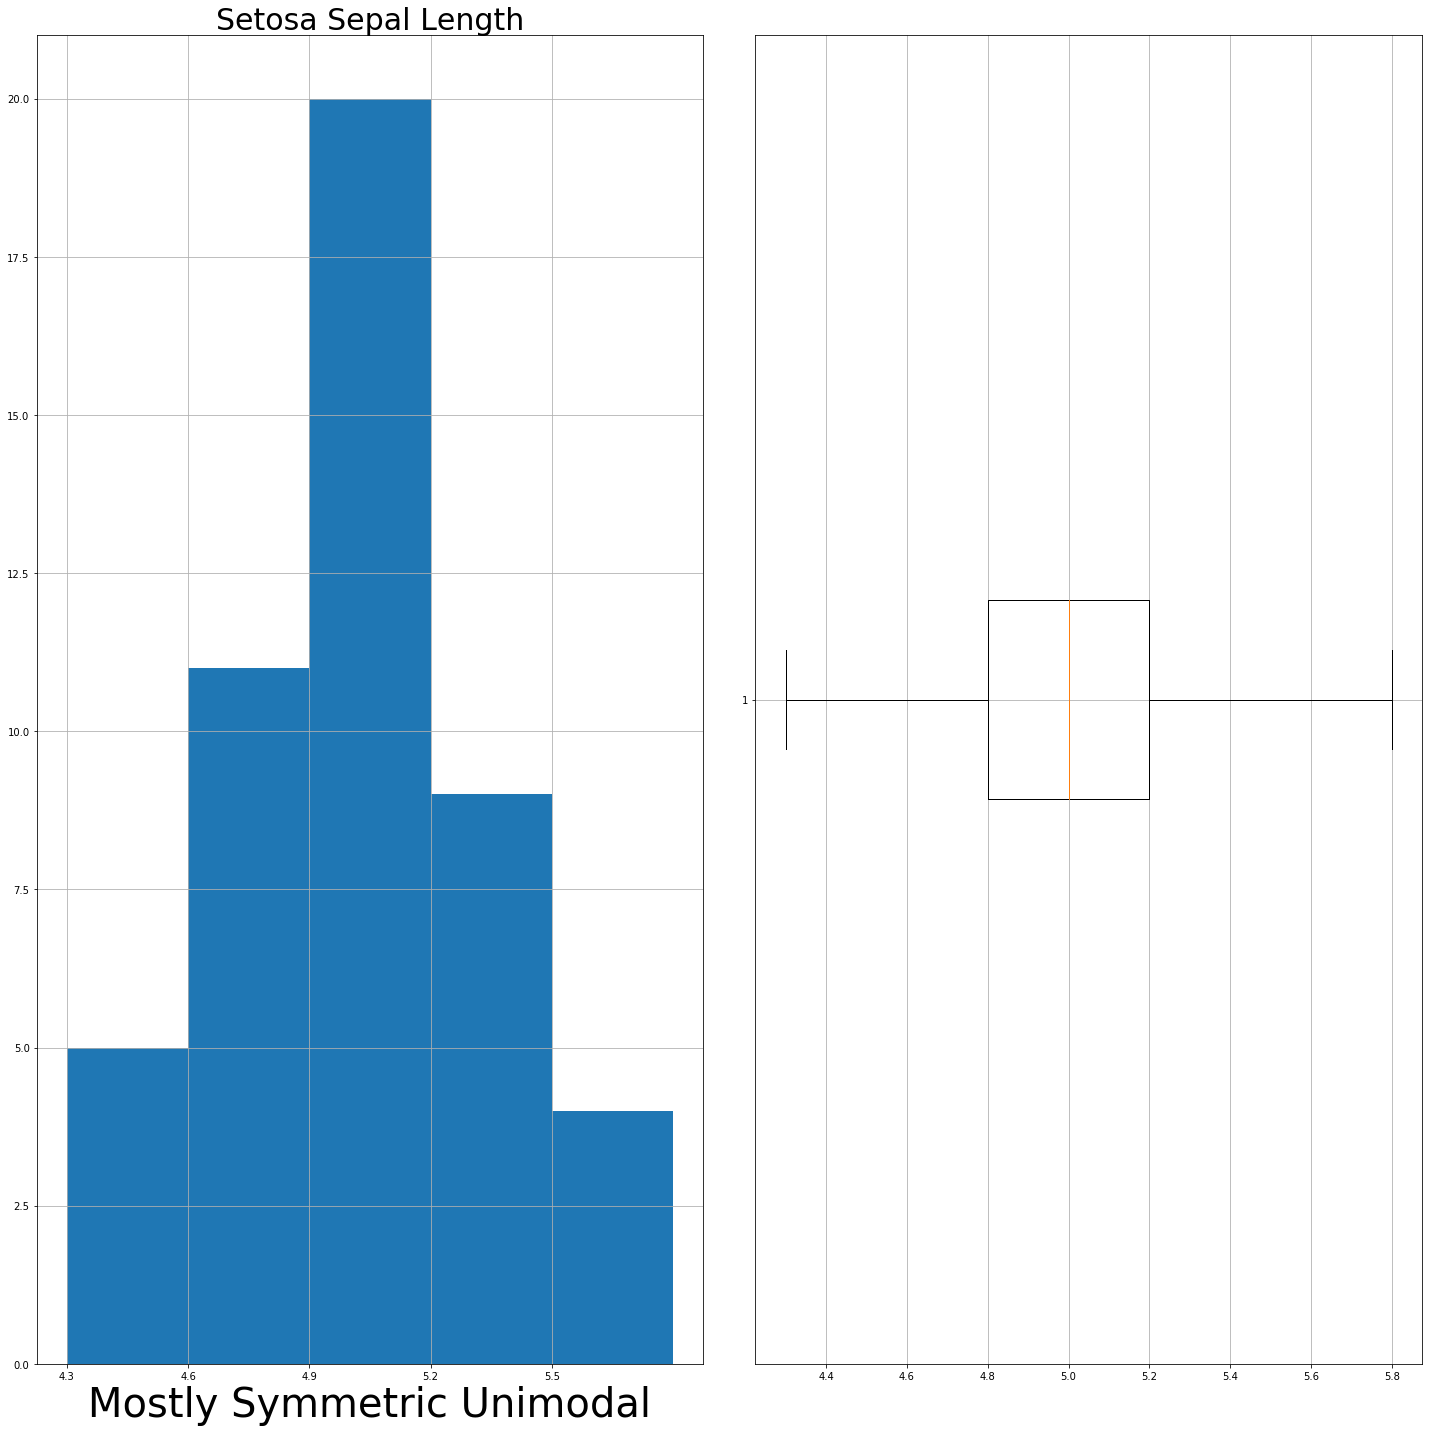

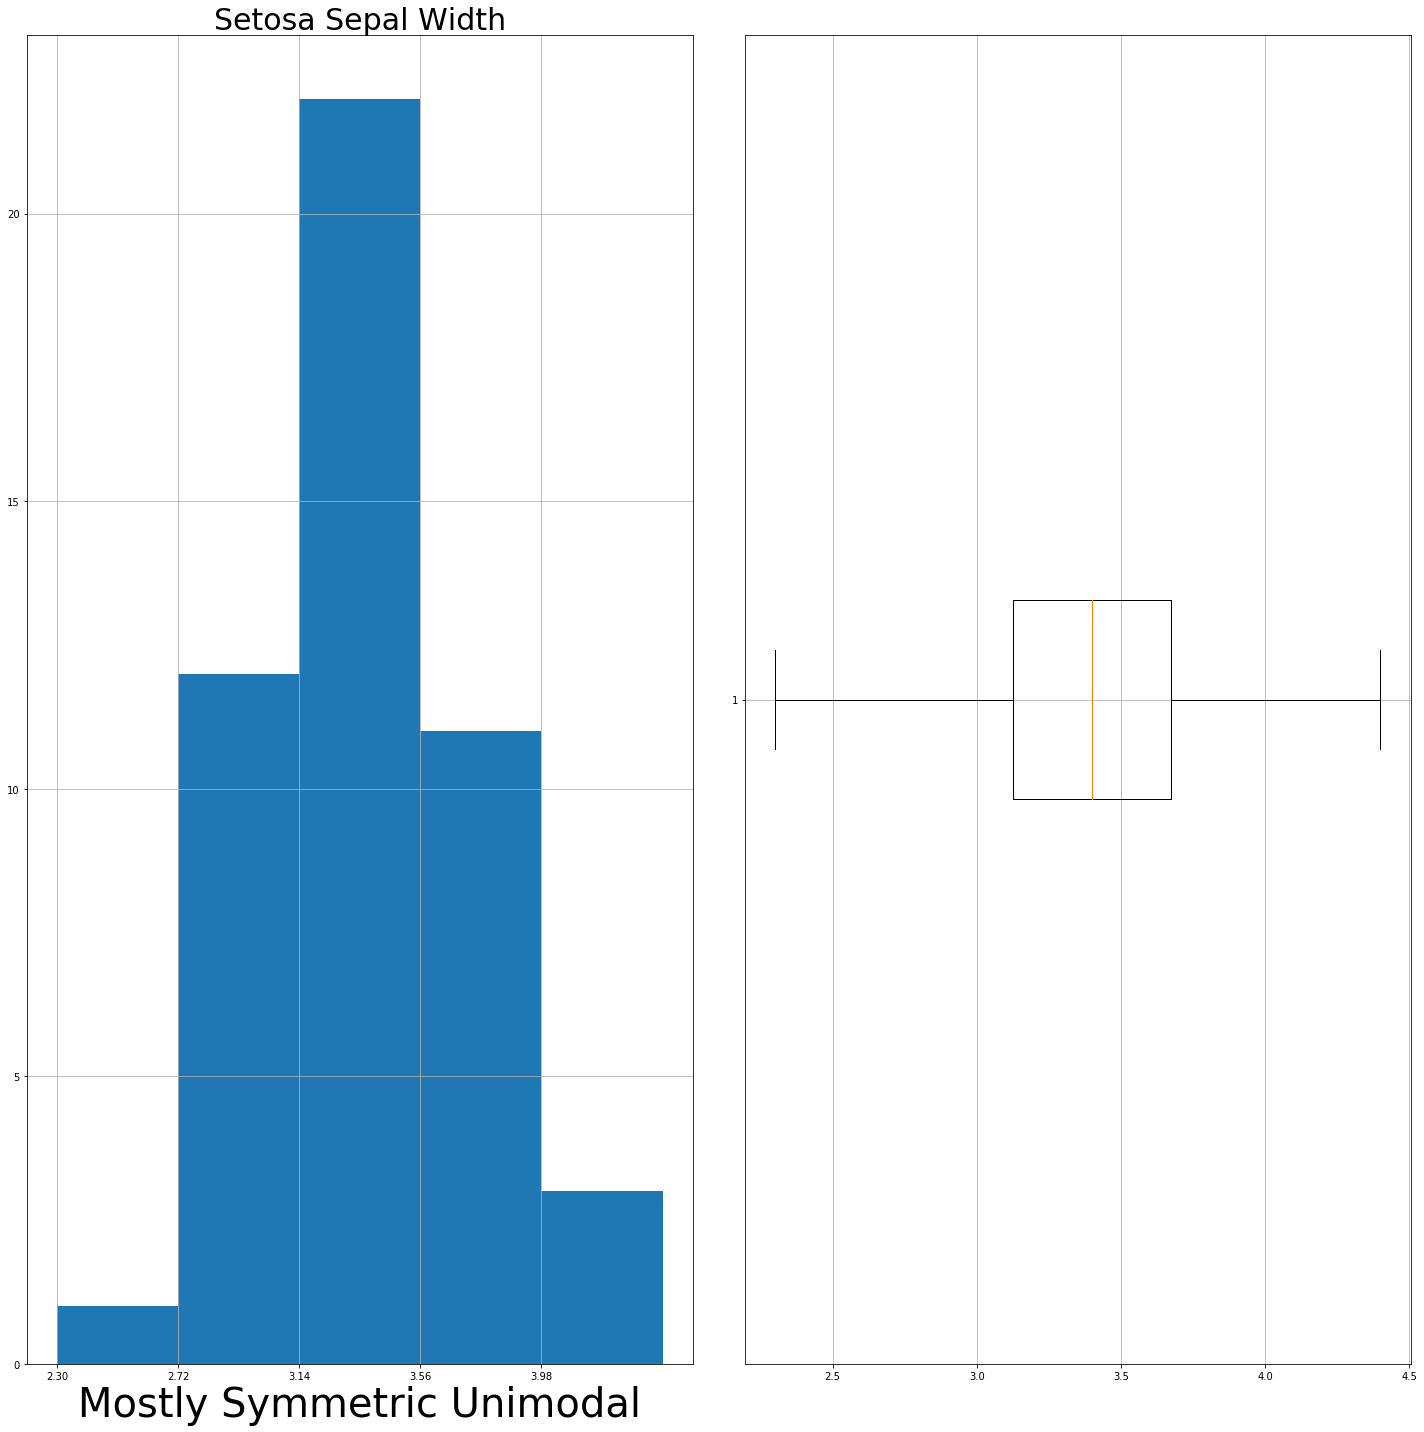

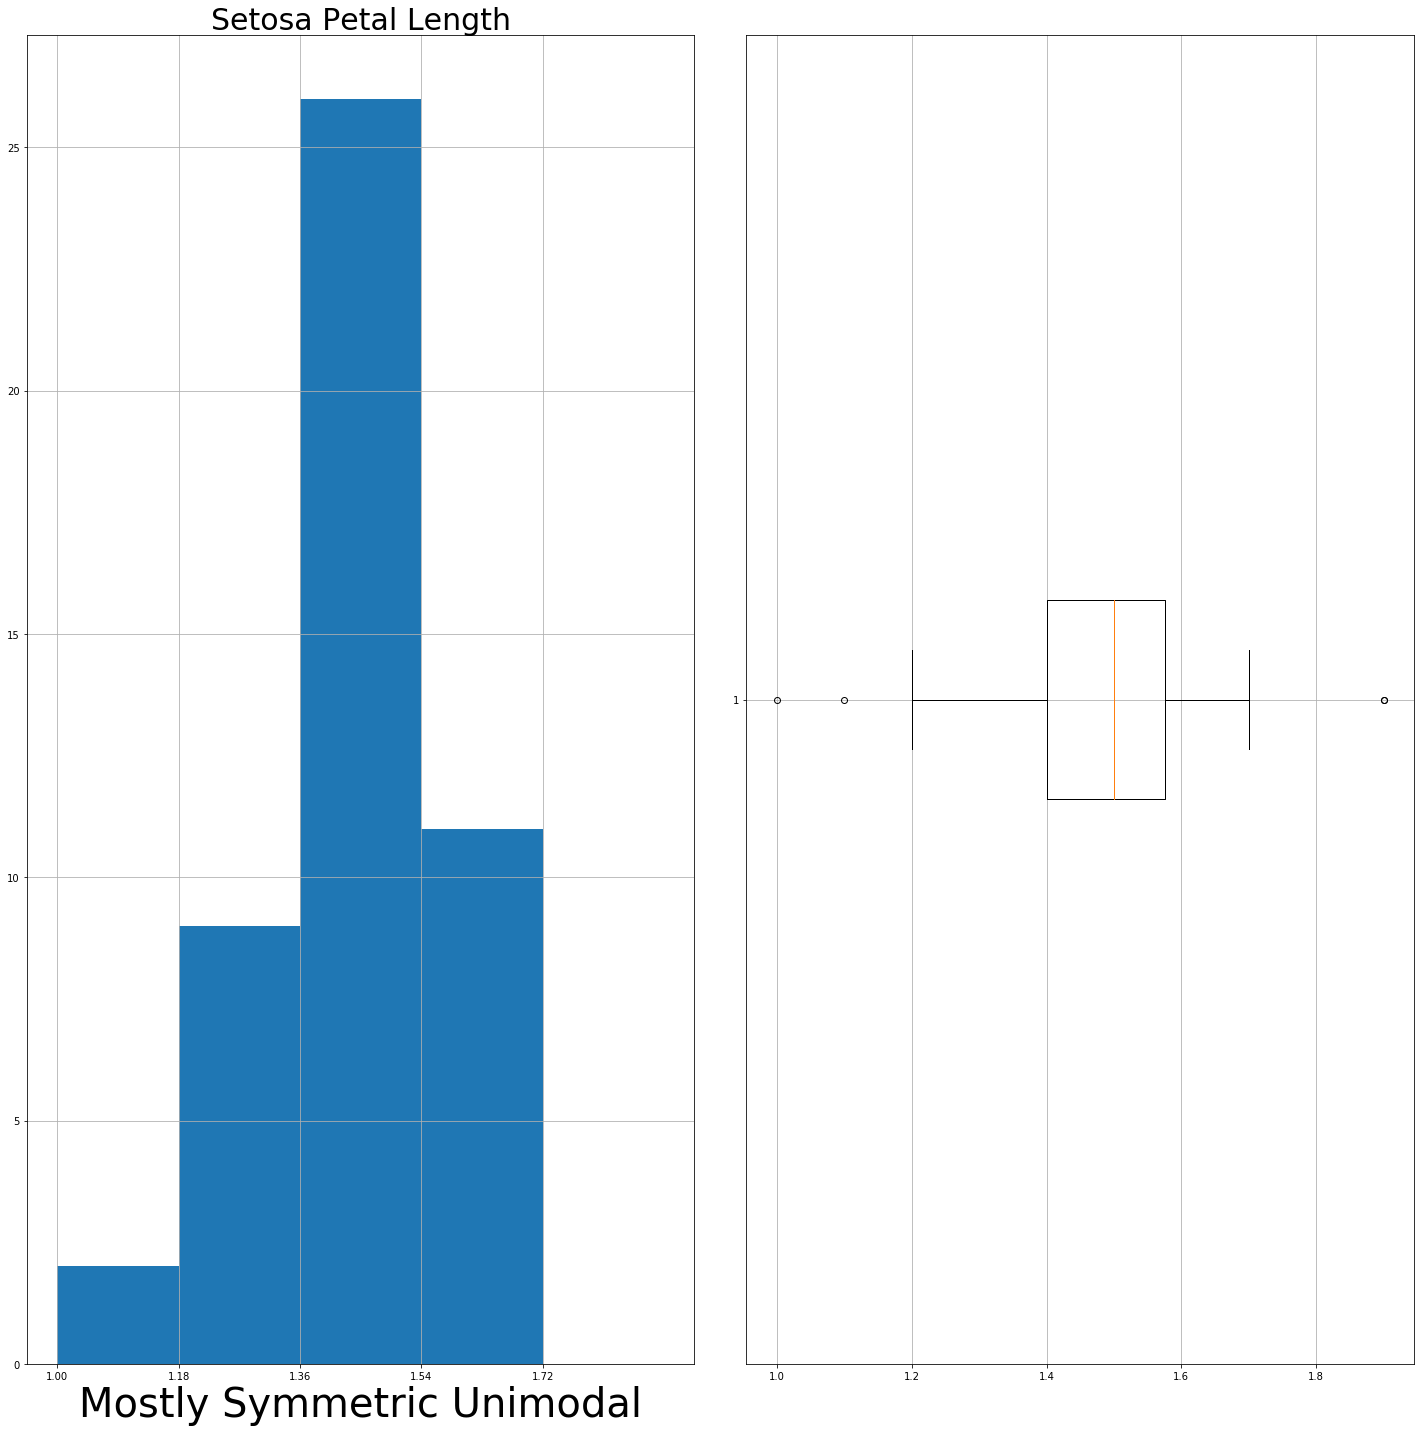

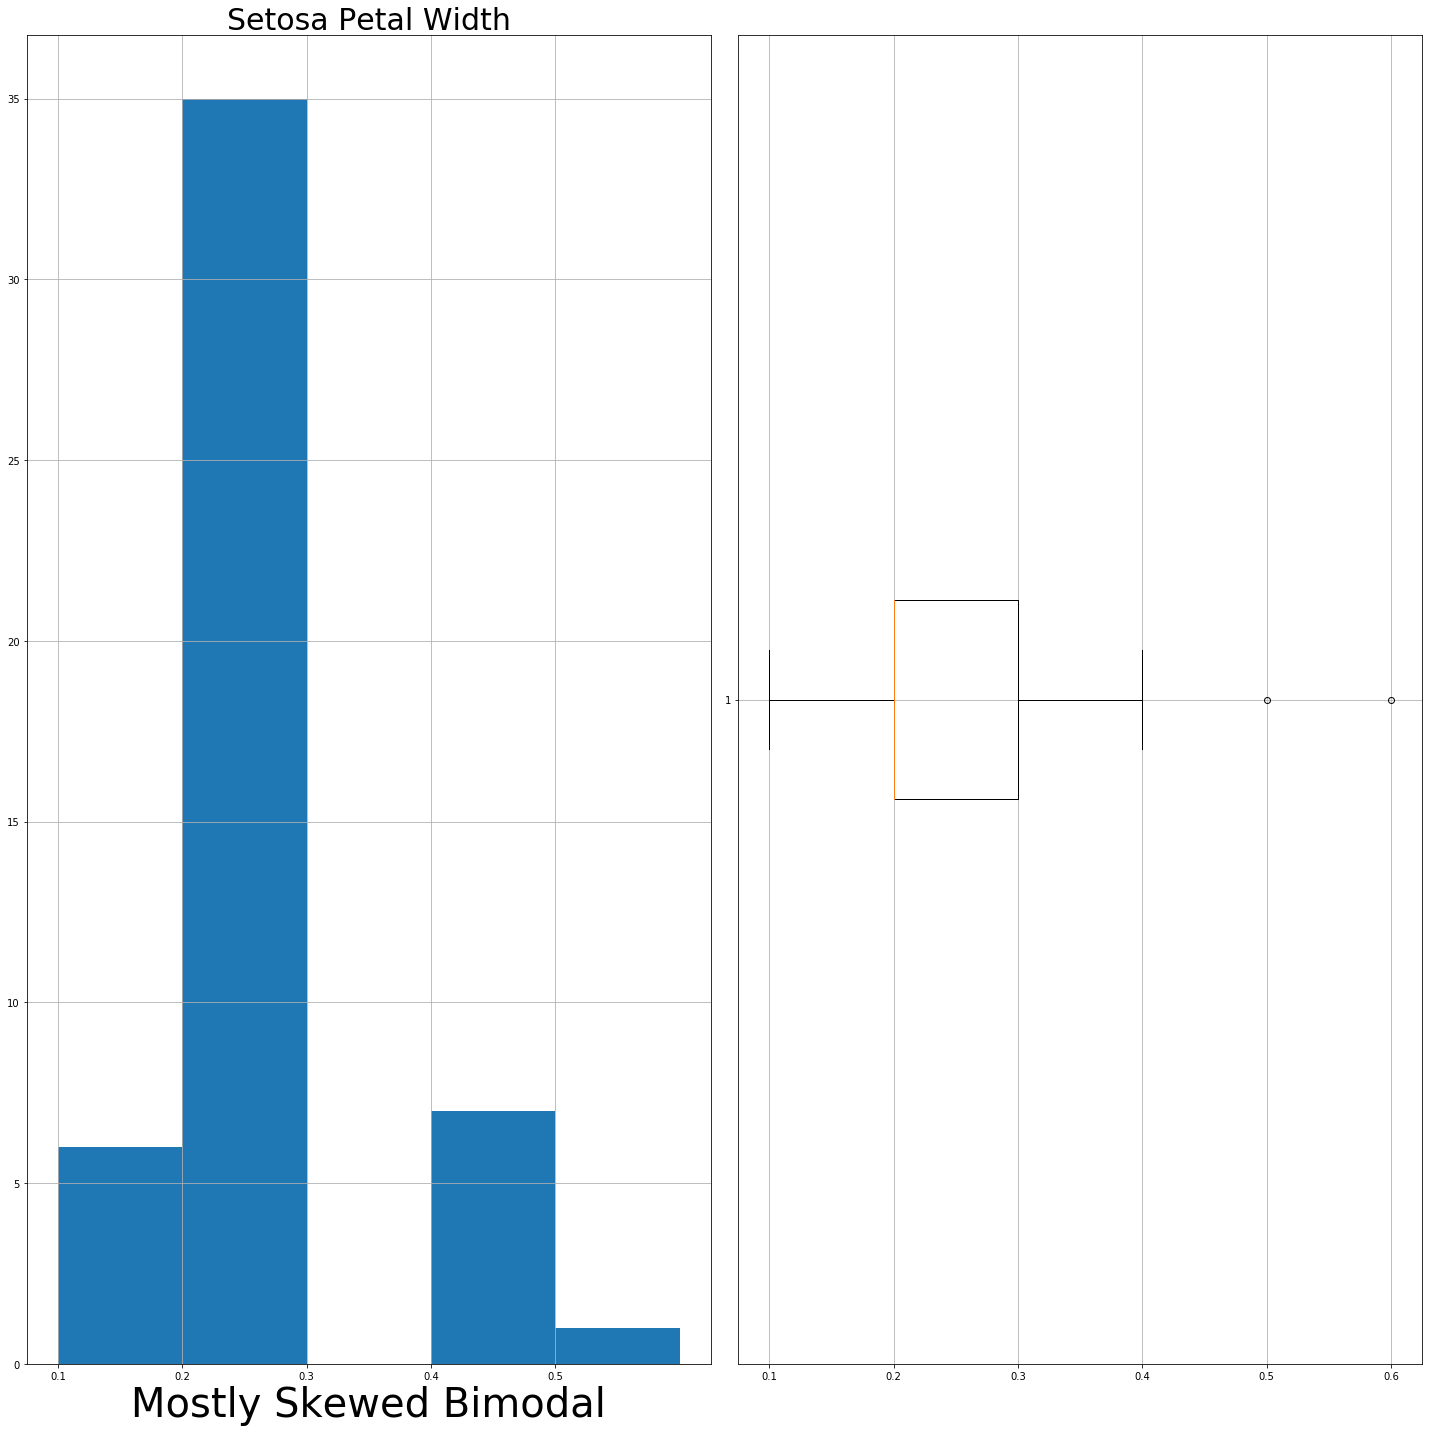

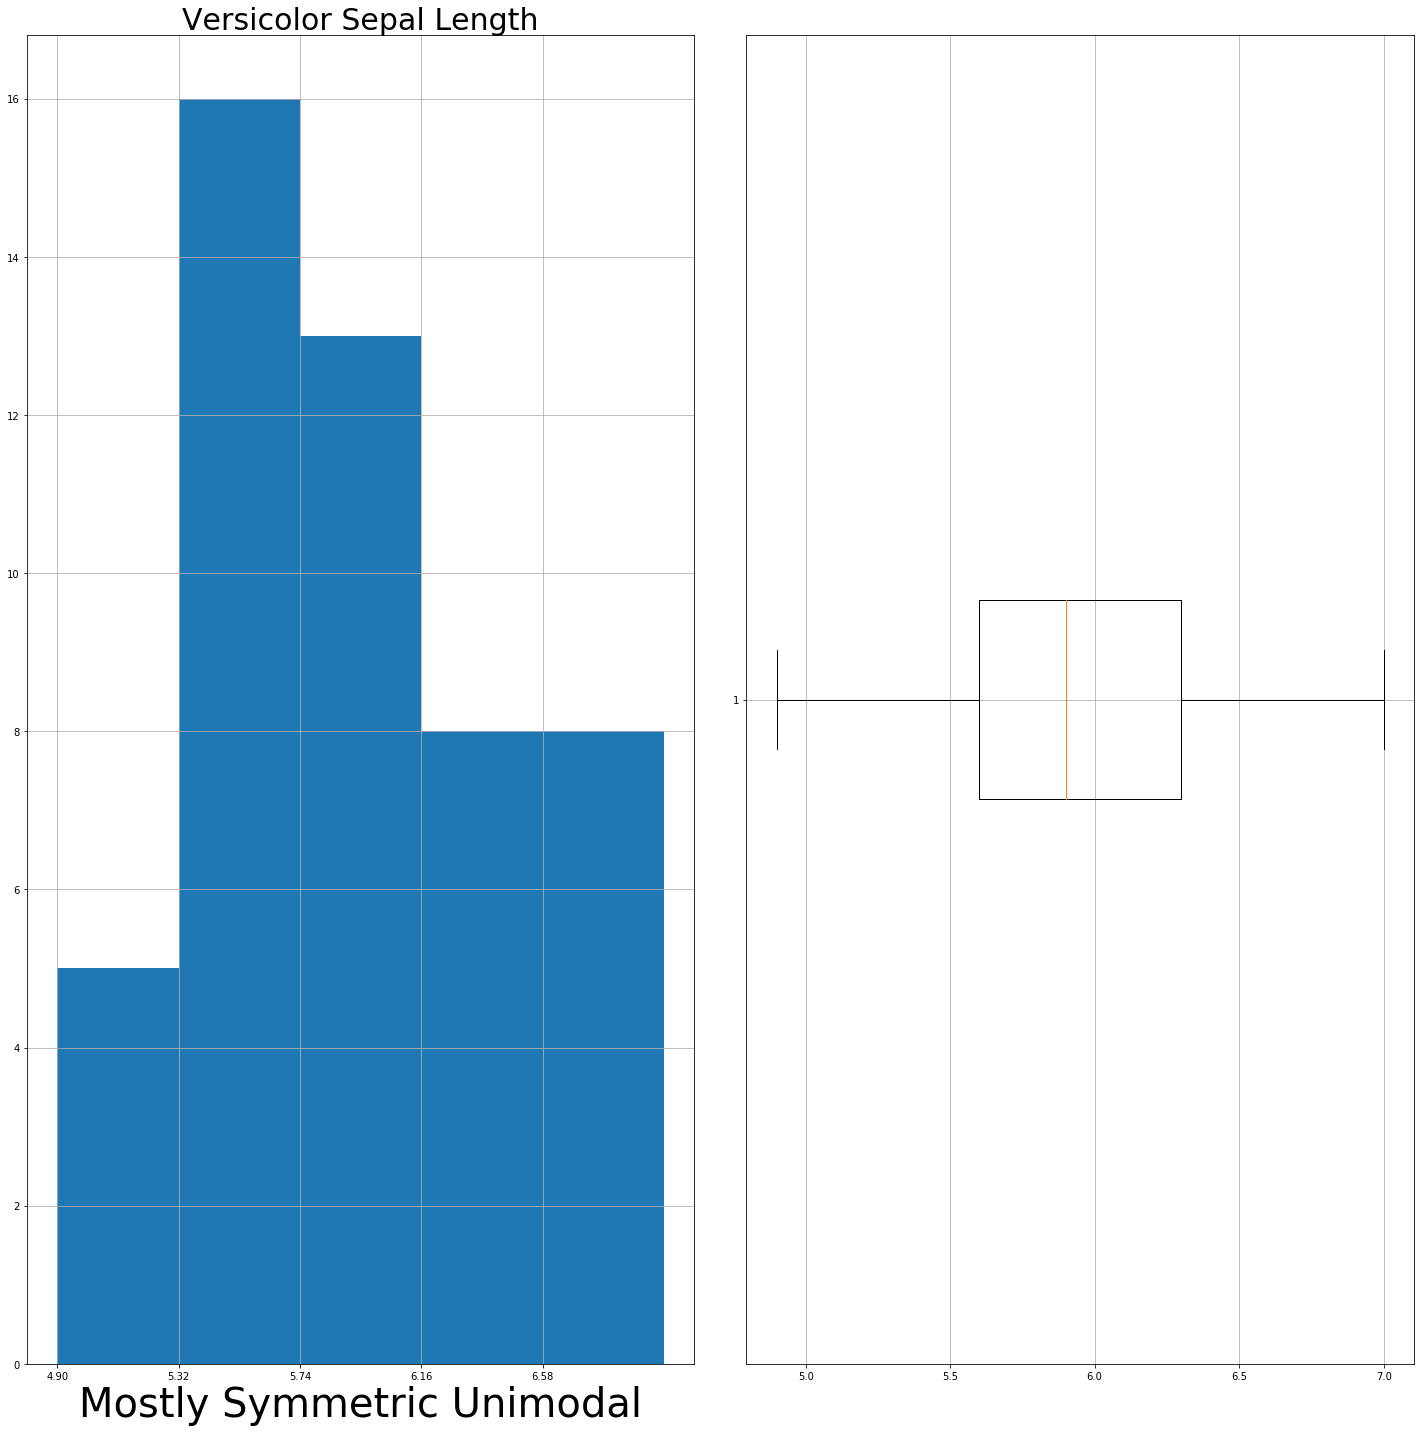

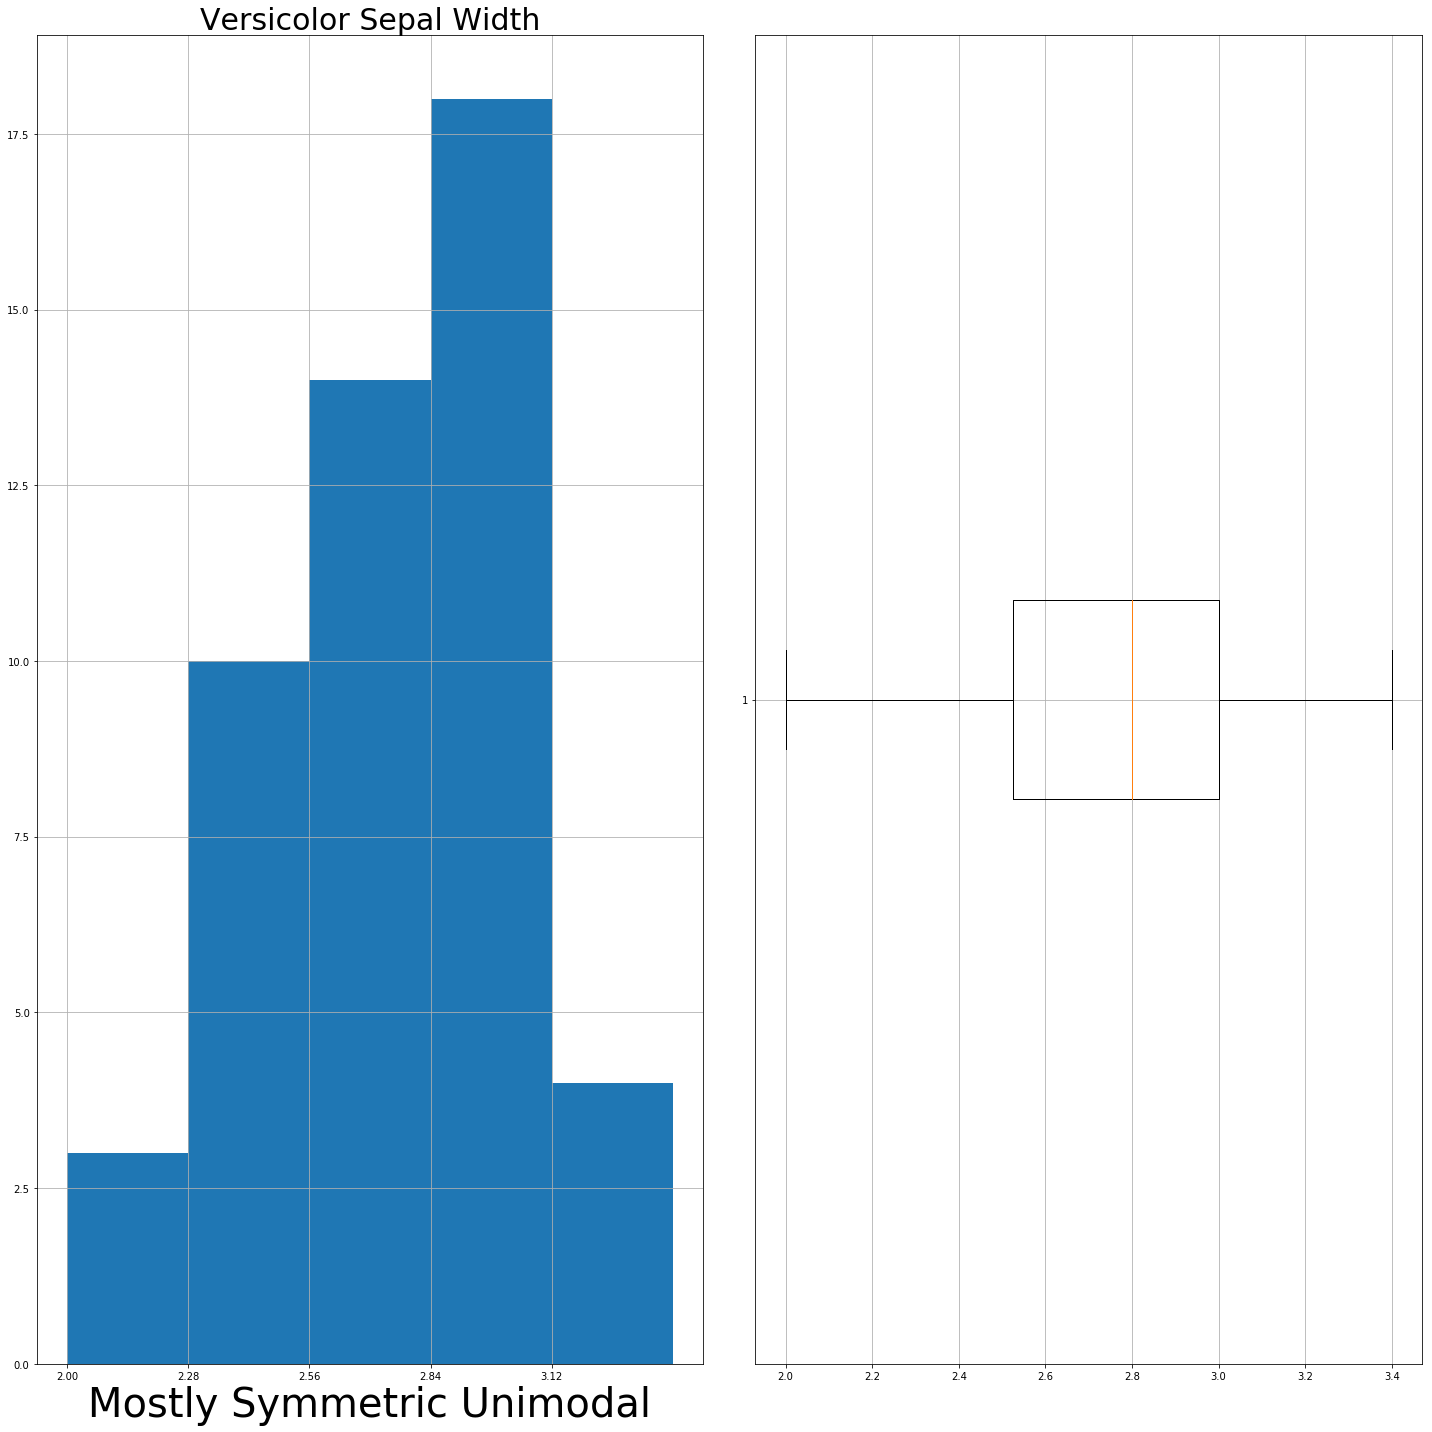

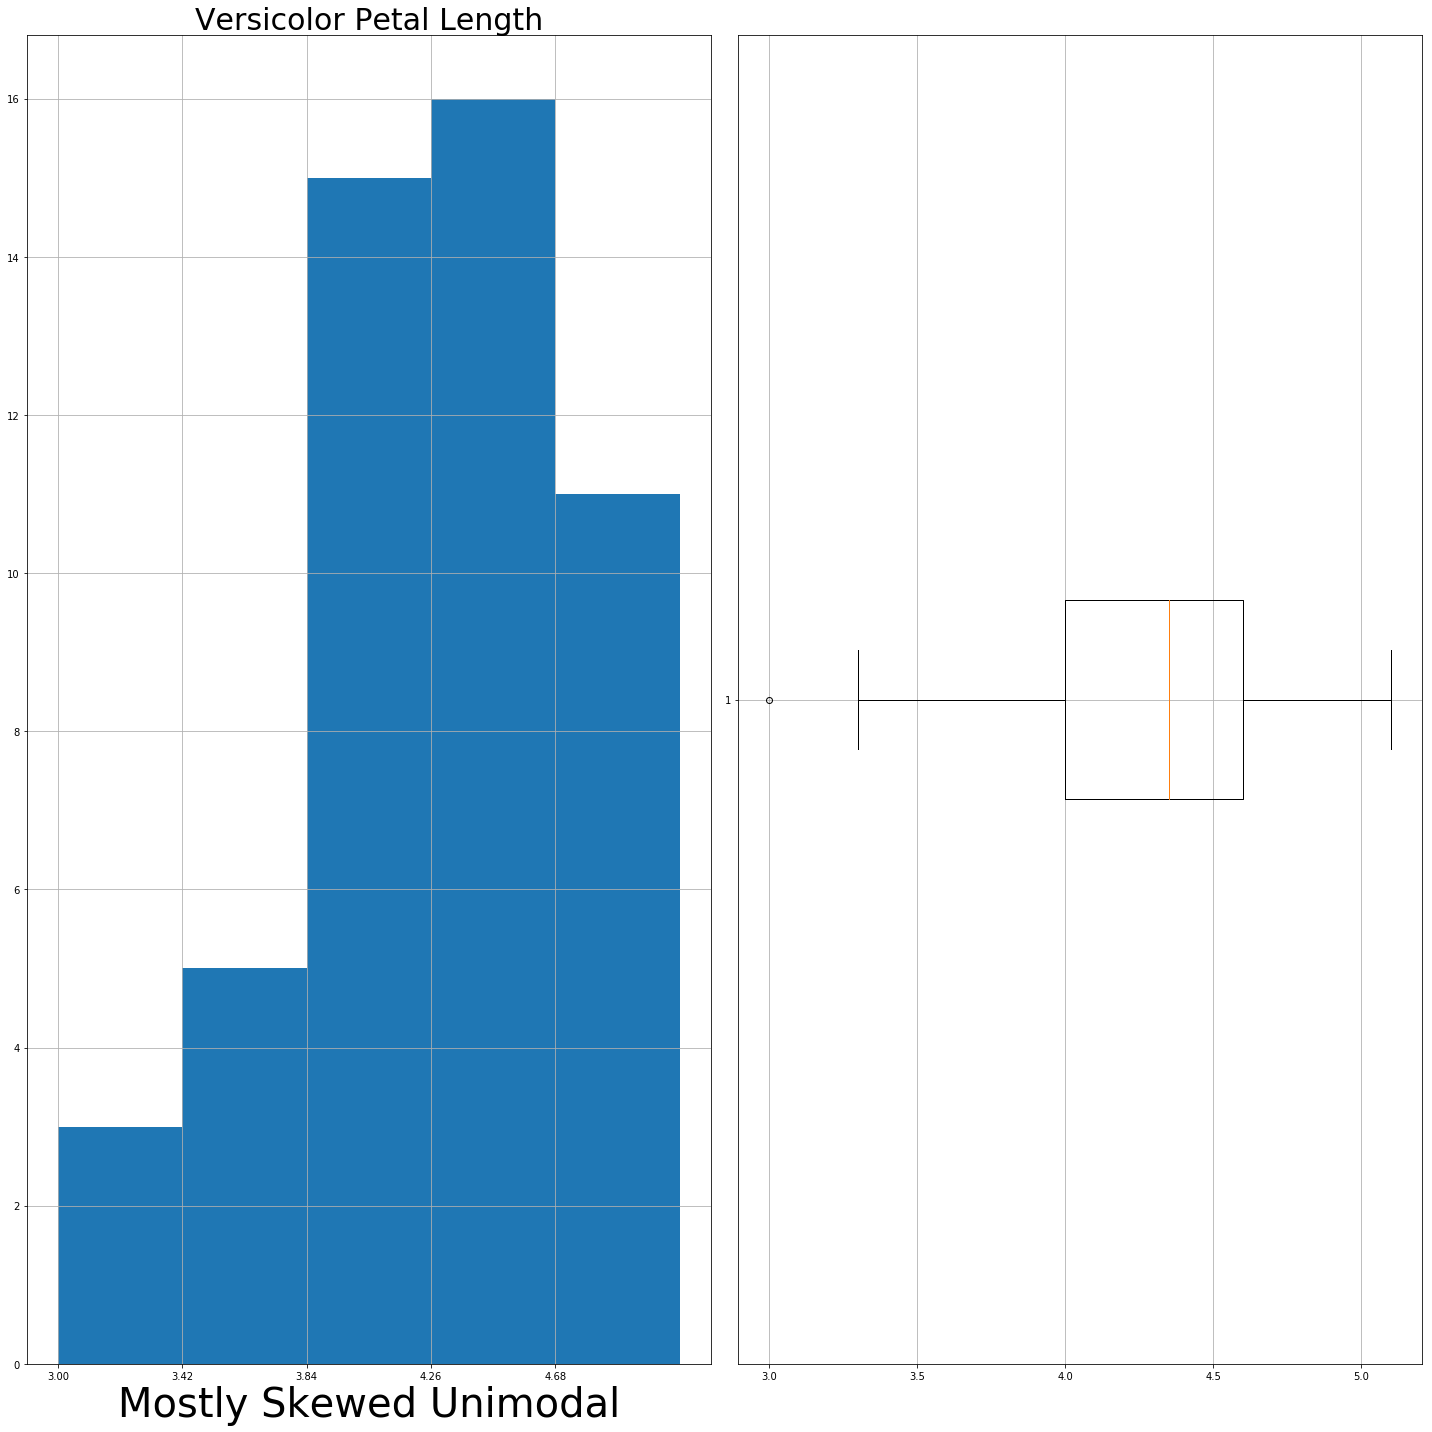

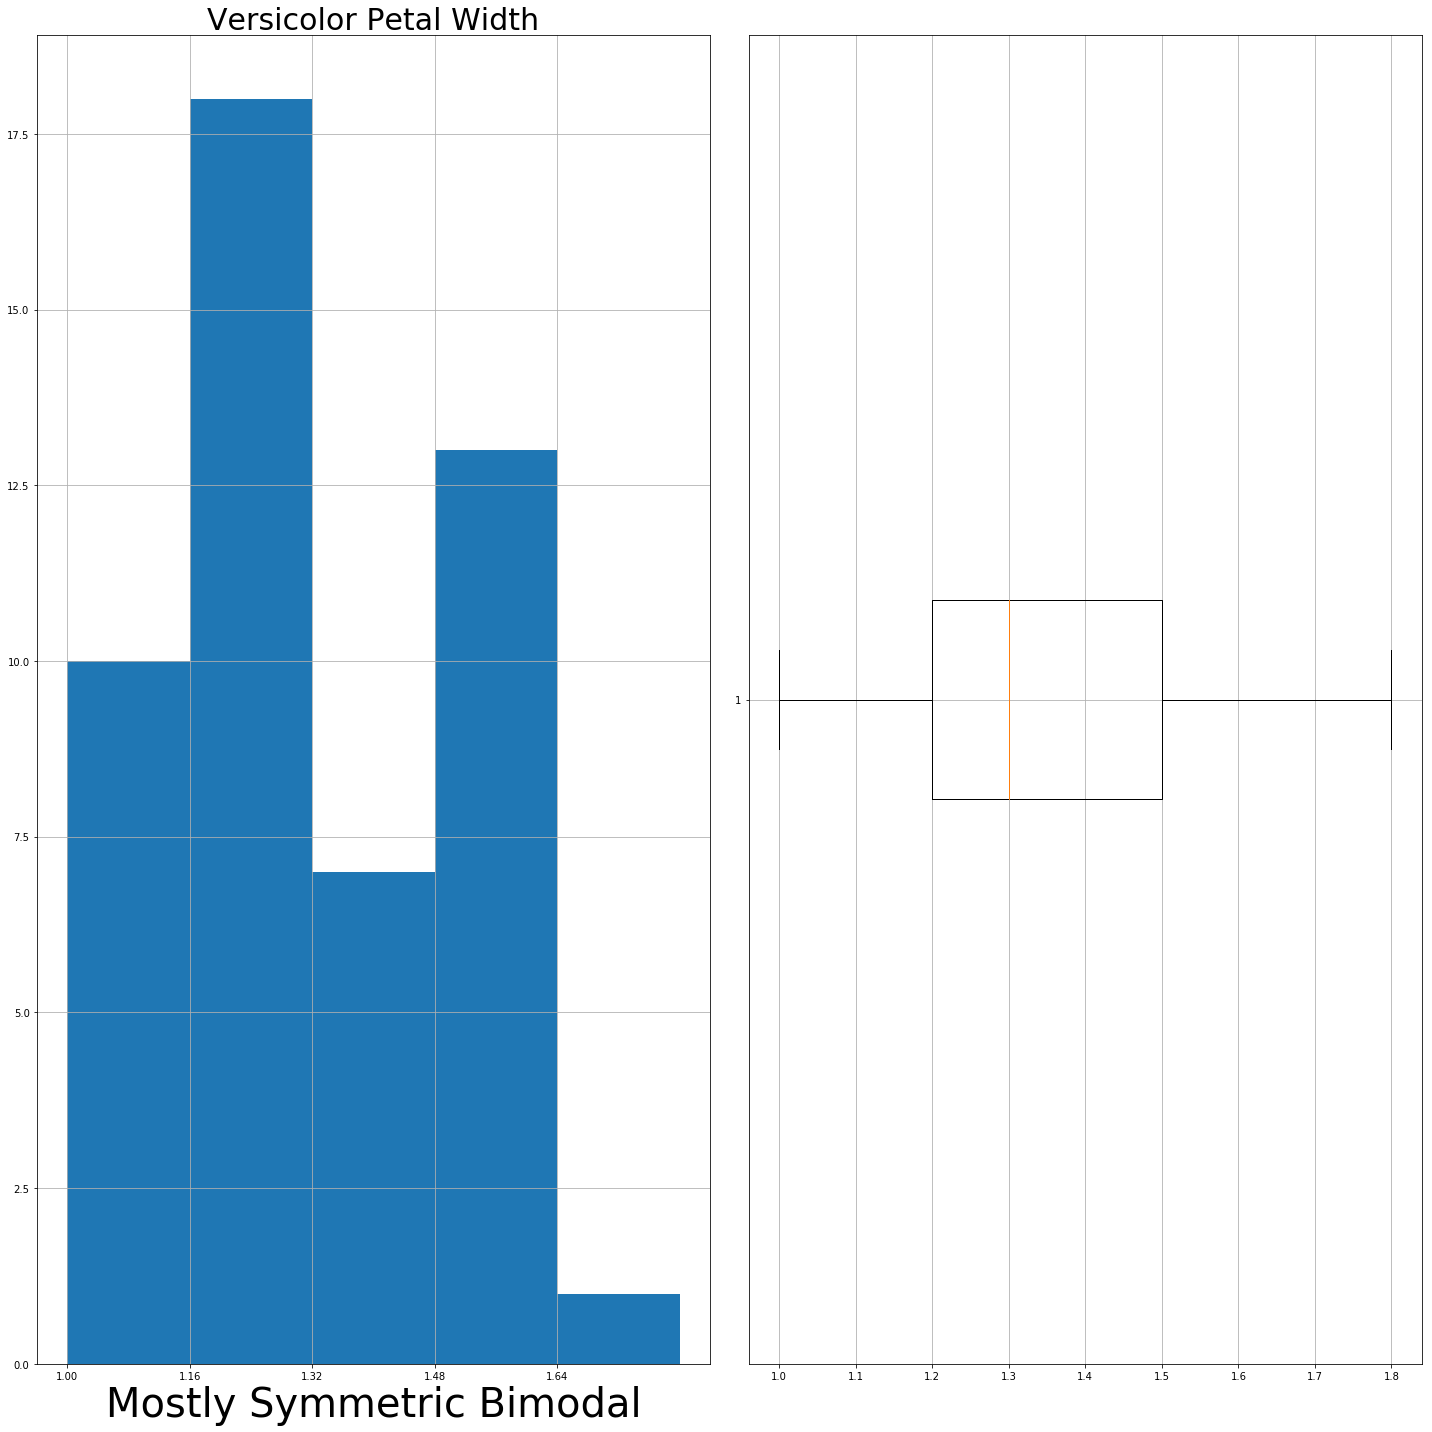

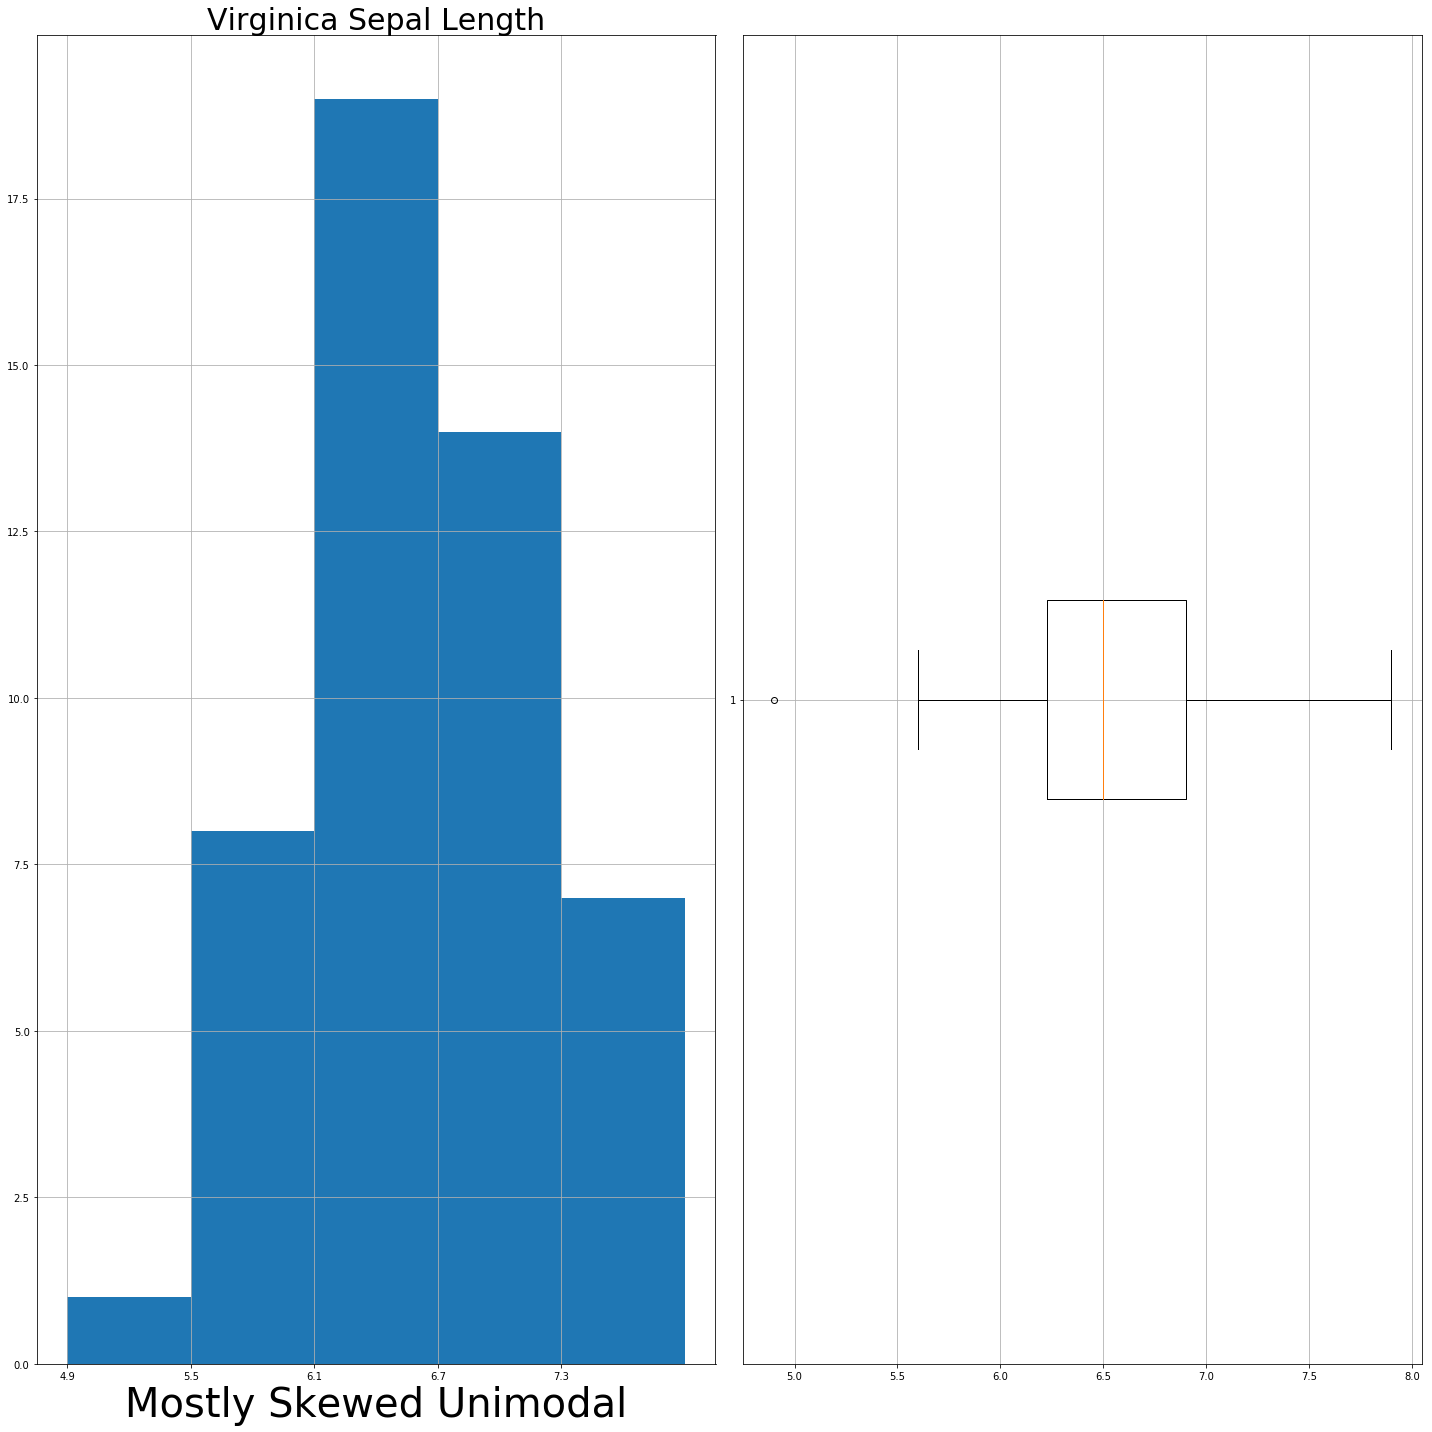

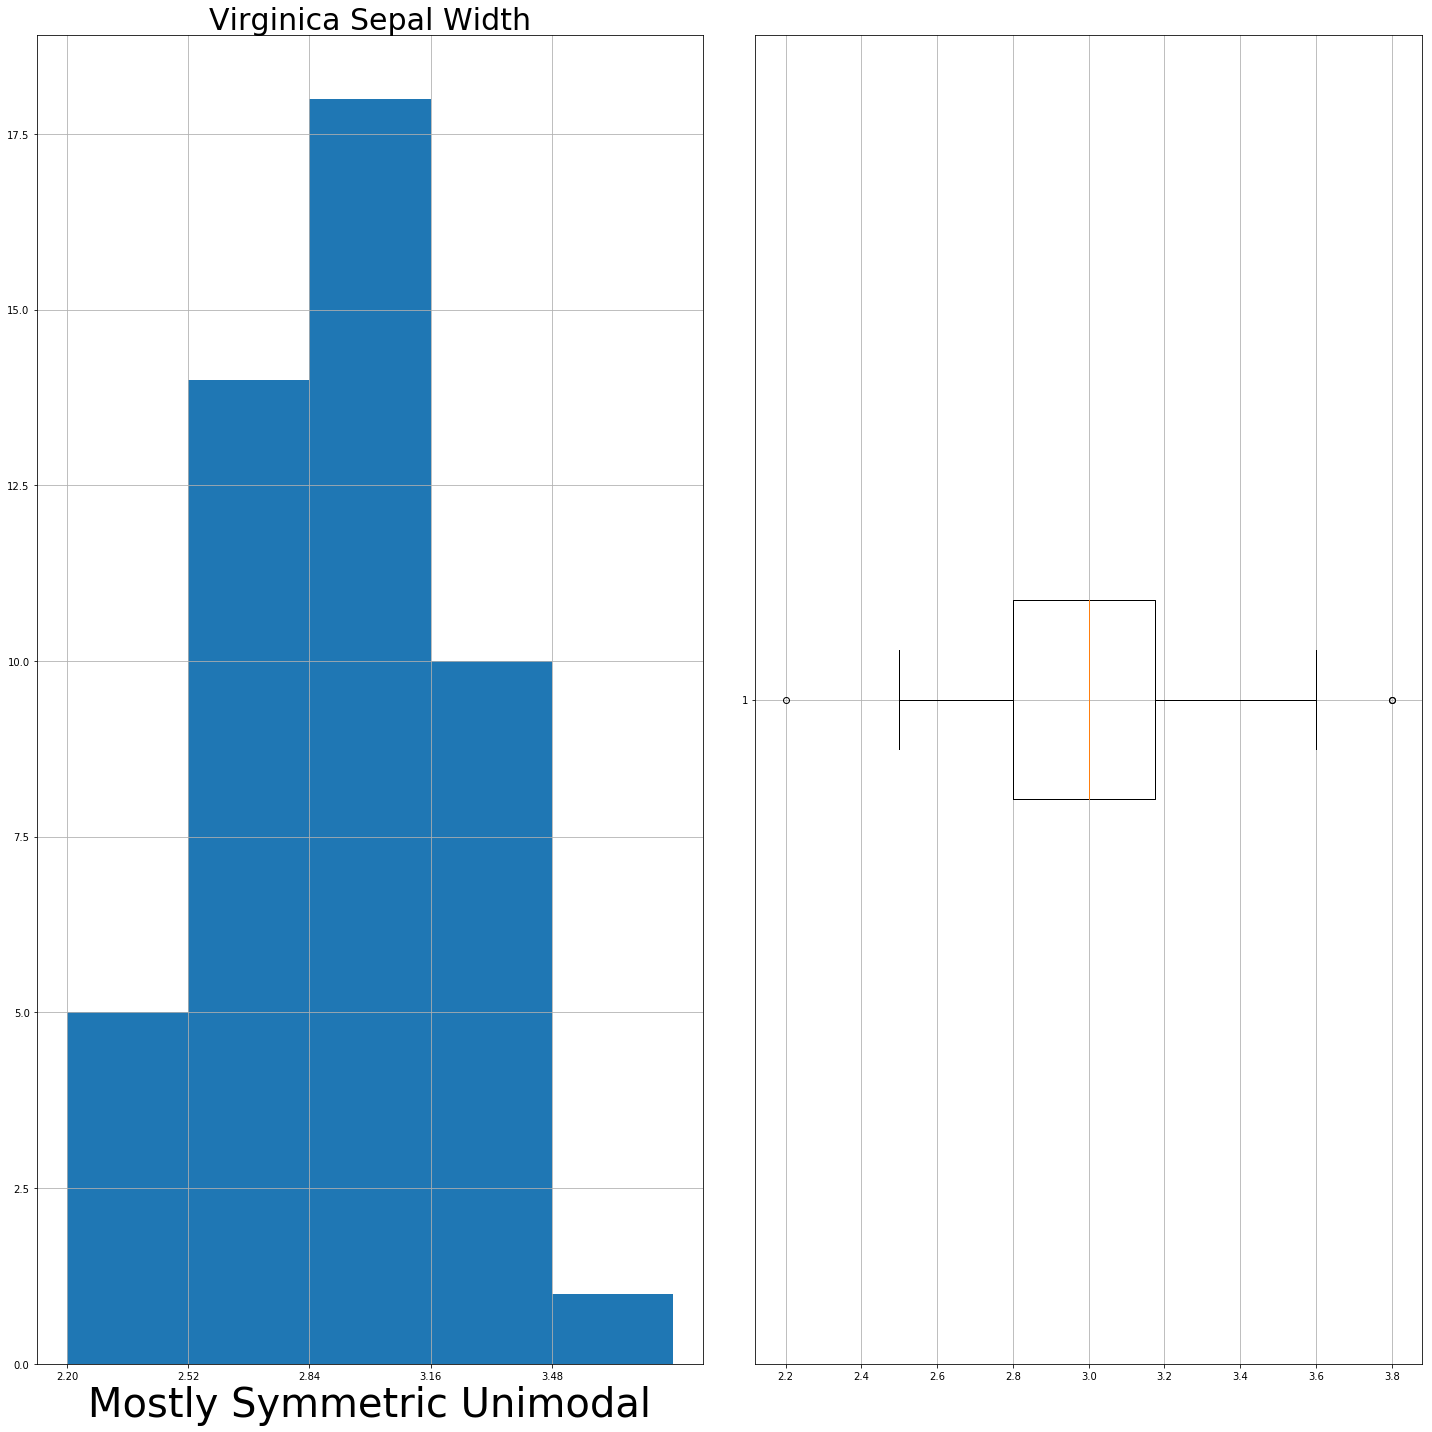

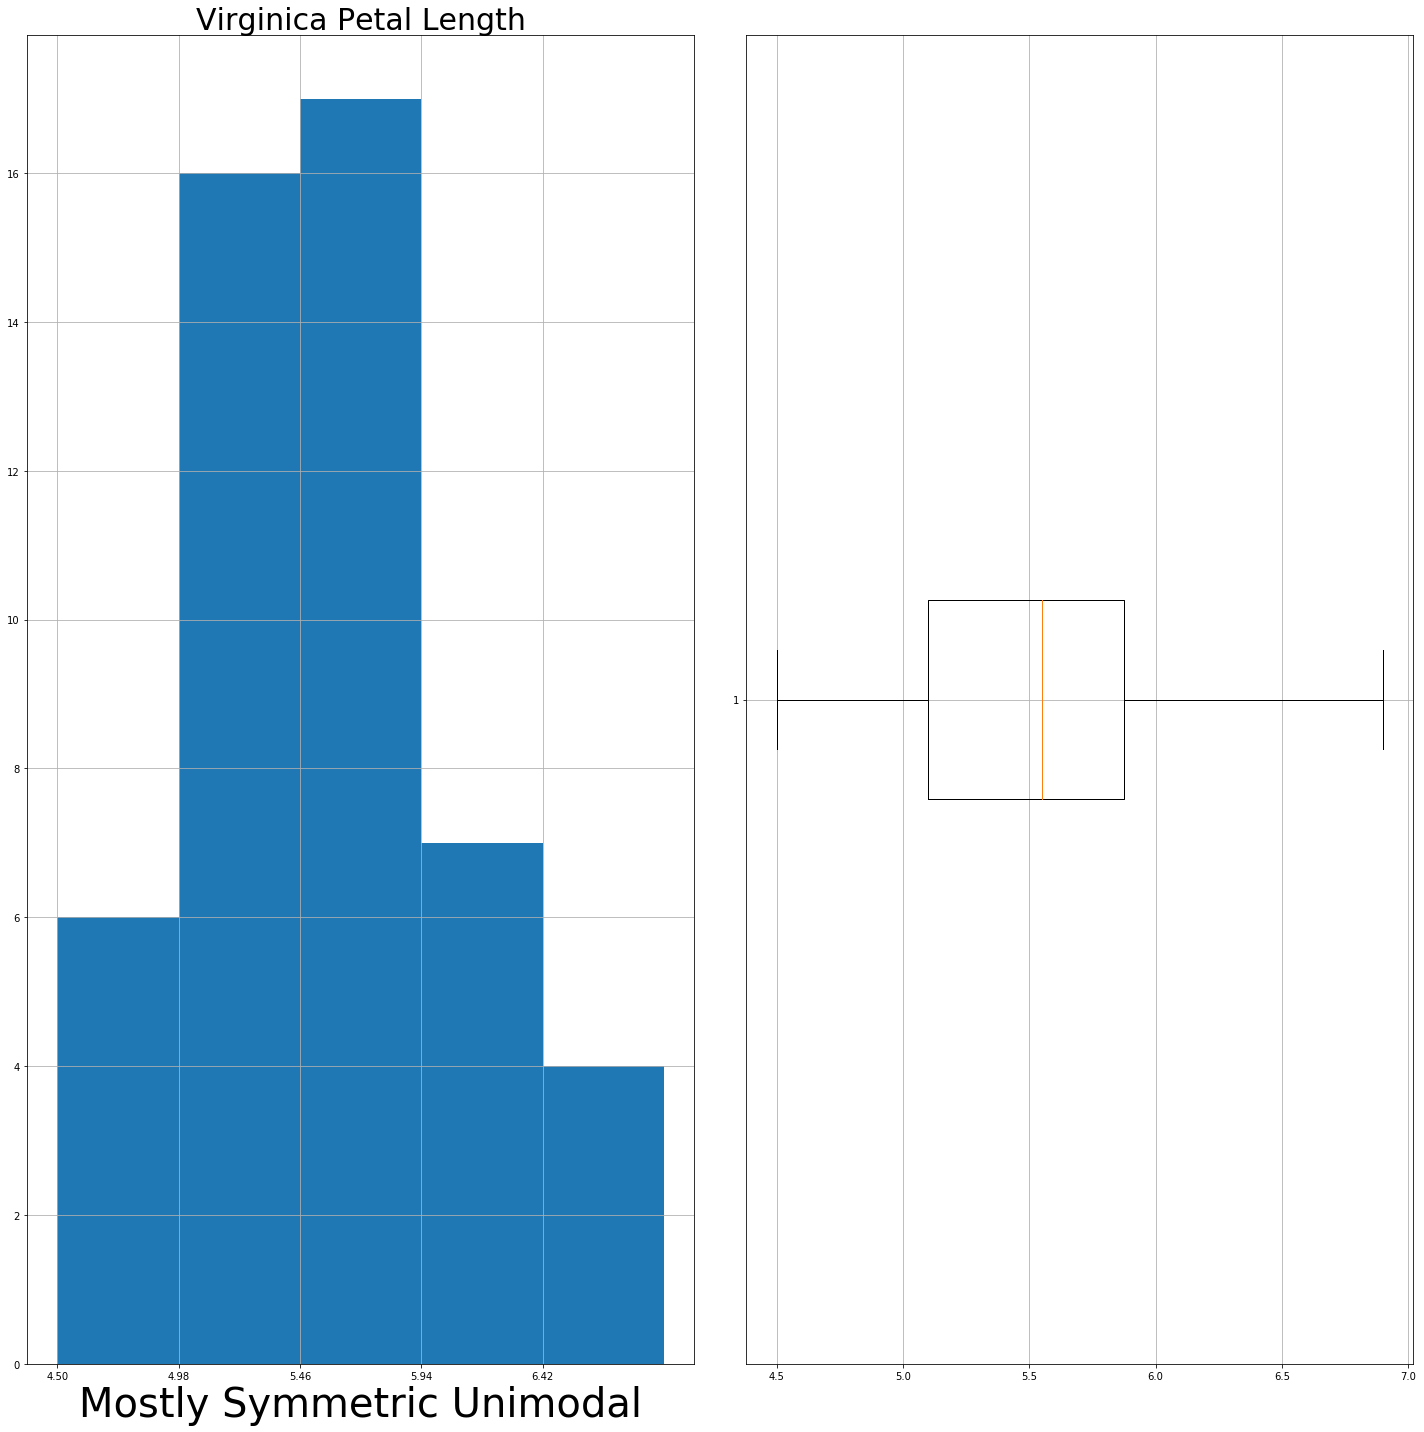

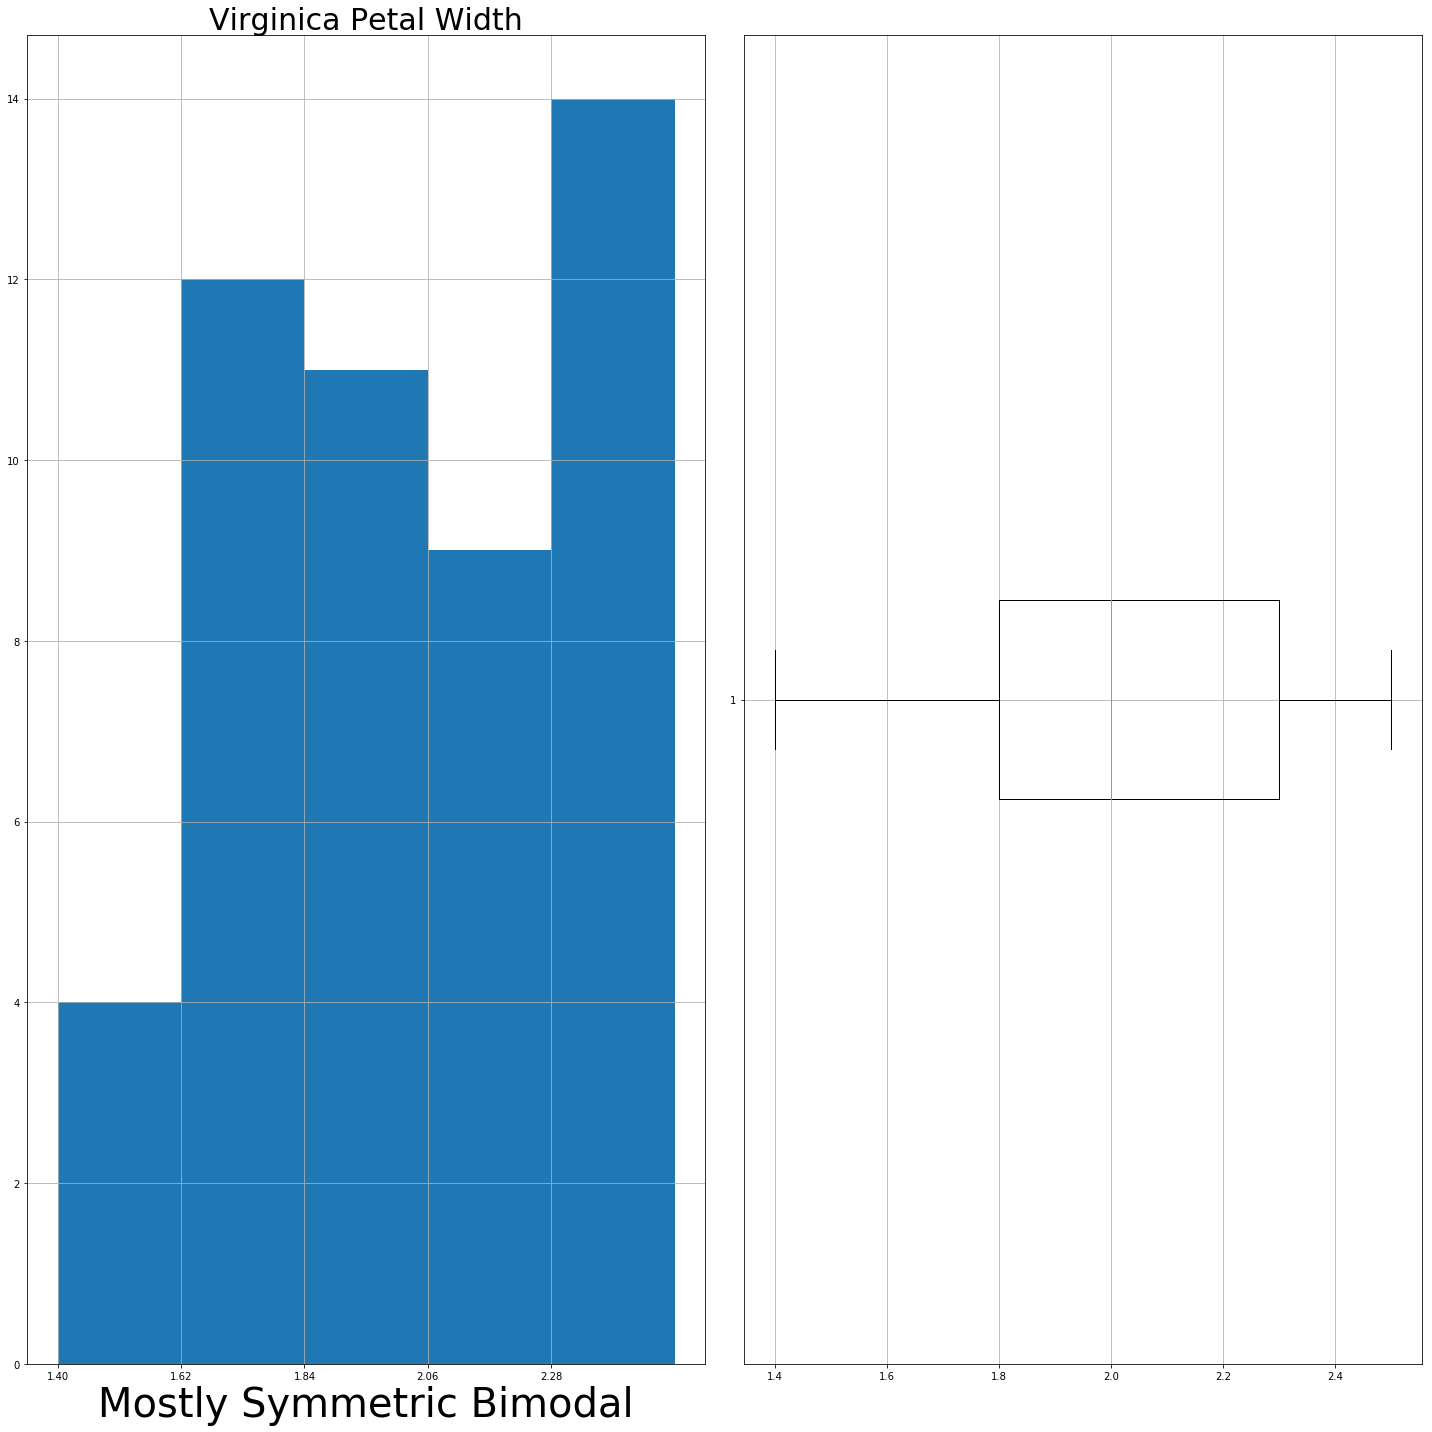

In [182]:
"""
Function calls for Iris Data, bin size = 5

"""

# Setosa
histogram(setosa['sepal_length'], 5, "Setosa Sepal Length",text="Unimodal")
histogram(setosa['sepal_width'], 5,"Setosa Sepal Width", text = "Unimodal")
histogram(setosa['petal_length'], 5,"Setosa Petal Length", text = "Unimodal")
histogram(setosa['petal_width'], 5,"Setosa Petal Width",text = "Bimodal")

#Versicolor
histogram(versicolor['sepal_length'], 5,"Versicolor Sepal Length", text = "Unimodal")
histogram(versicolor['sepal_width'], 5, "Versicolor Sepal Width", text = "Unimodal")
histogram(versicolor['petal_length'], 5,"Versicolor Petal Length", text = "Unimodal")
histogram(versicolor['petal_width'], 5,"Versicolor Petal Width", text = "Bimodal")

#Virginica
histogram(virginica['sepal_length'], 5,"Virginica Sepal Length", text = "Unimodal")
histogram(virginica['sepal_width'], 5, "Virginica Sepal Width", text = "Unimodal")
histogram(virginica['petal_length'], 5,"Virginica Petal Length", text = "Unimodal")
histogram(virginica['petal_width'], 5, "Virginica Petal Width", text = "Bimodal")

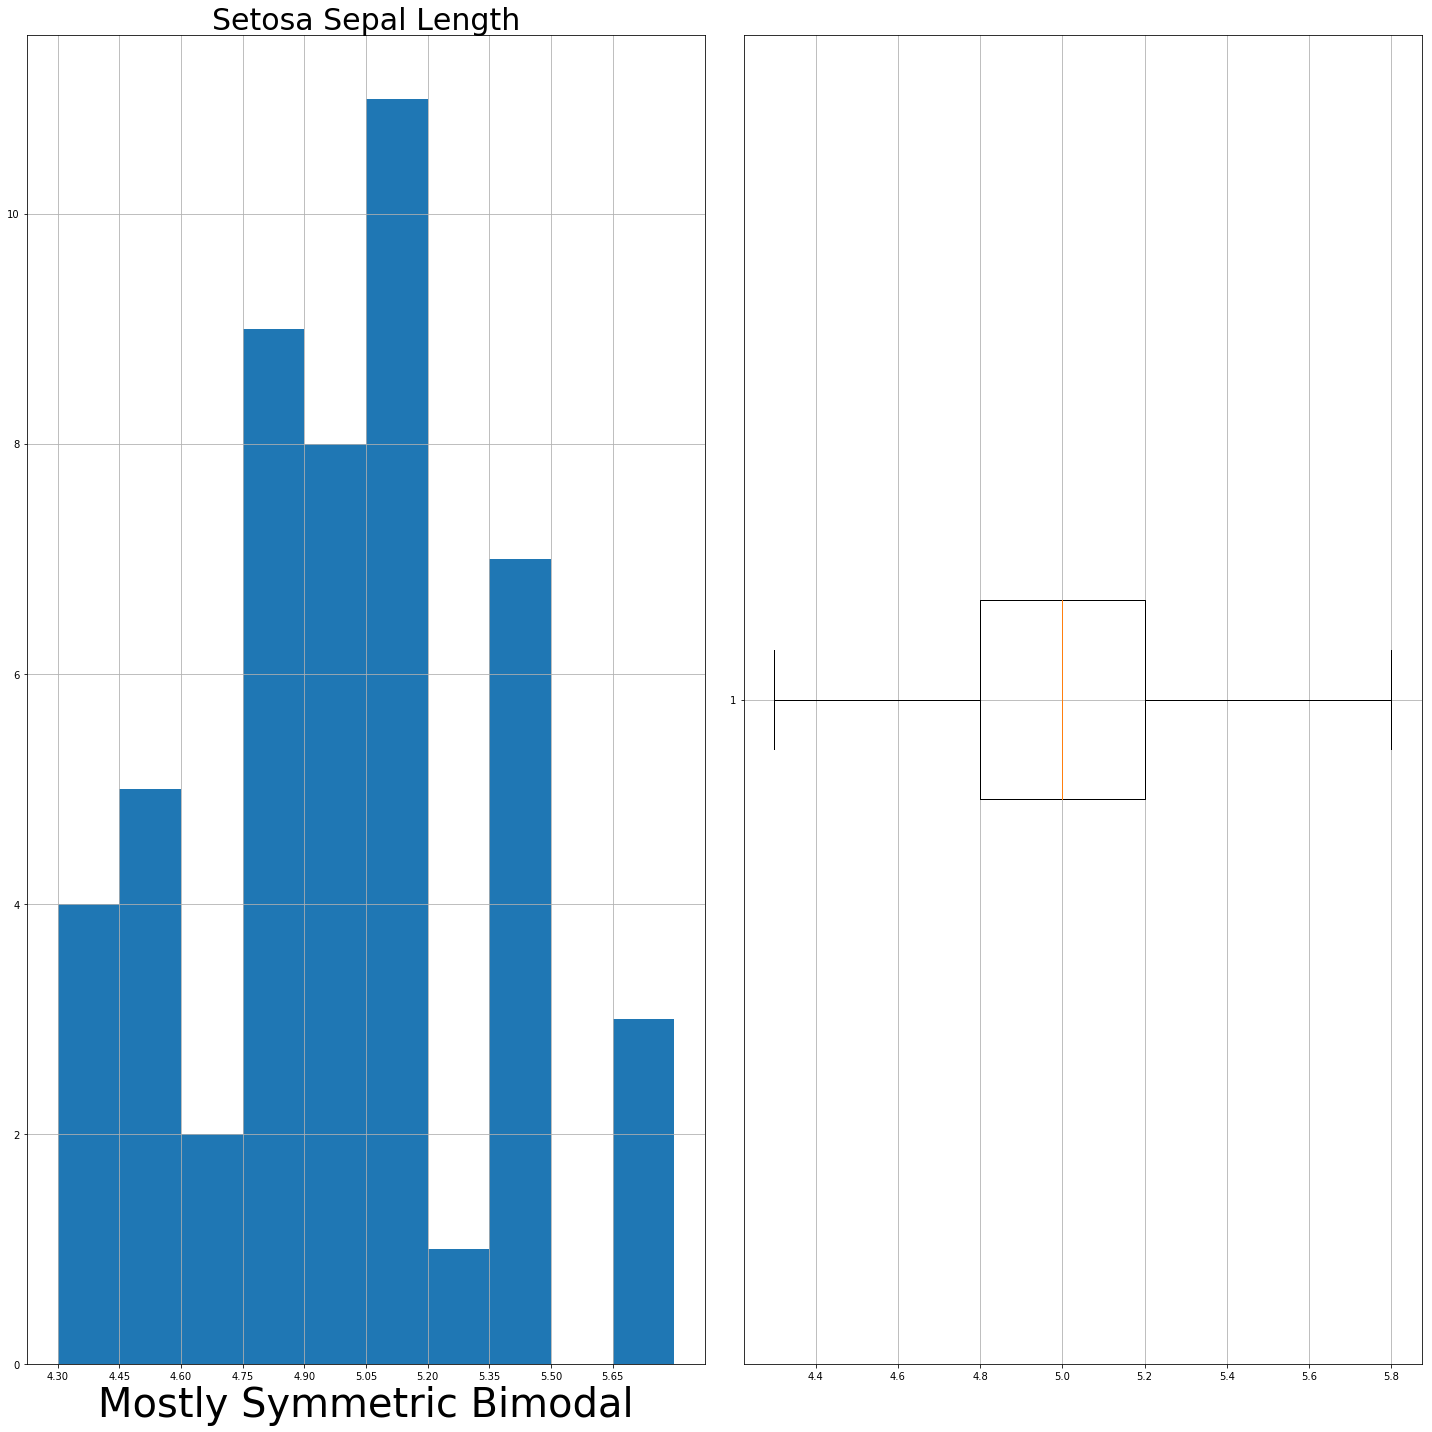

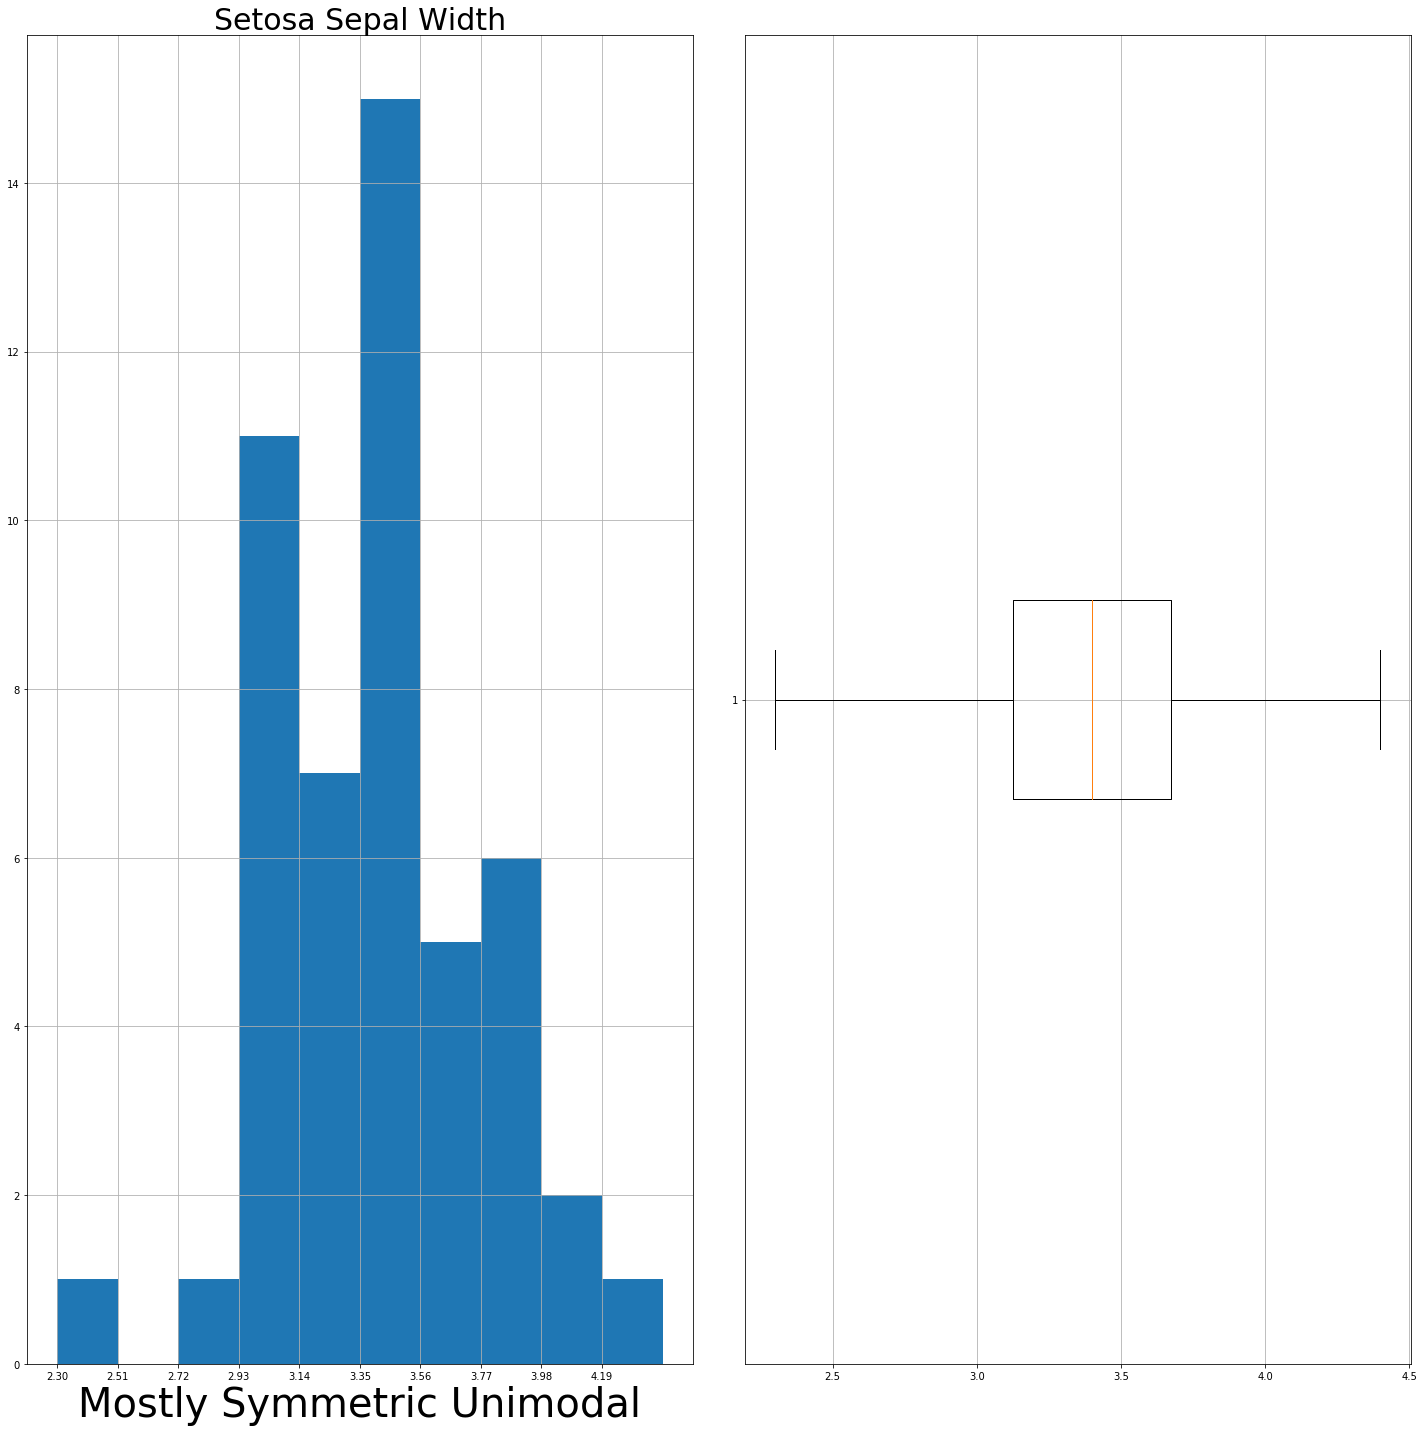

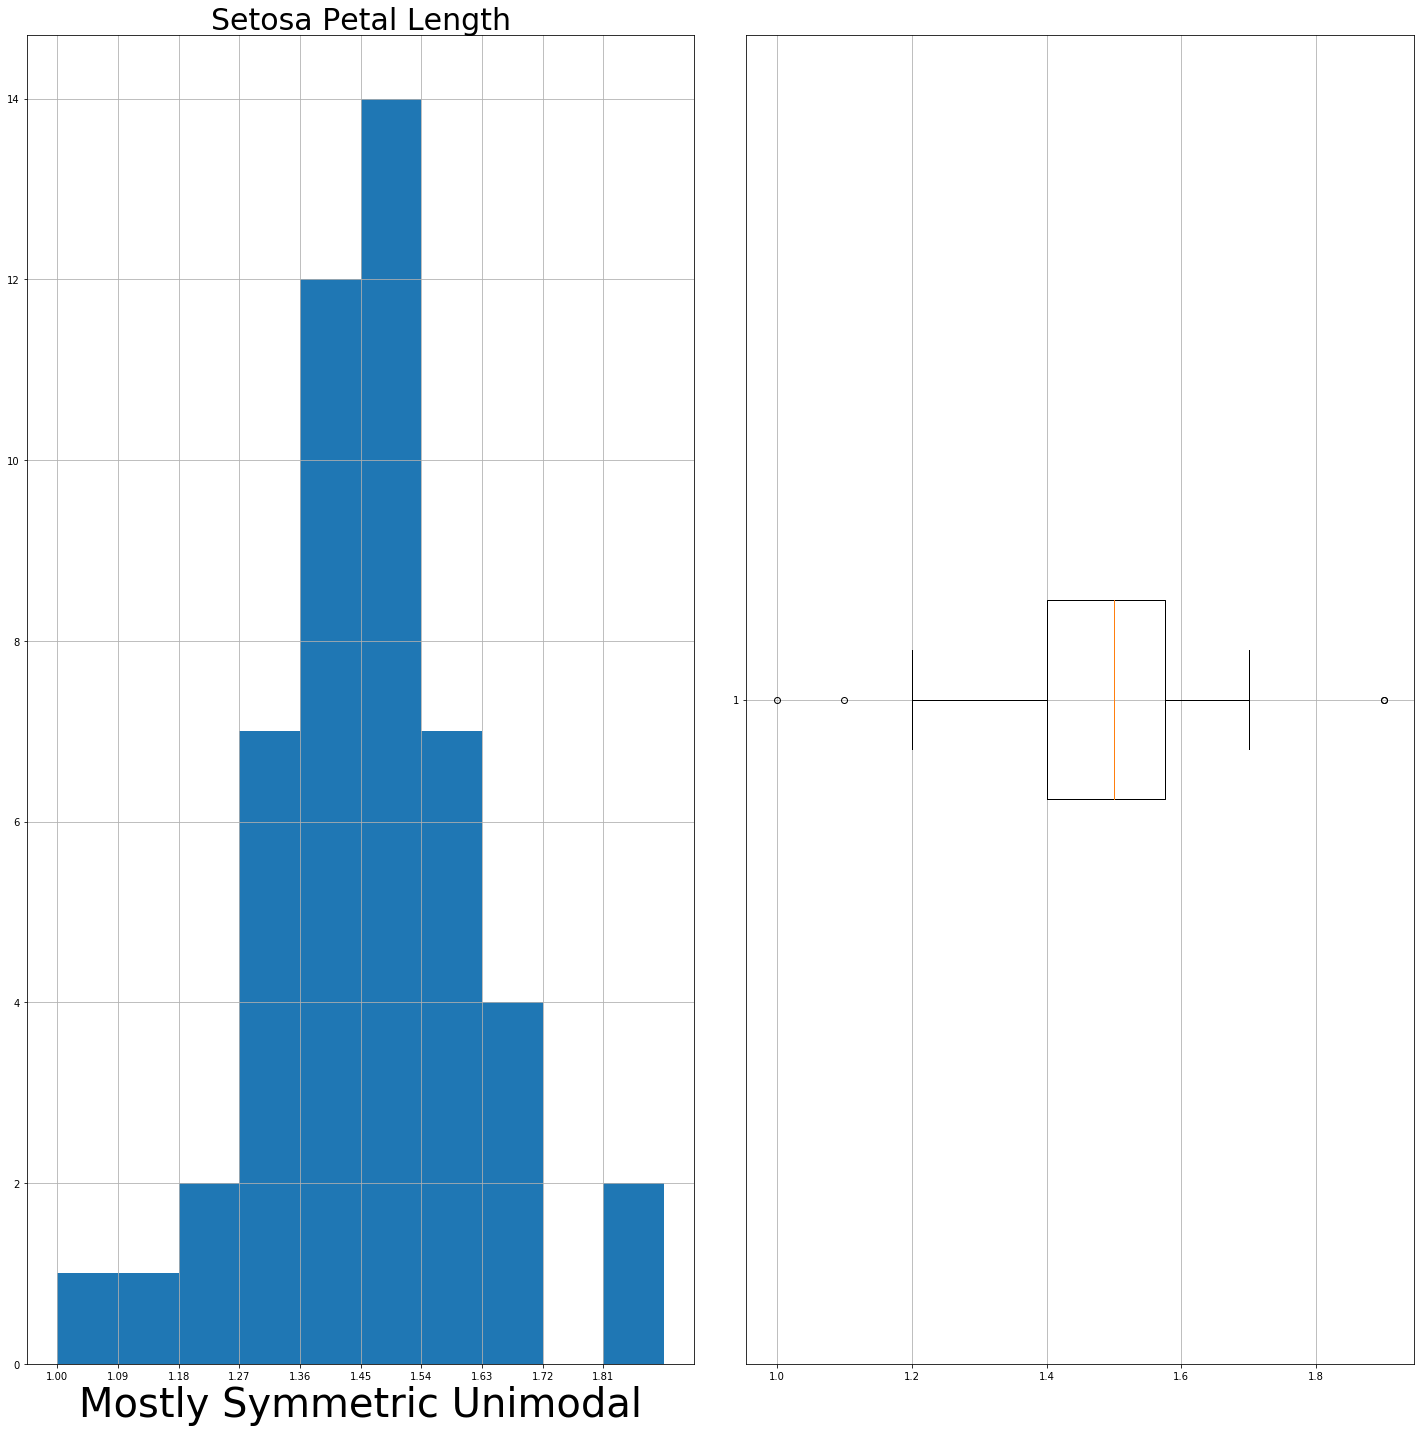

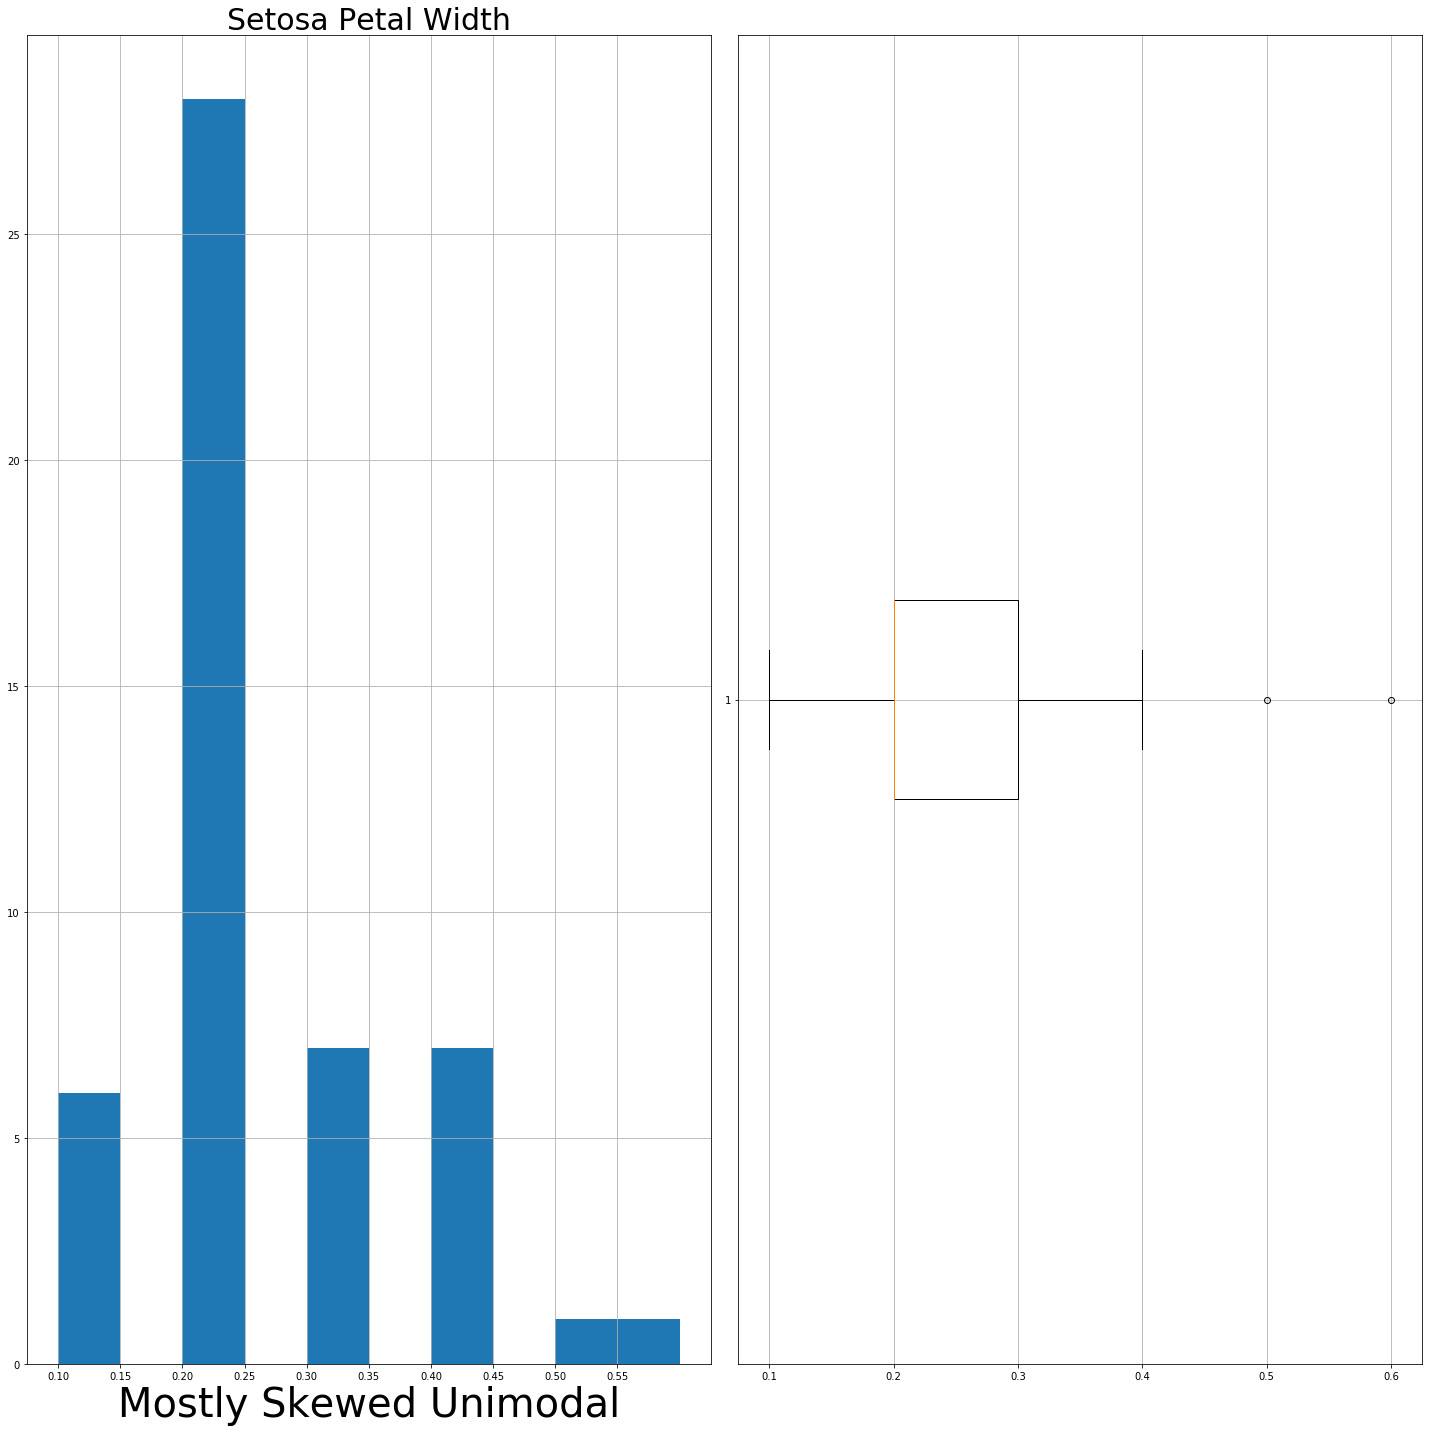

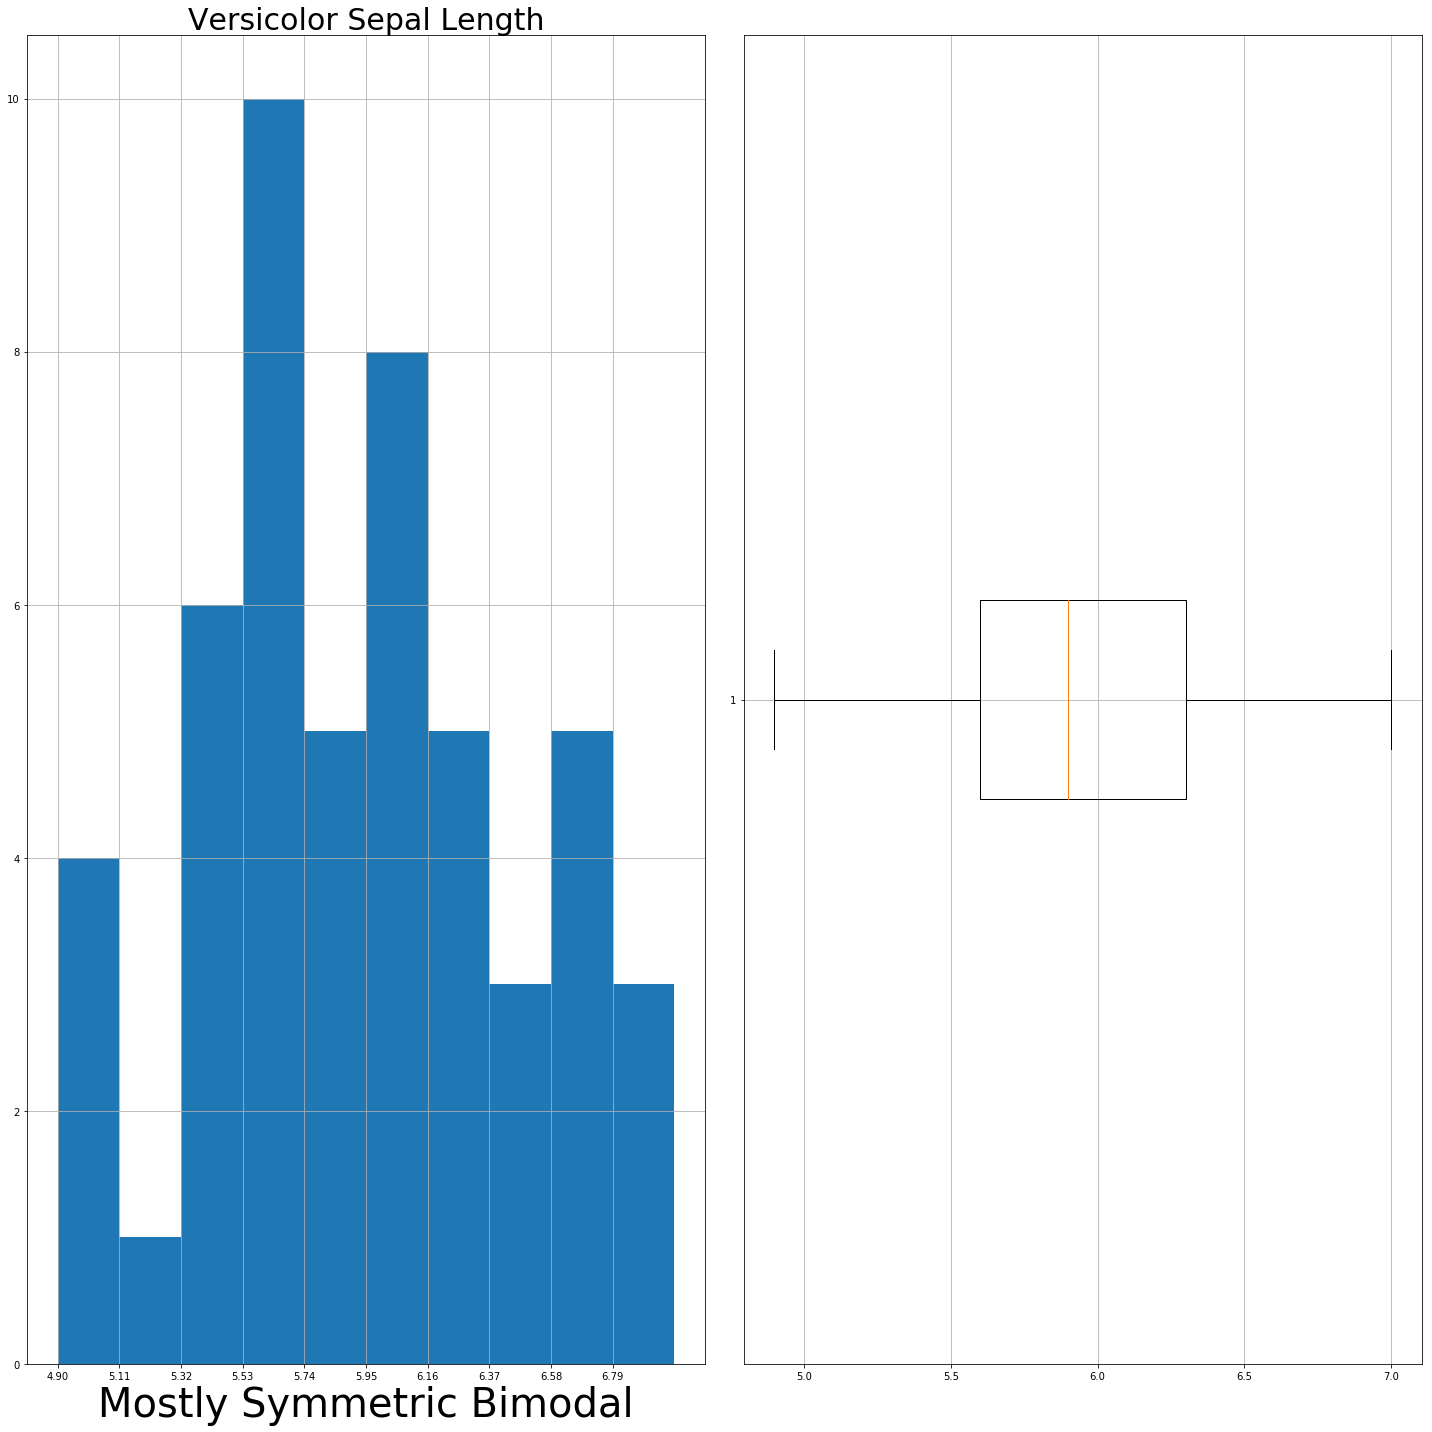

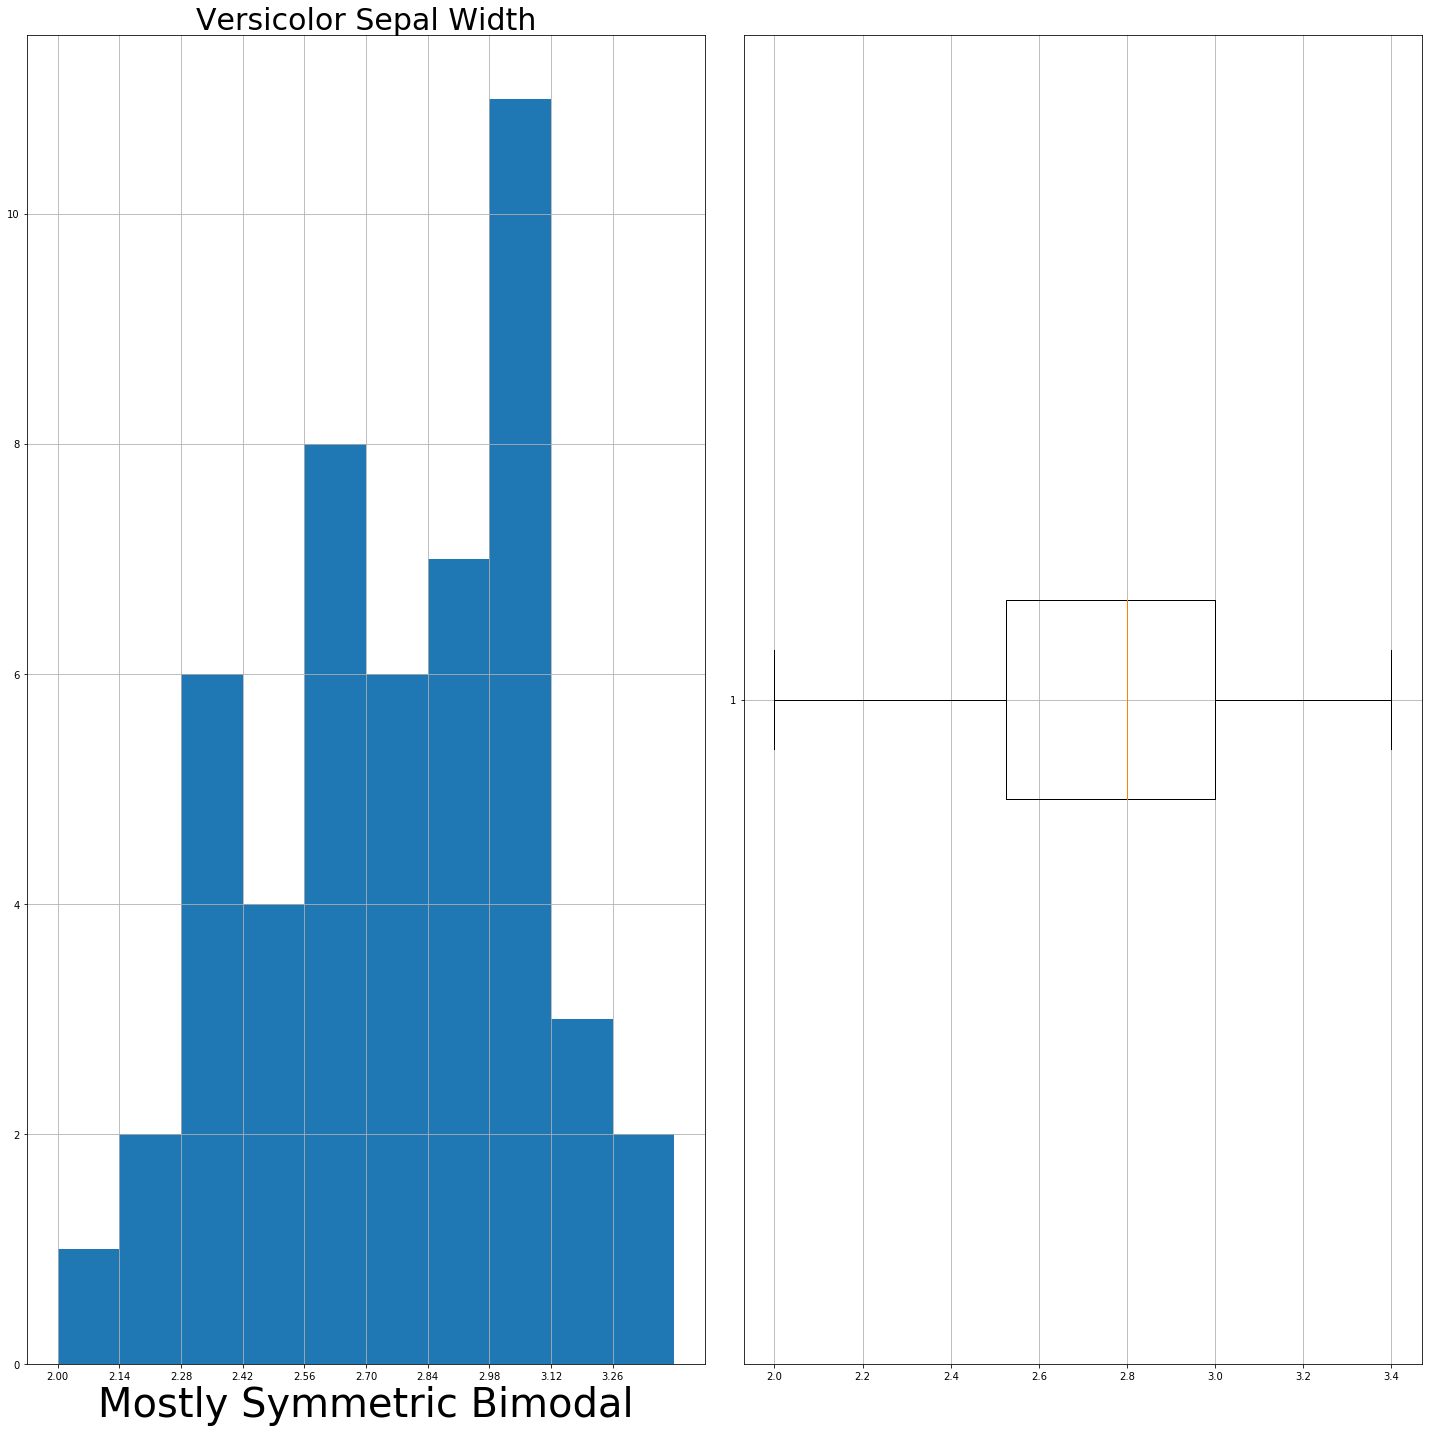

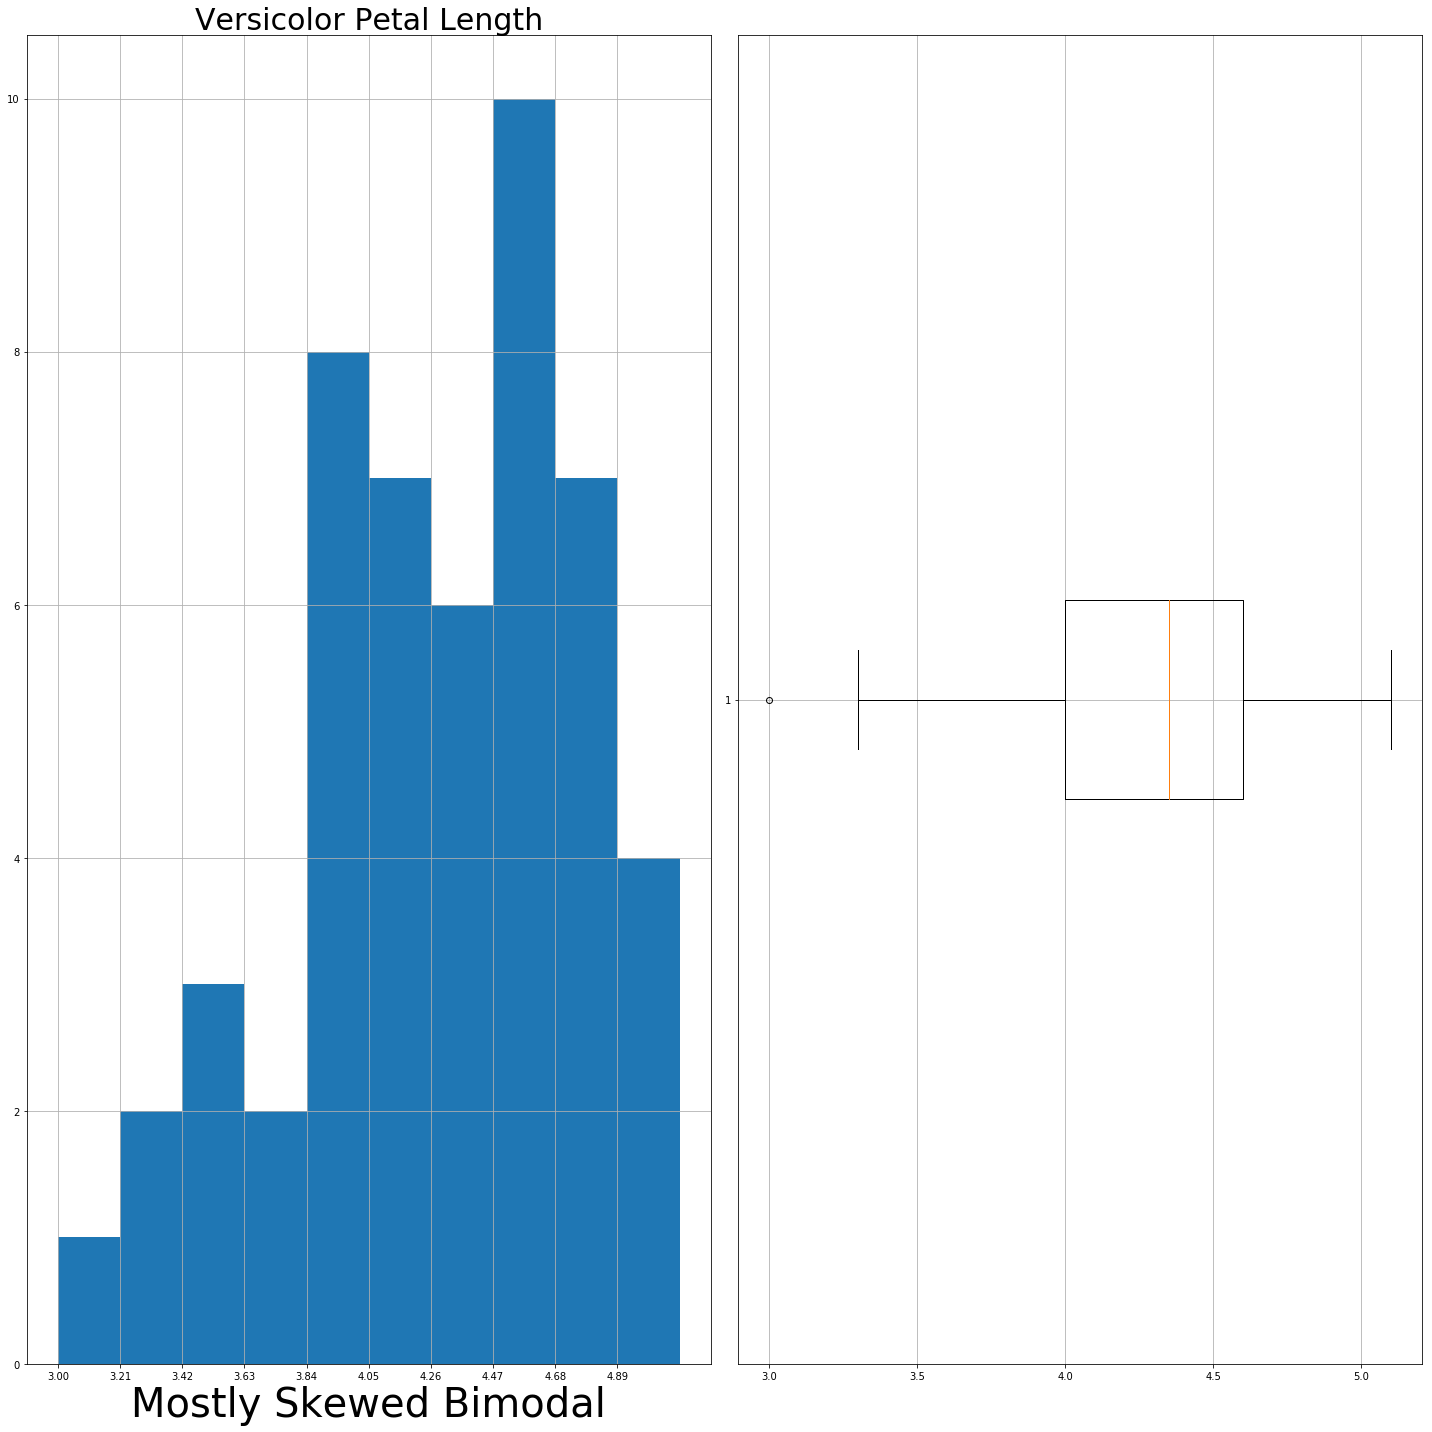

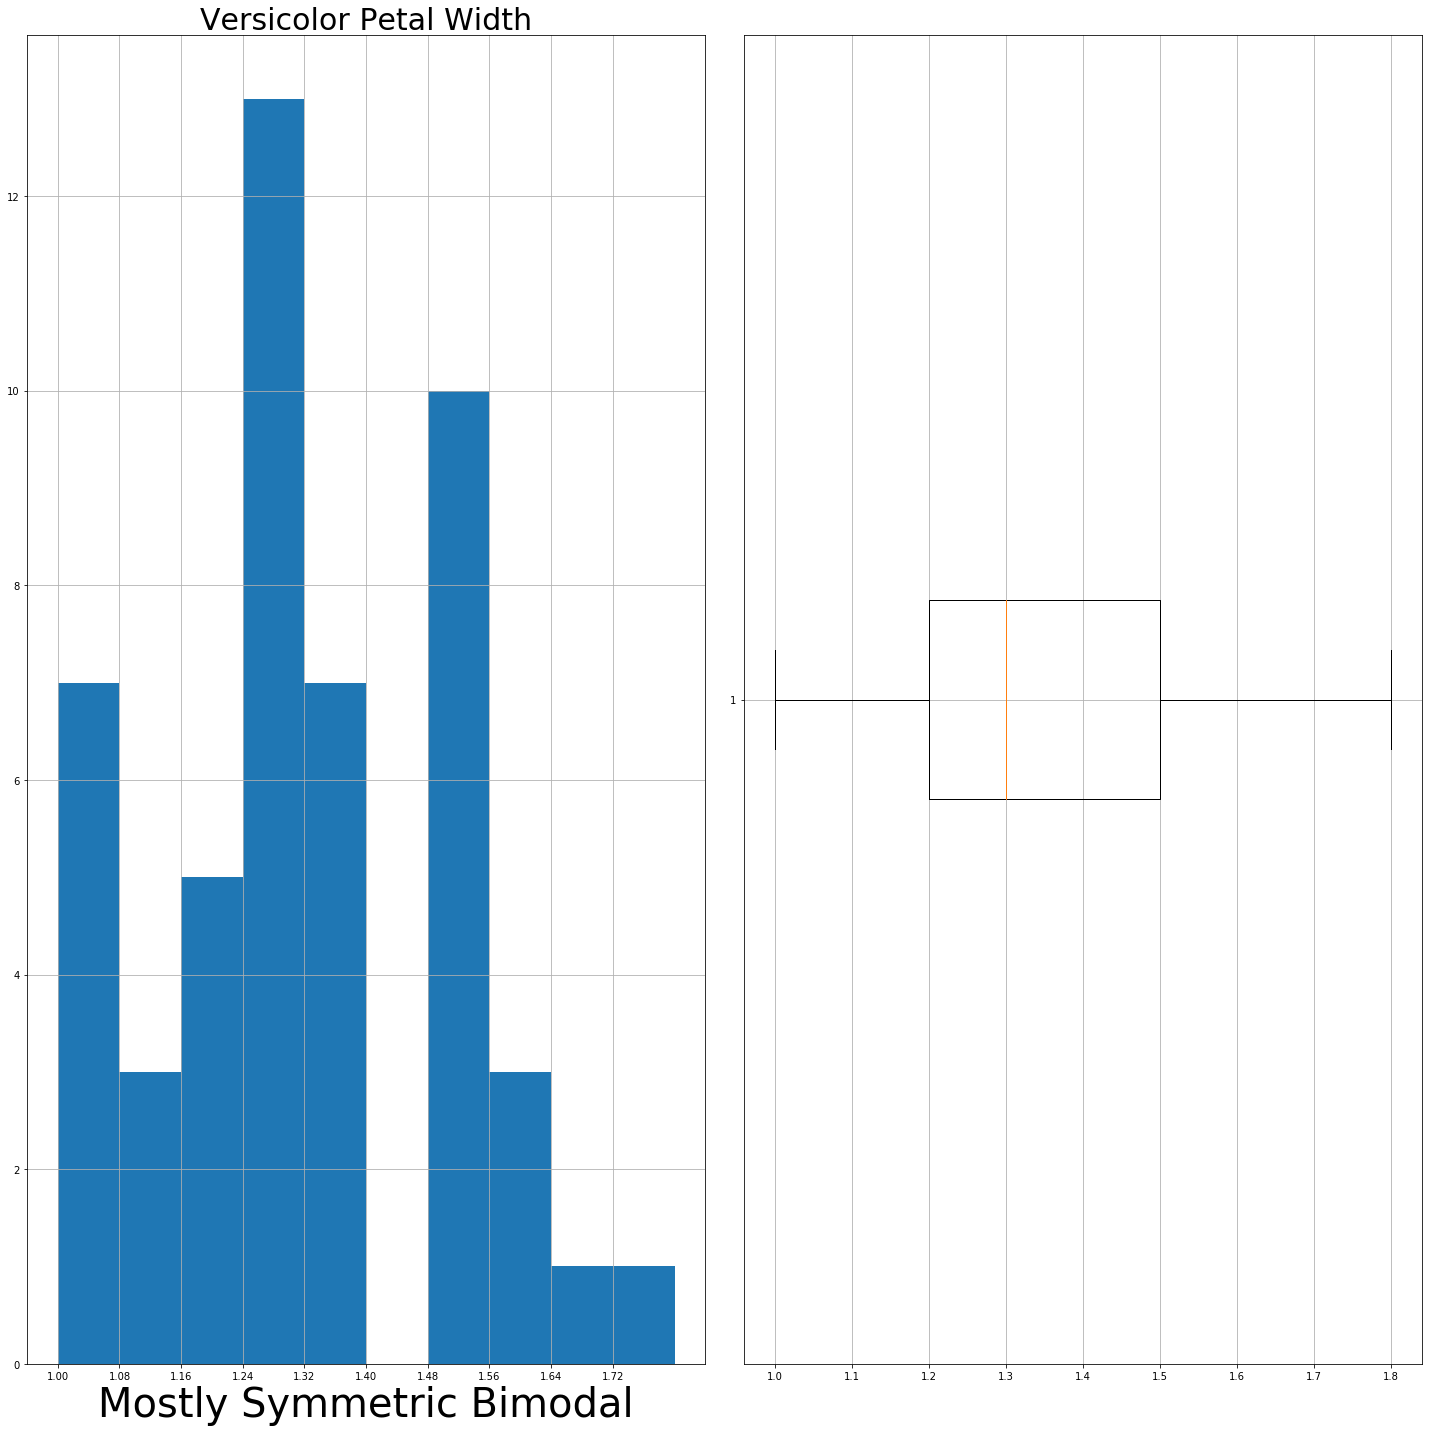

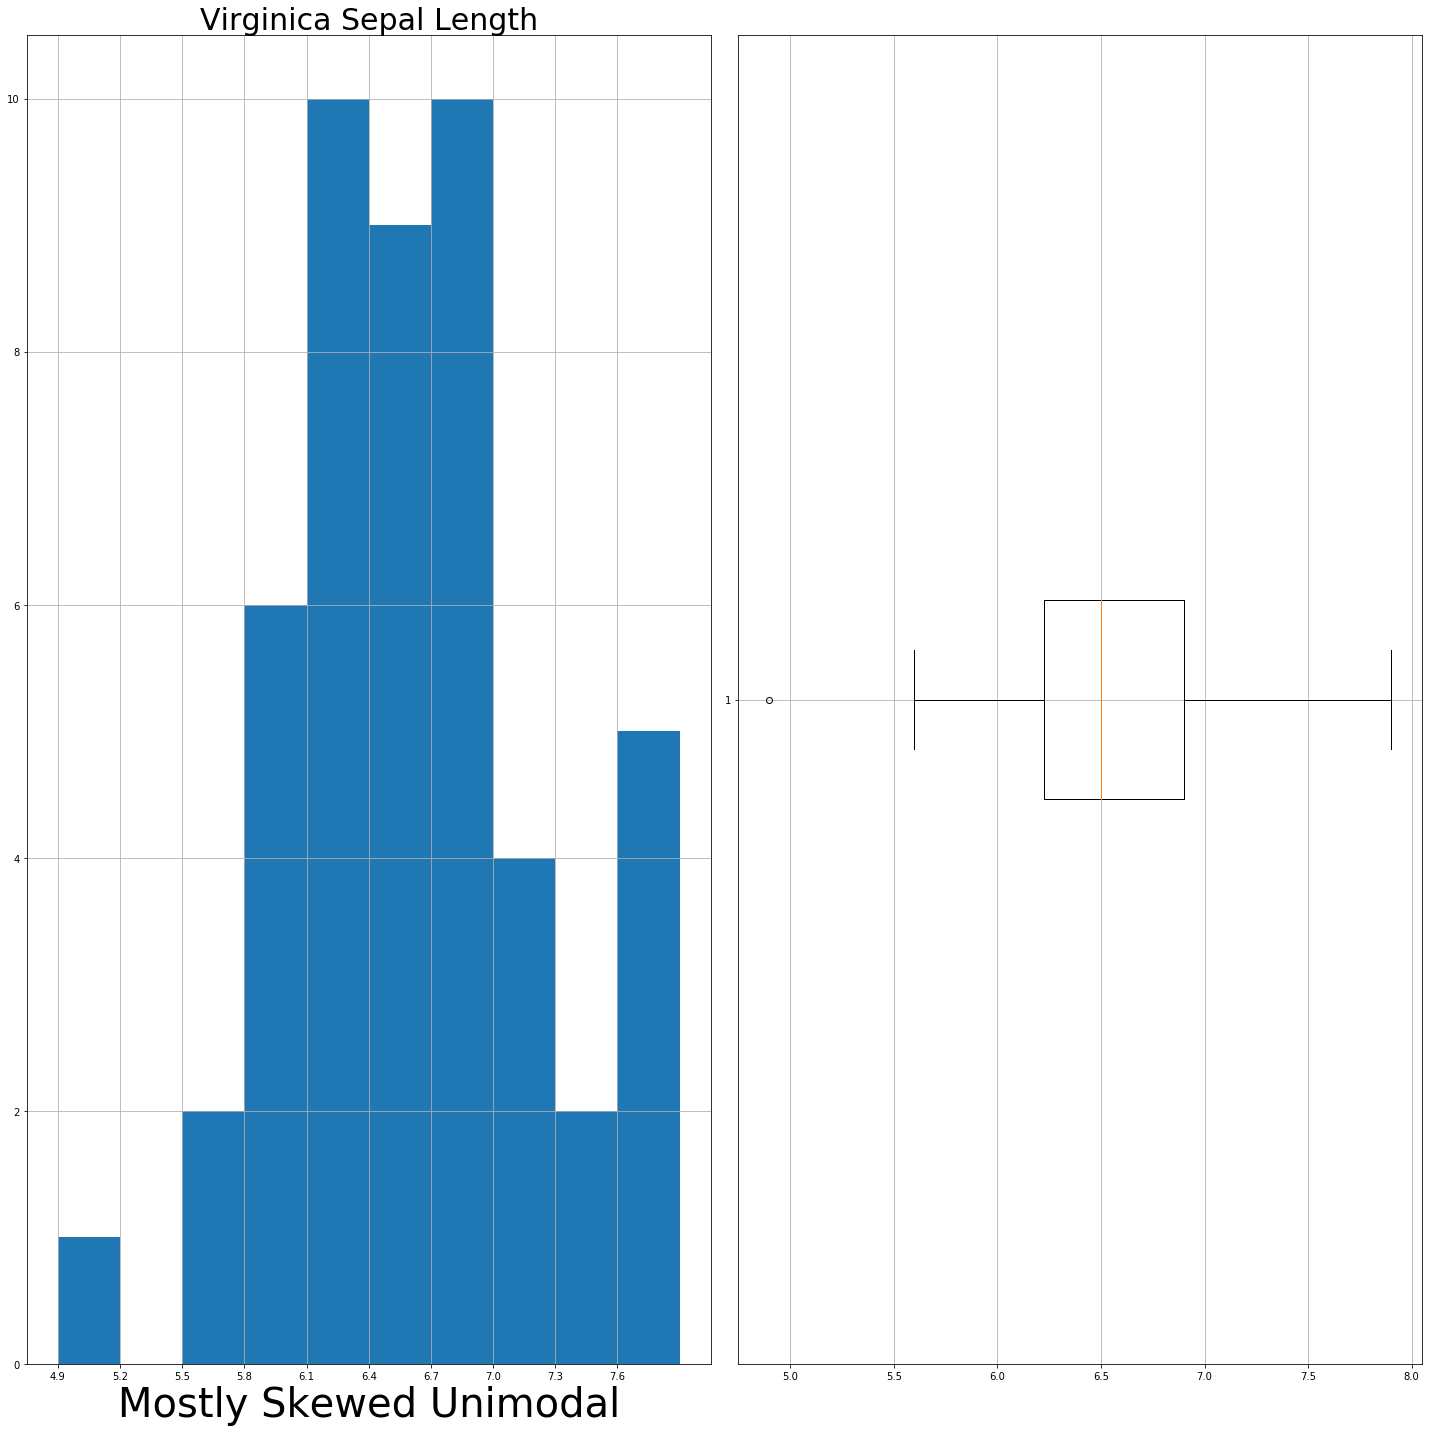

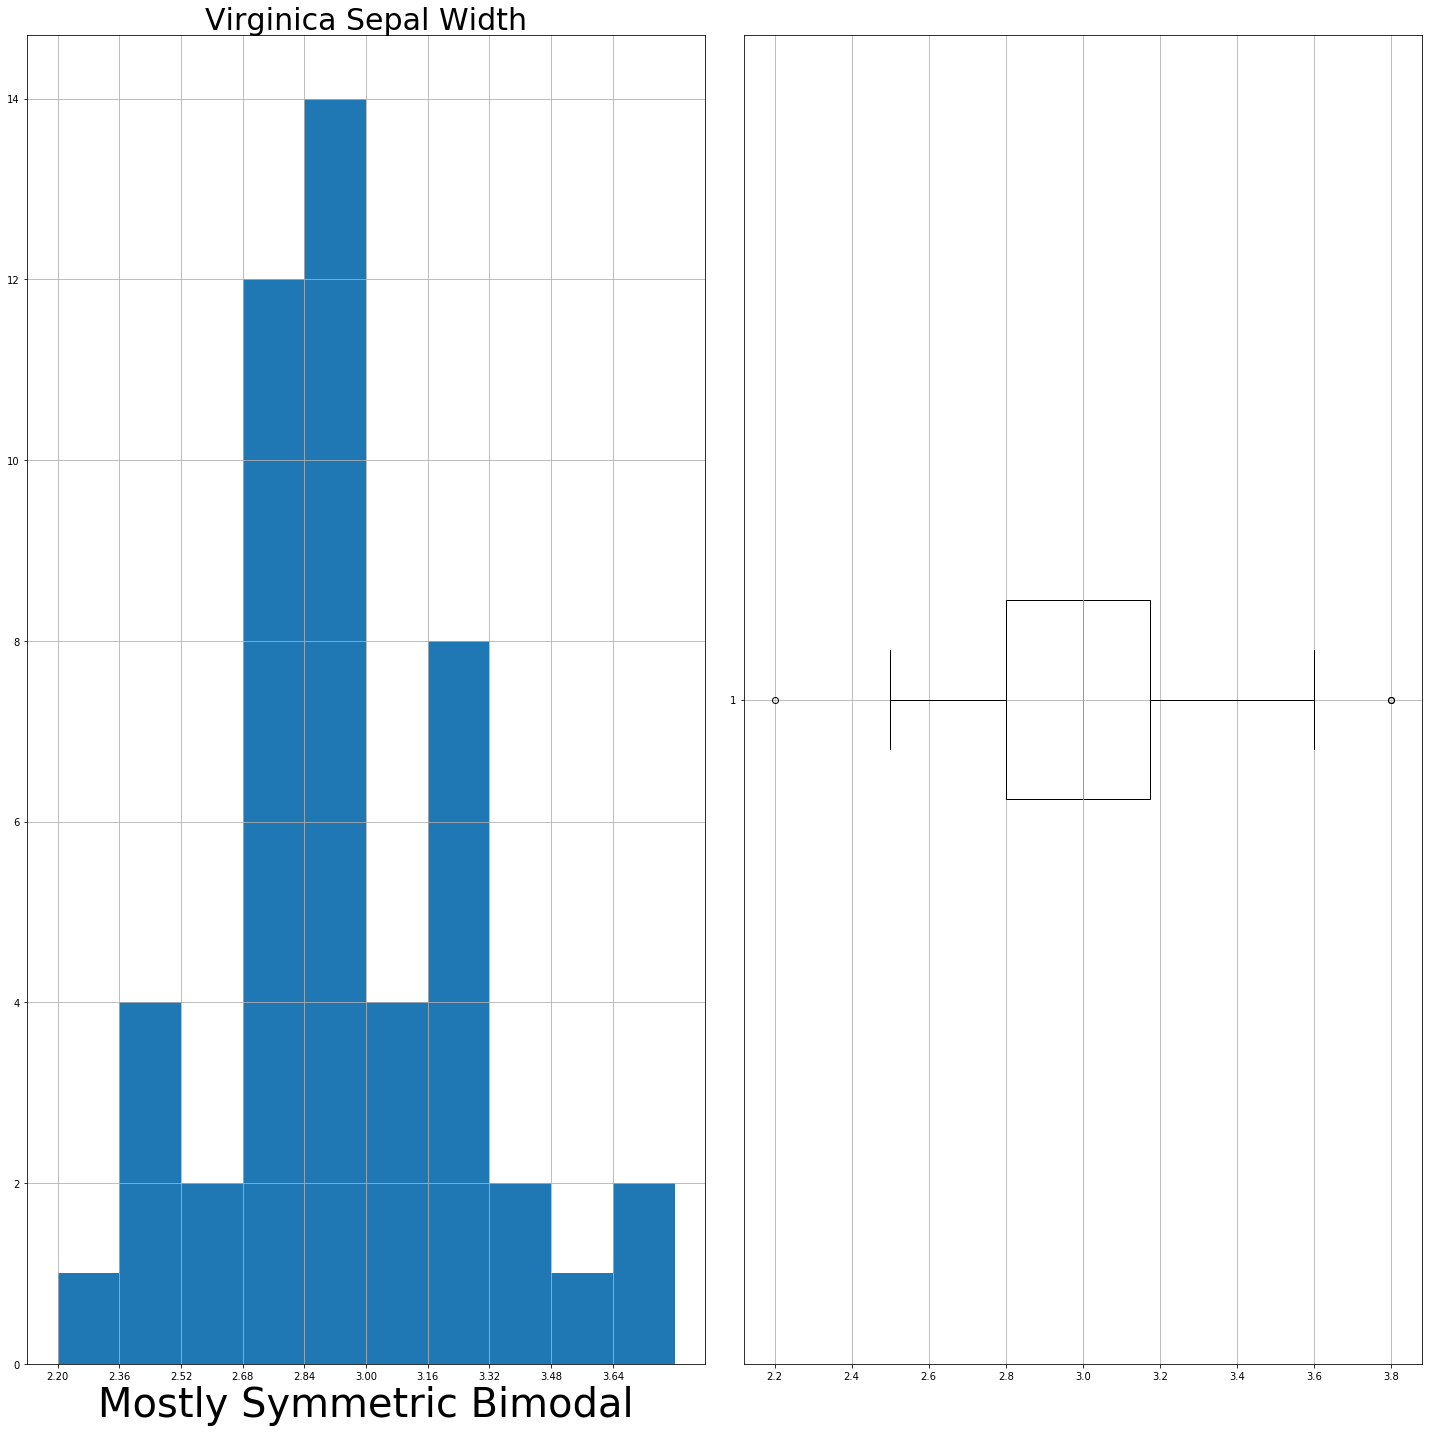

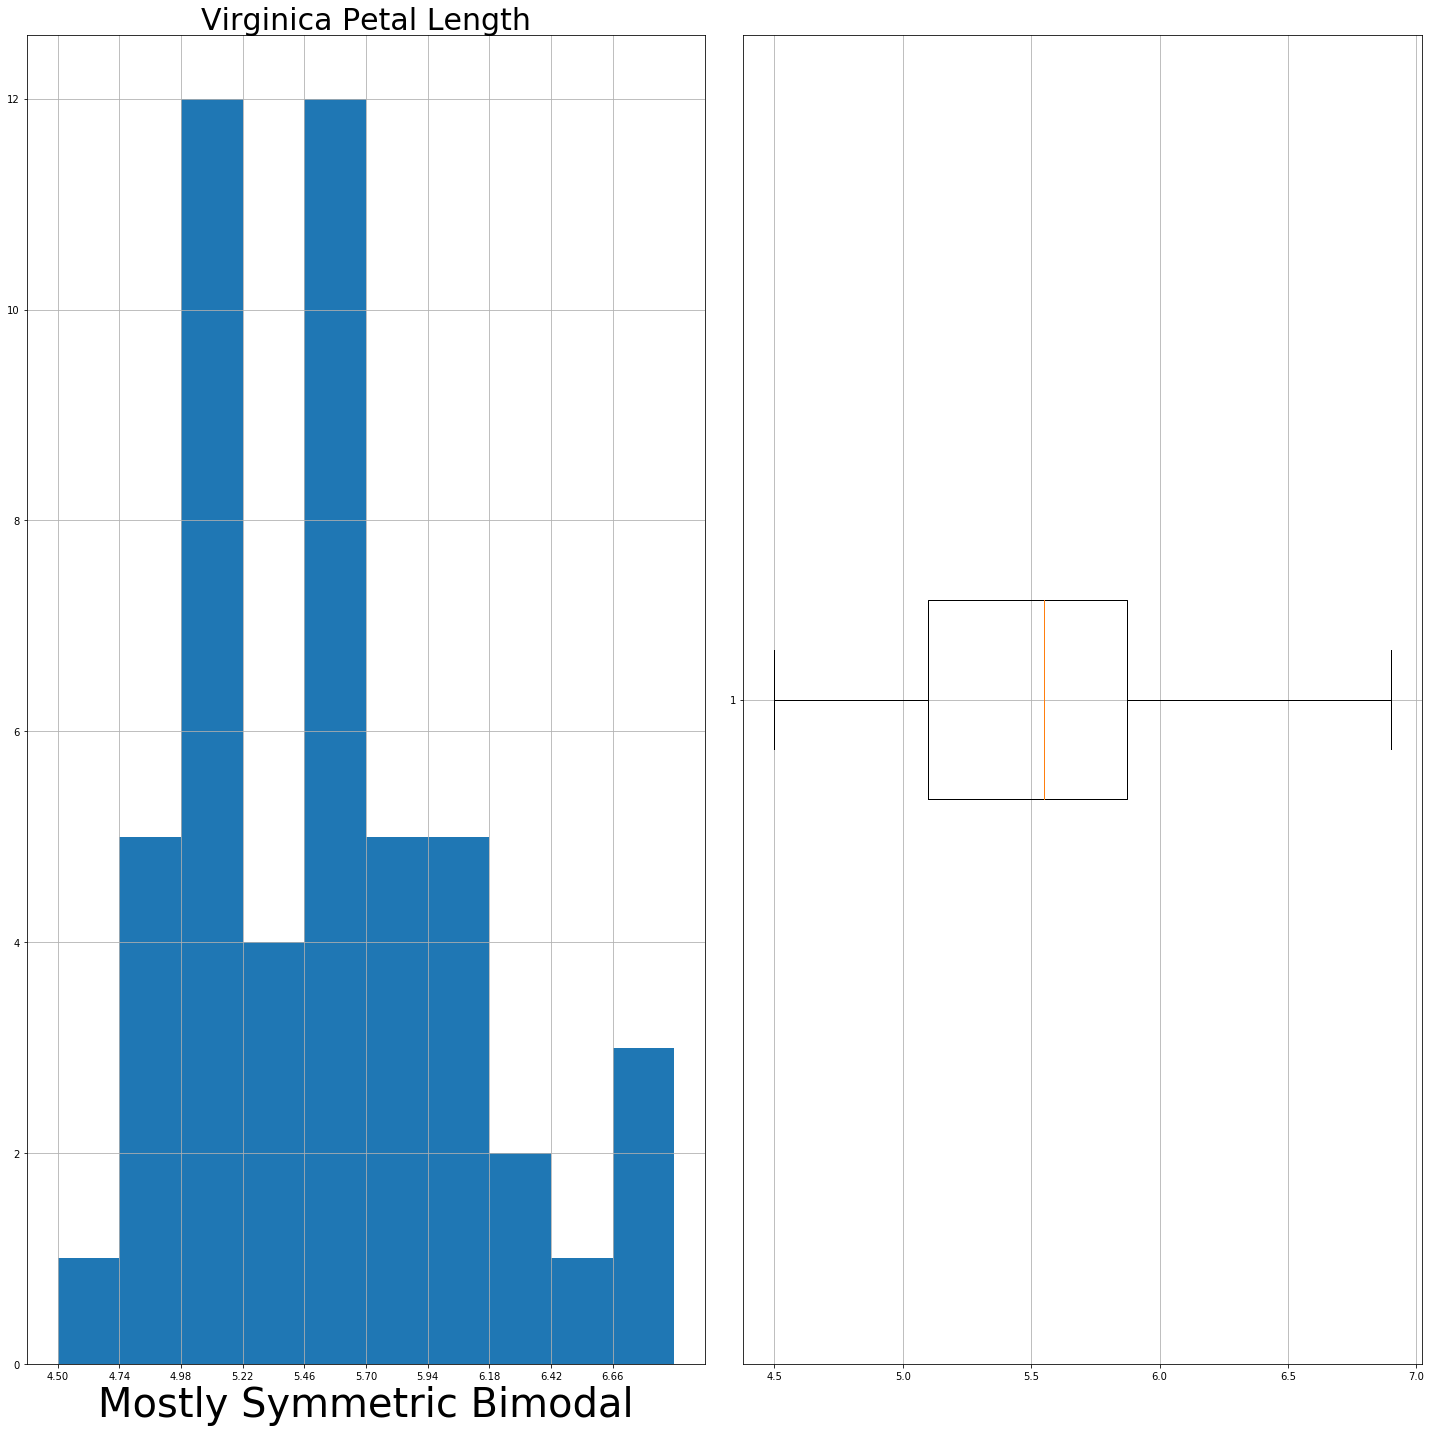

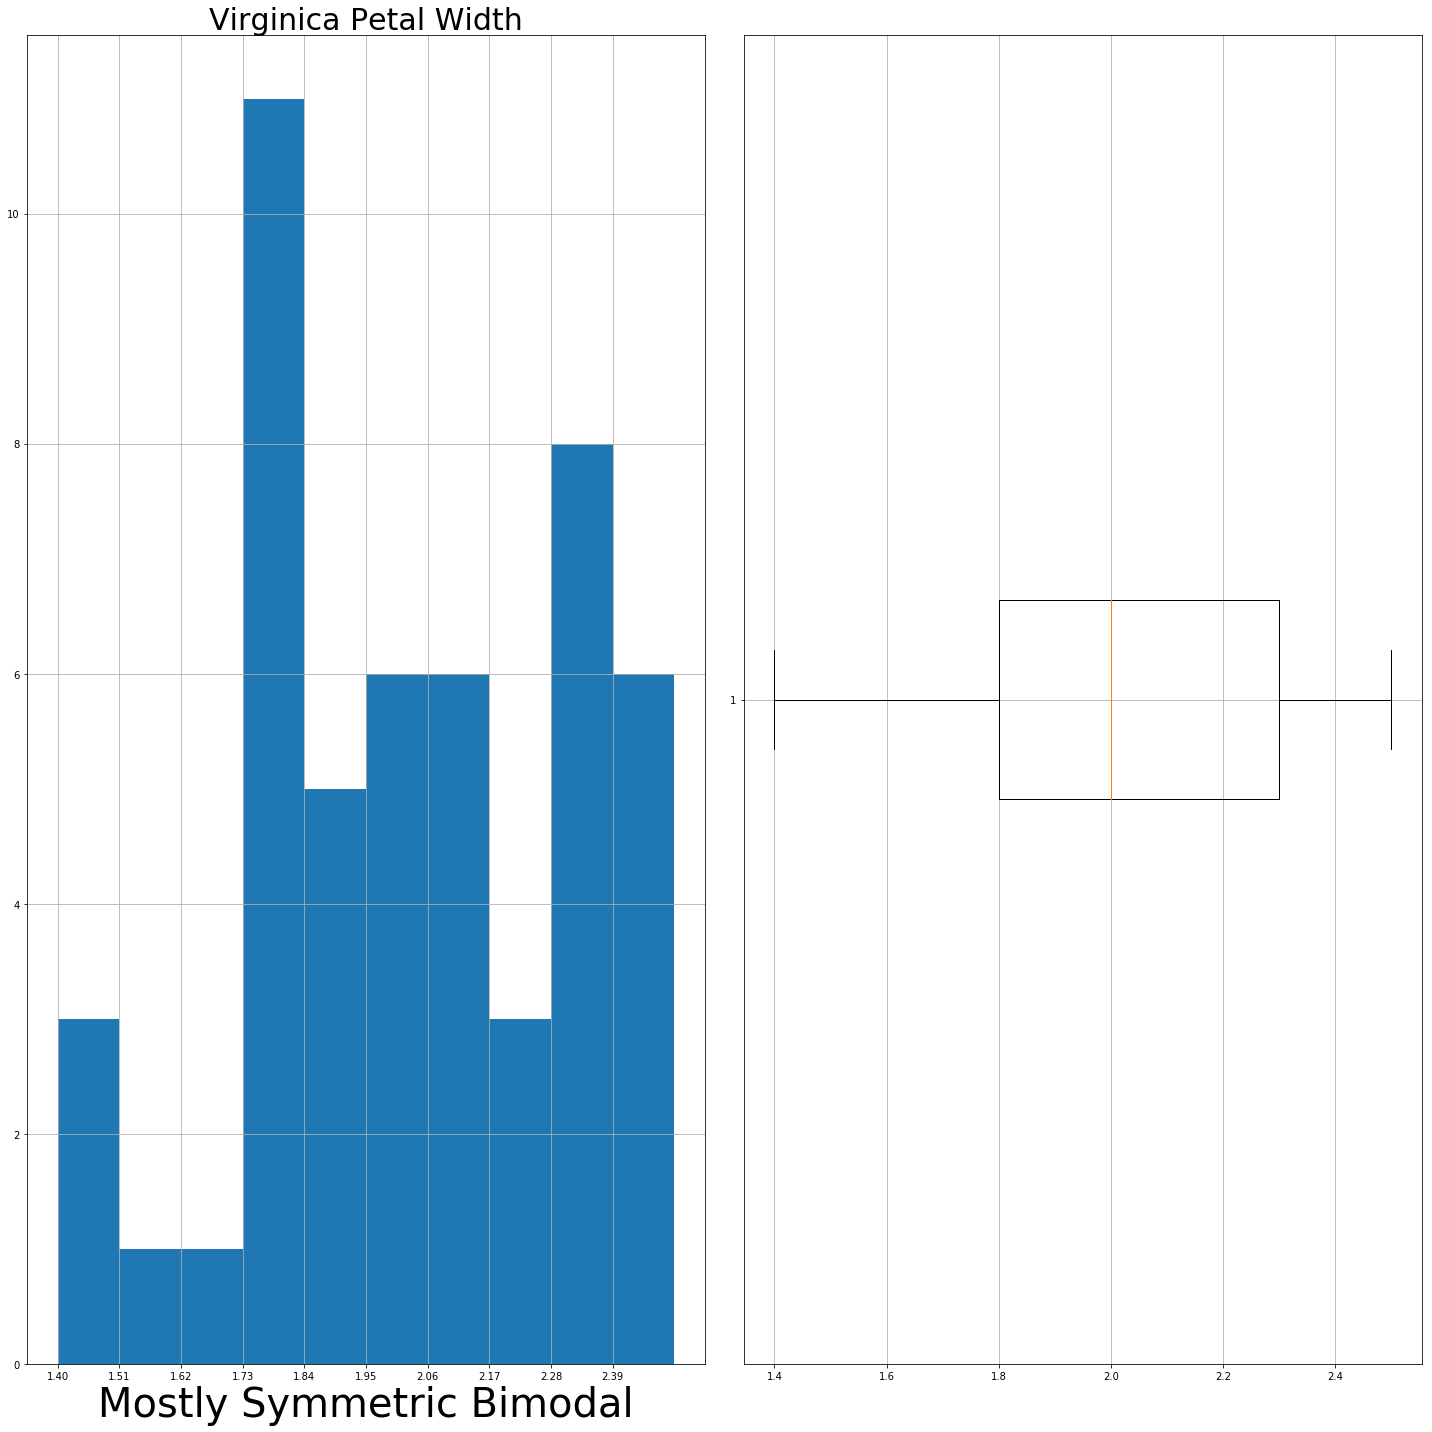

In [183]:
"""
Function calls for Iris Data, bin size = 10

"""

# Setosa
histogram(setosa['sepal_length'], 10,"Setosa Sepal Length", text = "Bimodal")
histogram(setosa['sepal_width'], 10, "Setosa Sepal Width", text = "Unimodal")
histogram(setosa['petal_length'], 10,"Setosa Petal Length", text = "Unimodal")
histogram(setosa['petal_width'], 10, "Setosa Petal Width", text = "Unimodal")

# Versicolor
histogram(versicolor['sepal_length'], 10,"Versicolor Sepal Length", text = "Bimodal")
histogram(versicolor['sepal_width'], 10, "Versicolor Sepal Width", text = "Bimodal")
histogram(versicolor['petal_length'], 10,"Versicolor Petal Length", text = "Bimodal")
histogram(versicolor['petal_width'], 10,"Versicolor Petal Width", text = "Bimodal")

# Virginica
histogram(virginica['sepal_length'], 10,"Virginica Sepal Length", text = "Unimodal")
histogram(virginica['sepal_width'], 10,"Virginica Sepal Width", text = "Bimodal")
histogram(virginica['petal_length'], 10,"Virginica Petal Length", text = "Bimodal")
histogram(virginica['petal_width'], 10,"Virginica Petal Width", text = "Bimodal")

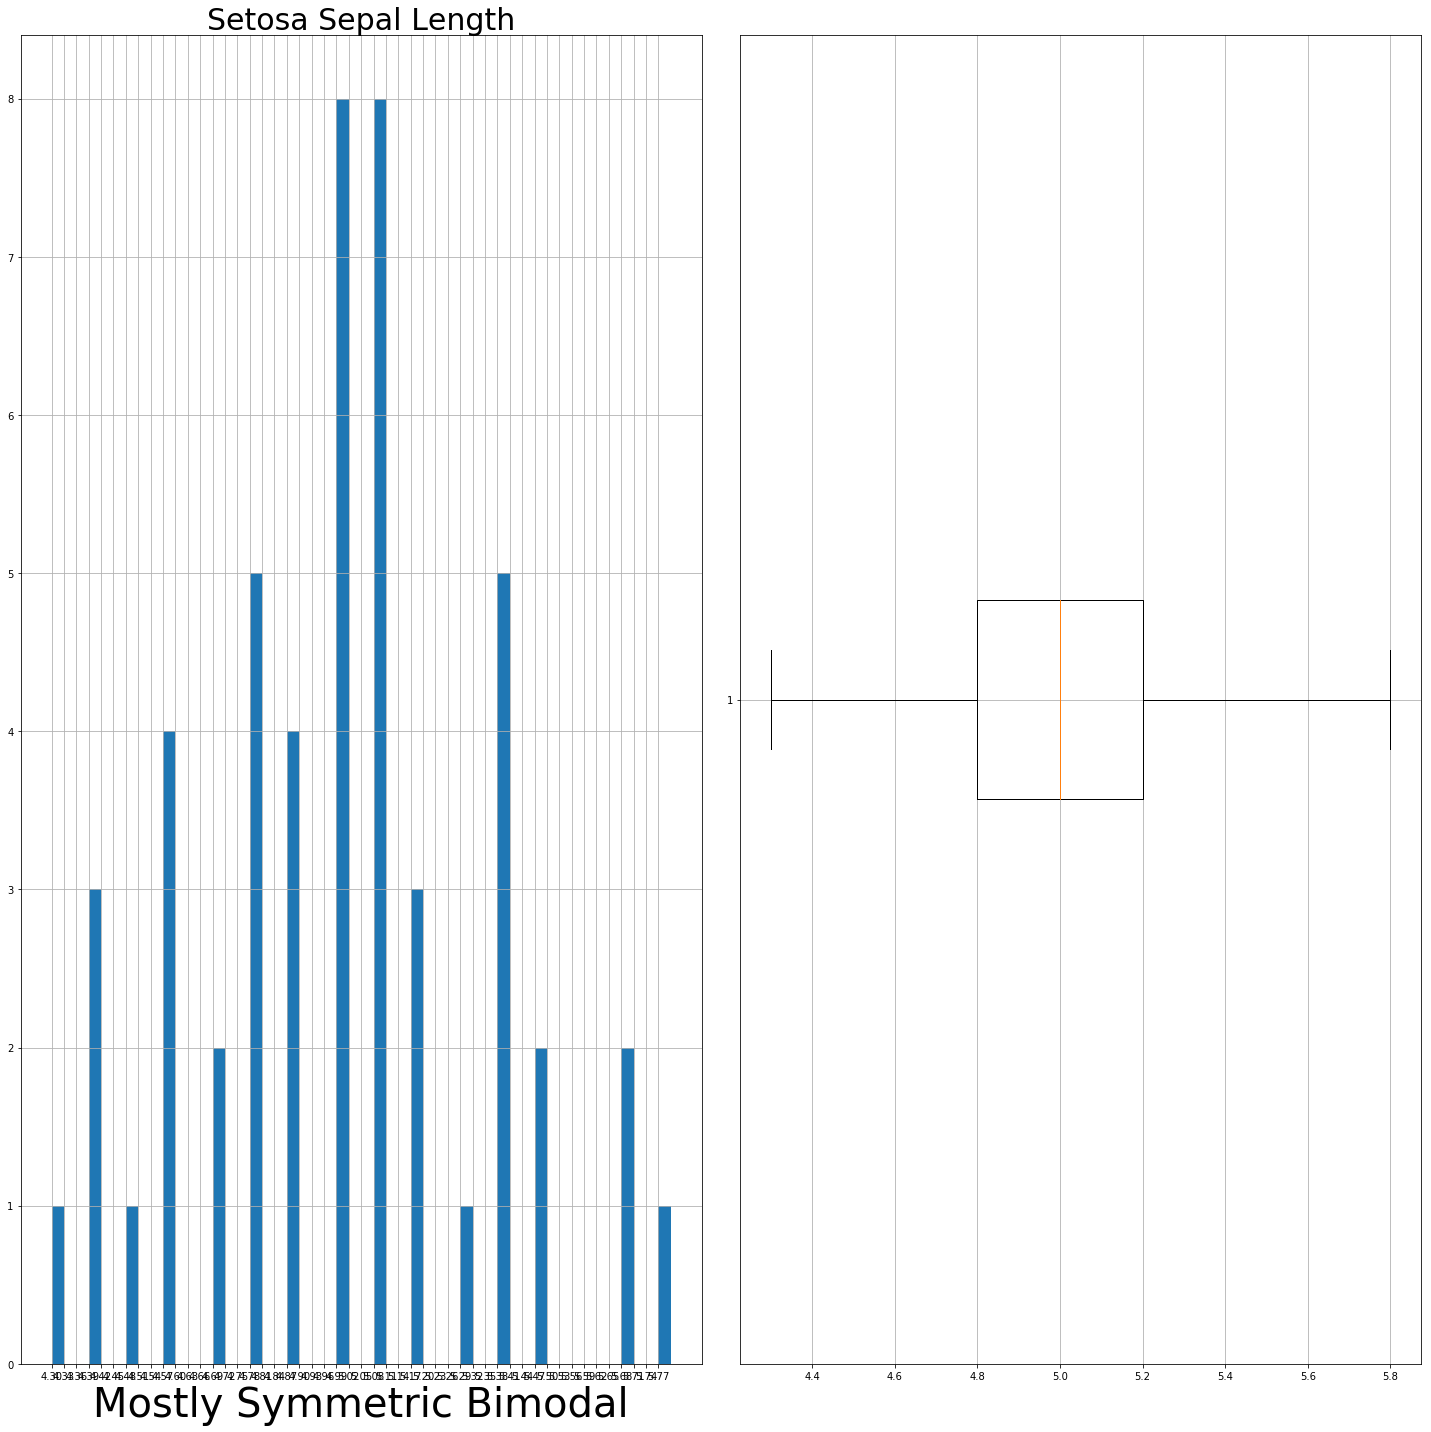

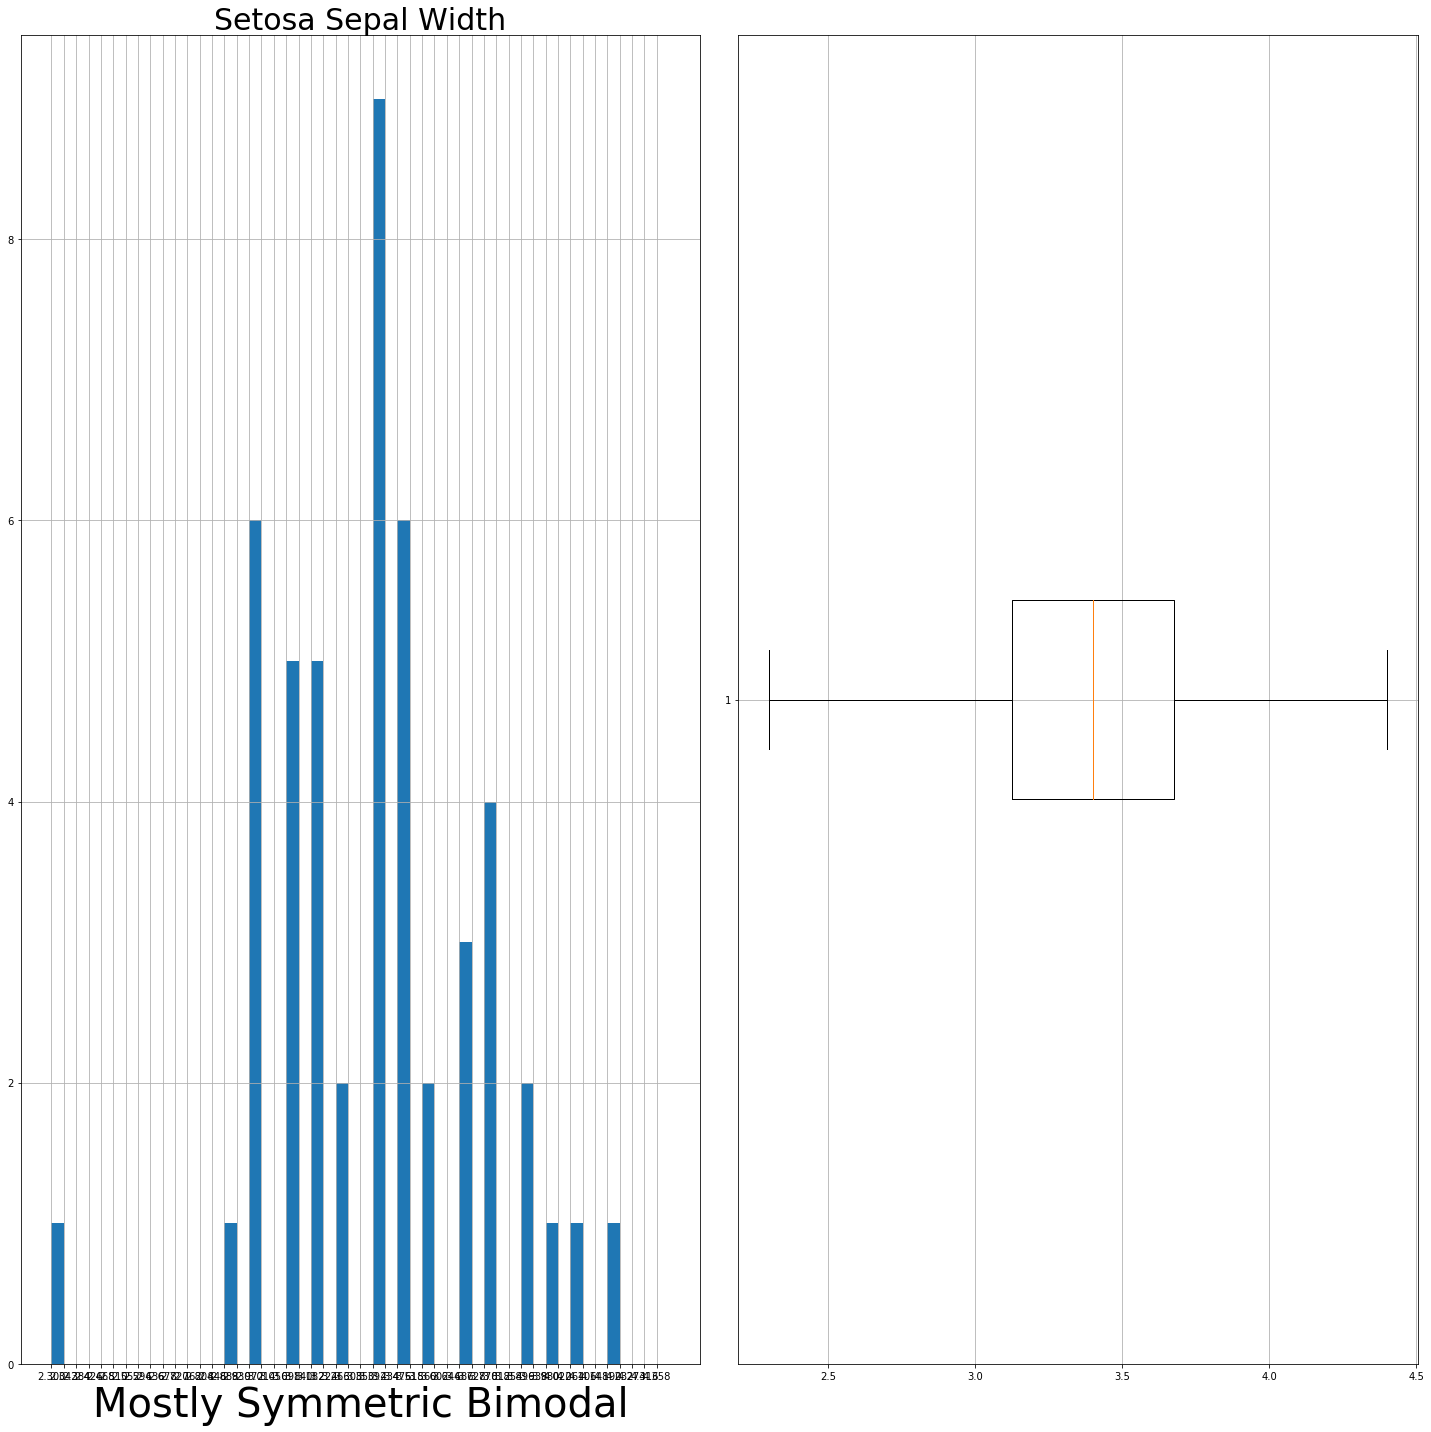

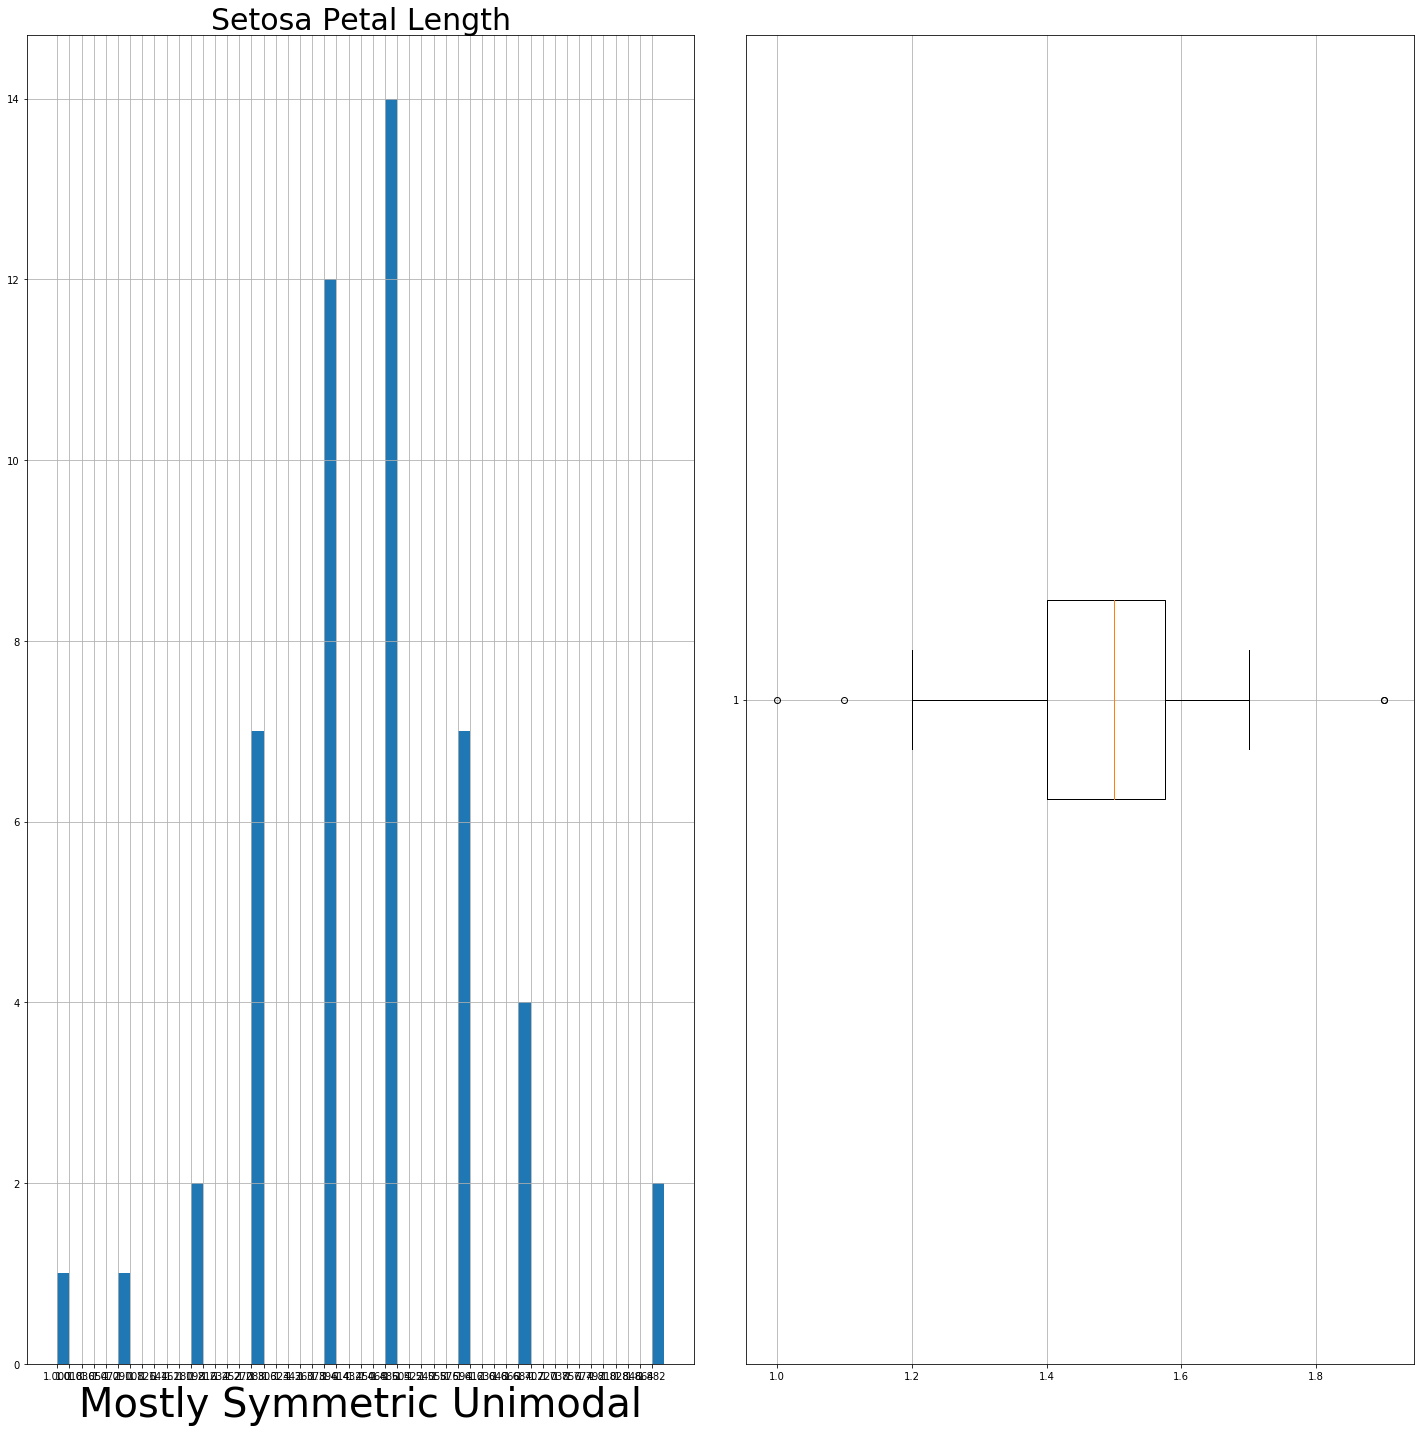

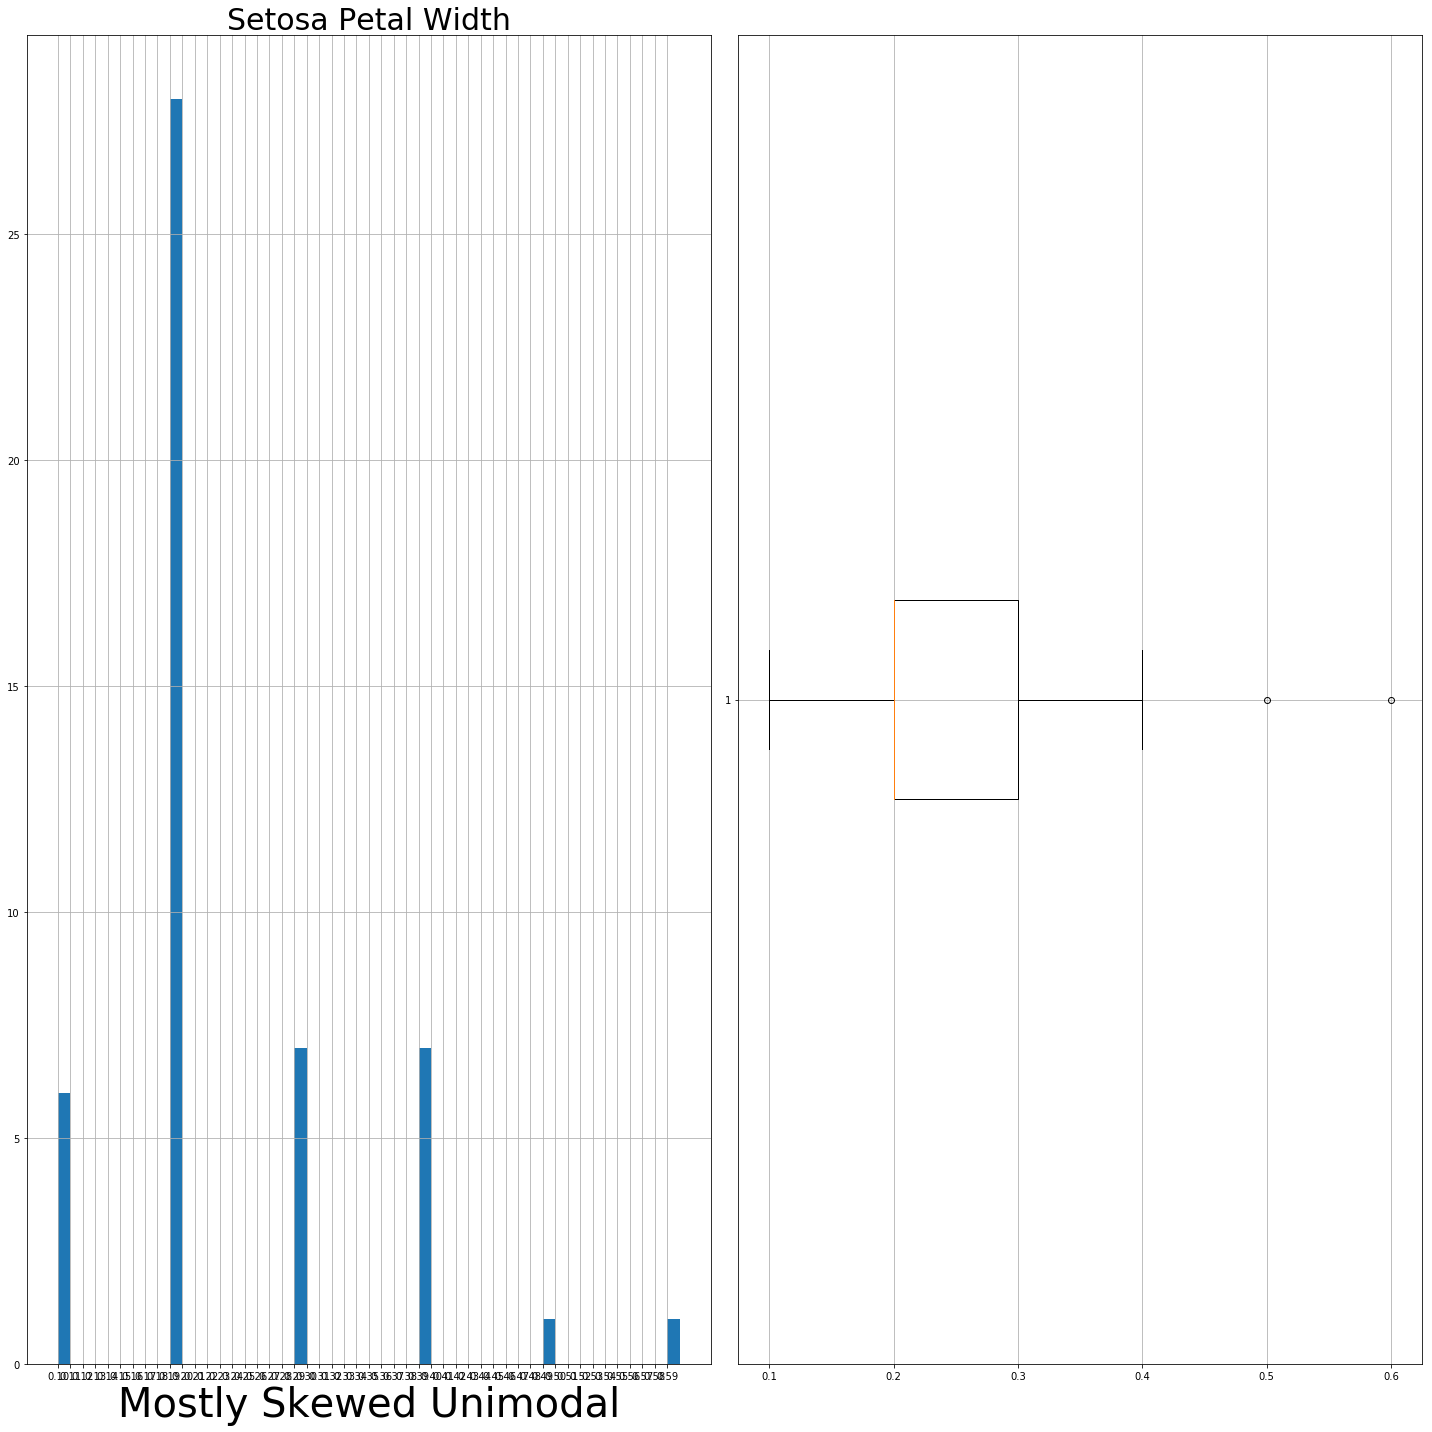

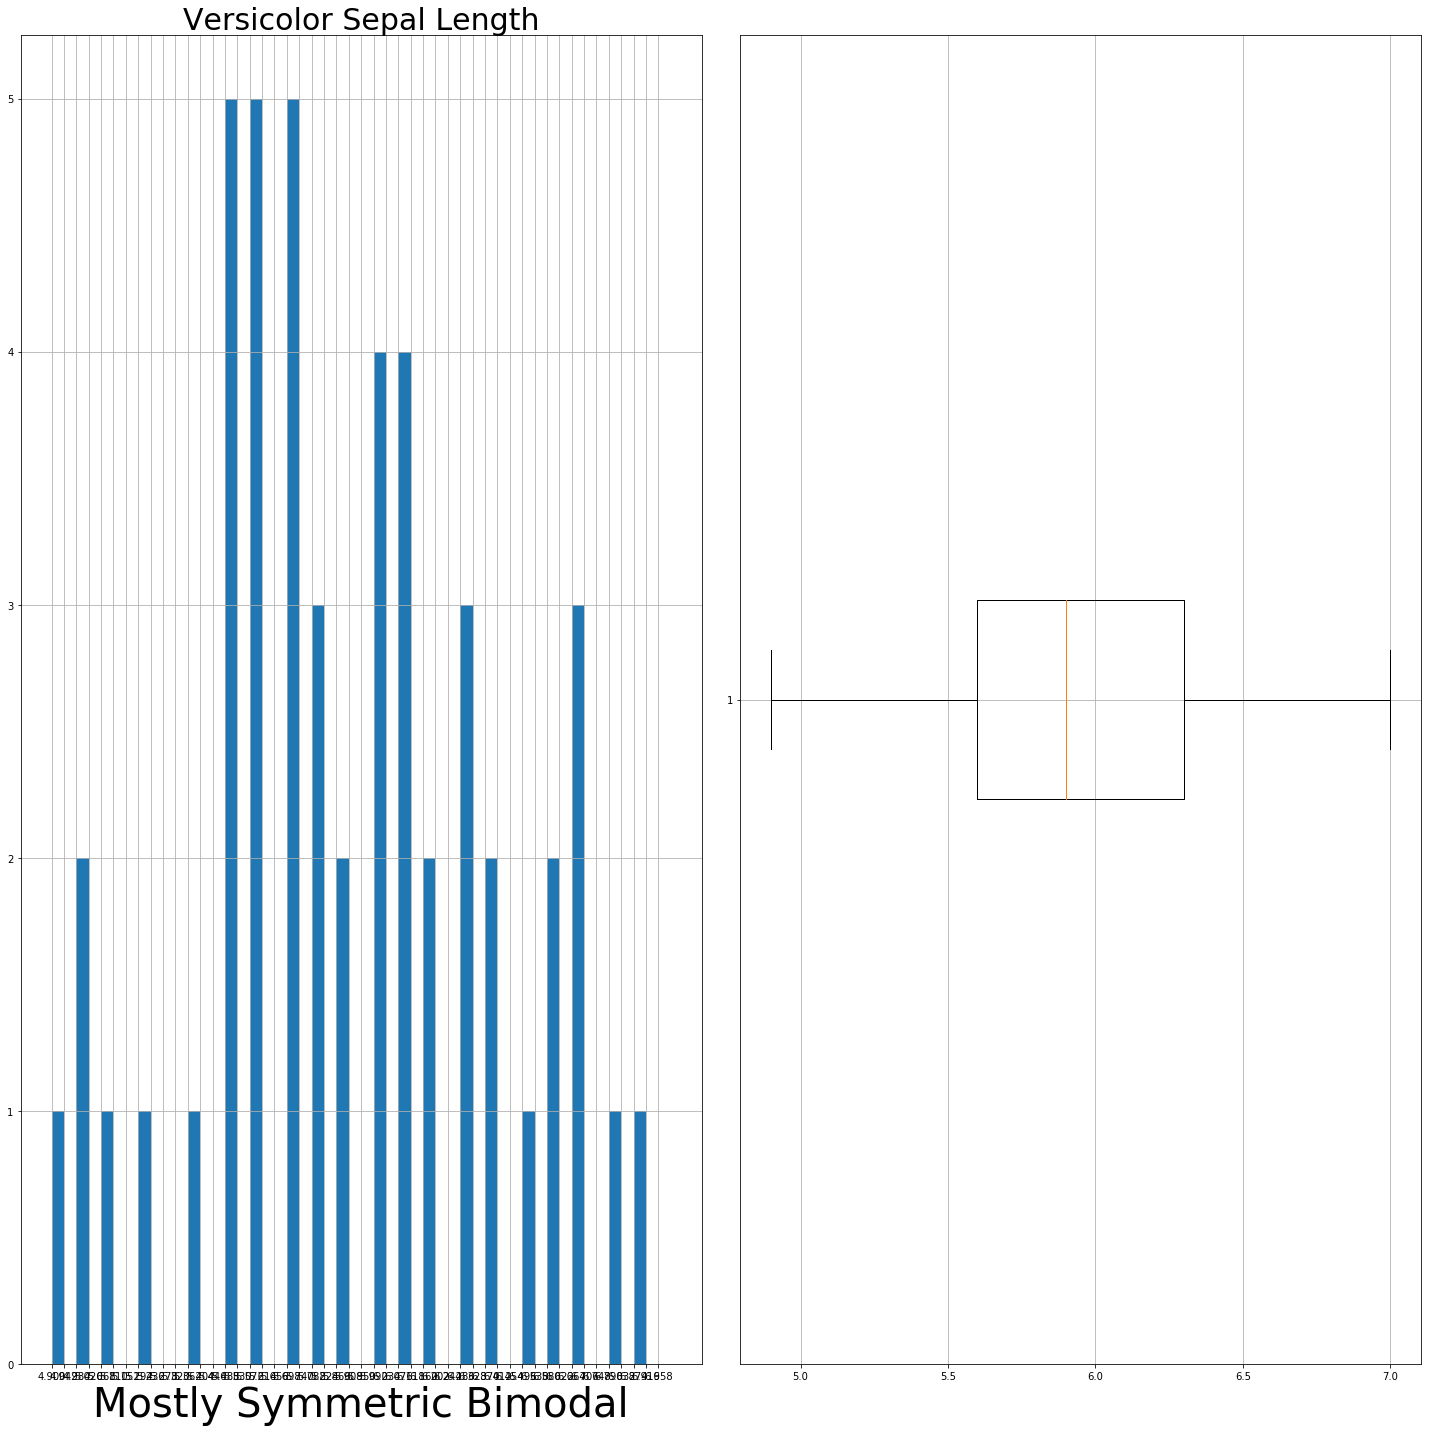

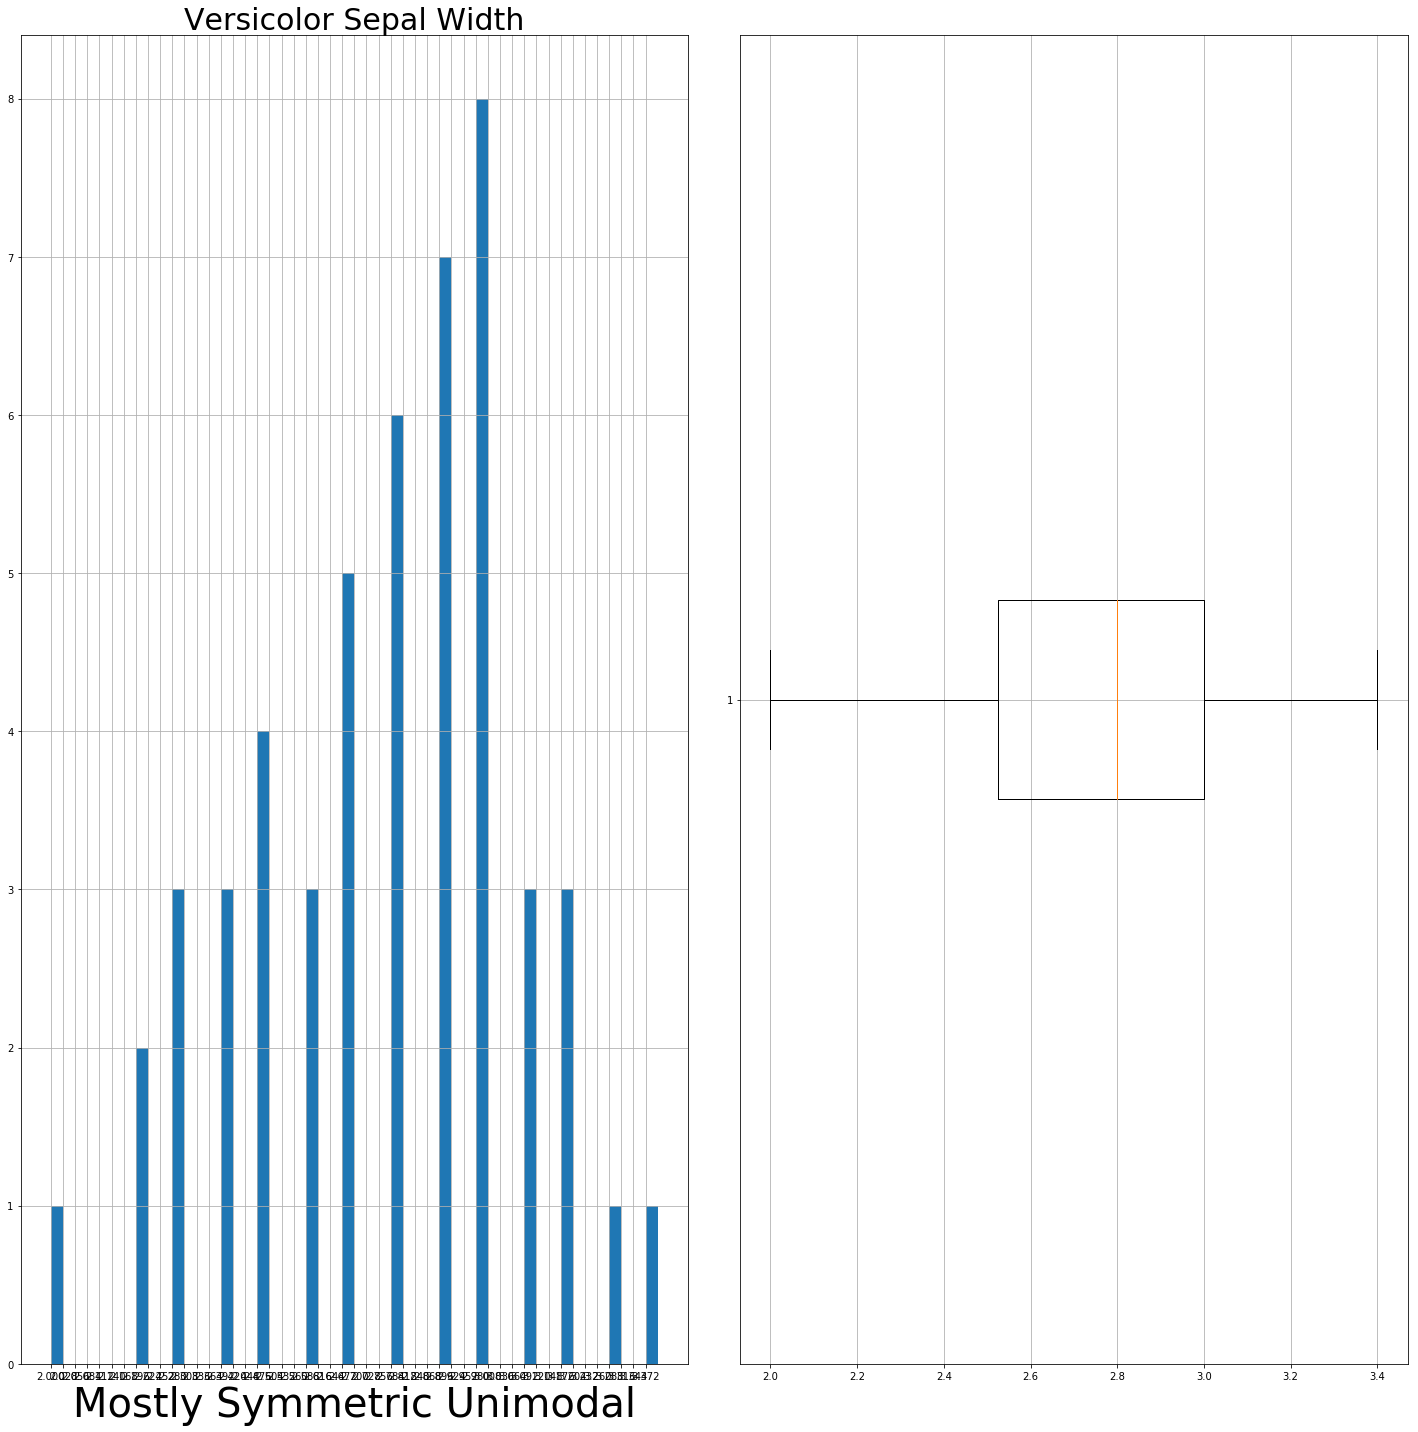

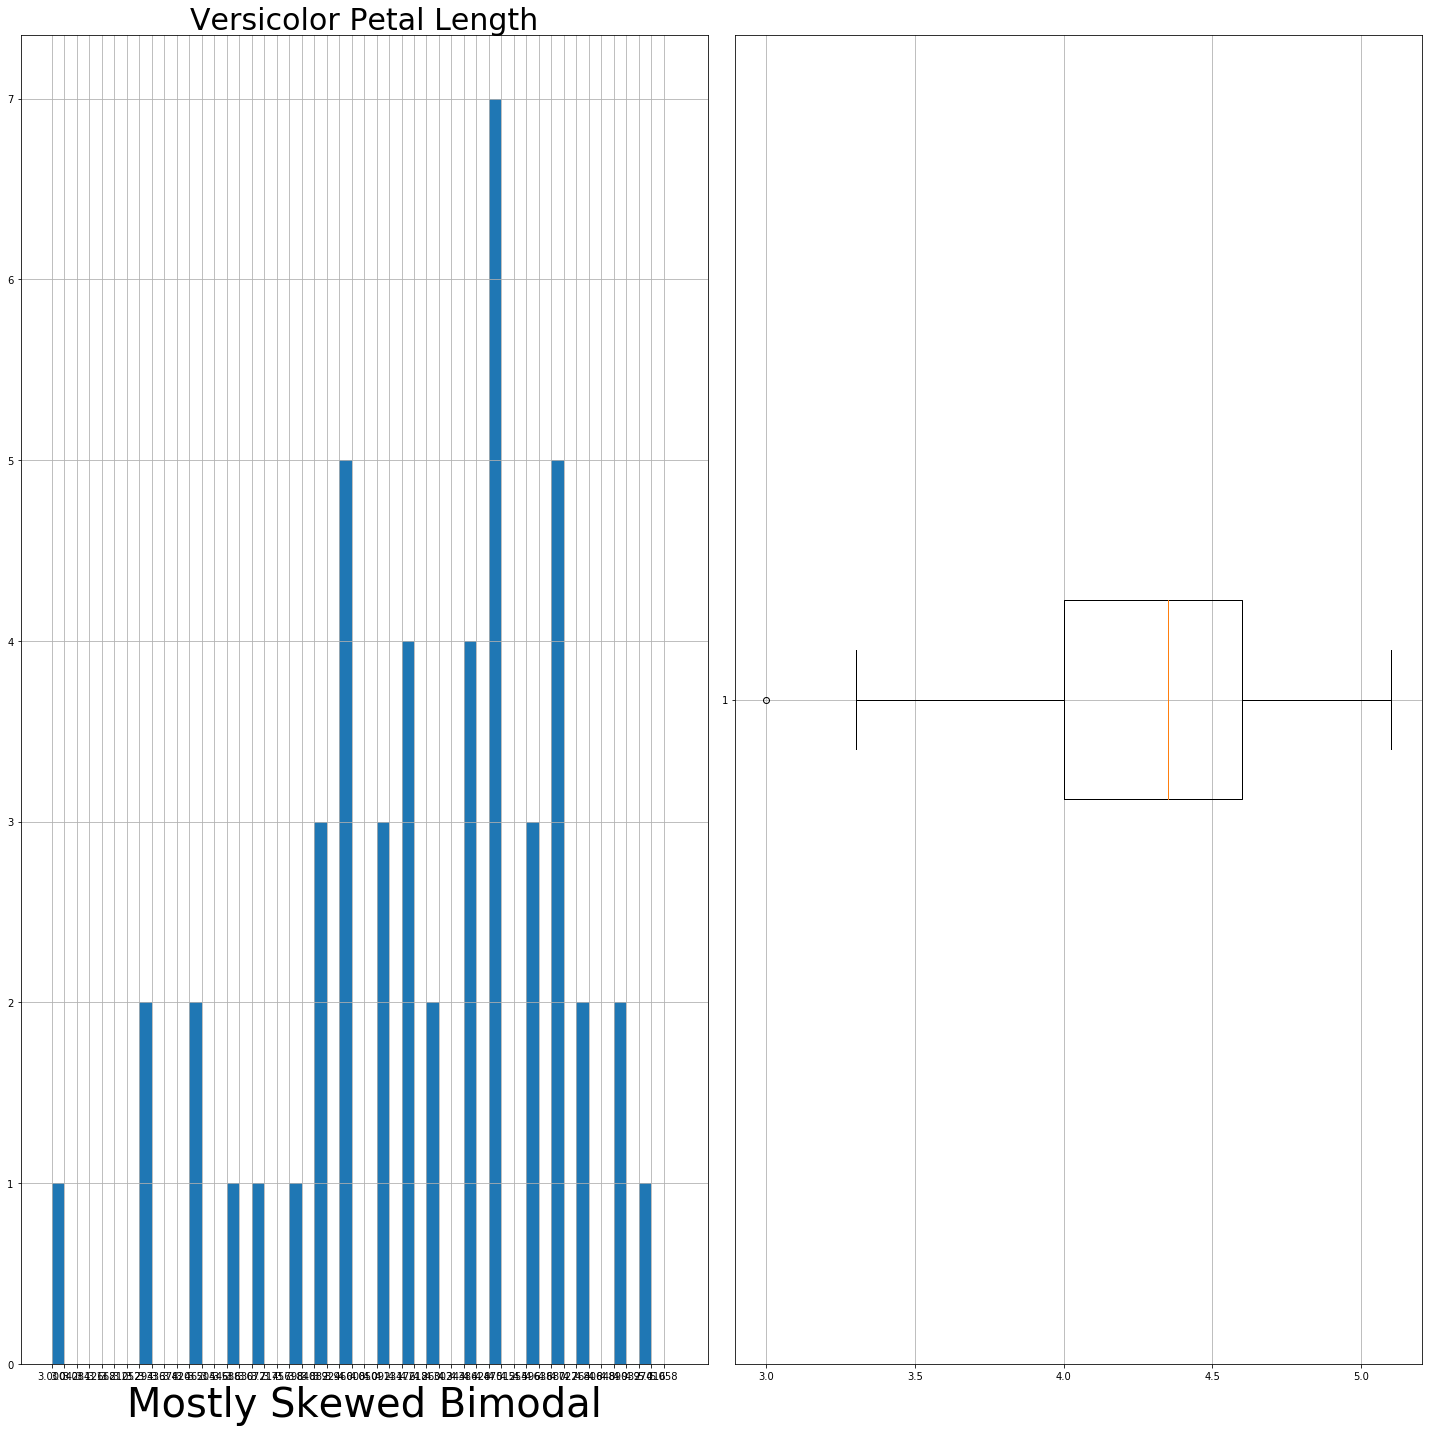

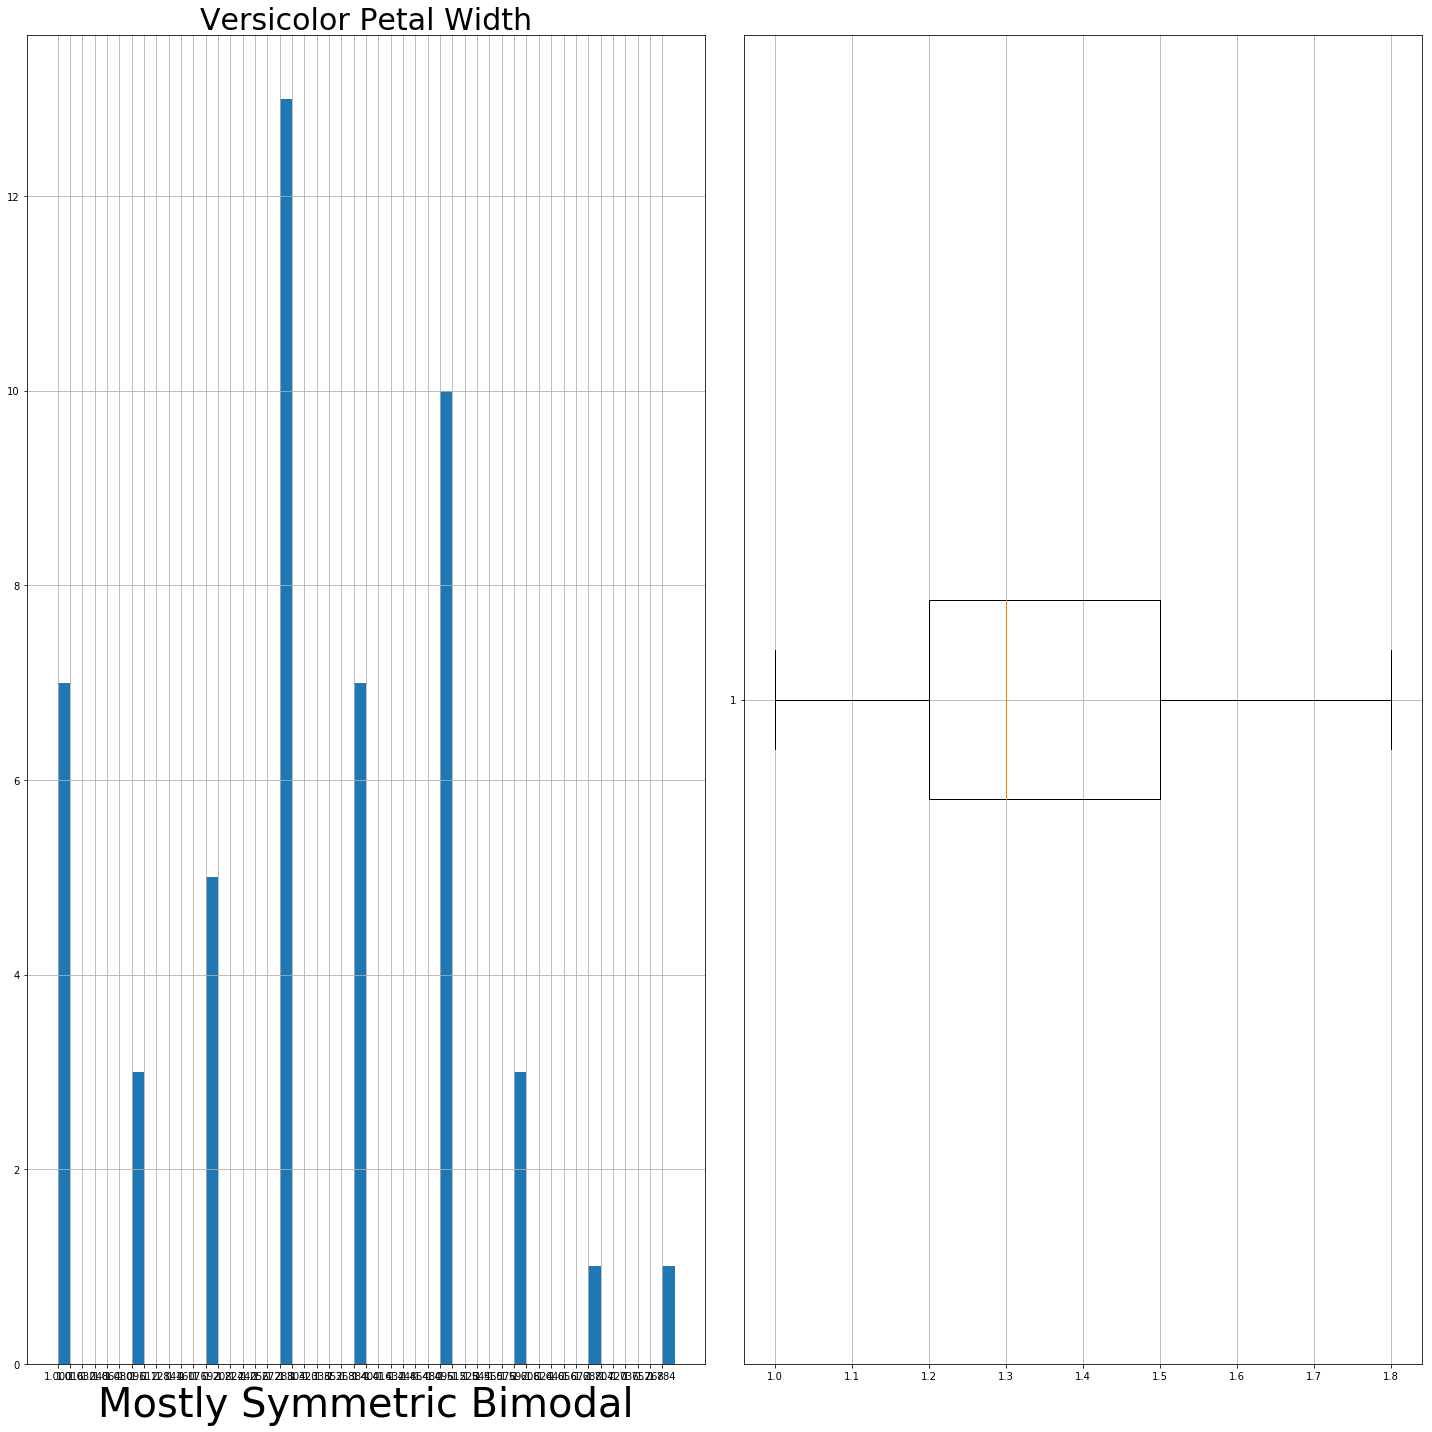

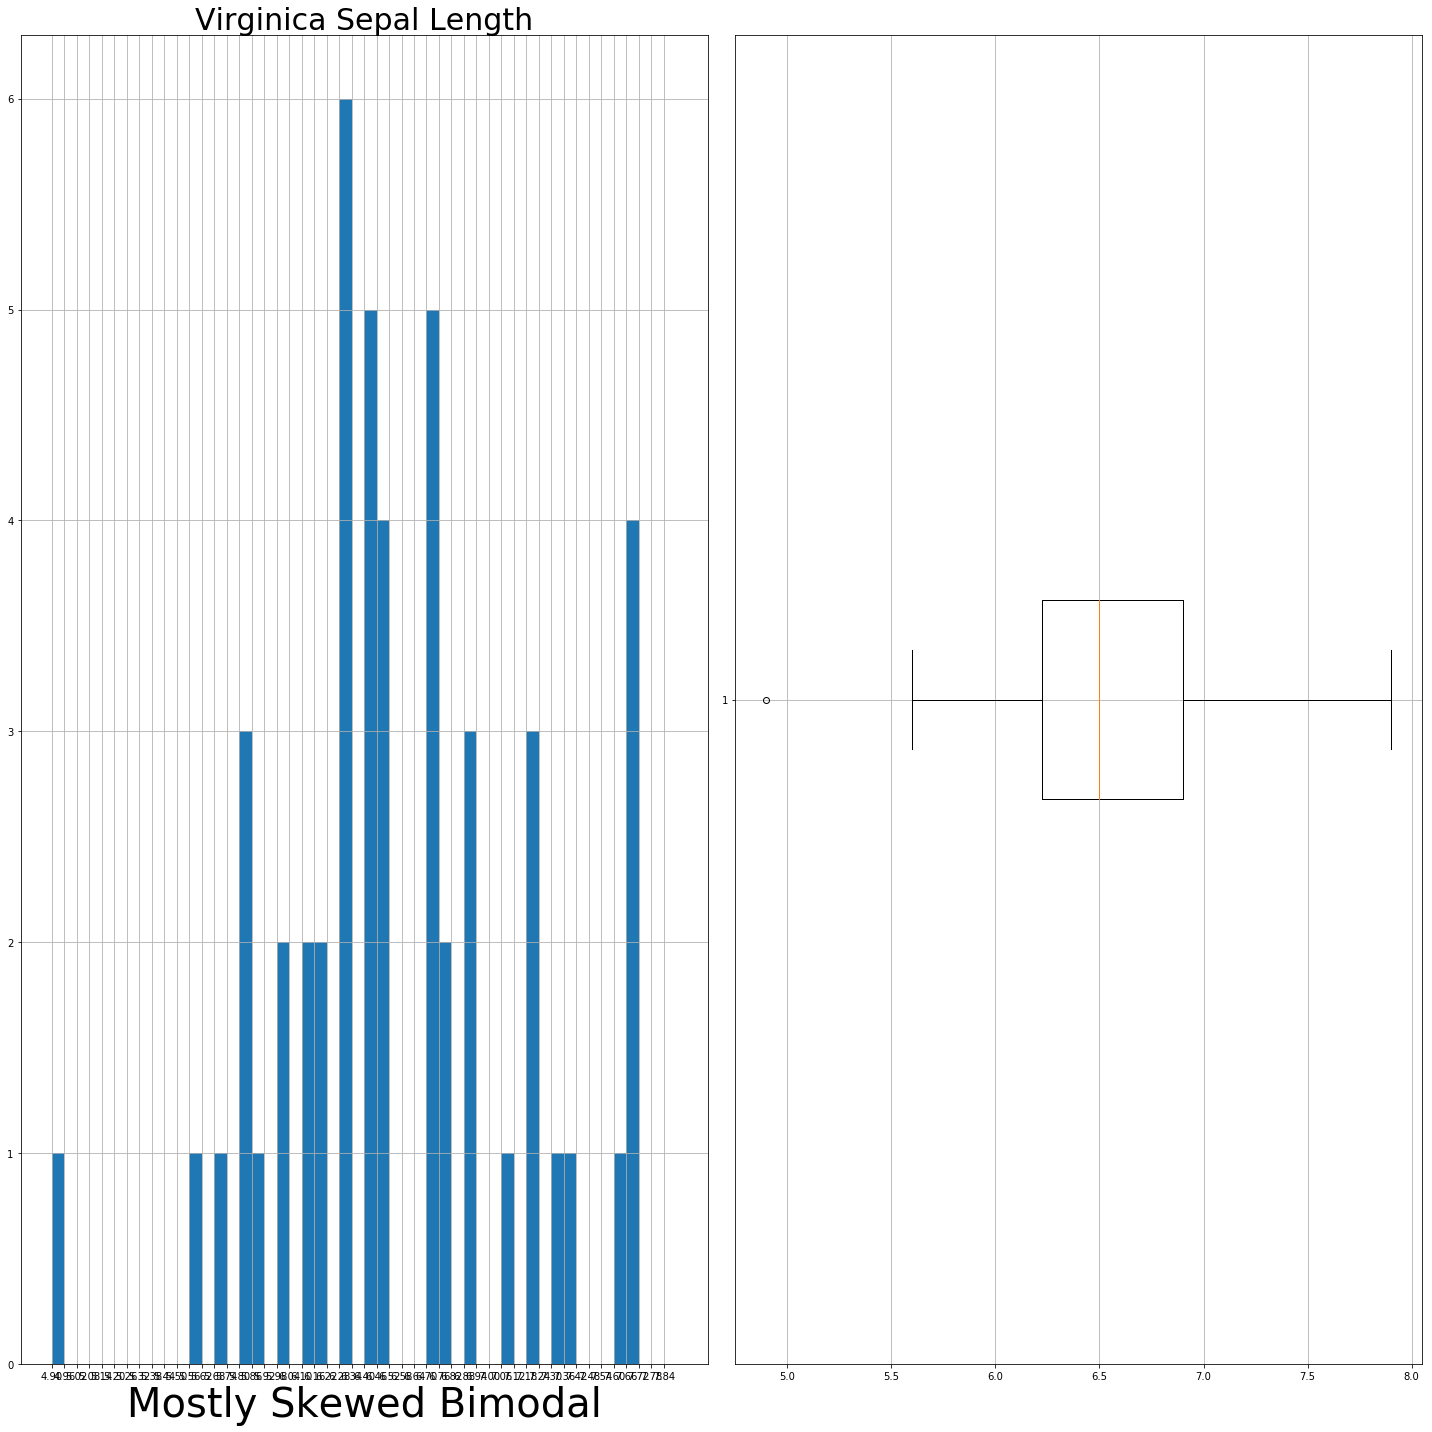

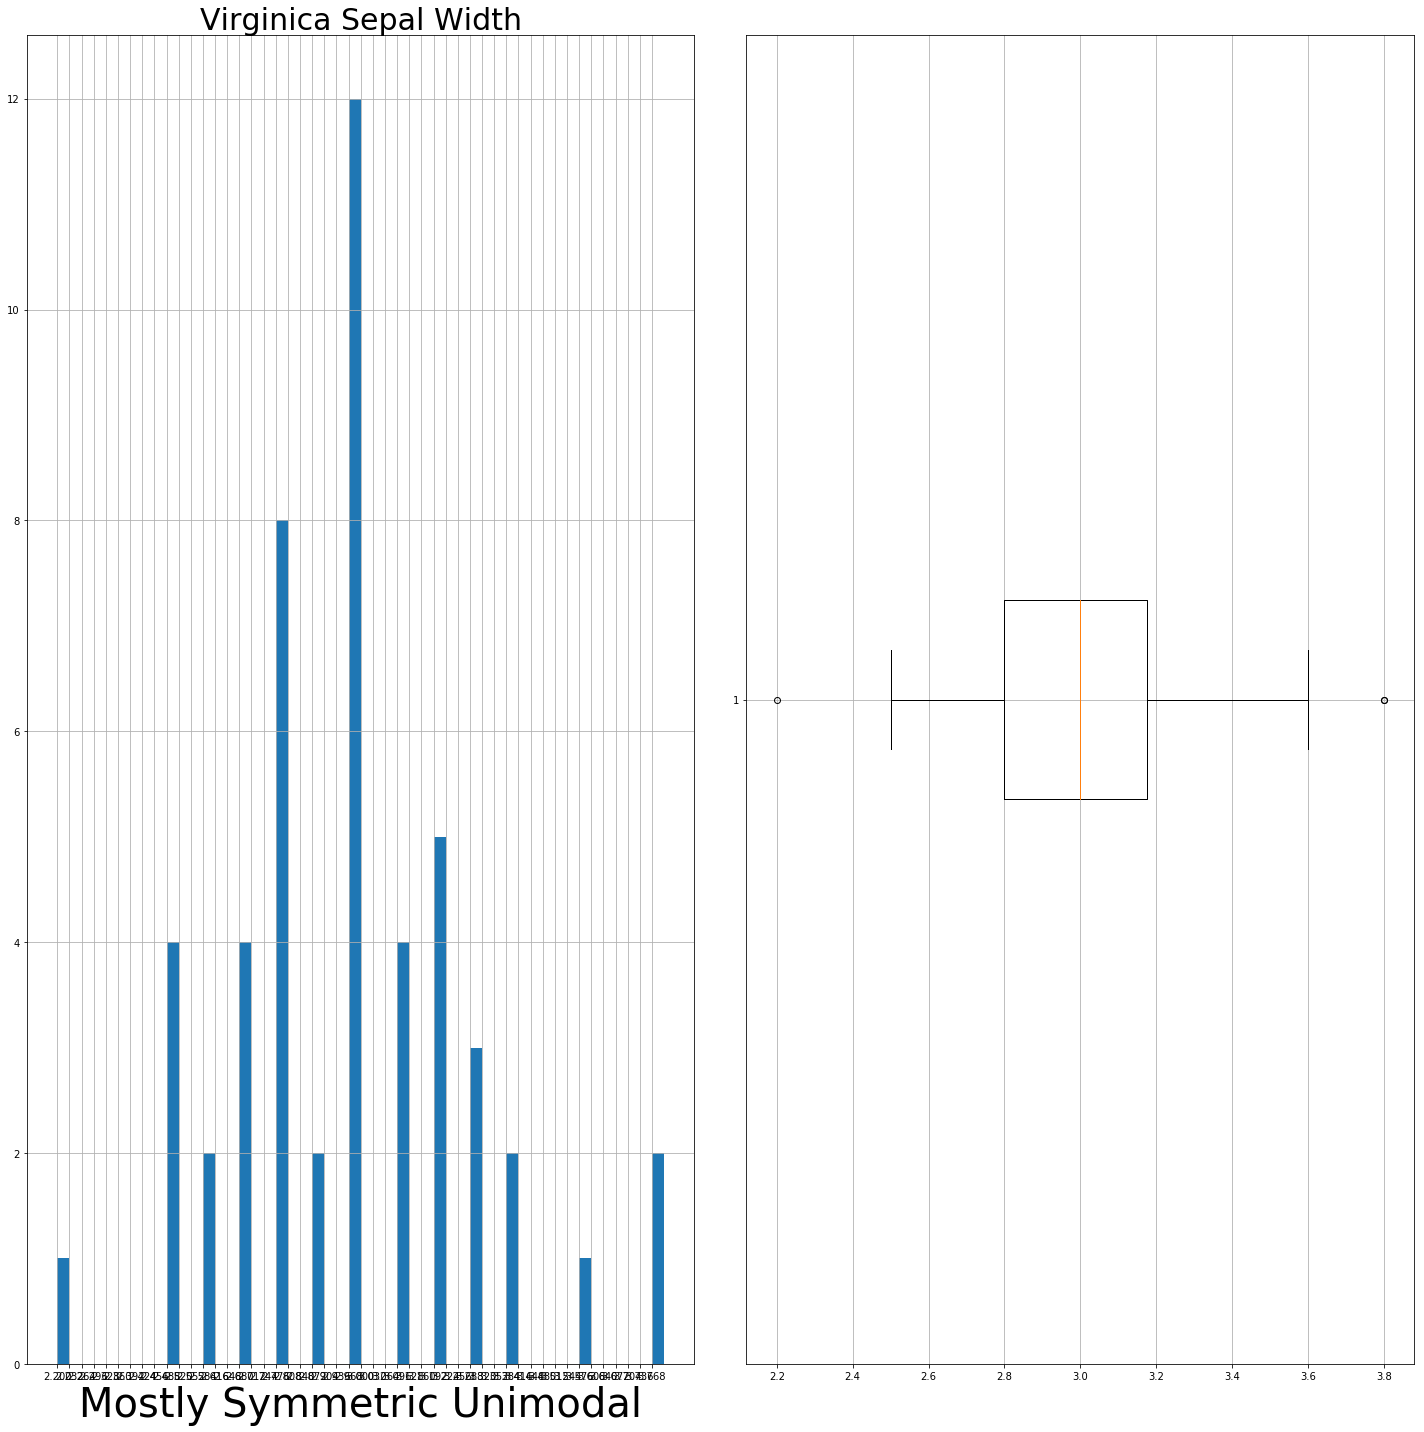

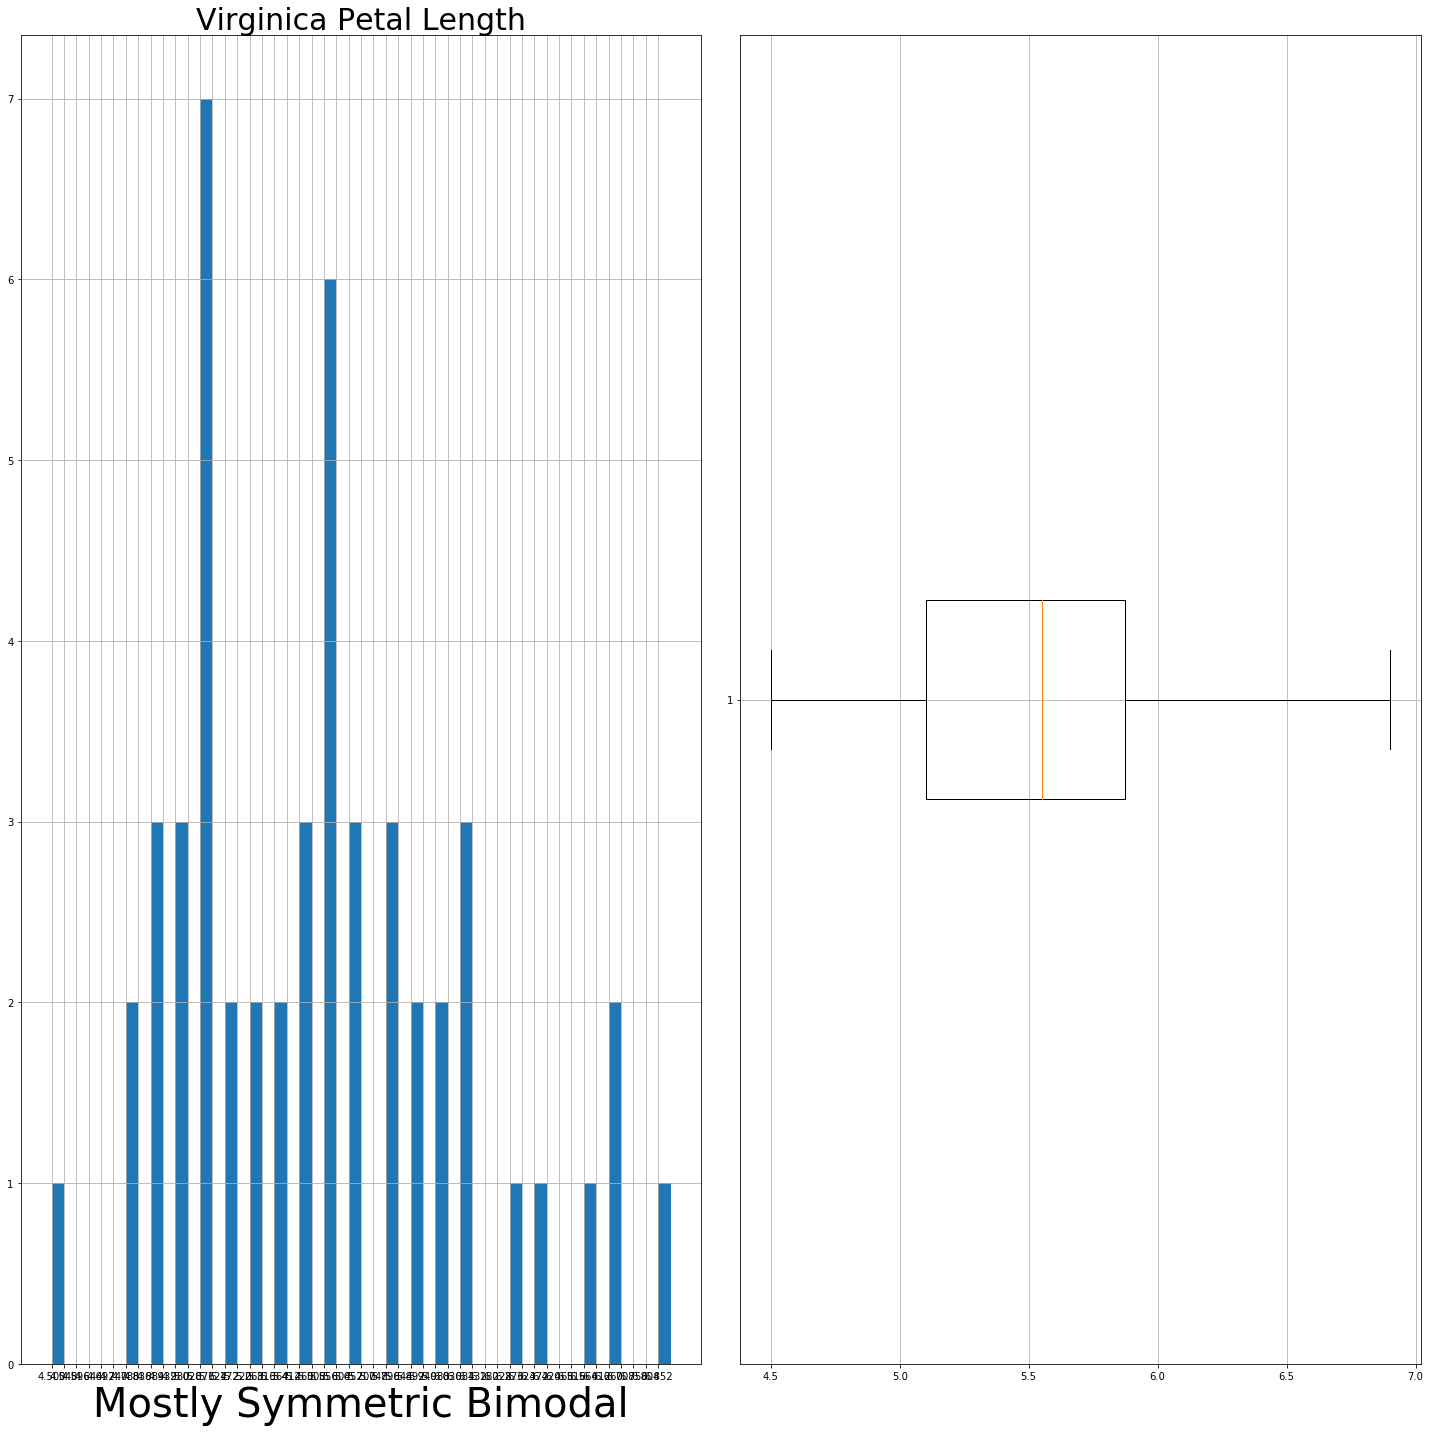

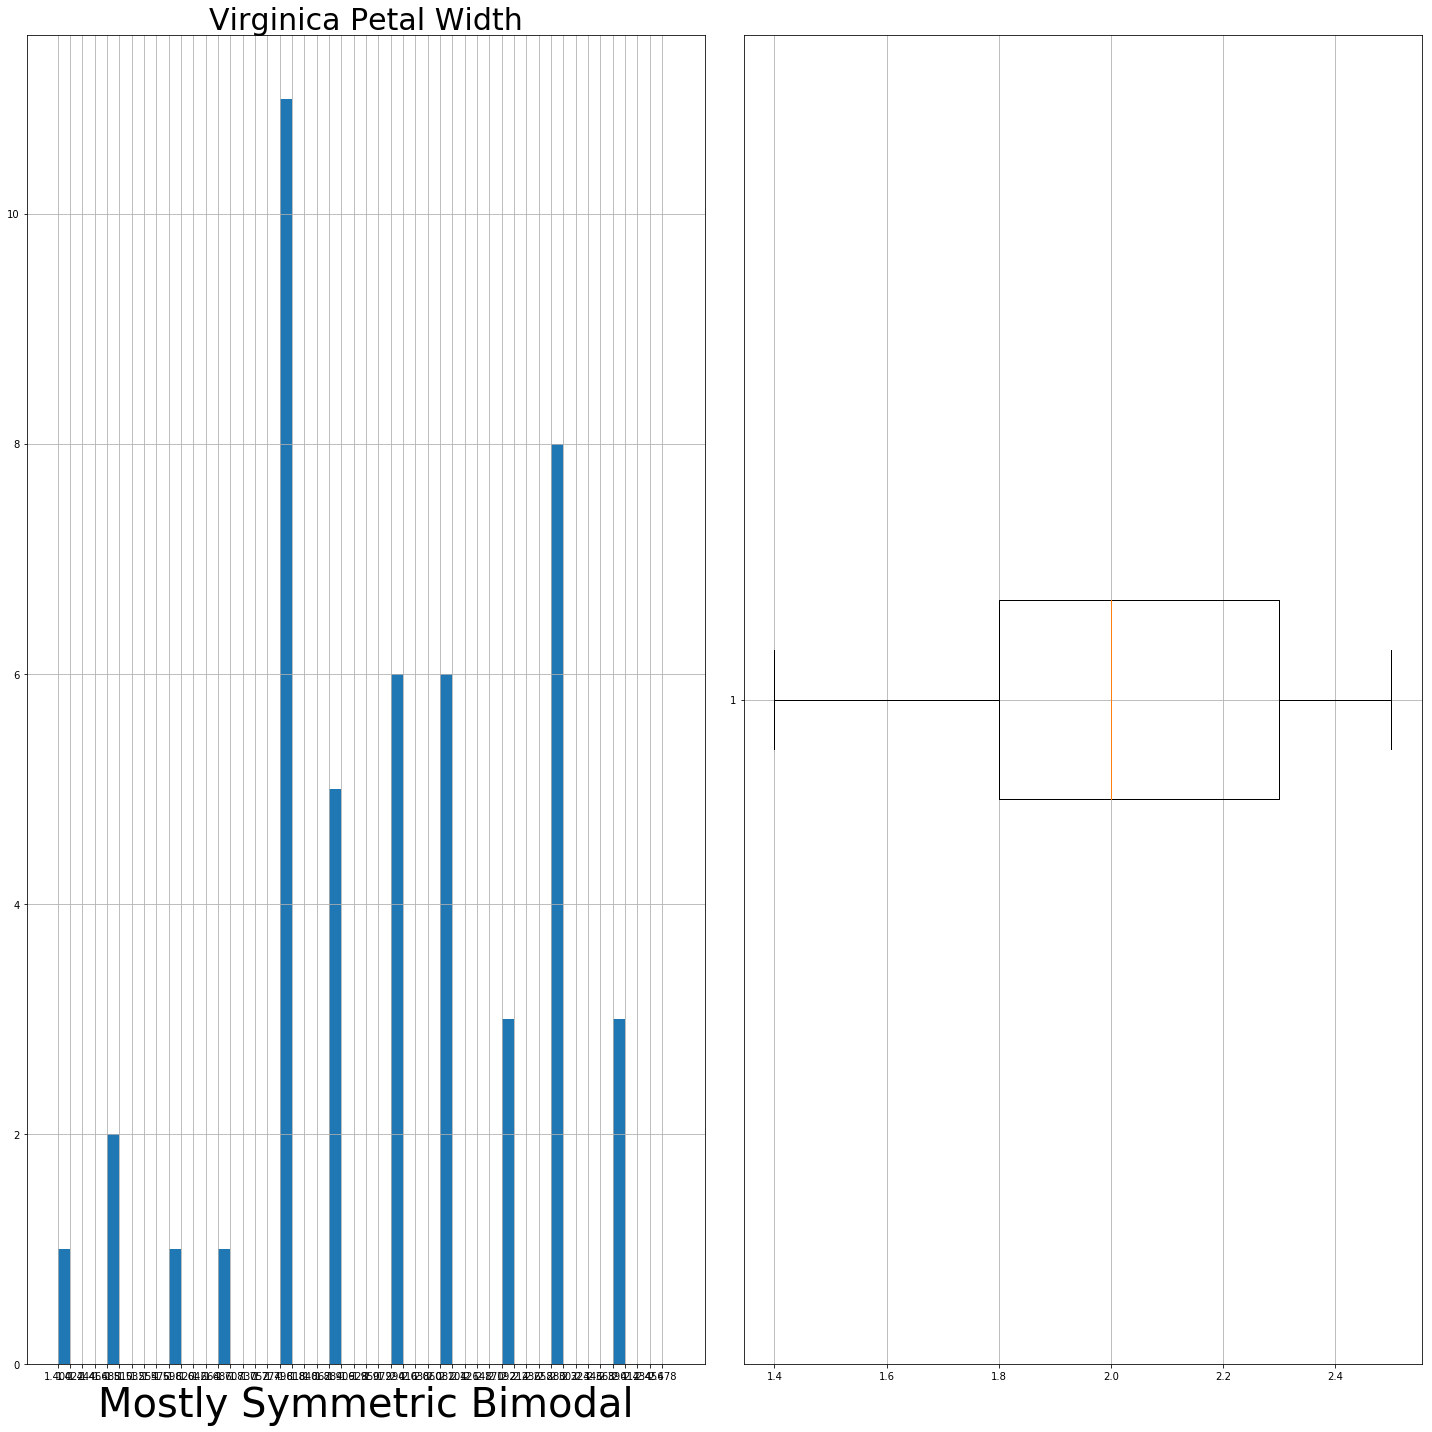

In [184]:
"""
Function calls for Iris Data, bin size = 50

"""

# Setosa
histogram(setosa['sepal_length'], 50,"Setosa Sepal Length", text = "Bimodal")
histogram(setosa['sepal_width'], 50,"Setosa Sepal Width", text = "Bimodal")
histogram(setosa['petal_length'], 50,"Setosa Petal Length", text = "Unimodal")
histogram(setosa['petal_width'], 50,"Setosa Petal Width", text = "Unimodal")

# Versicolor
histogram(versicolor['sepal_length'], 50,"Versicolor Sepal Length", text = "Bimodal")
histogram(versicolor['sepal_width'], 50, "Versicolor Sepal Width", text = "Unimodal")
histogram(versicolor['petal_length'], 50, "Versicolor Petal Length", text = "Bimodal")
histogram(versicolor['petal_width'], 50,"Versicolor Petal Width", text = "Bimodal")

# Virginica
histogram(virginica['sepal_length'], 50,"Virginica Sepal Length", text = "Bimodal")
histogram(virginica['sepal_width'], 50, "Virginica Sepal Width", text = "Unimodal")
histogram(virginica['petal_length'], 50,"Virginica Petal Length", text = "Bimodal")
histogram(virginica['petal_width'], 50,"Virginica Petal Width", text = "Bimodal")

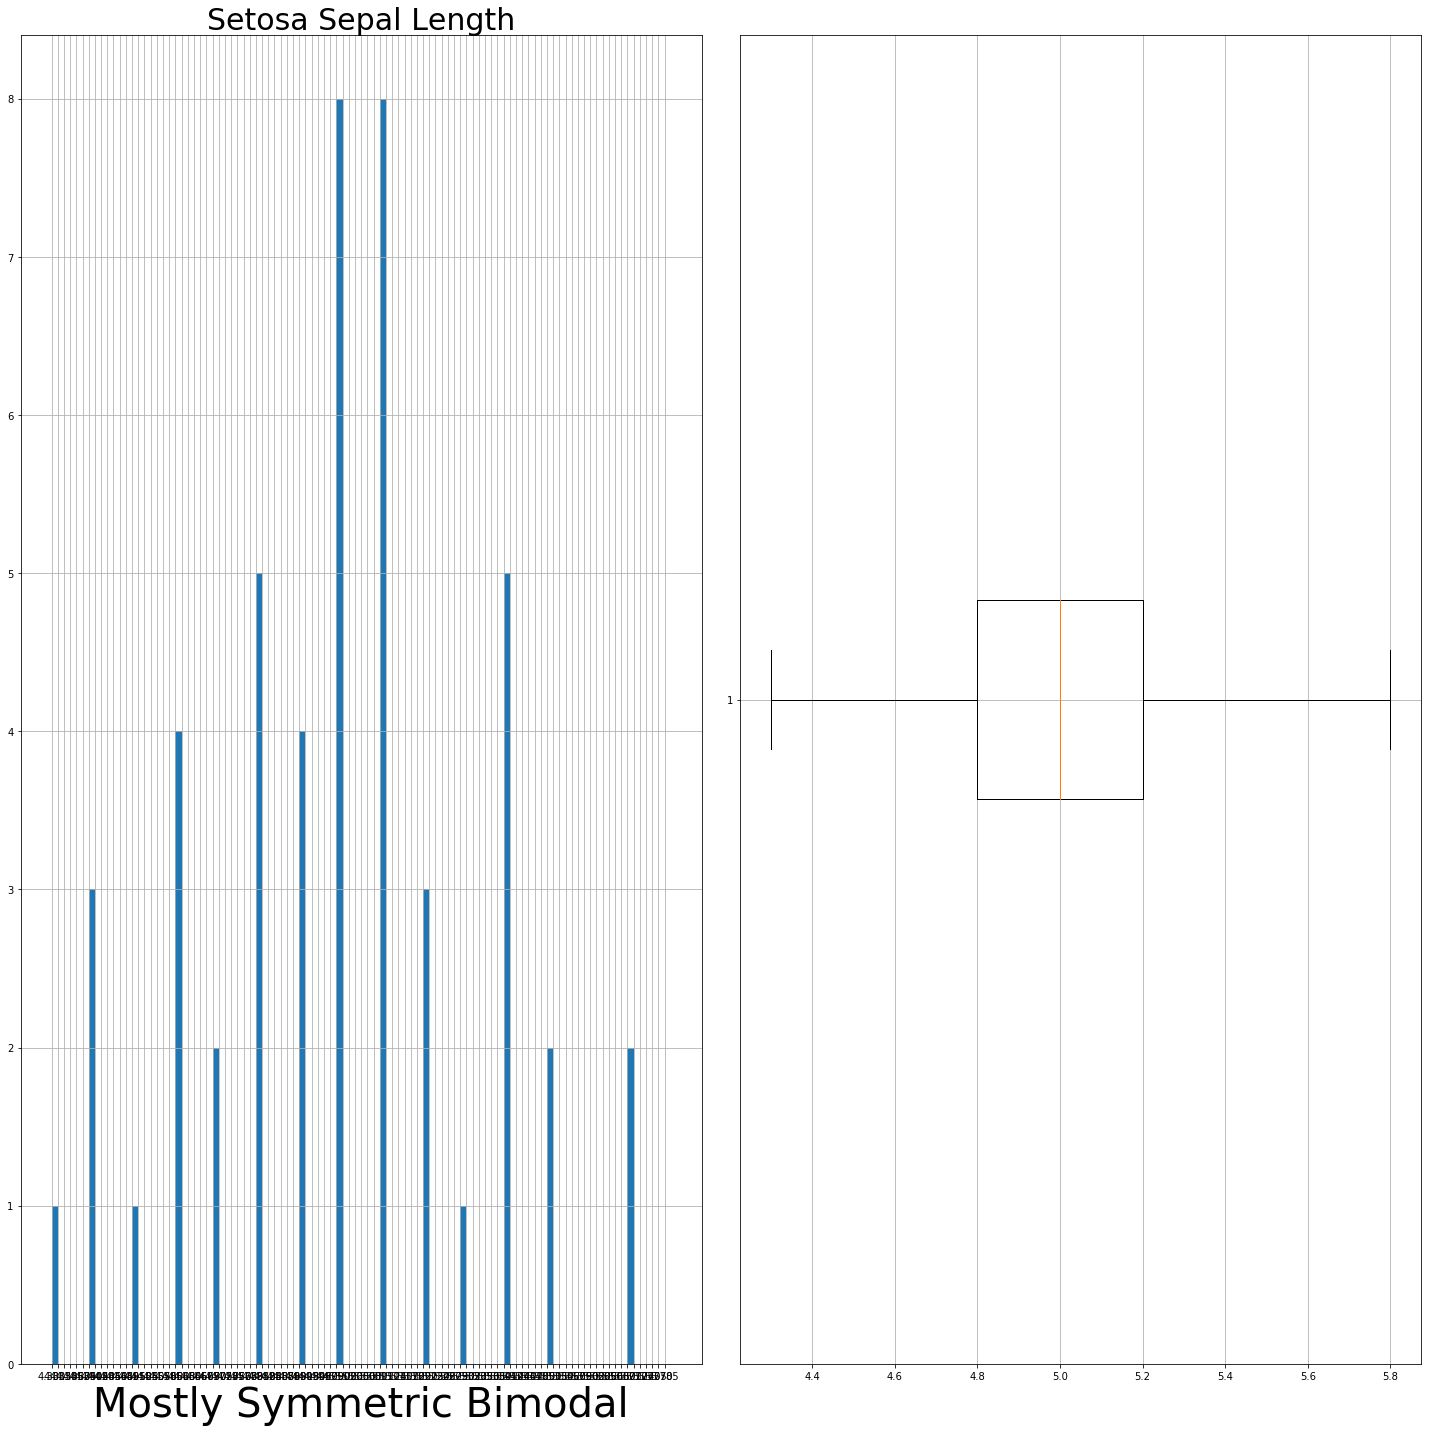

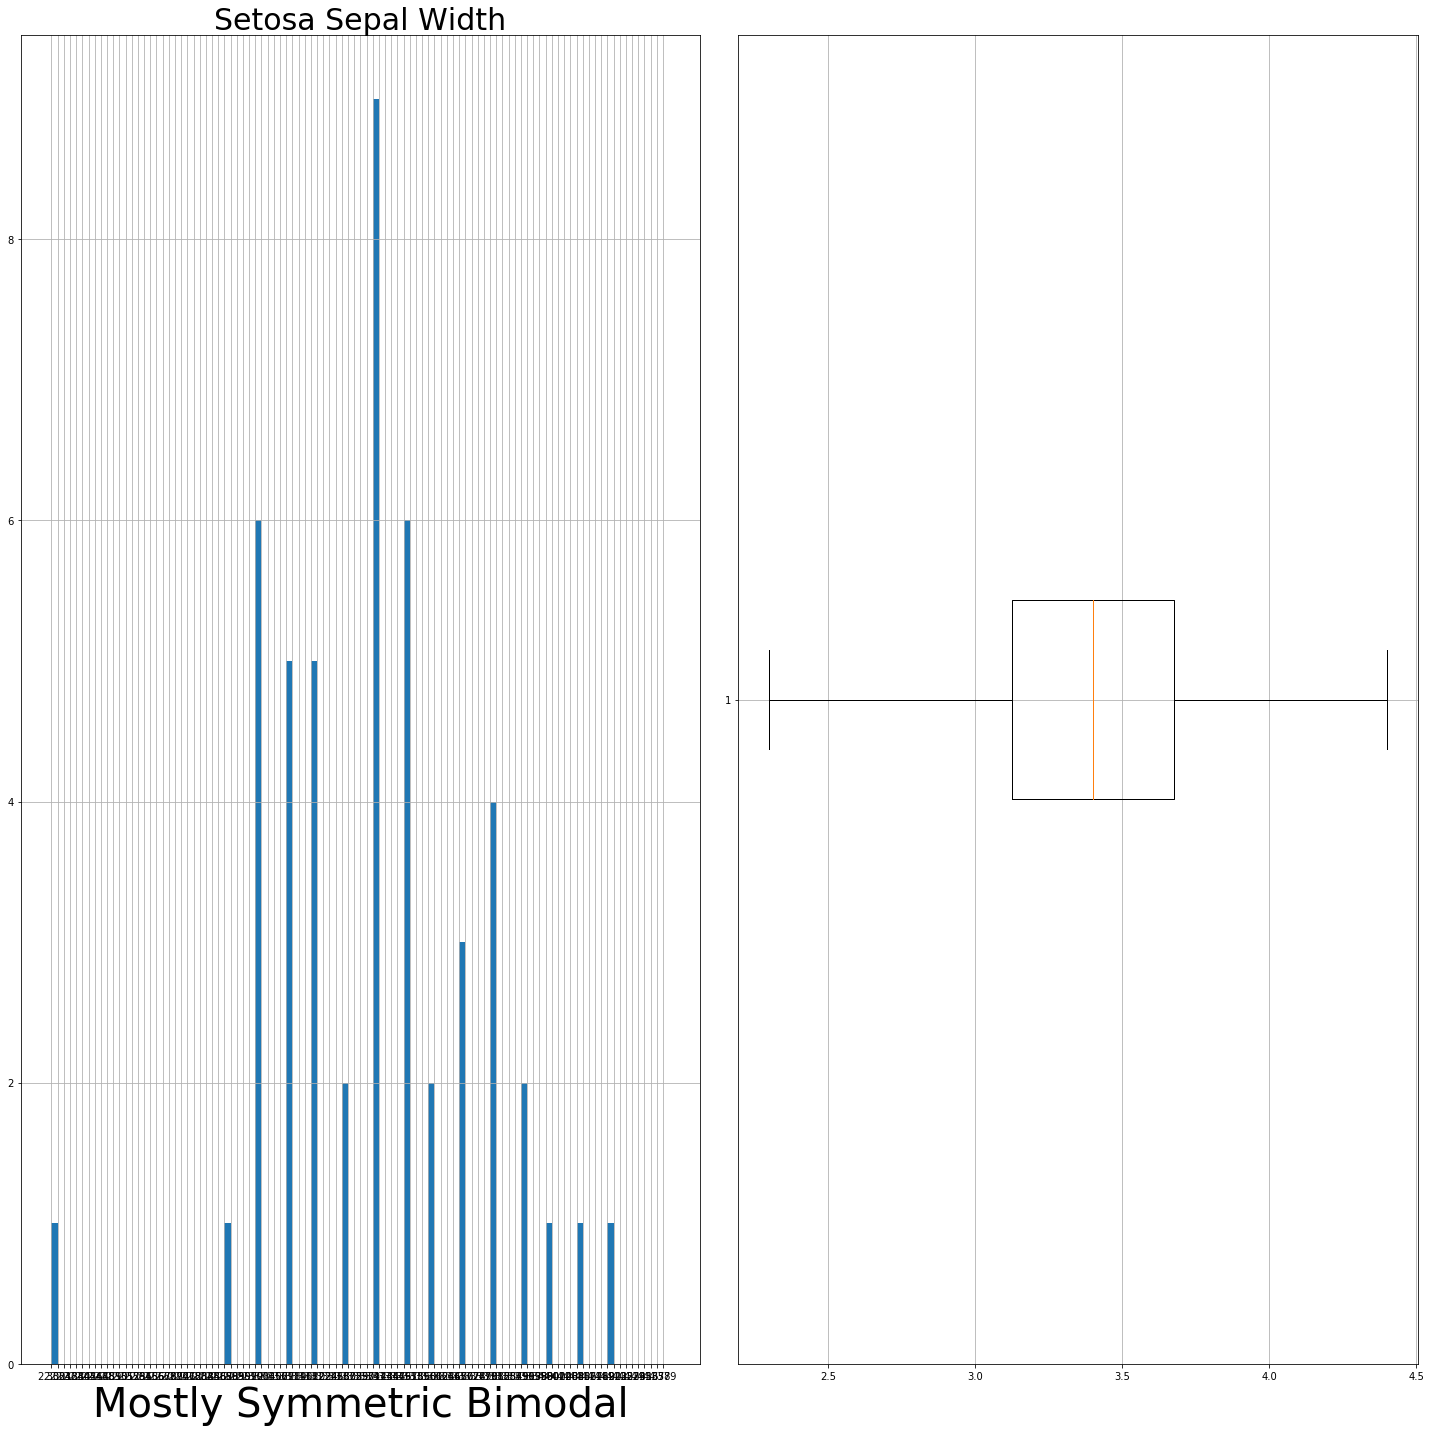

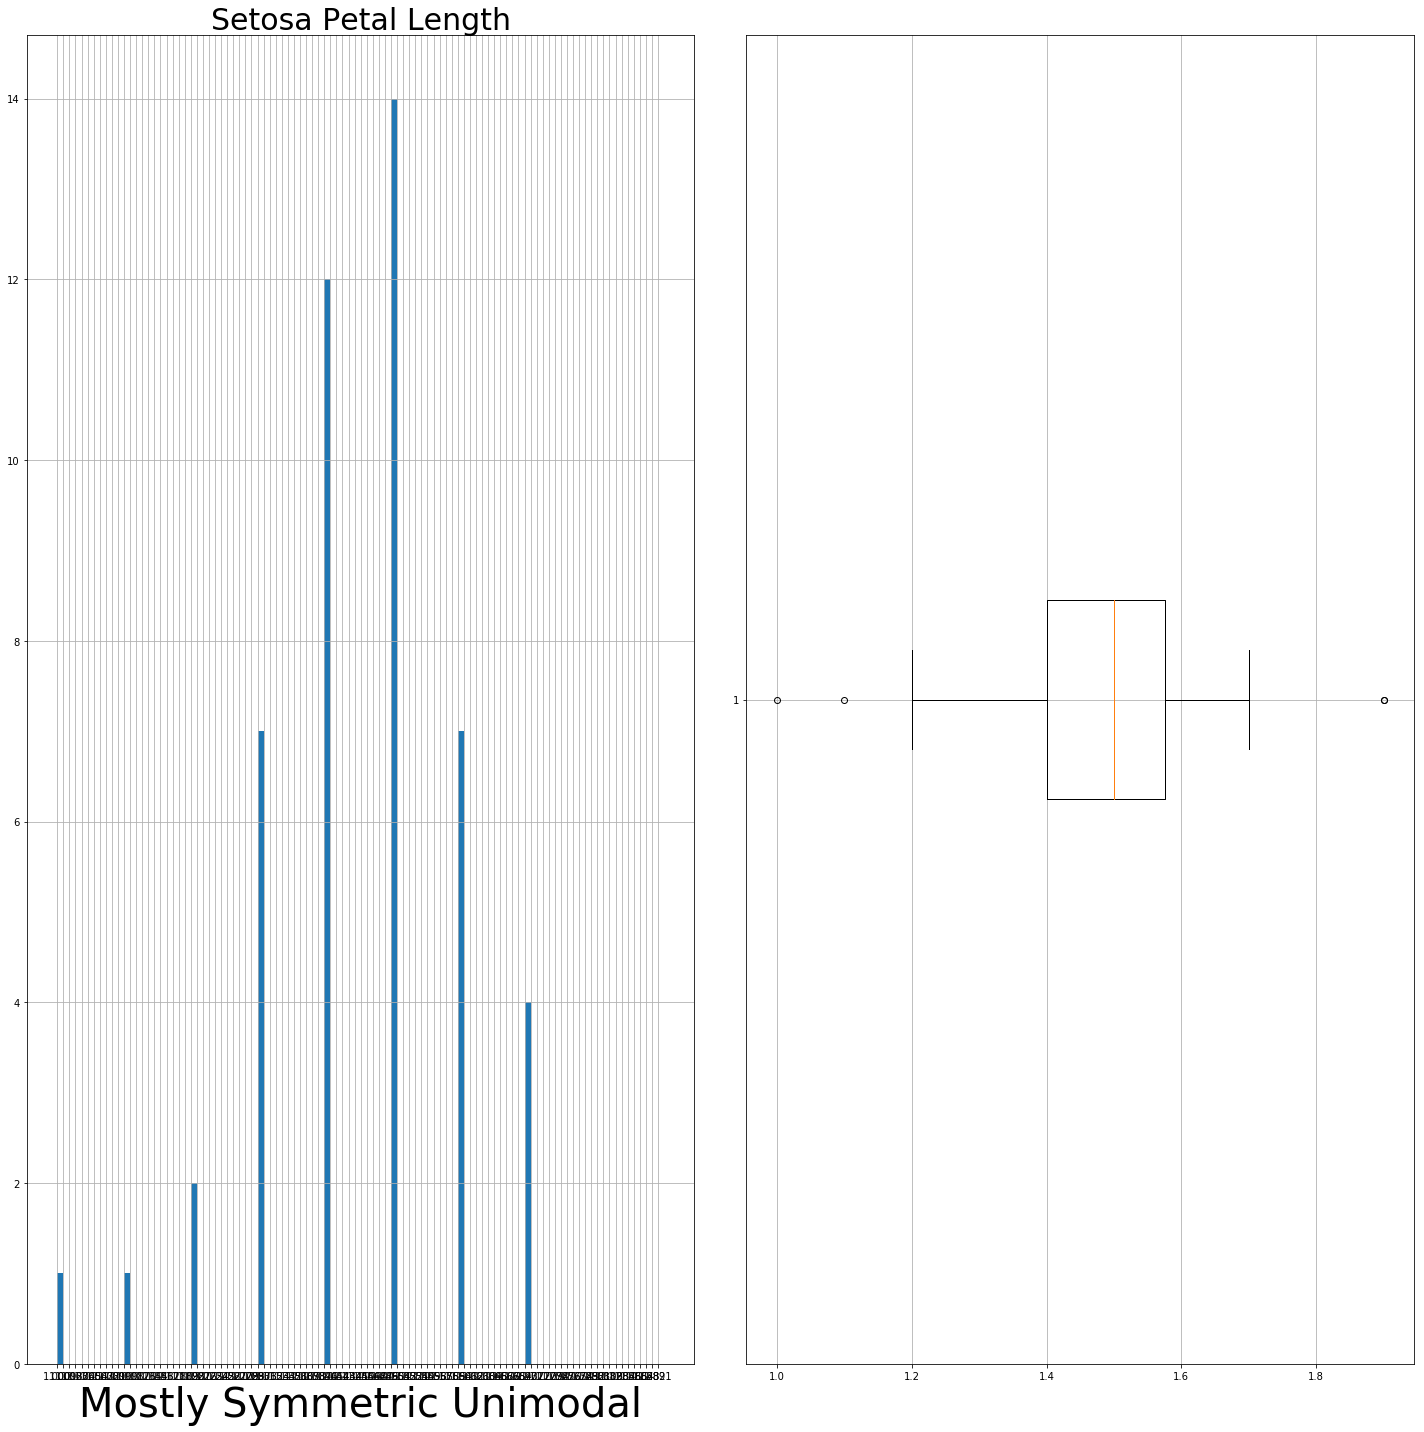

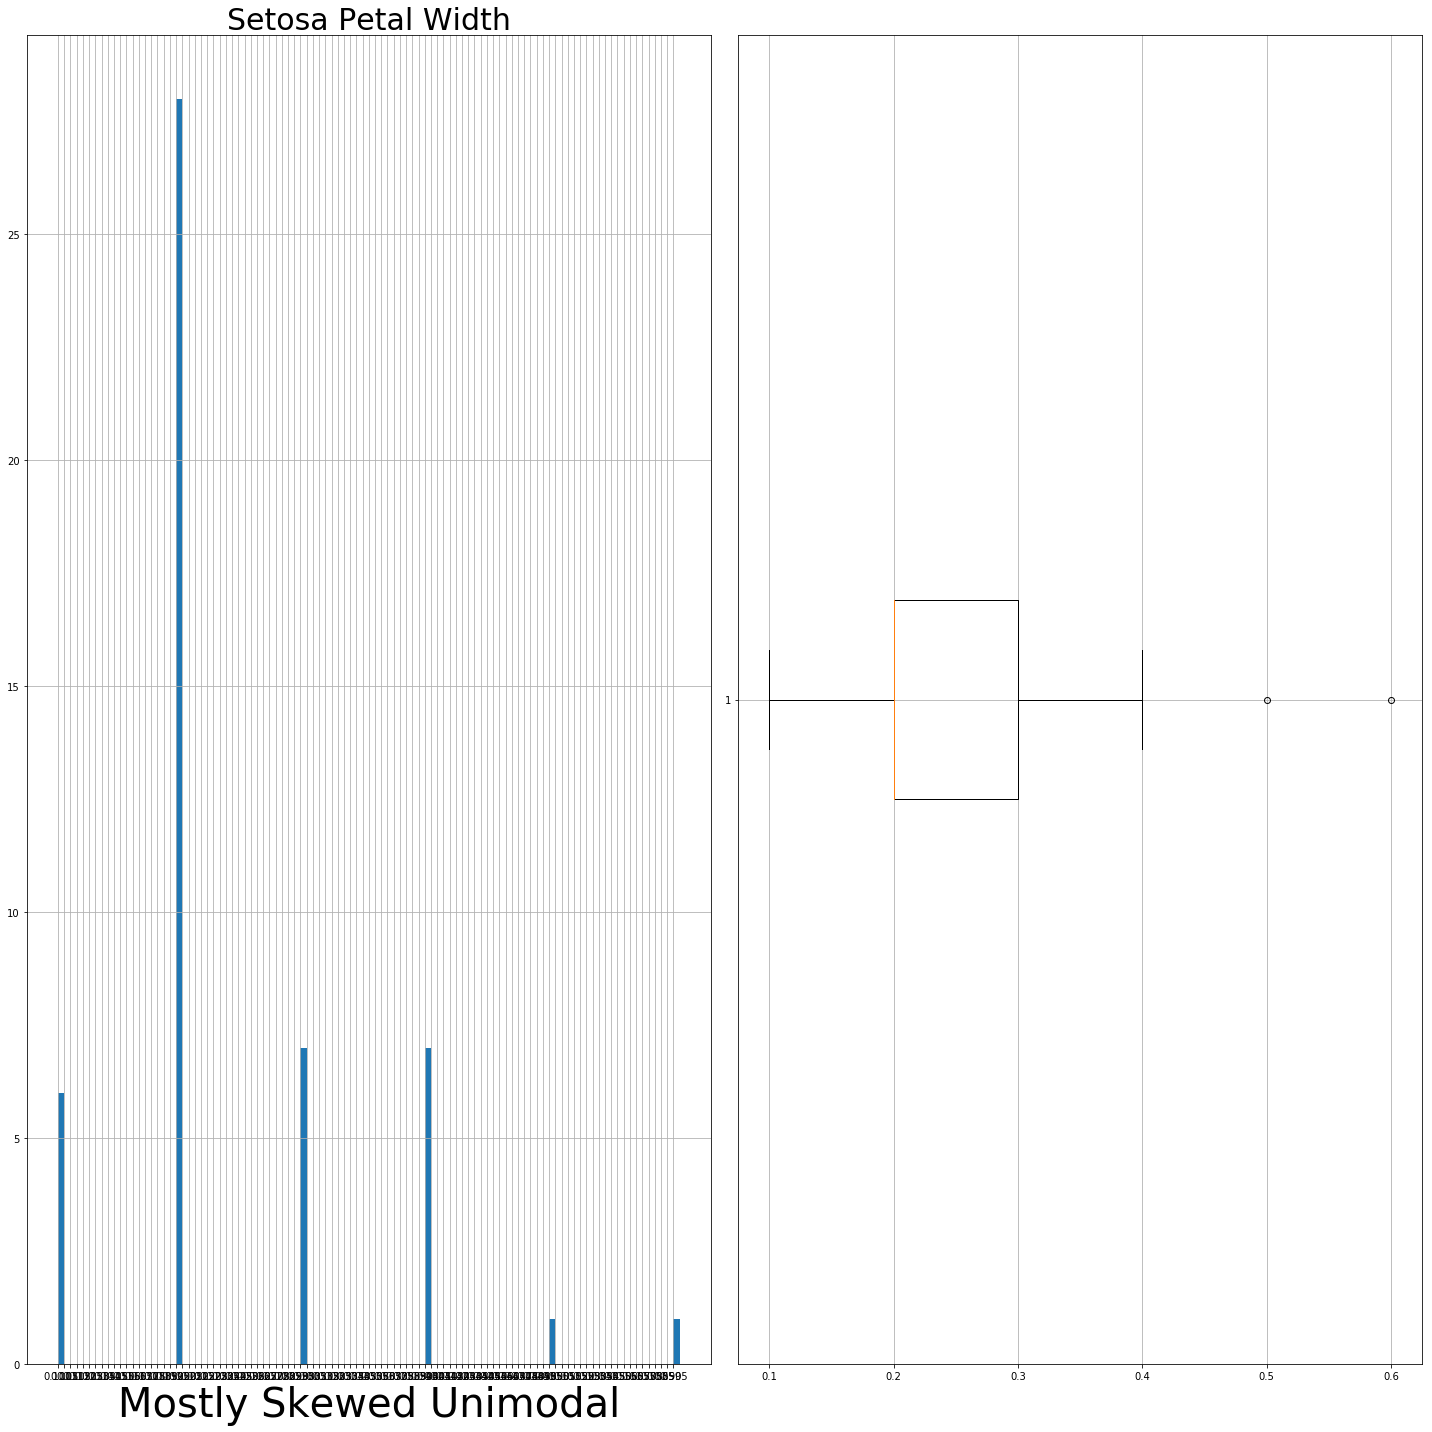

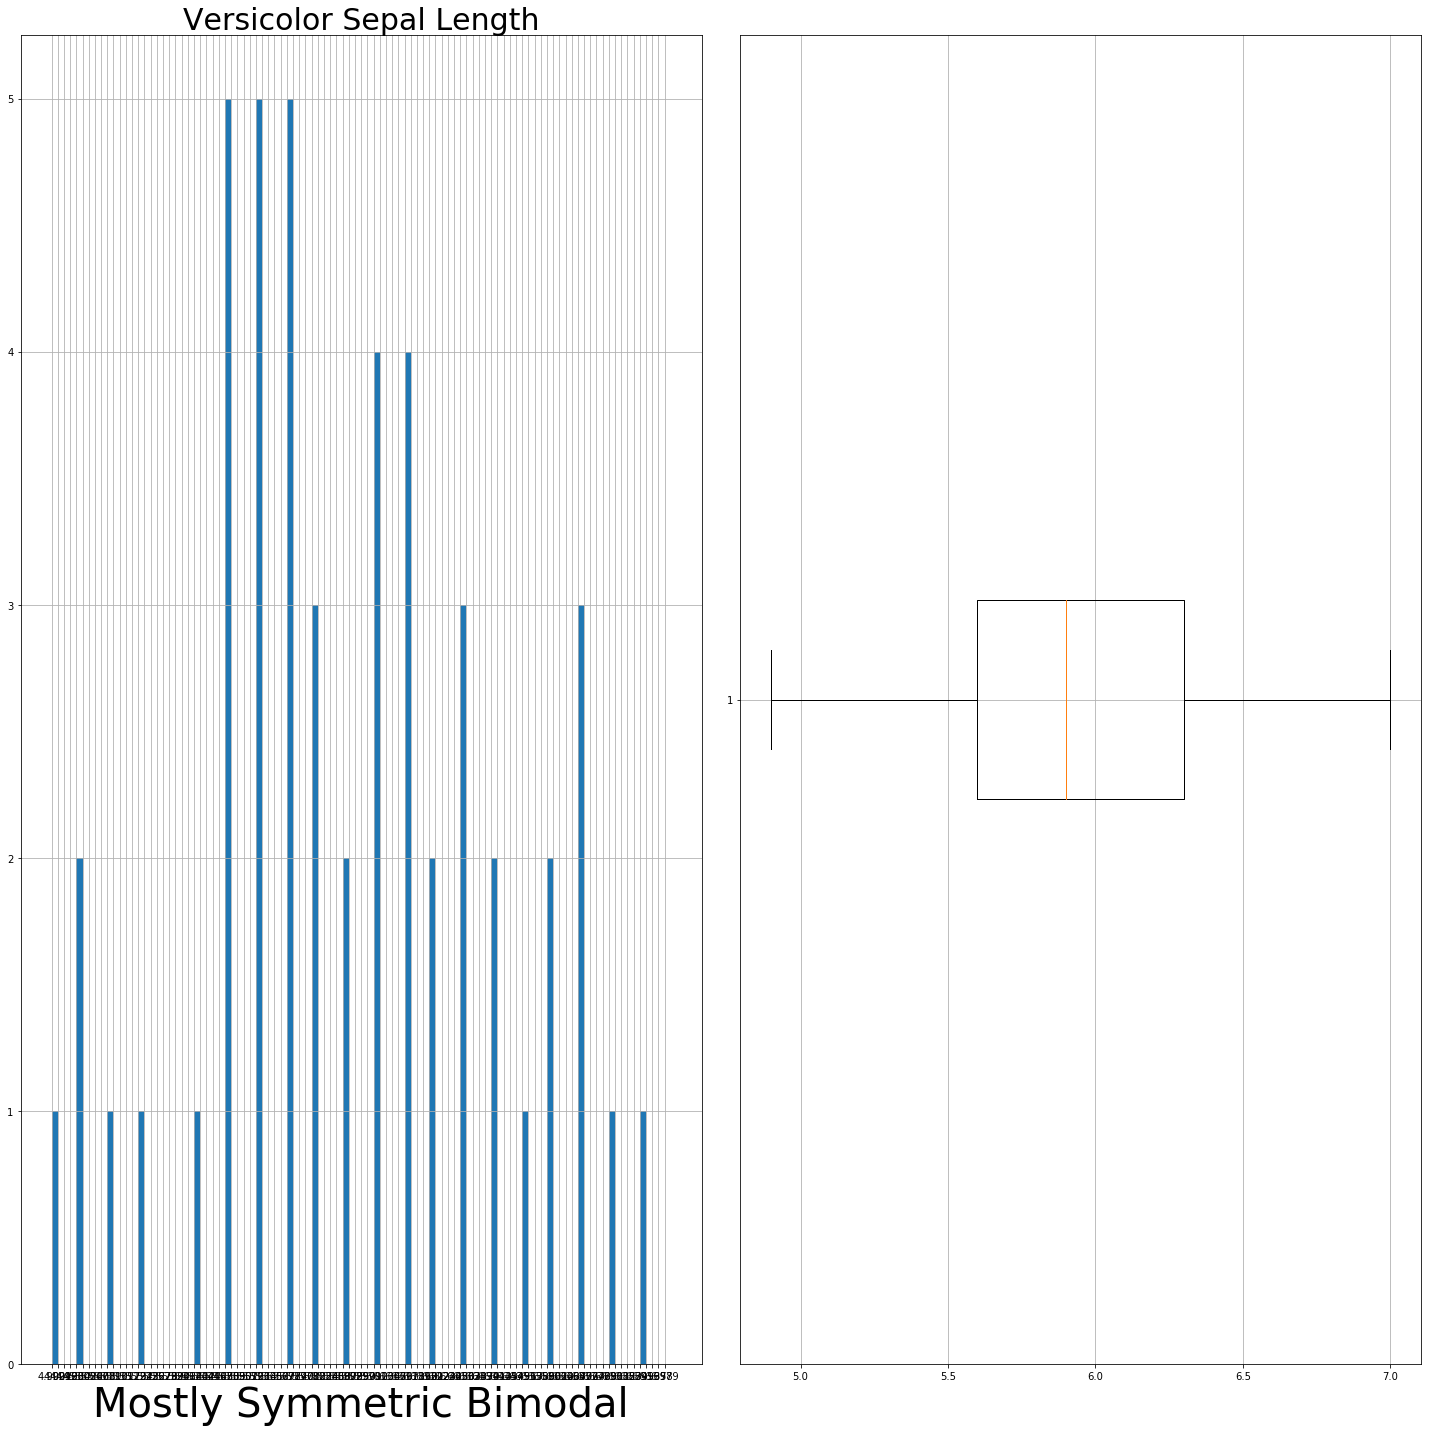

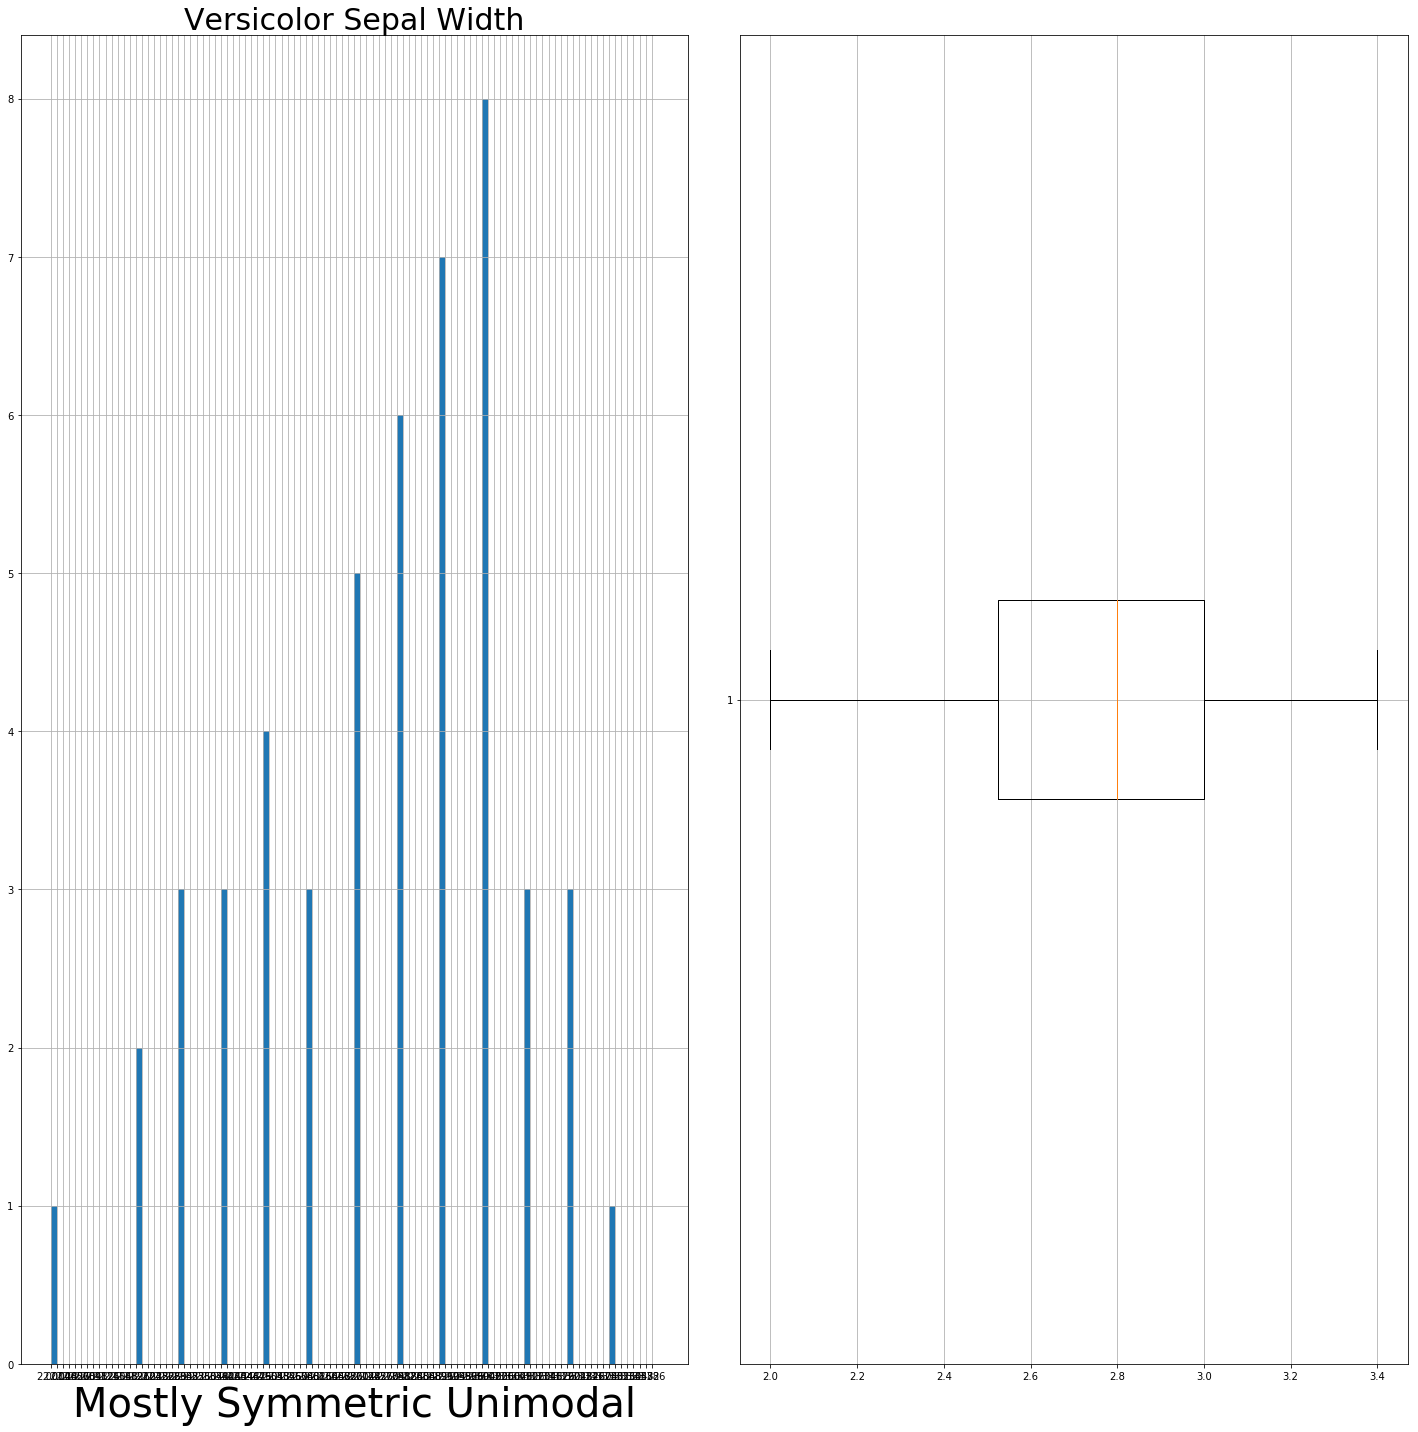

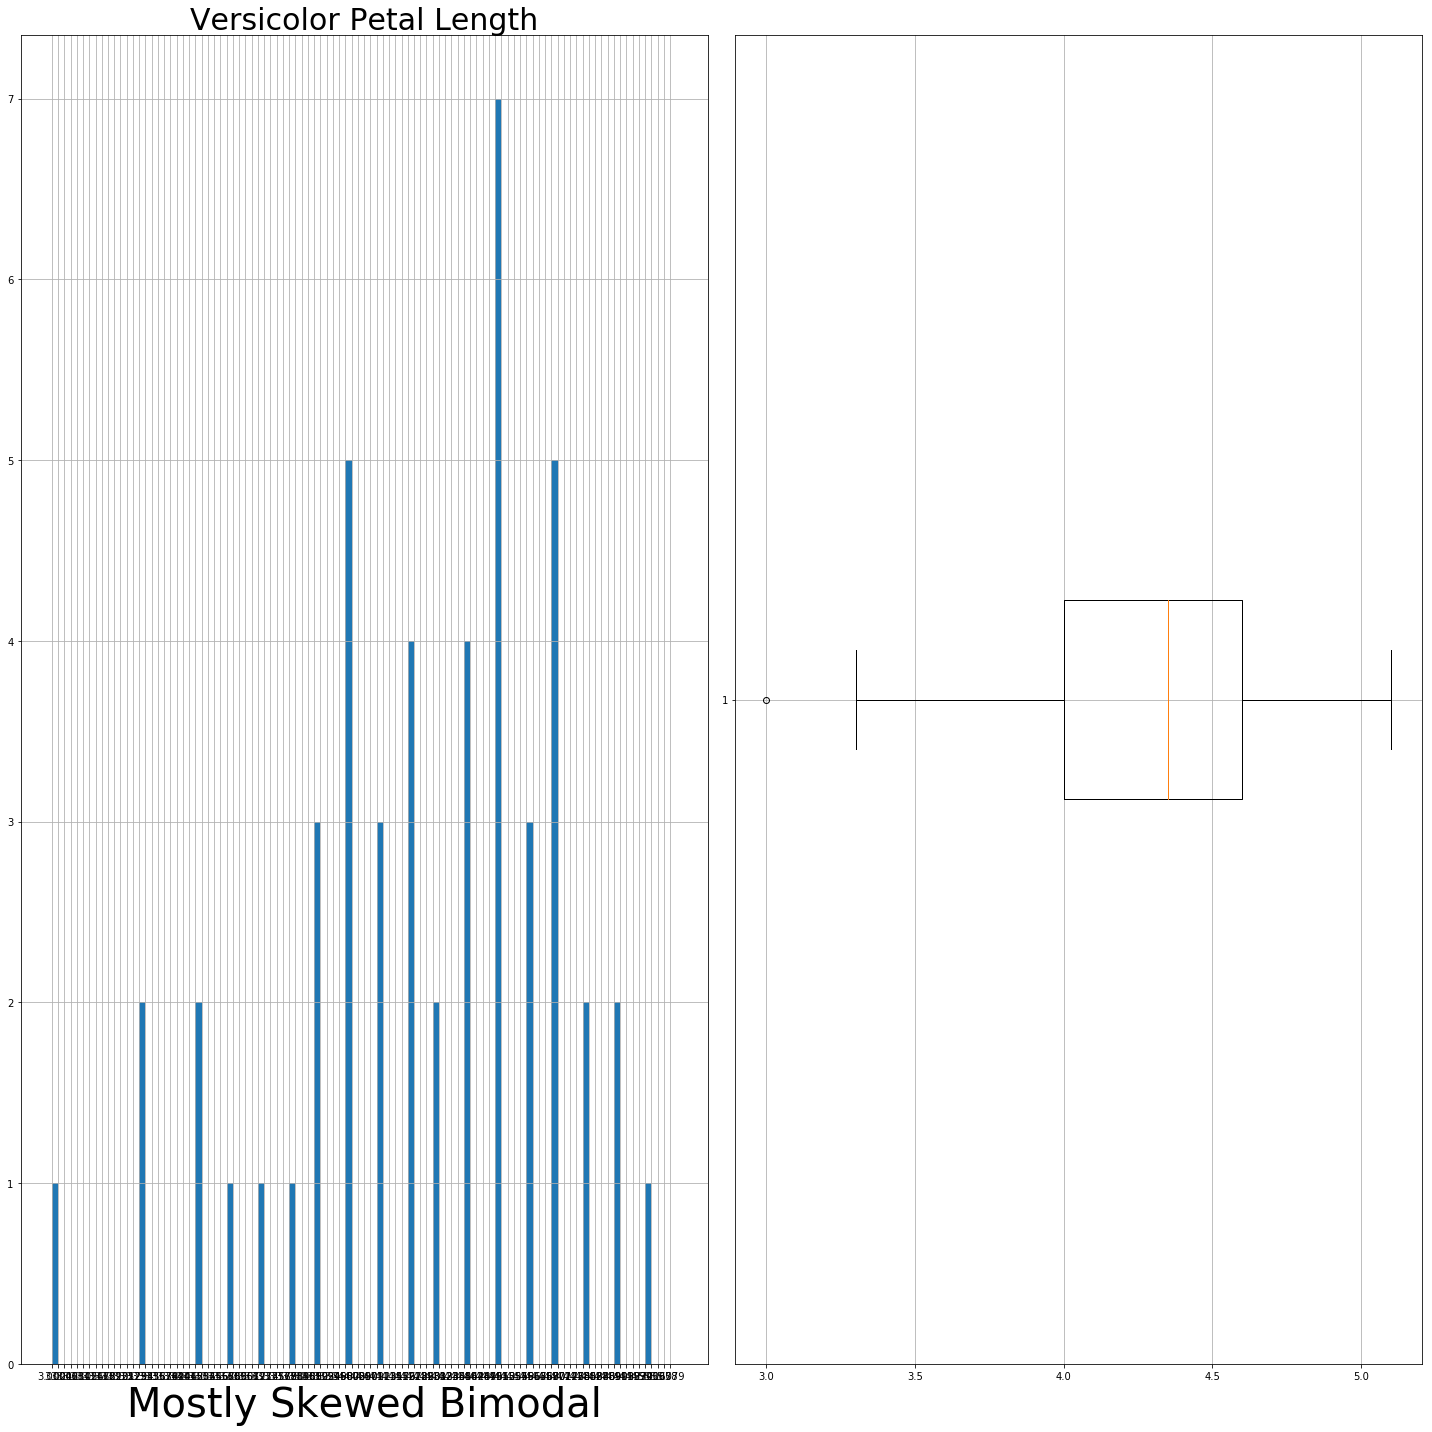

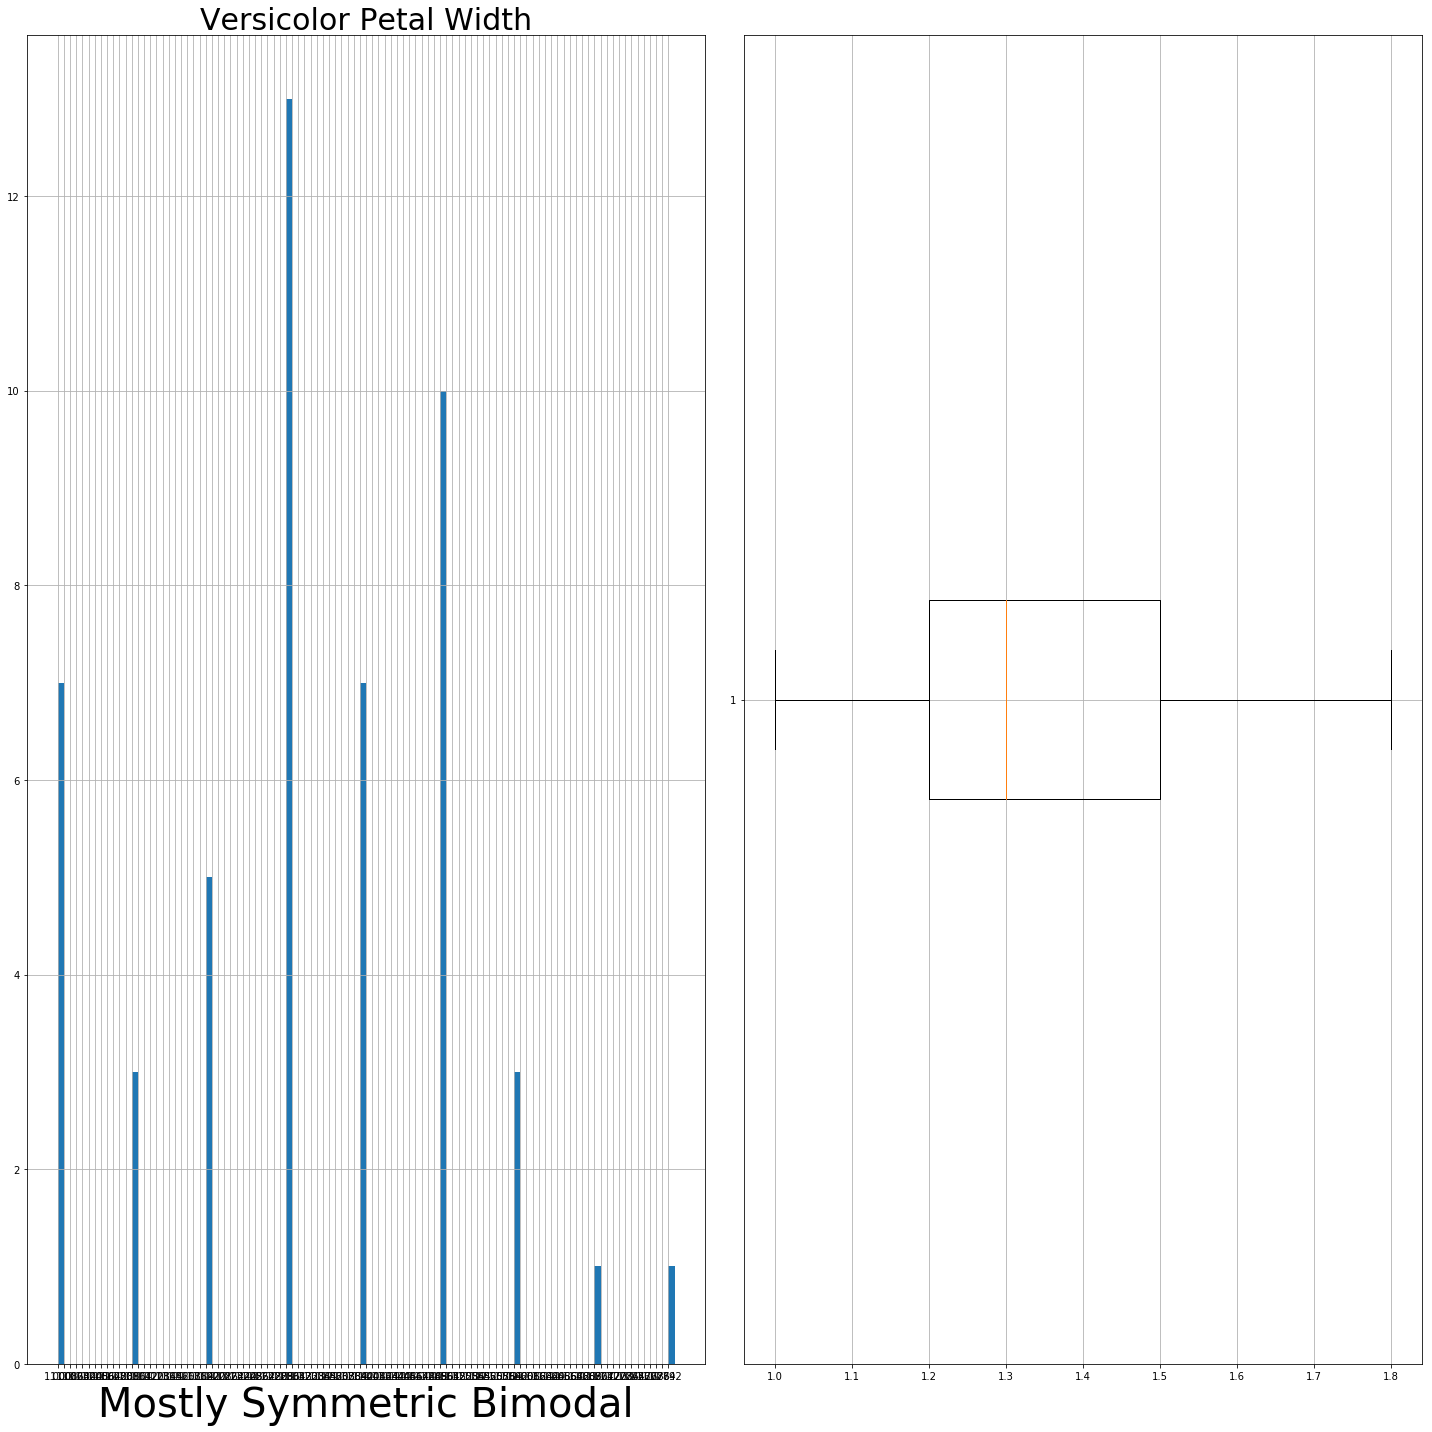

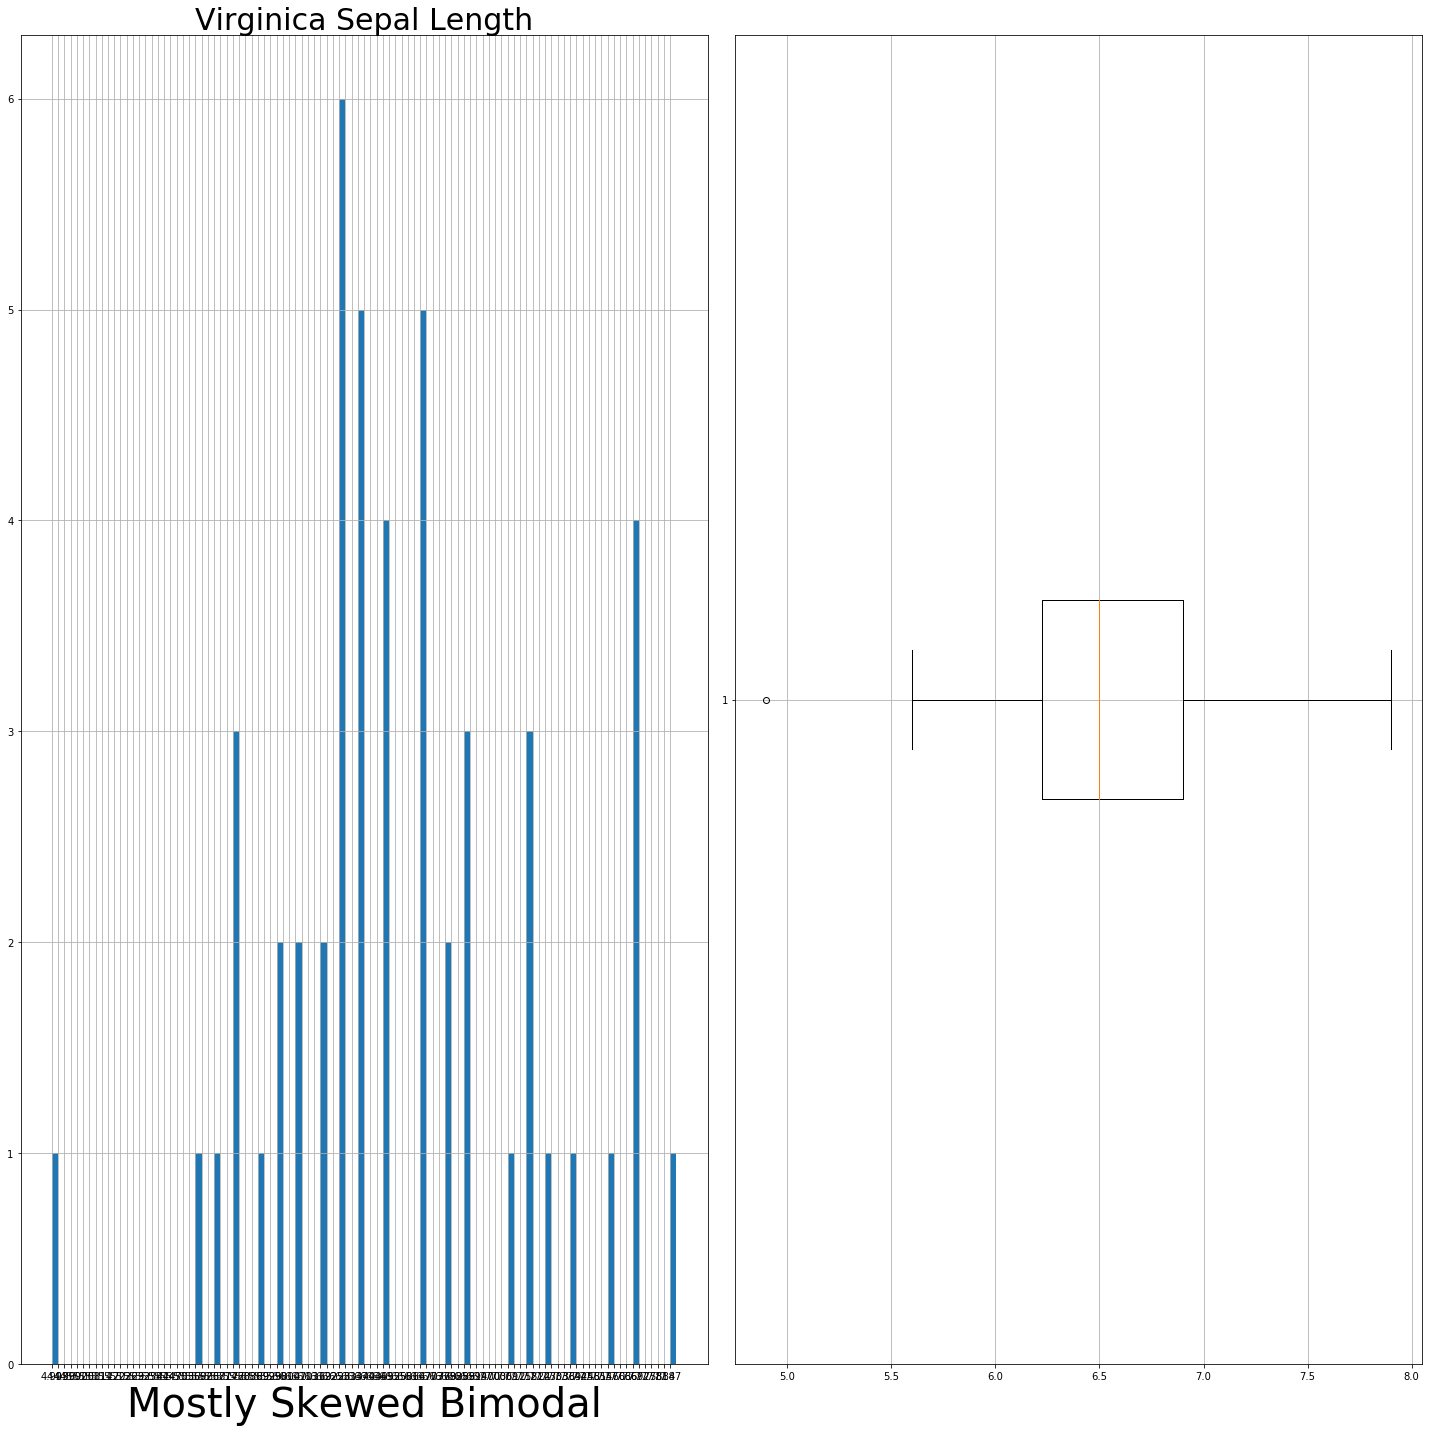

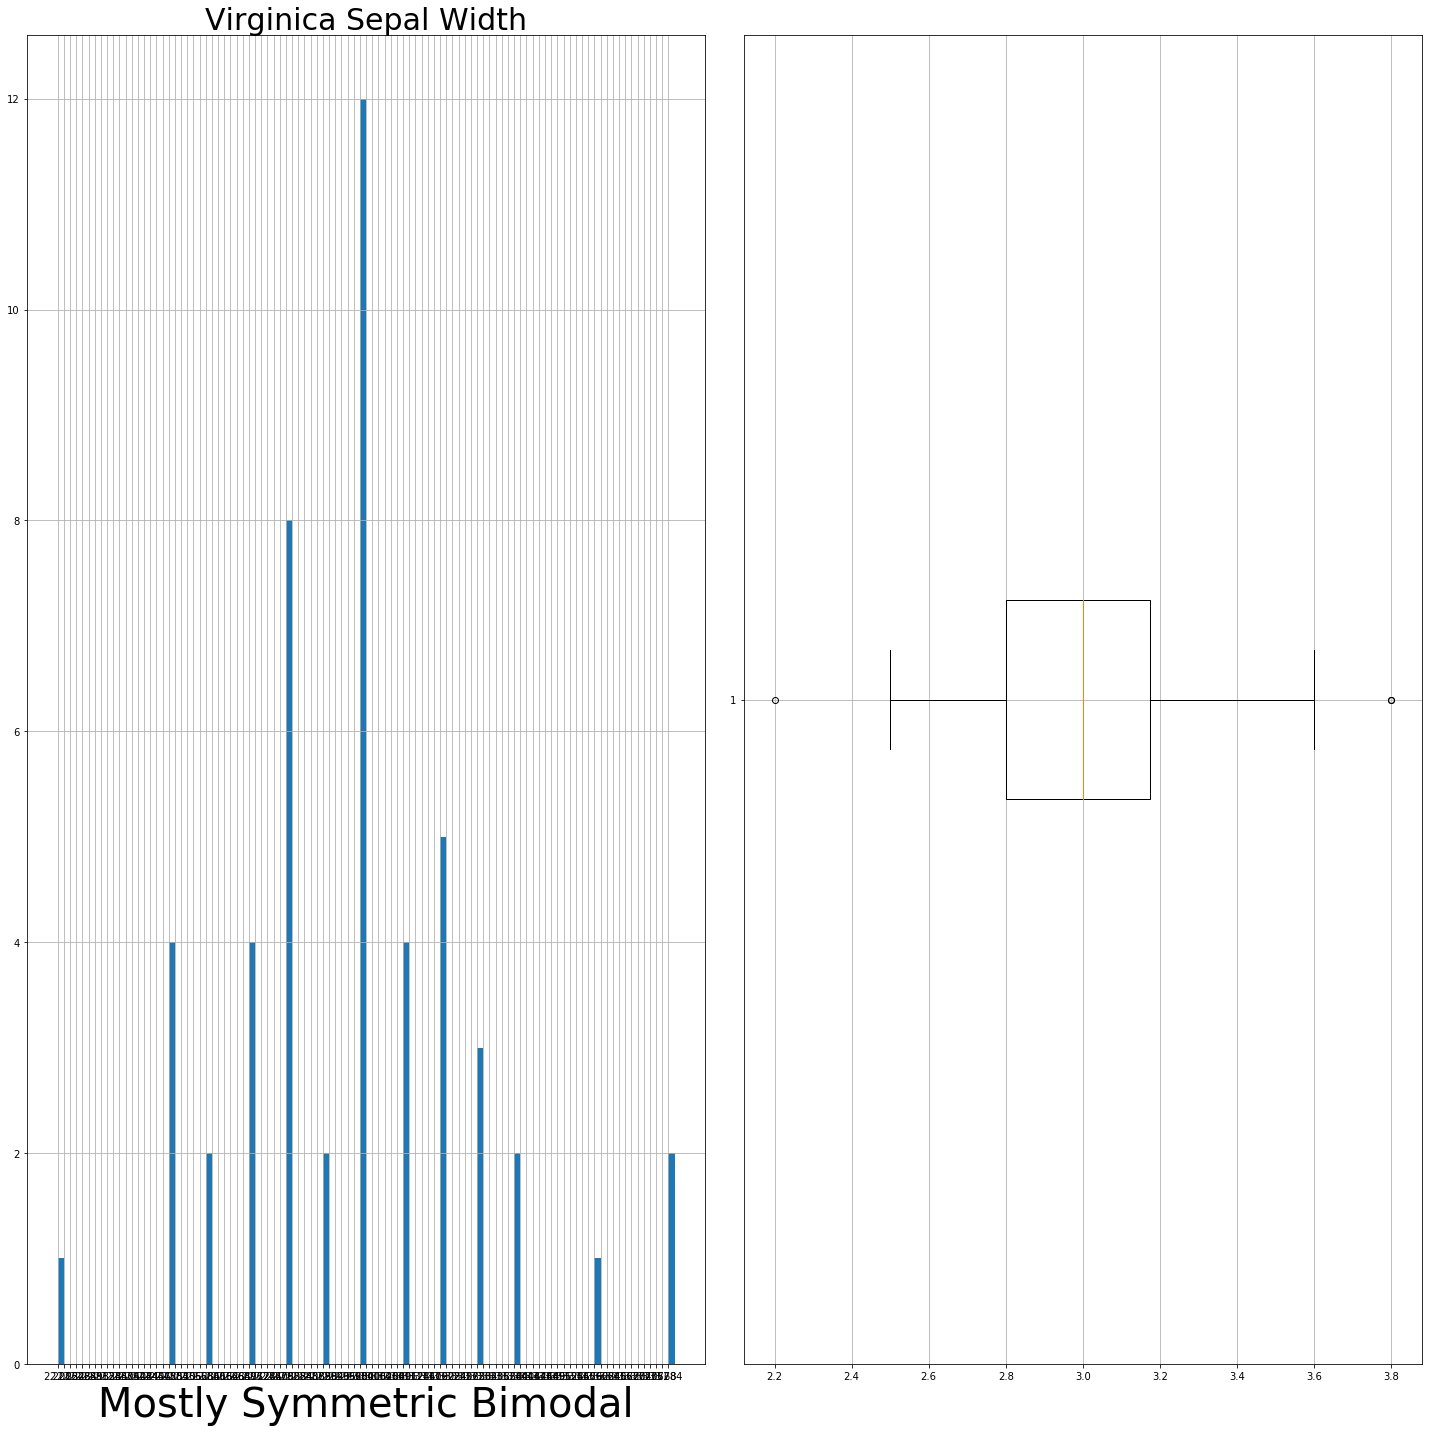

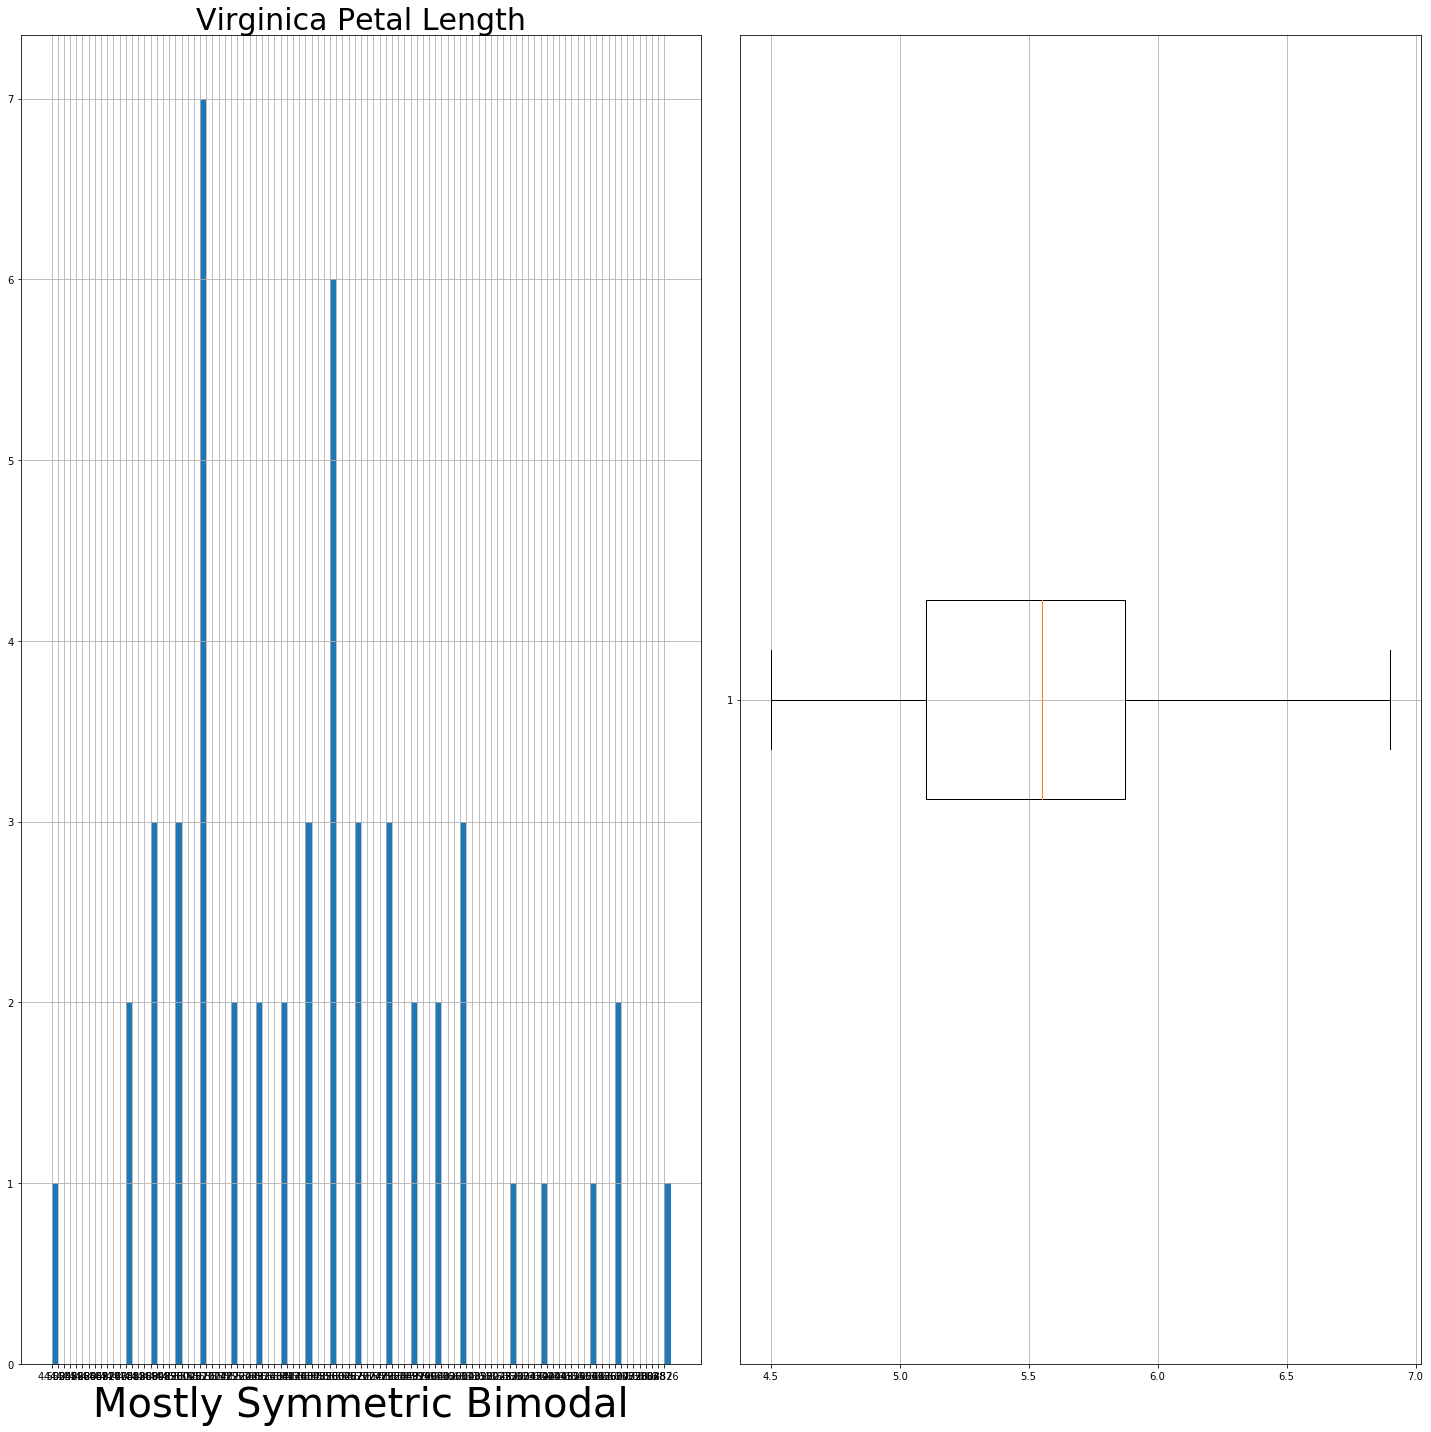

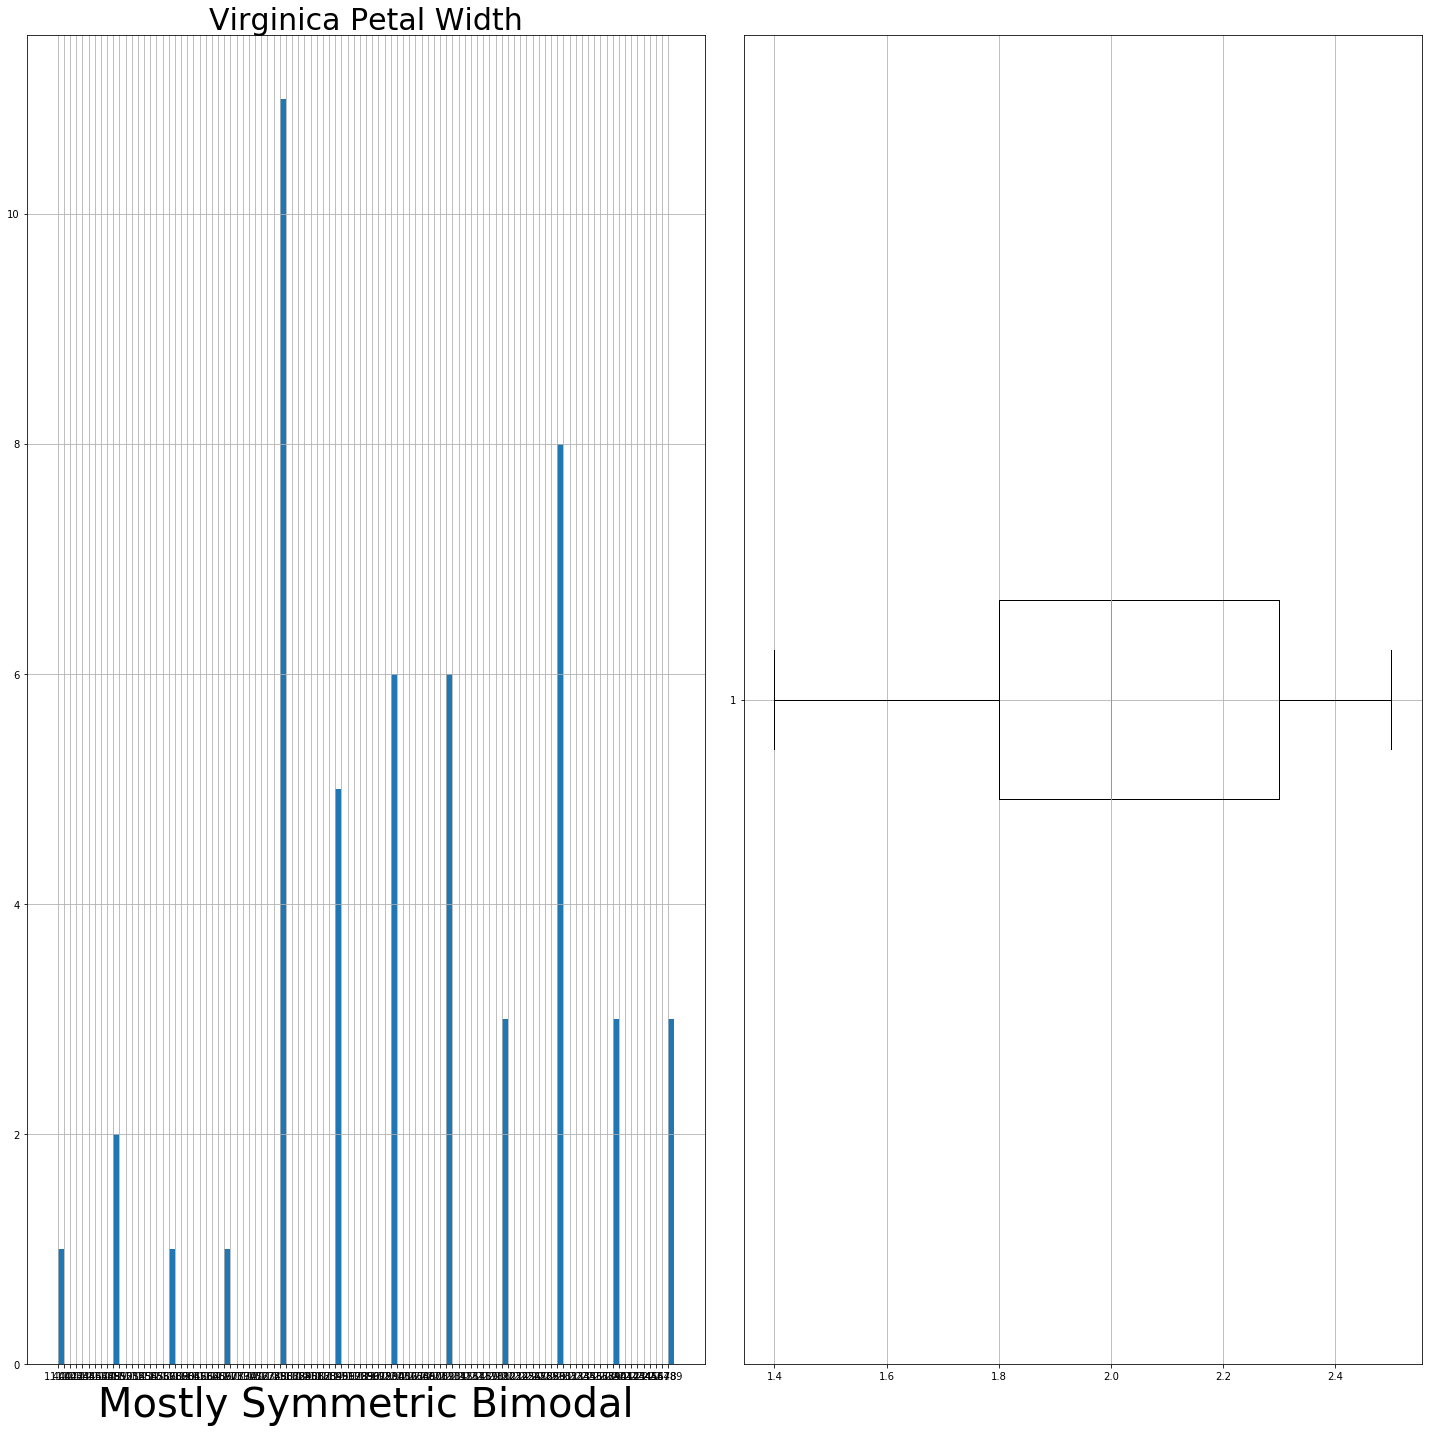

In [185]:
"""
Function calls for Iris Data, bin size = 100

"""

# Setosa
histogram(setosa['sepal_length'], 100,"Setosa Sepal Length", text = "Bimodal")
histogram(setosa['sepal_width'], 100, "Setosa Sepal Width", text = "Bimodal")
histogram(setosa['petal_length'], 100,"Setosa Petal Length", text = "Unimodal")
histogram(setosa['petal_width'], 100, "Setosa Petal Width",text = "Unimodal")

# Versicolor
histogram(versicolor['sepal_length'], 100,"Versicolor Sepal Length", text = "Bimodal")
histogram(versicolor['sepal_width'], 100,"Versicolor Sepal Width", text = "Unimodal")
histogram(versicolor['petal_length'], 100,"Versicolor Petal Length", text = "Bimodal")
histogram(versicolor['petal_width'], 100,"Versicolor Petal Width", text = "Bimodal")

# Virginica
histogram(virginica['sepal_length'], 100,"Virginica Sepal Length", text = "Bimodal")
histogram(virginica['sepal_width'], 100,"Virginica Sepal Width", text = "Bimodal")
histogram(virginica['petal_length'], 100,"Virginica Petal Length", text = "Bimodal")
histogram(virginica['petal_width'], 100,"Virginica Petal Width", text = "Bimodal")

## Wine Data Set Histograms

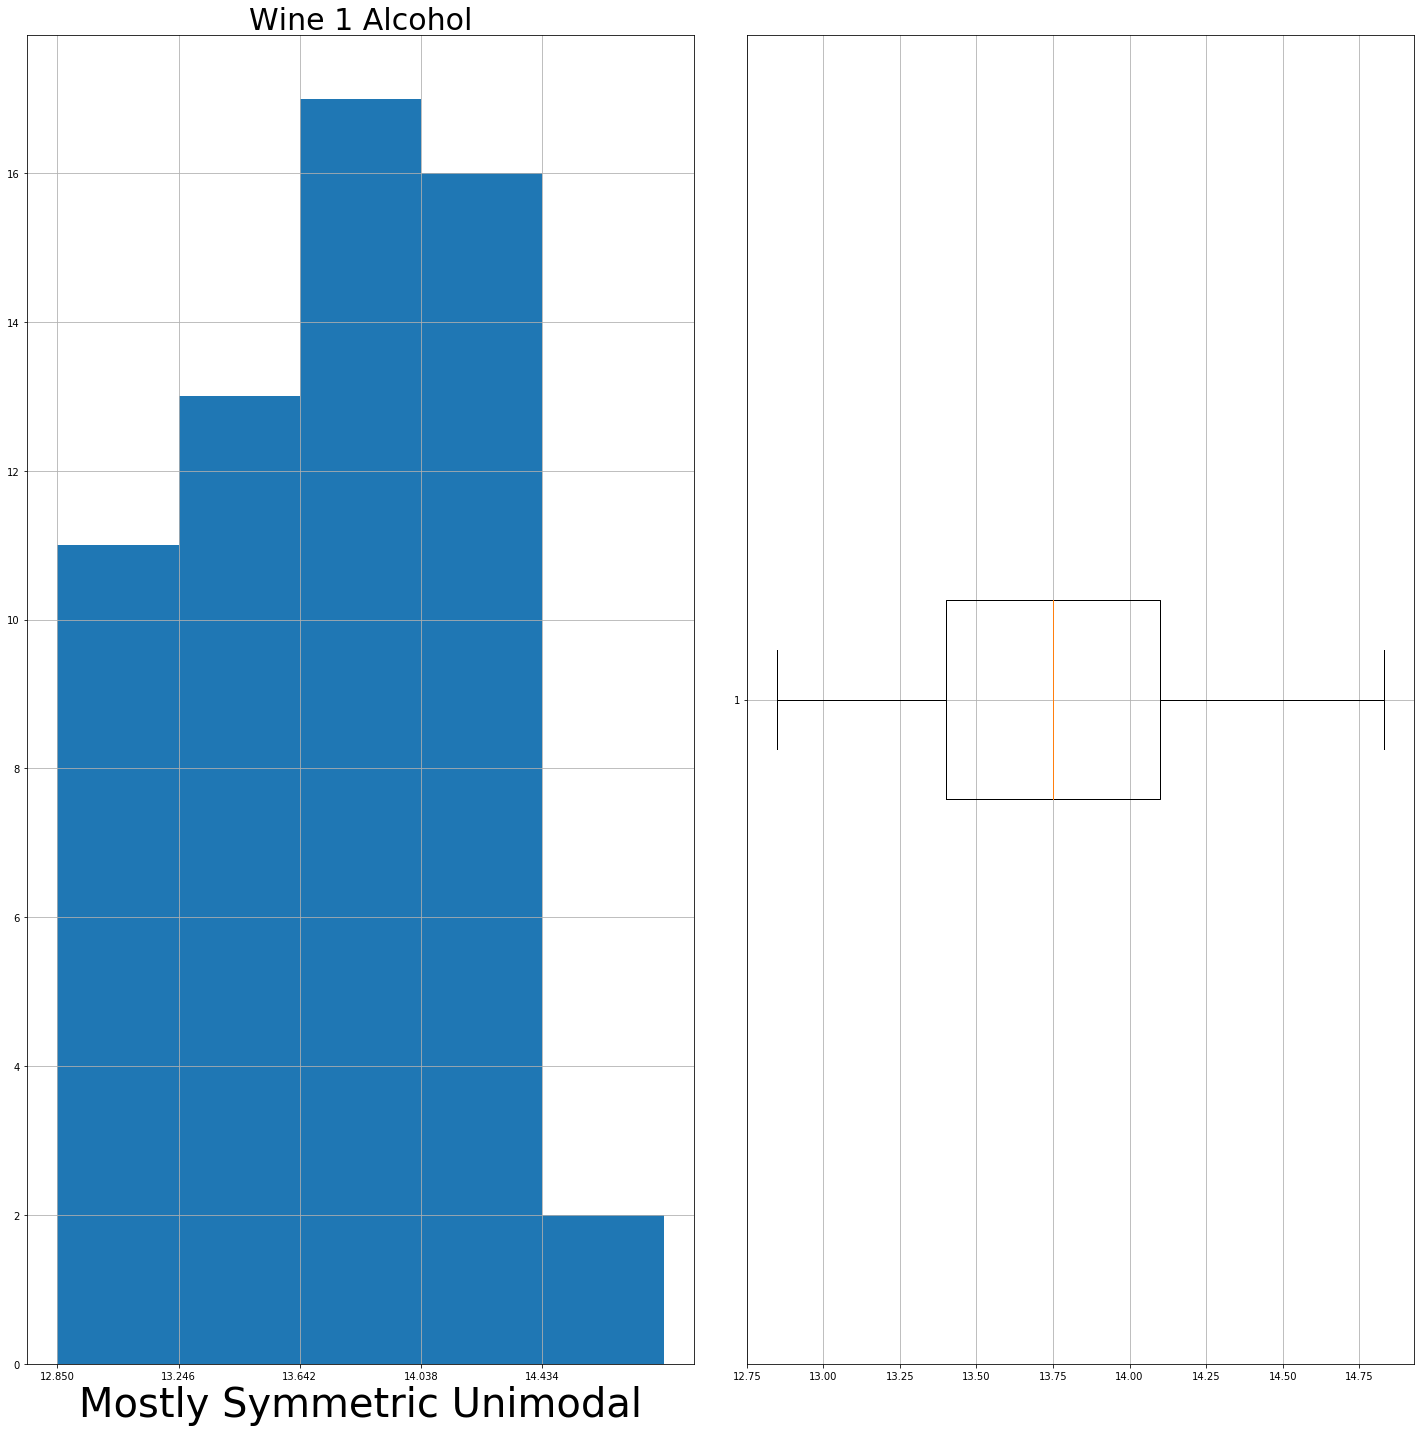

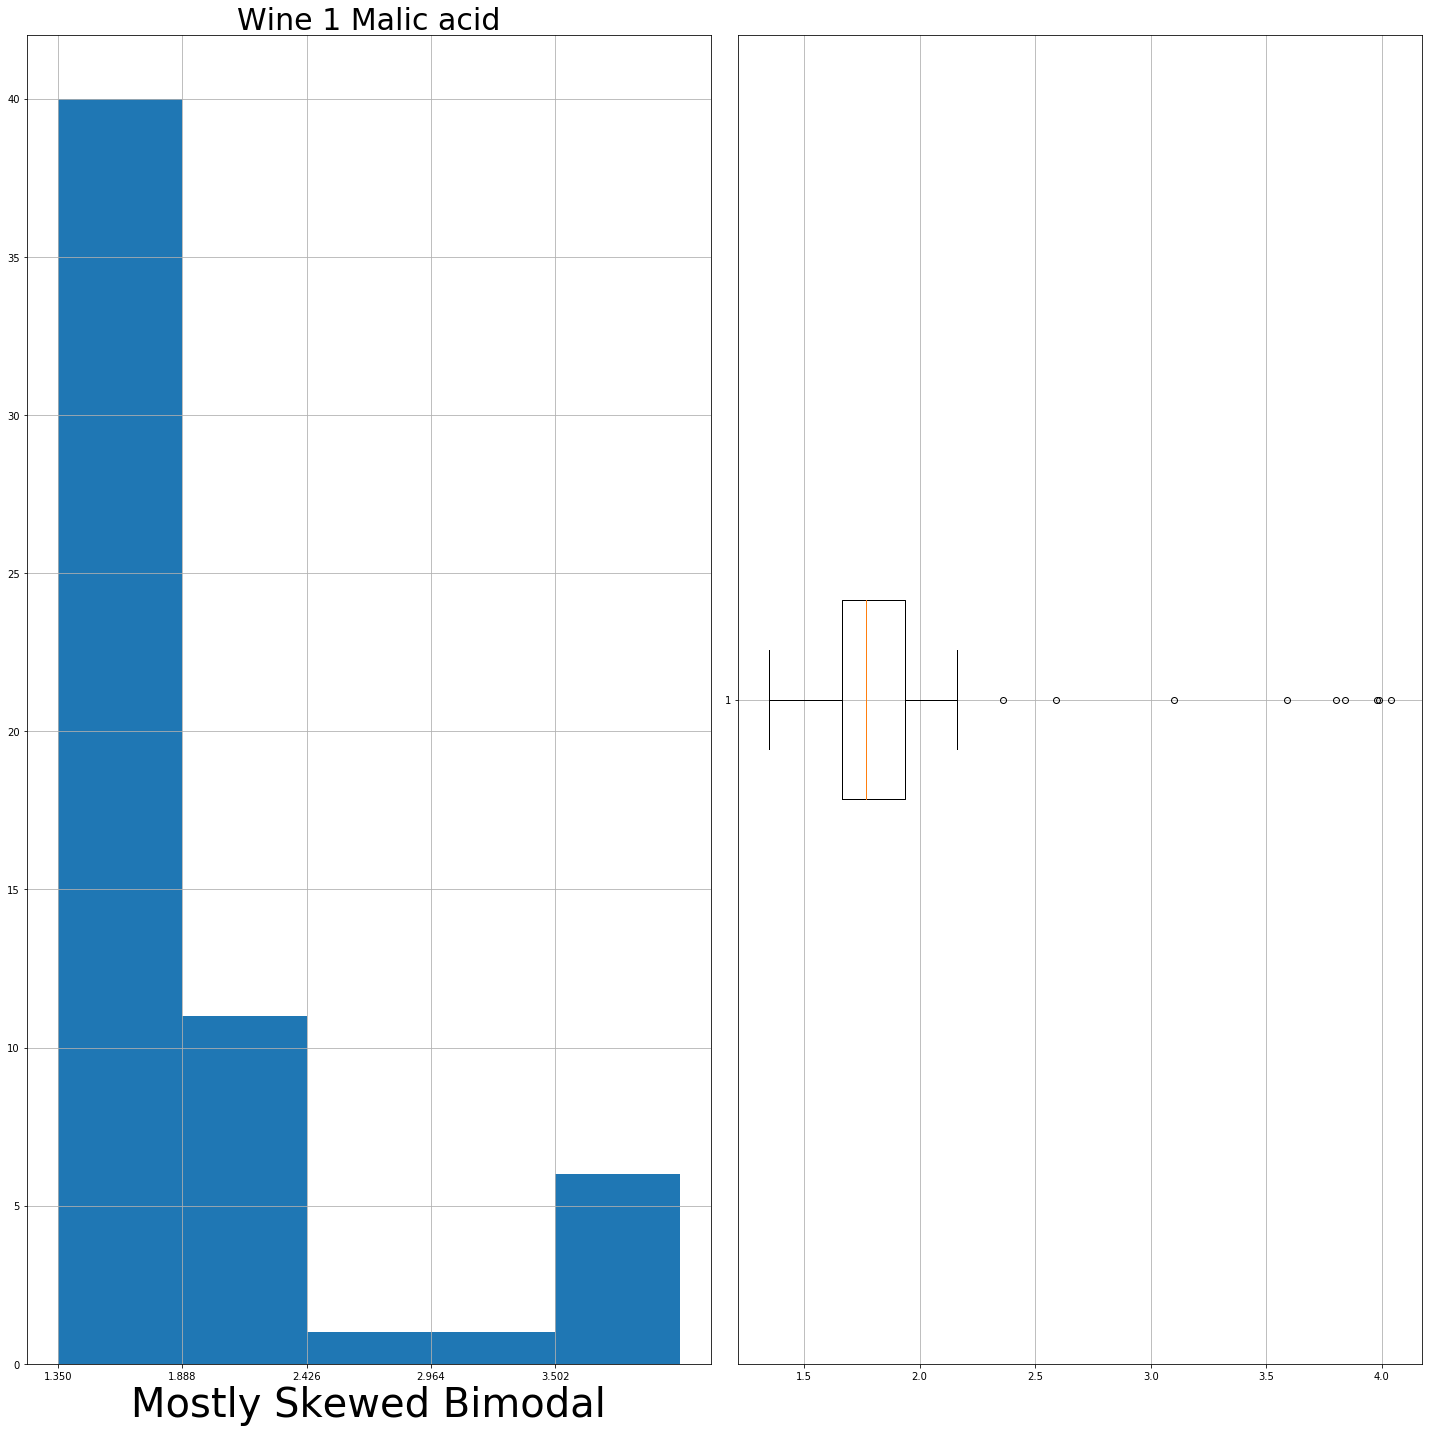

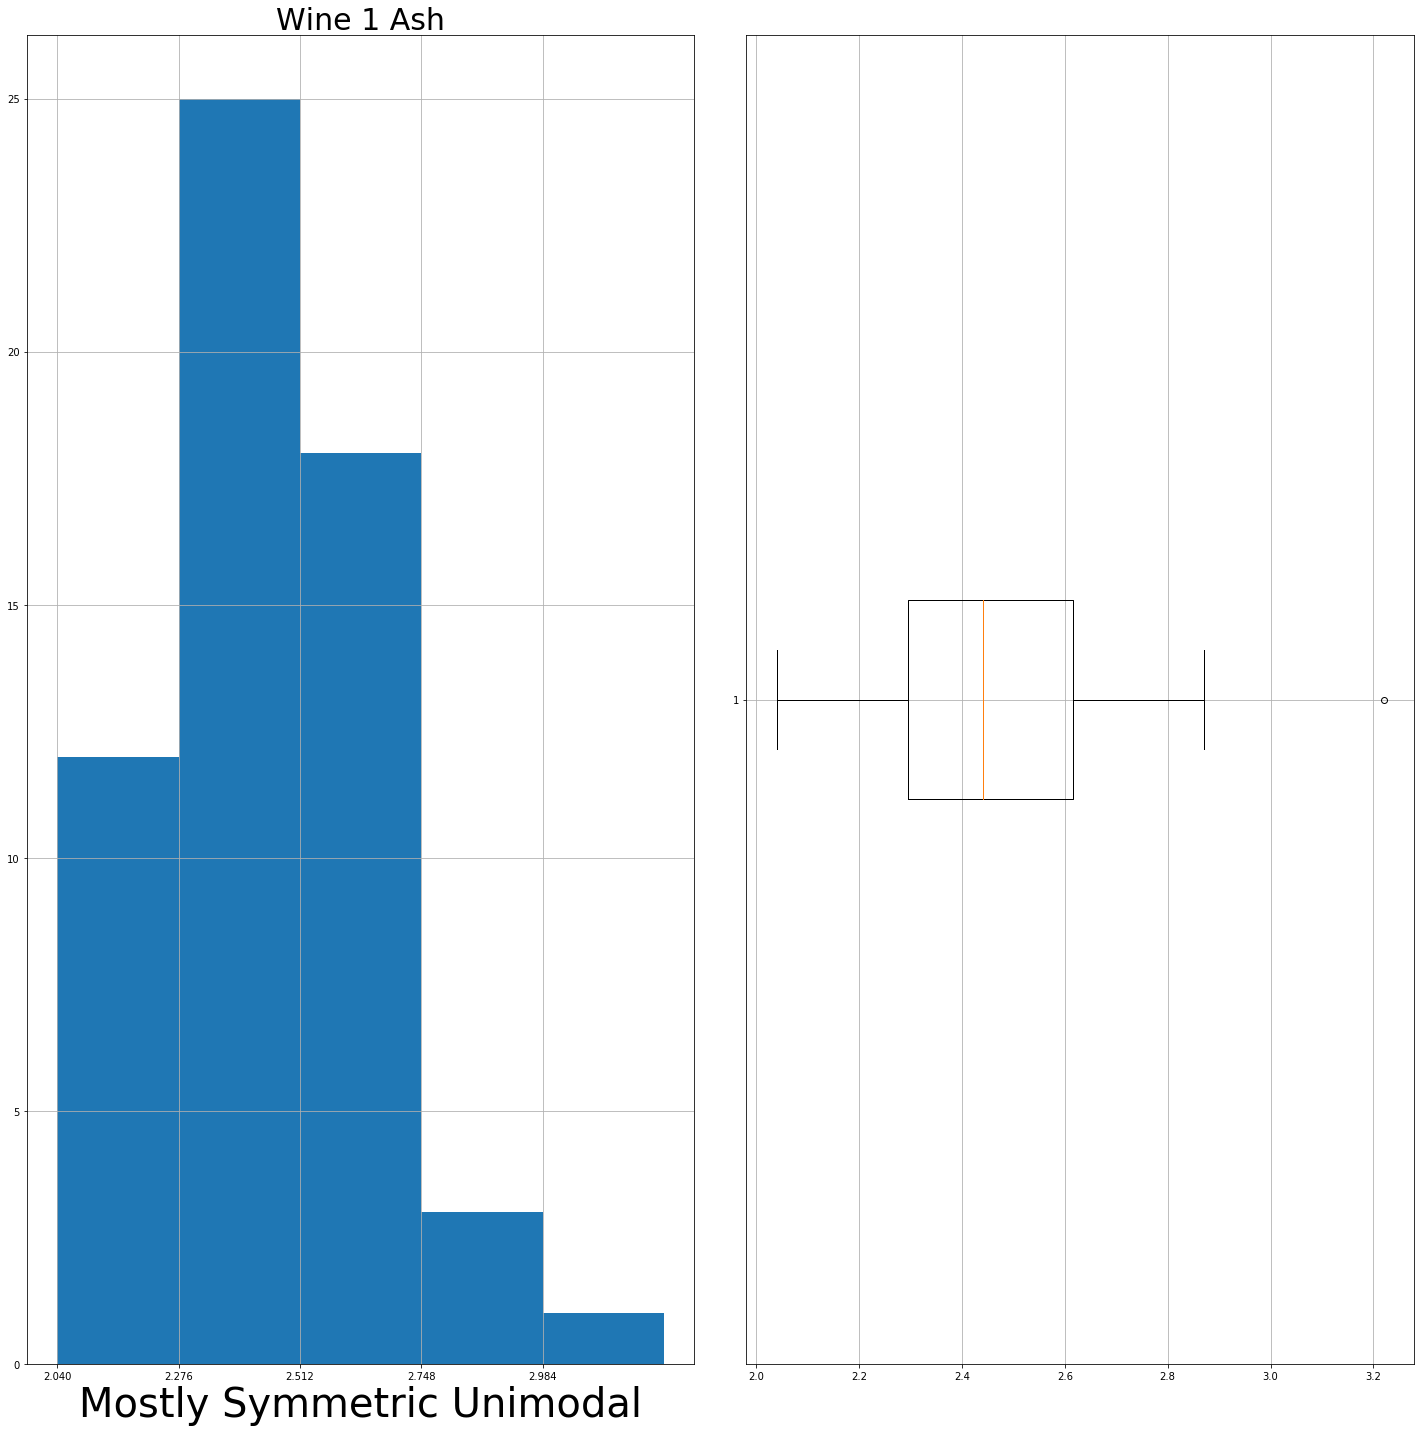

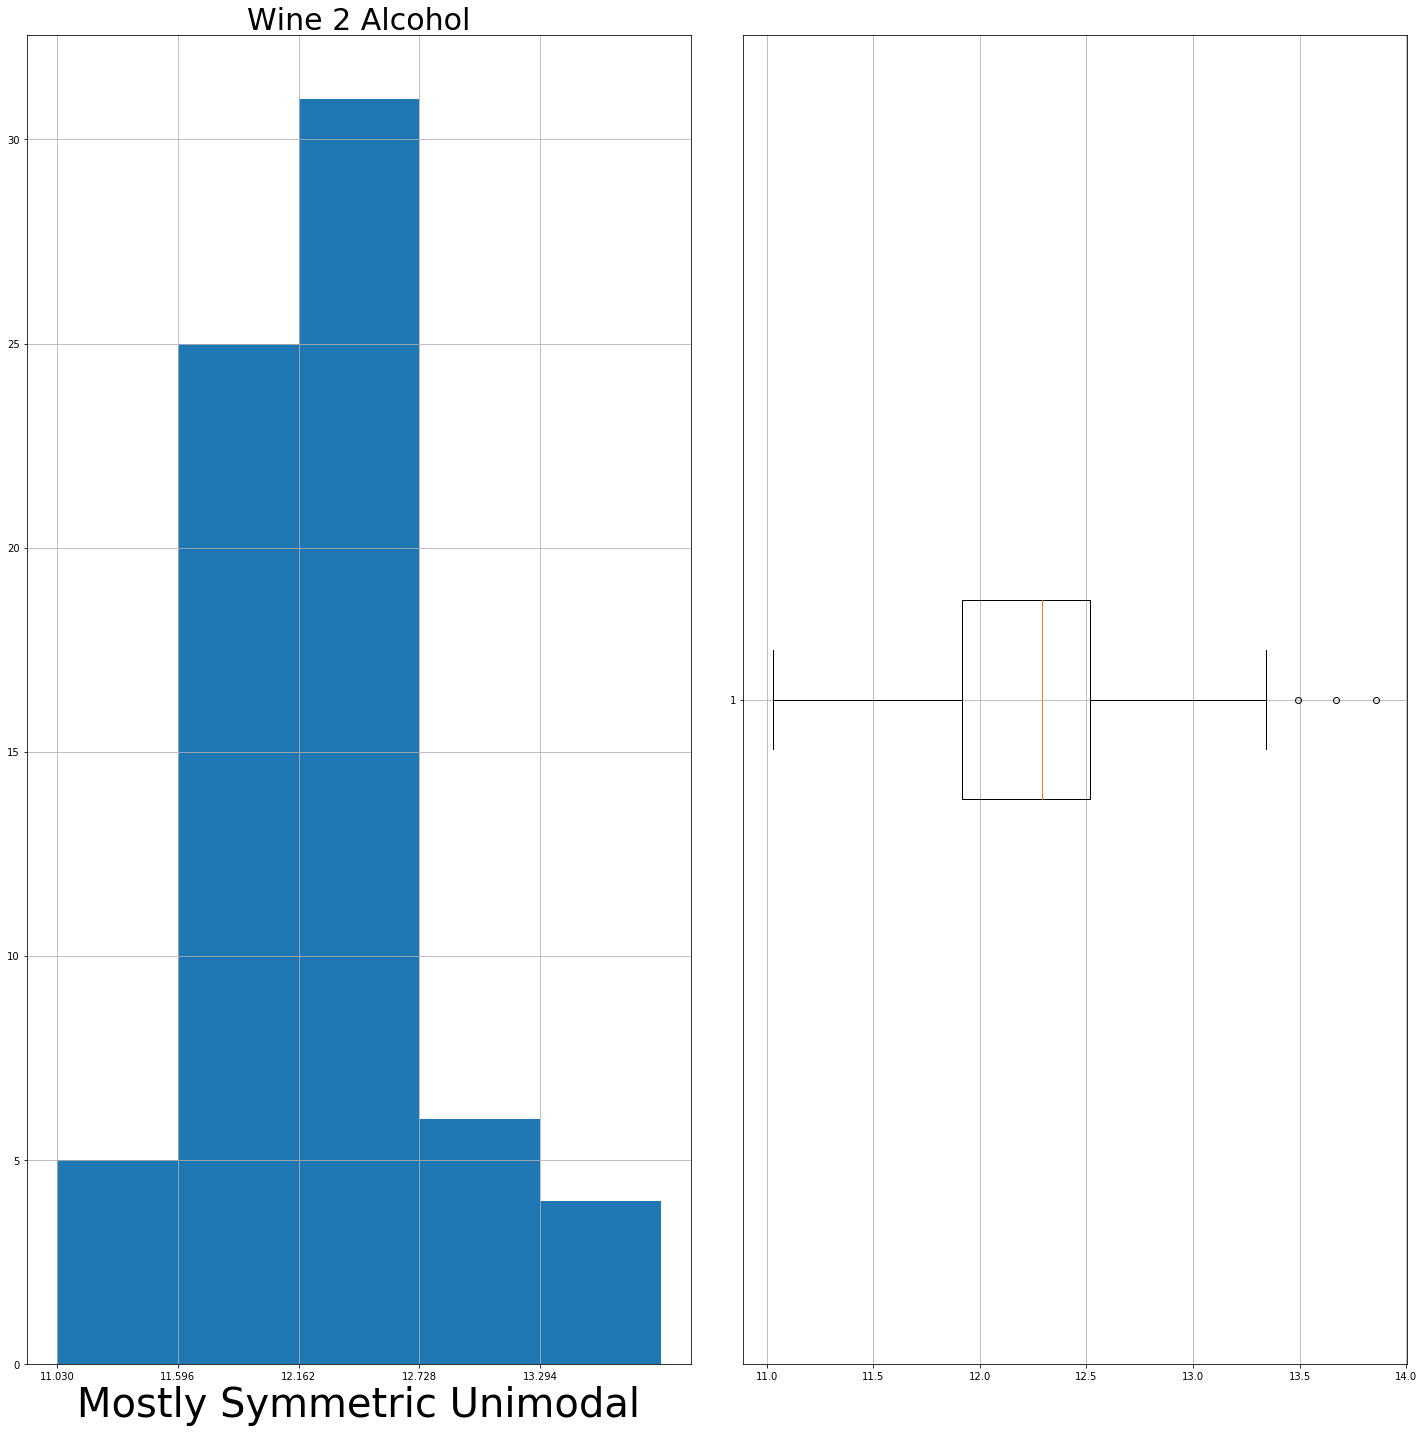

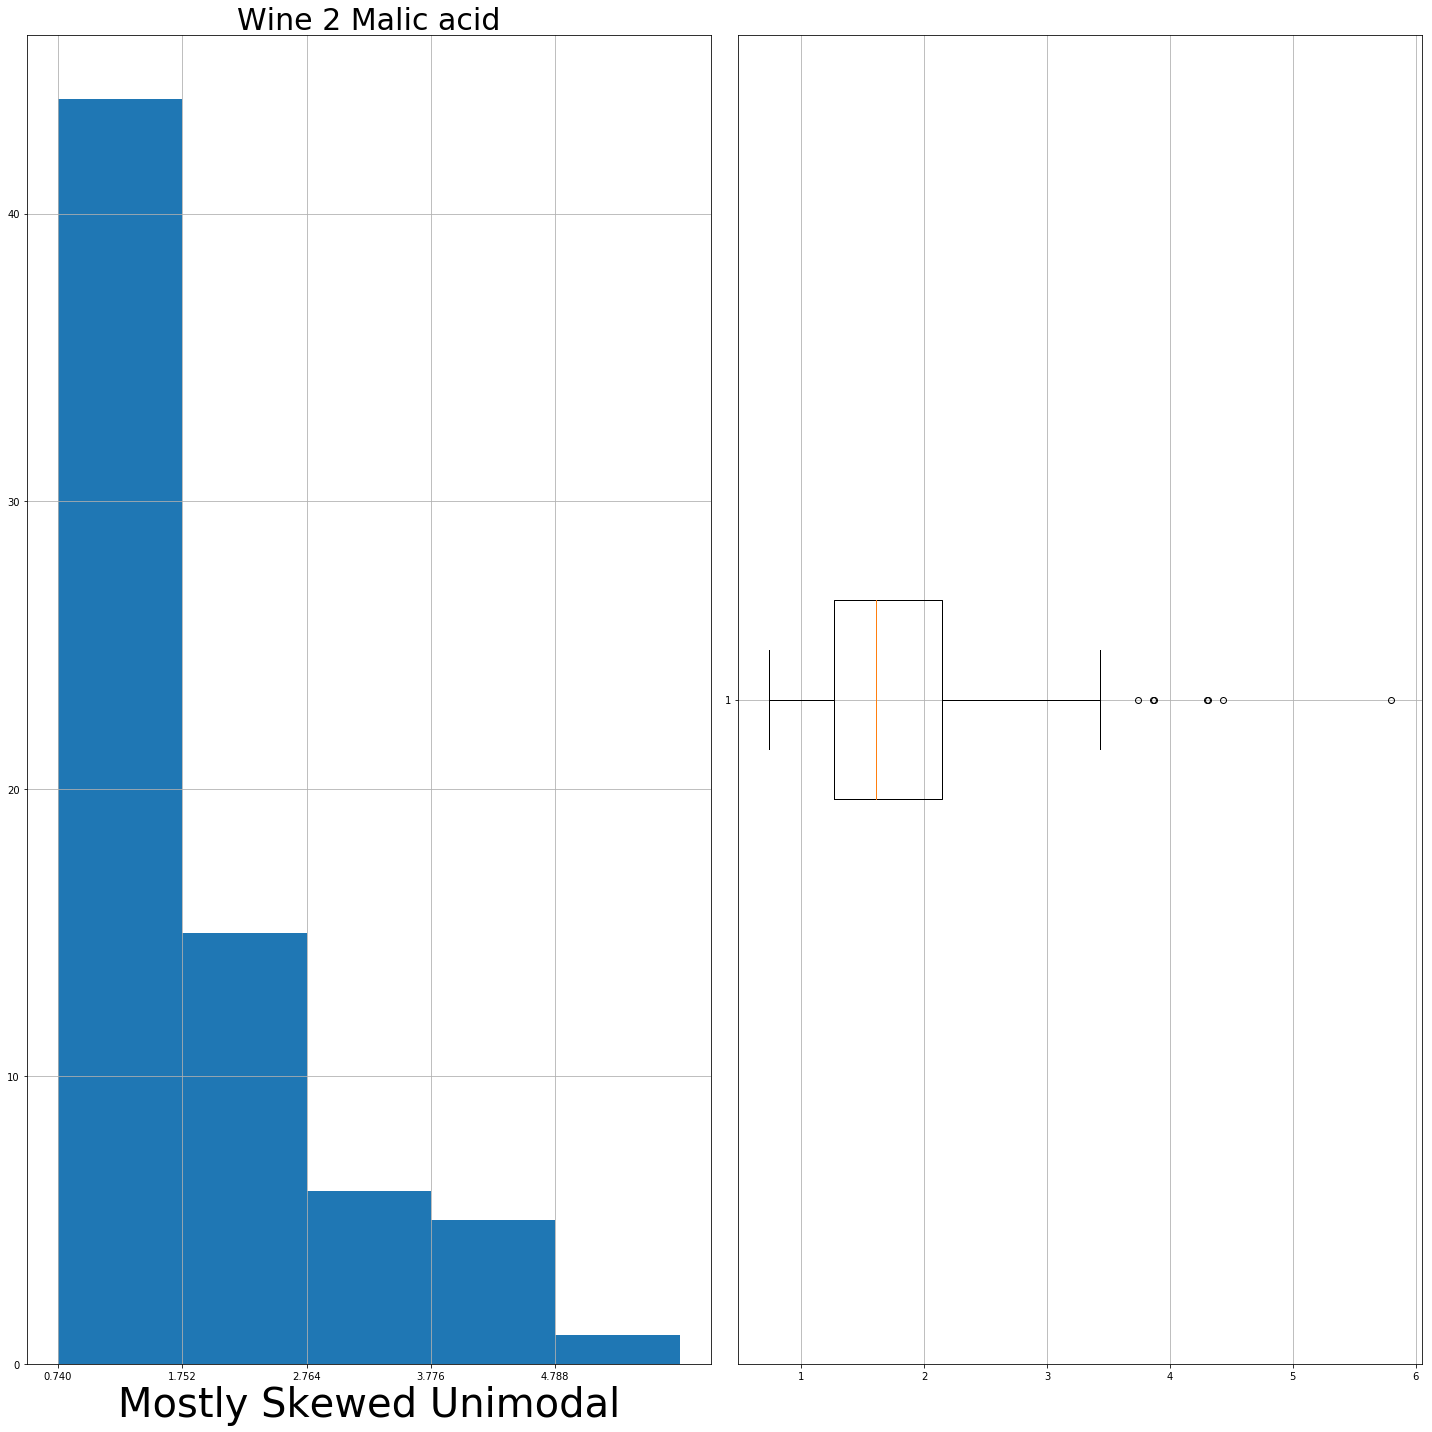

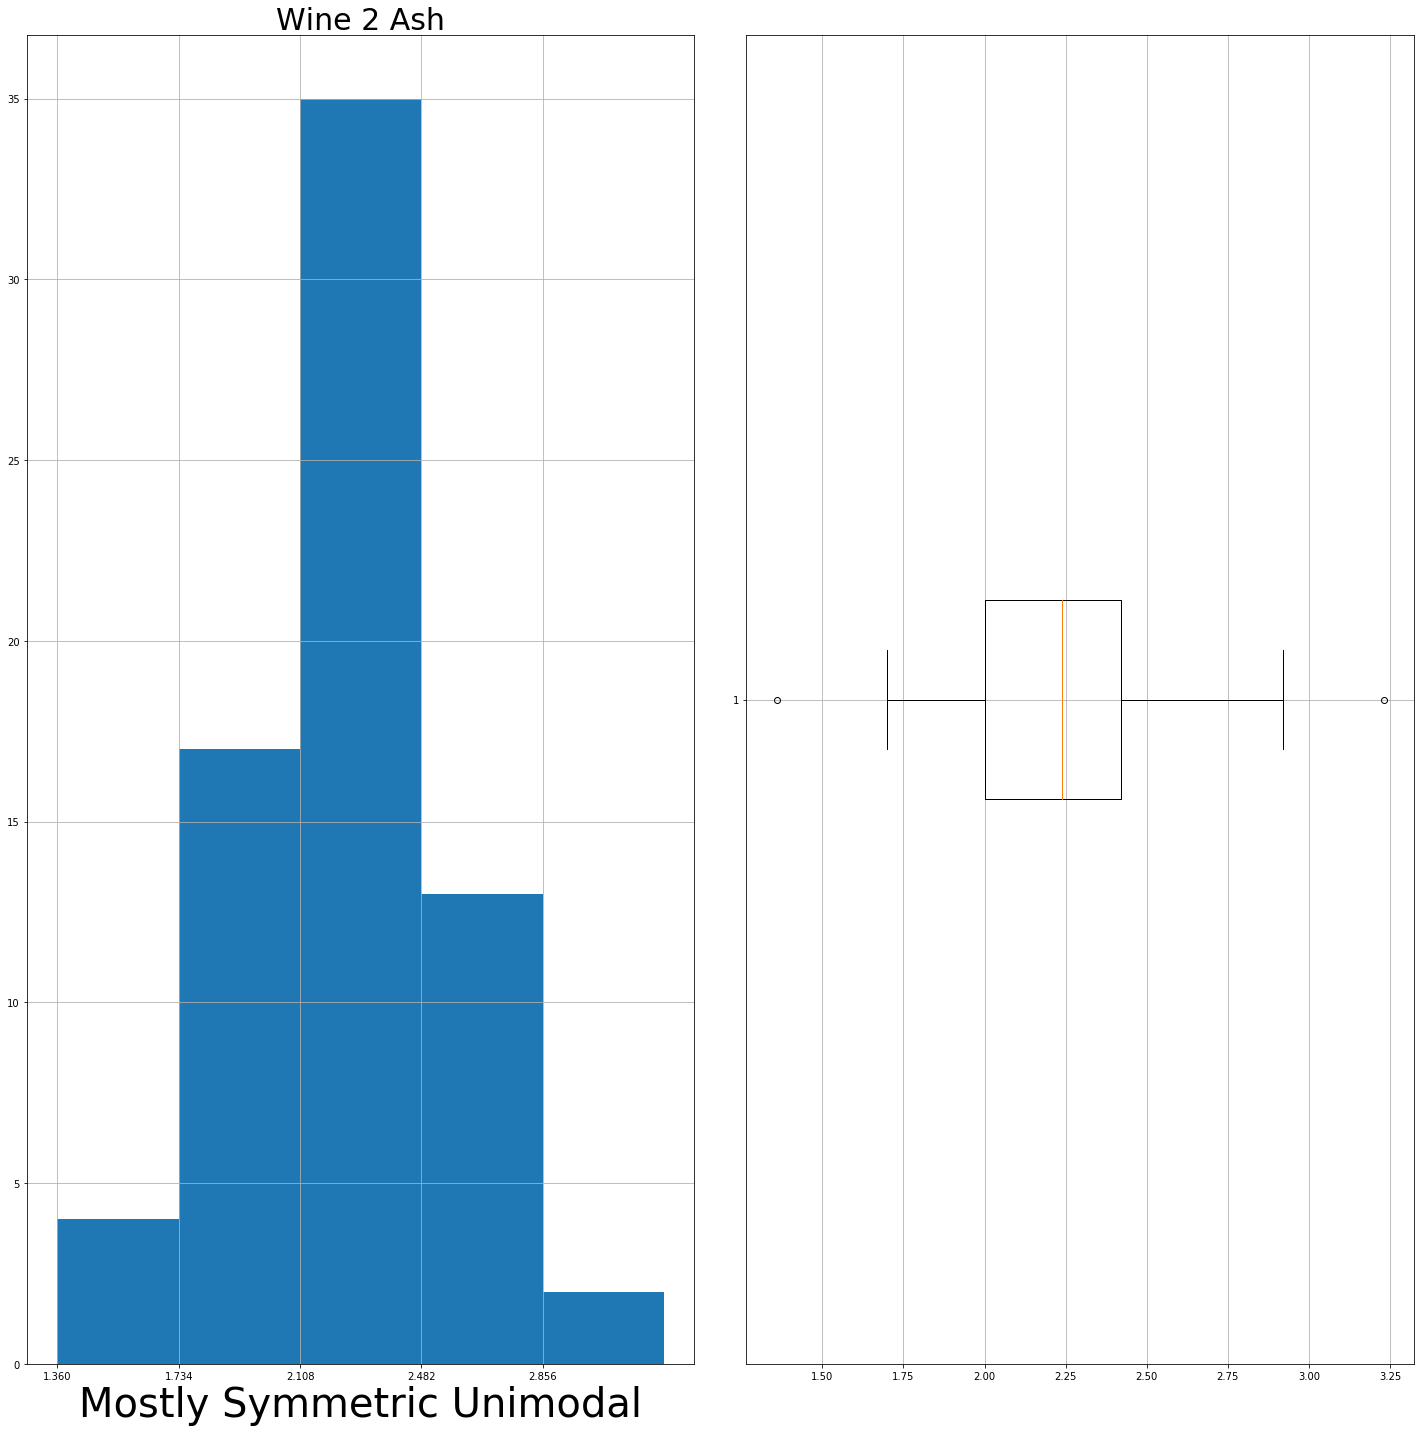

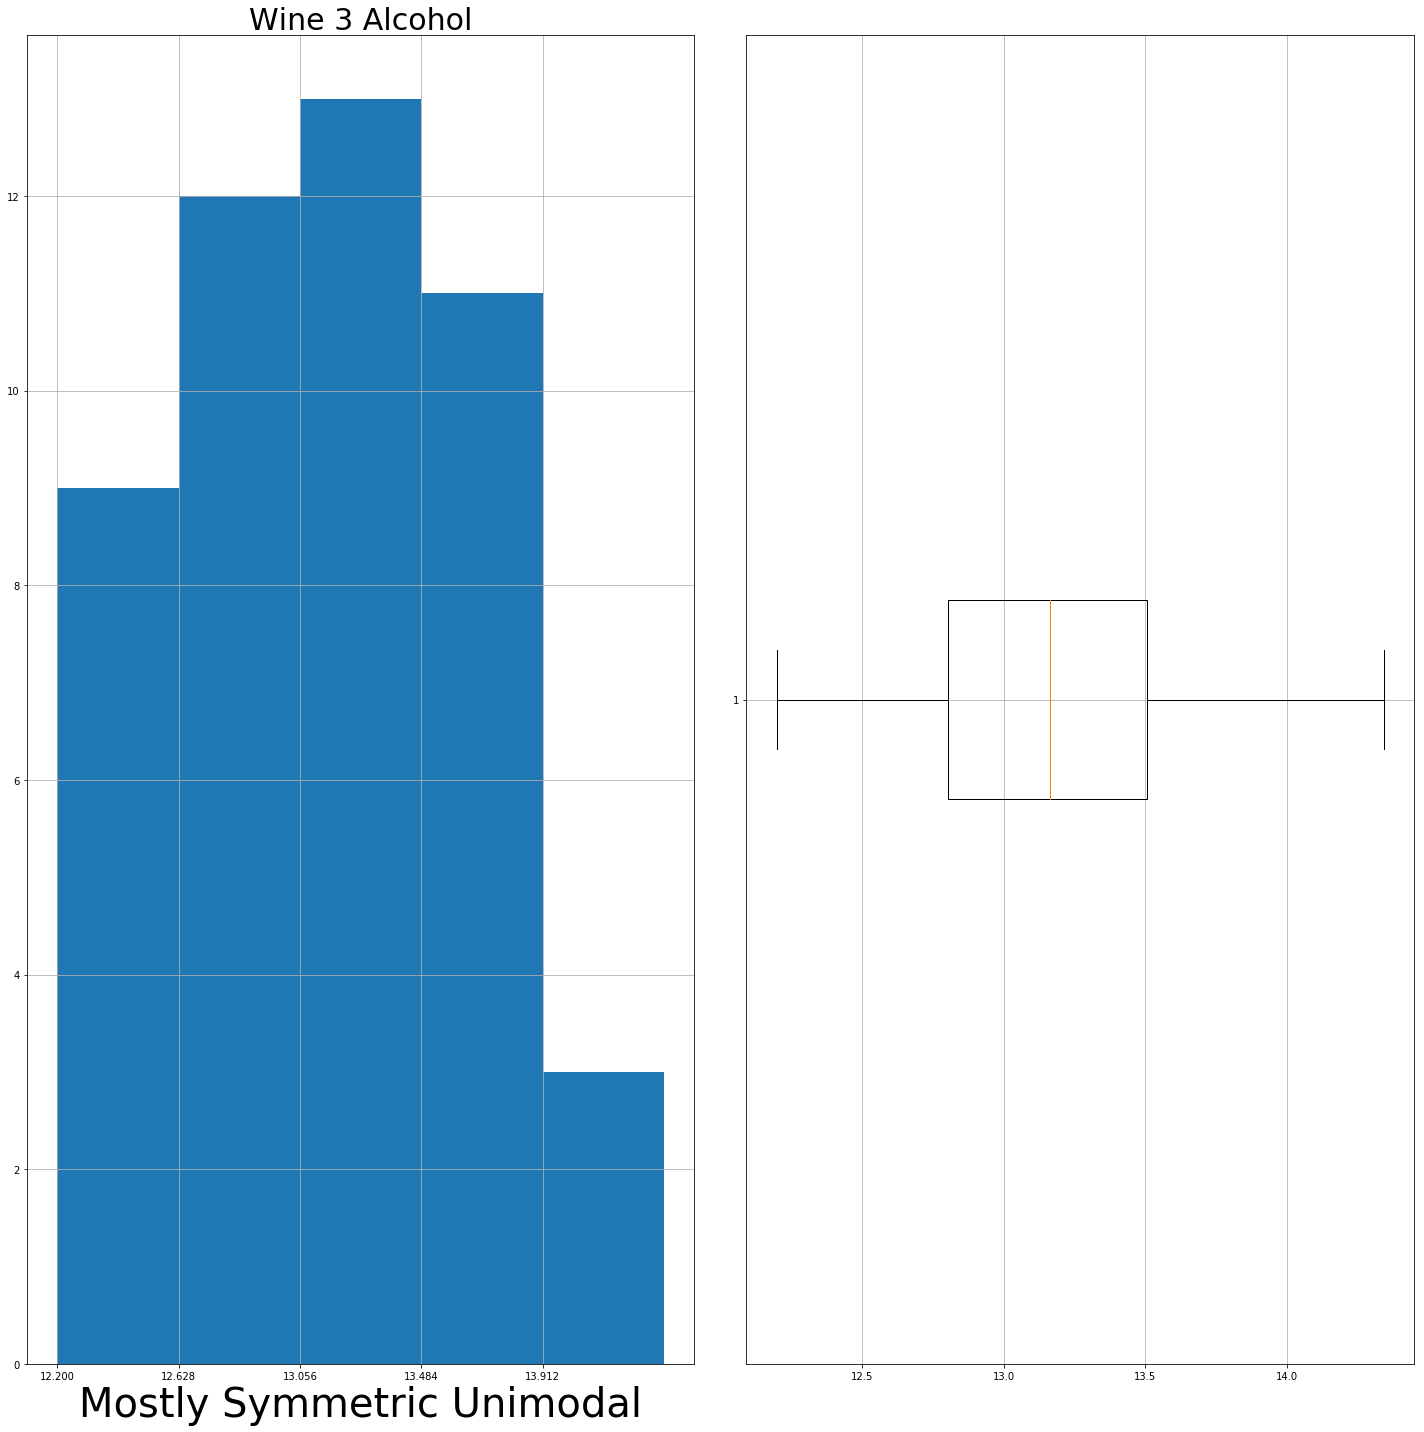

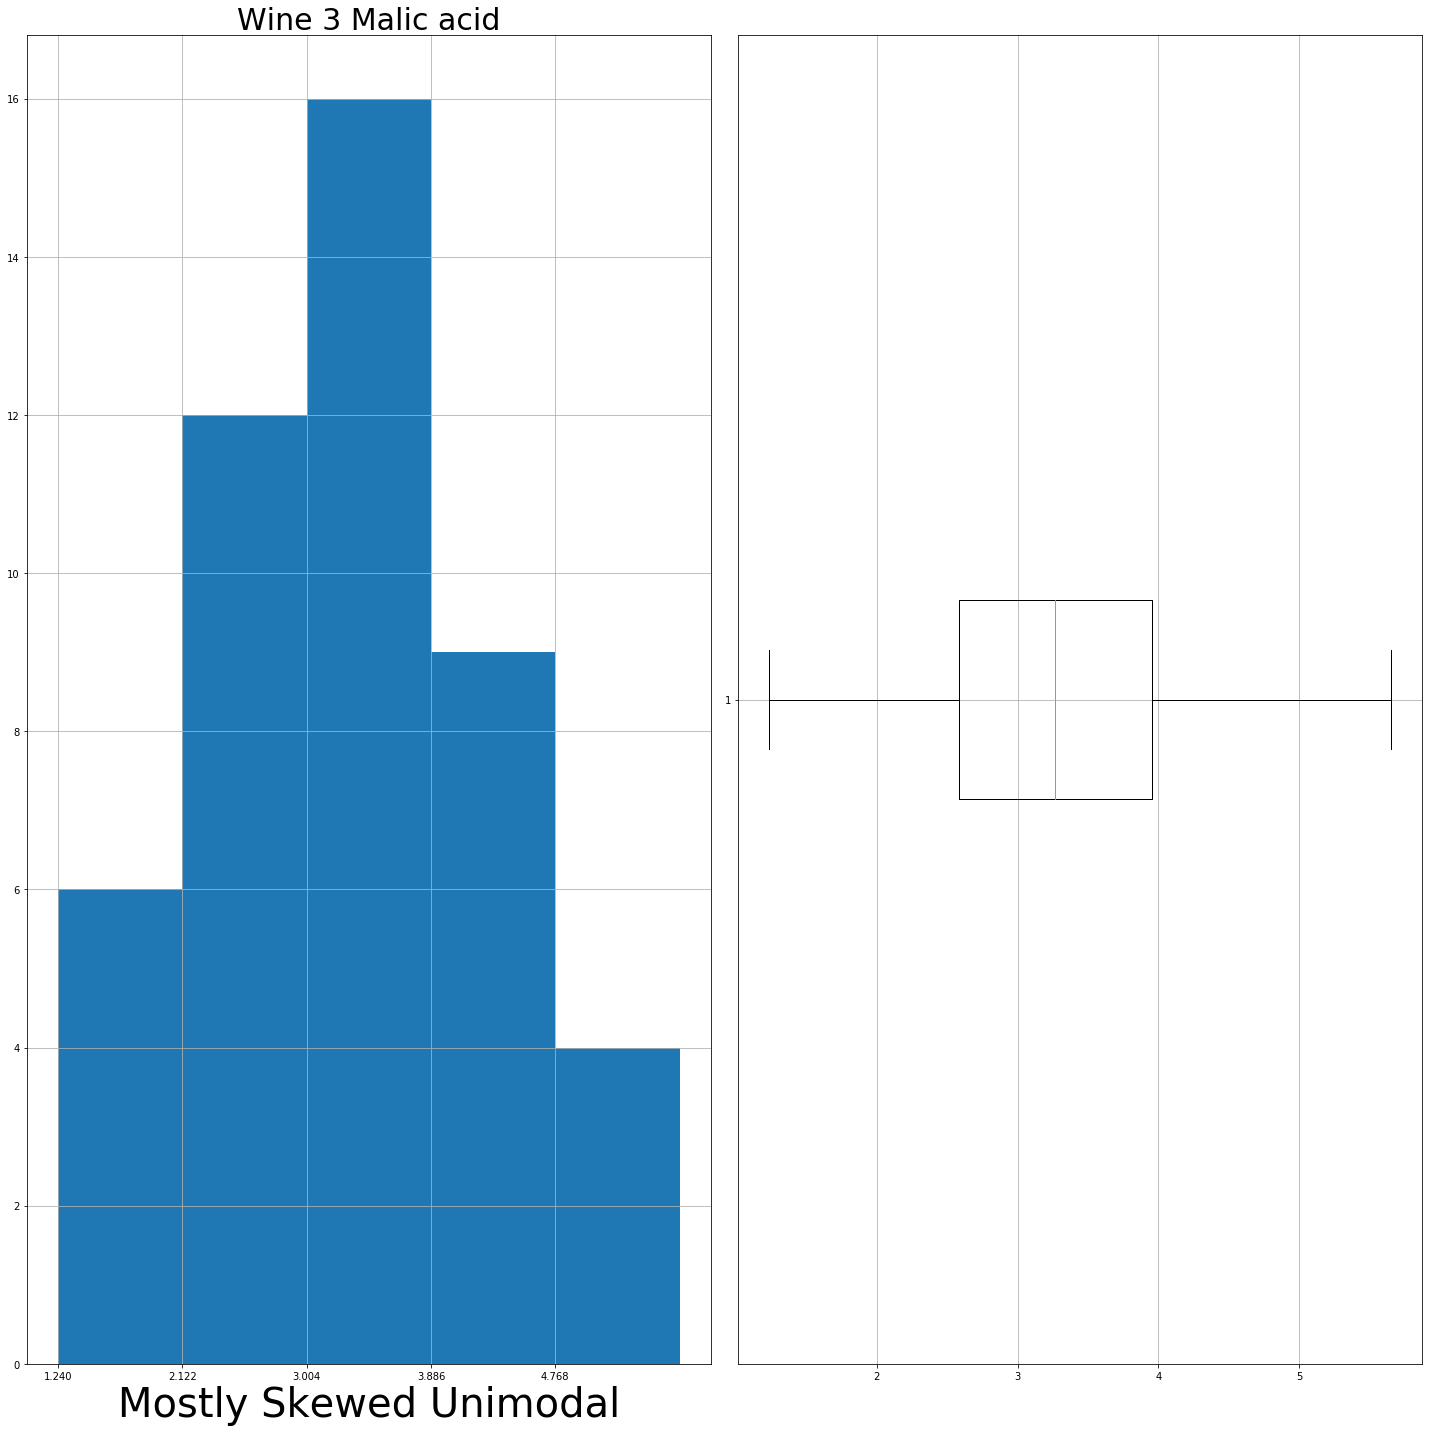

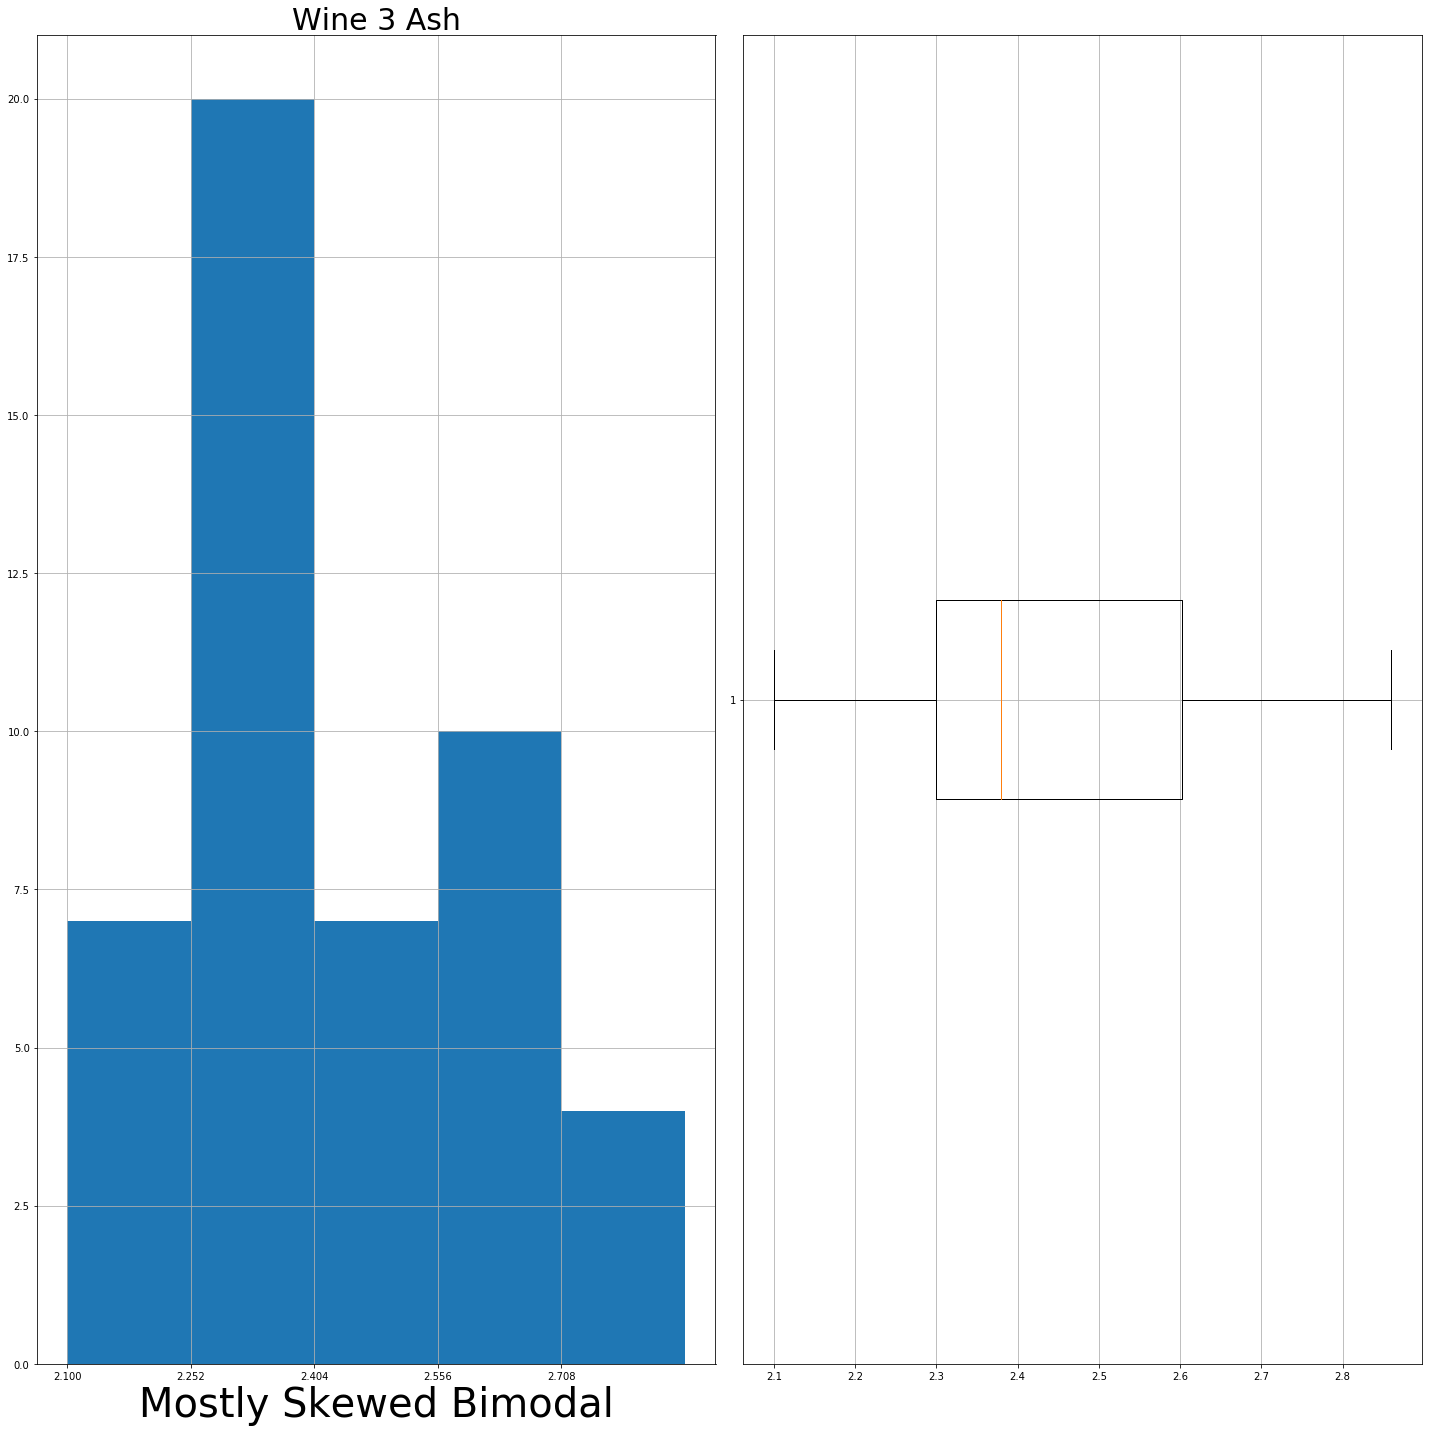

In [186]:
"""
Function calls for Wine Data, bin size = 5

"""

# Wine 1 histograms
histogram(wine1['Alcohol'], 5, "Wine 1 Alcohol", text = "Unimodal")
histogram(wine1['Malic_acid'], 5,"Wine 1 Malic acid", text = "Bimodal")
histogram(wine1['Ash'], 5,"Wine 1 Ash", text = "Unimodal")

# Wine 2 histograms
histogram(wine2['Alcohol'], 5, "Wine 2 Alcohol", text = "Unimodal")
histogram(wine2['Malic_acid'], 5,"Wine 2 Malic acid", text = "Unimodal")
histogram(wine2['Ash'], 5,"Wine 2 Ash", text = "Unimodal")

# Wine 3 histograms
histogram(wine3['Alcohol'], 5, "Wine 3 Alcohol", text = "Unimodal")
histogram(wine3['Malic_acid'], 5,"Wine 3 Malic acid", text = "Unimodal")
histogram(wine3['Ash'], 5,"Wine 3 Ash", text = "Bimodal")

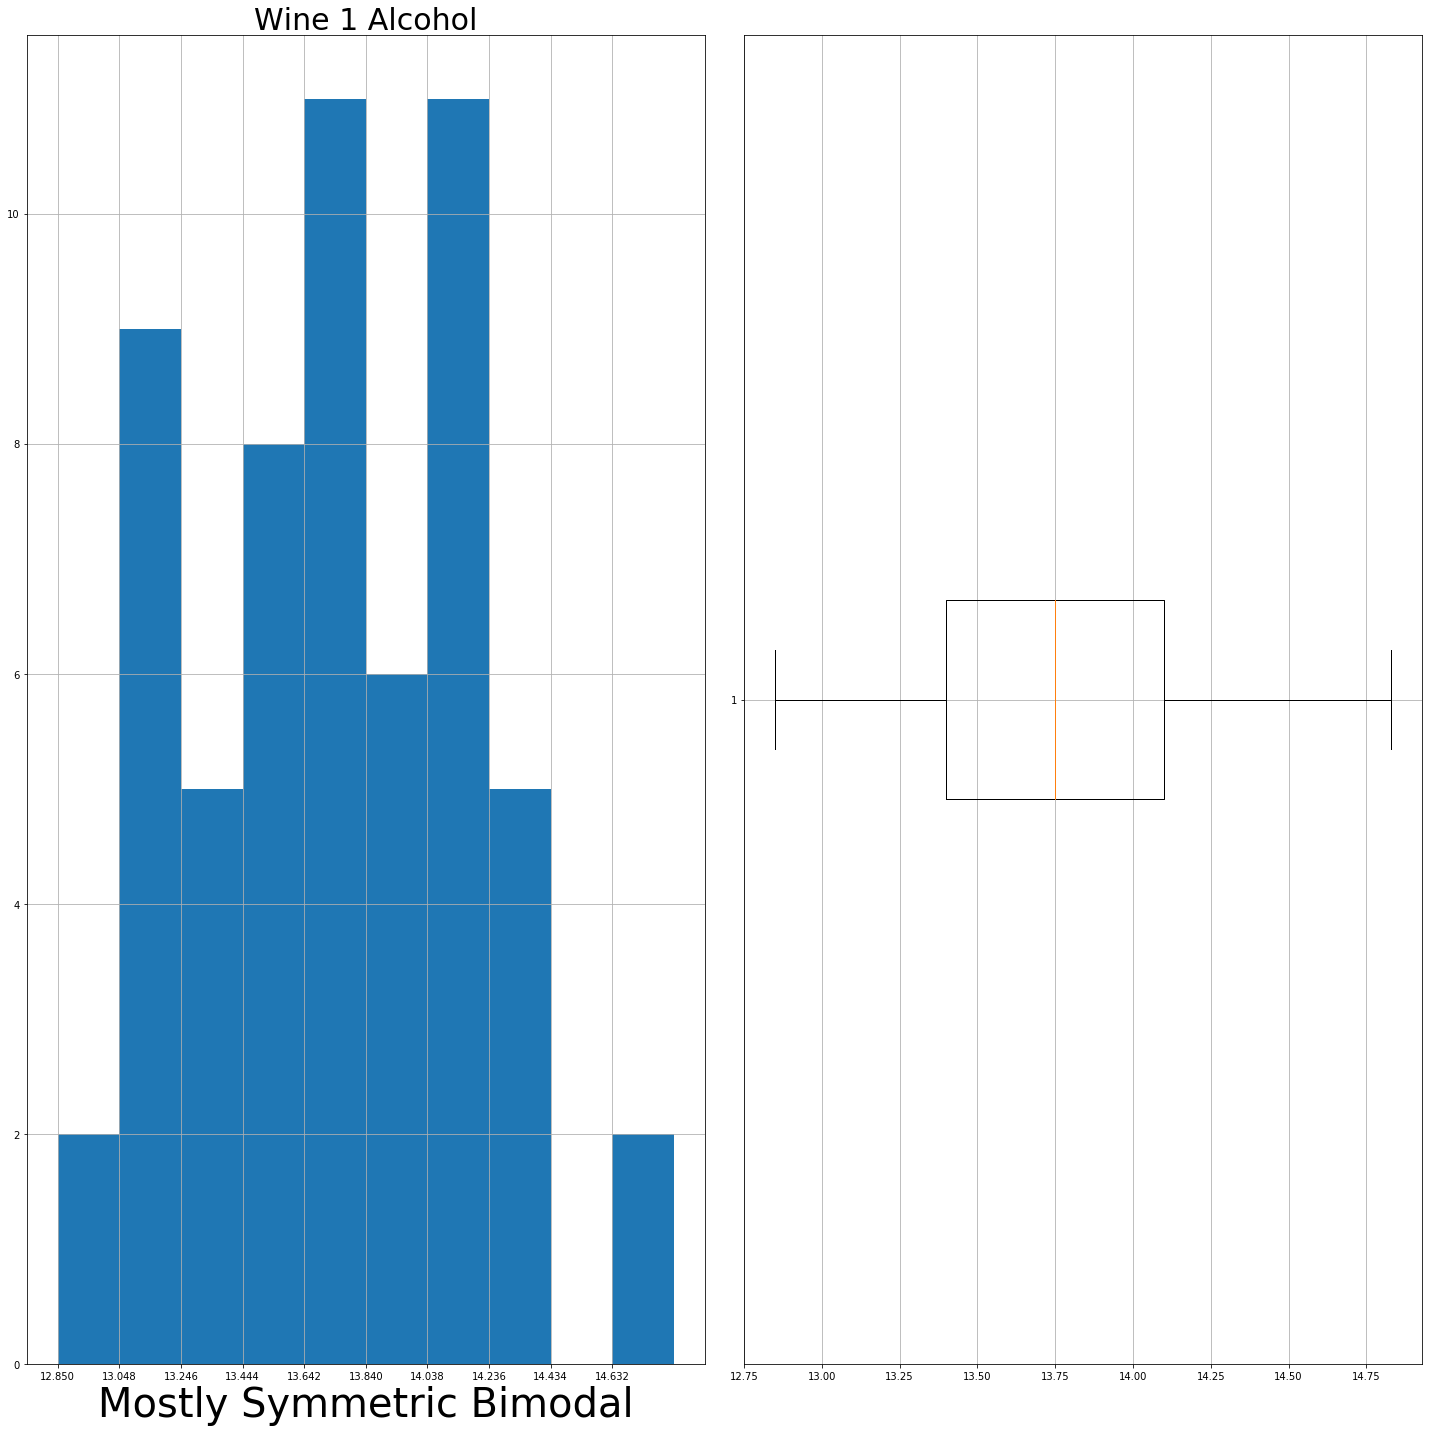

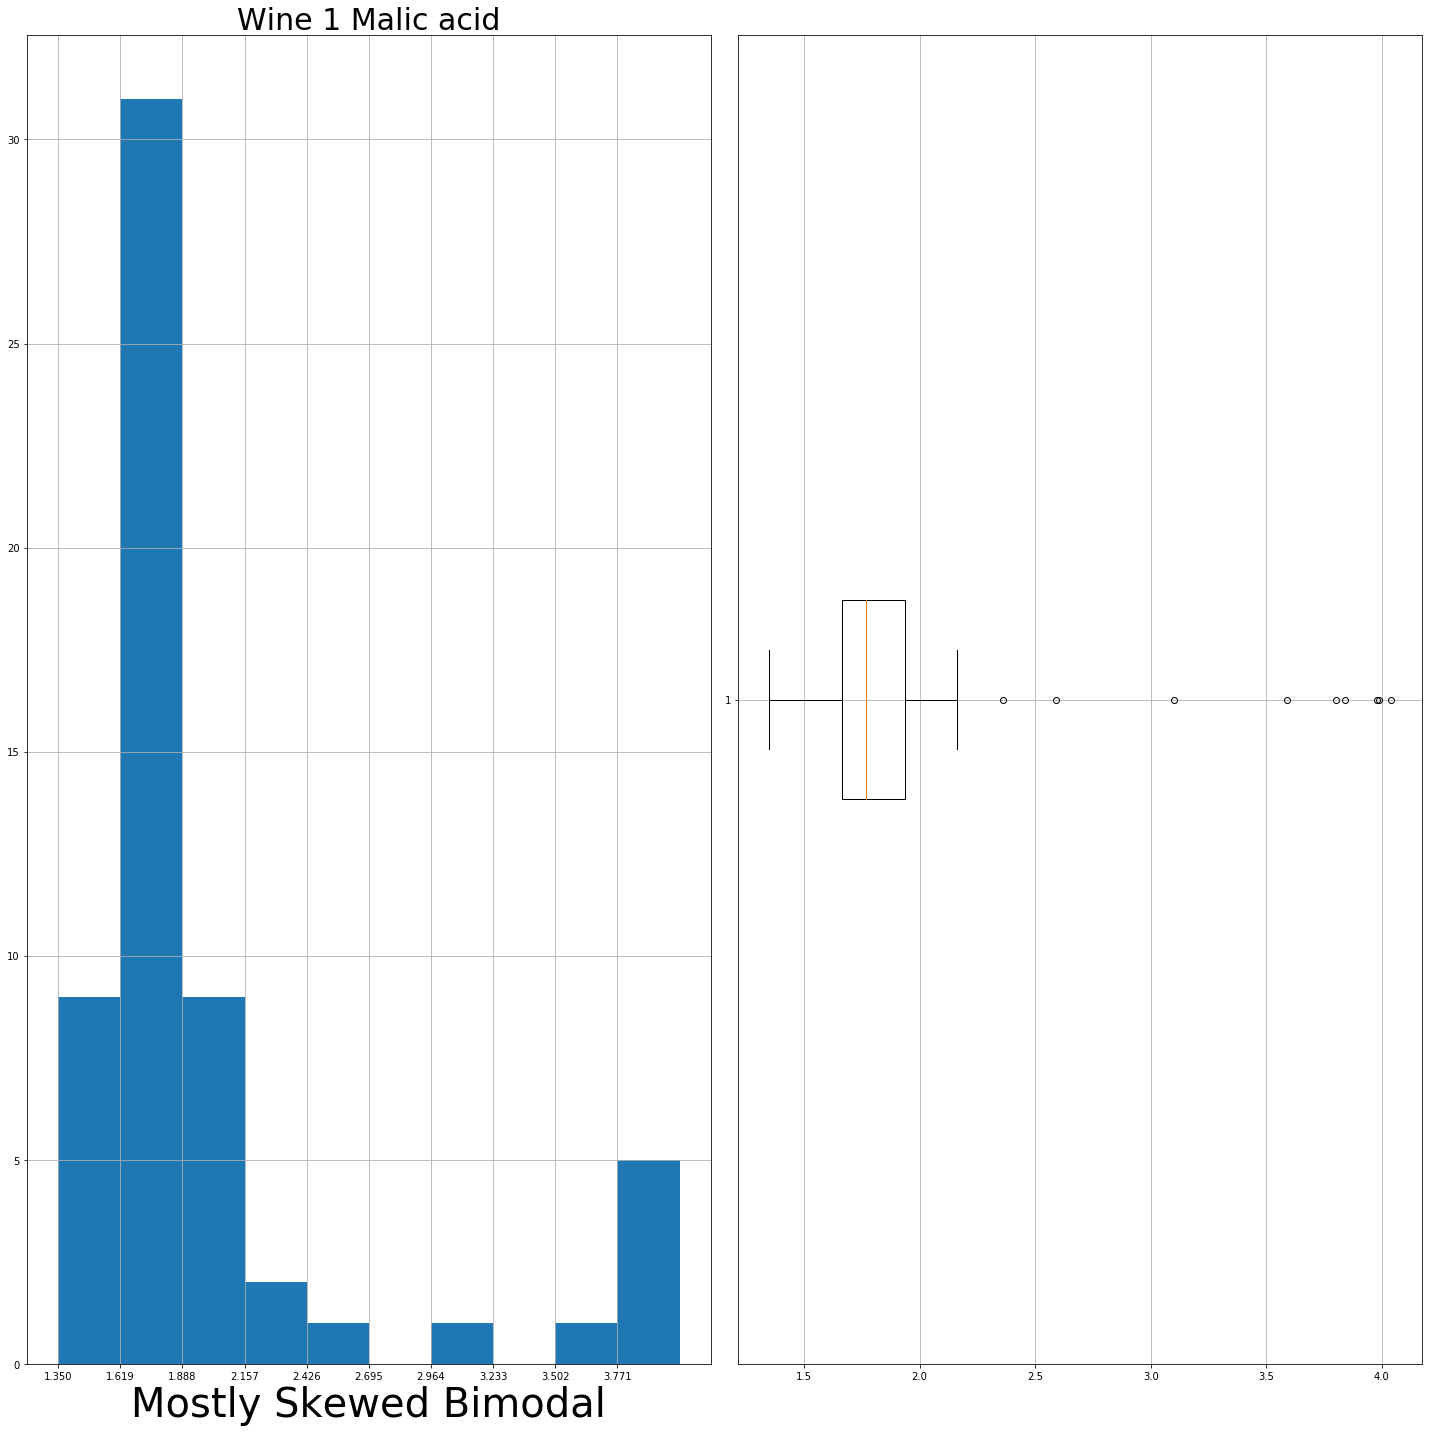

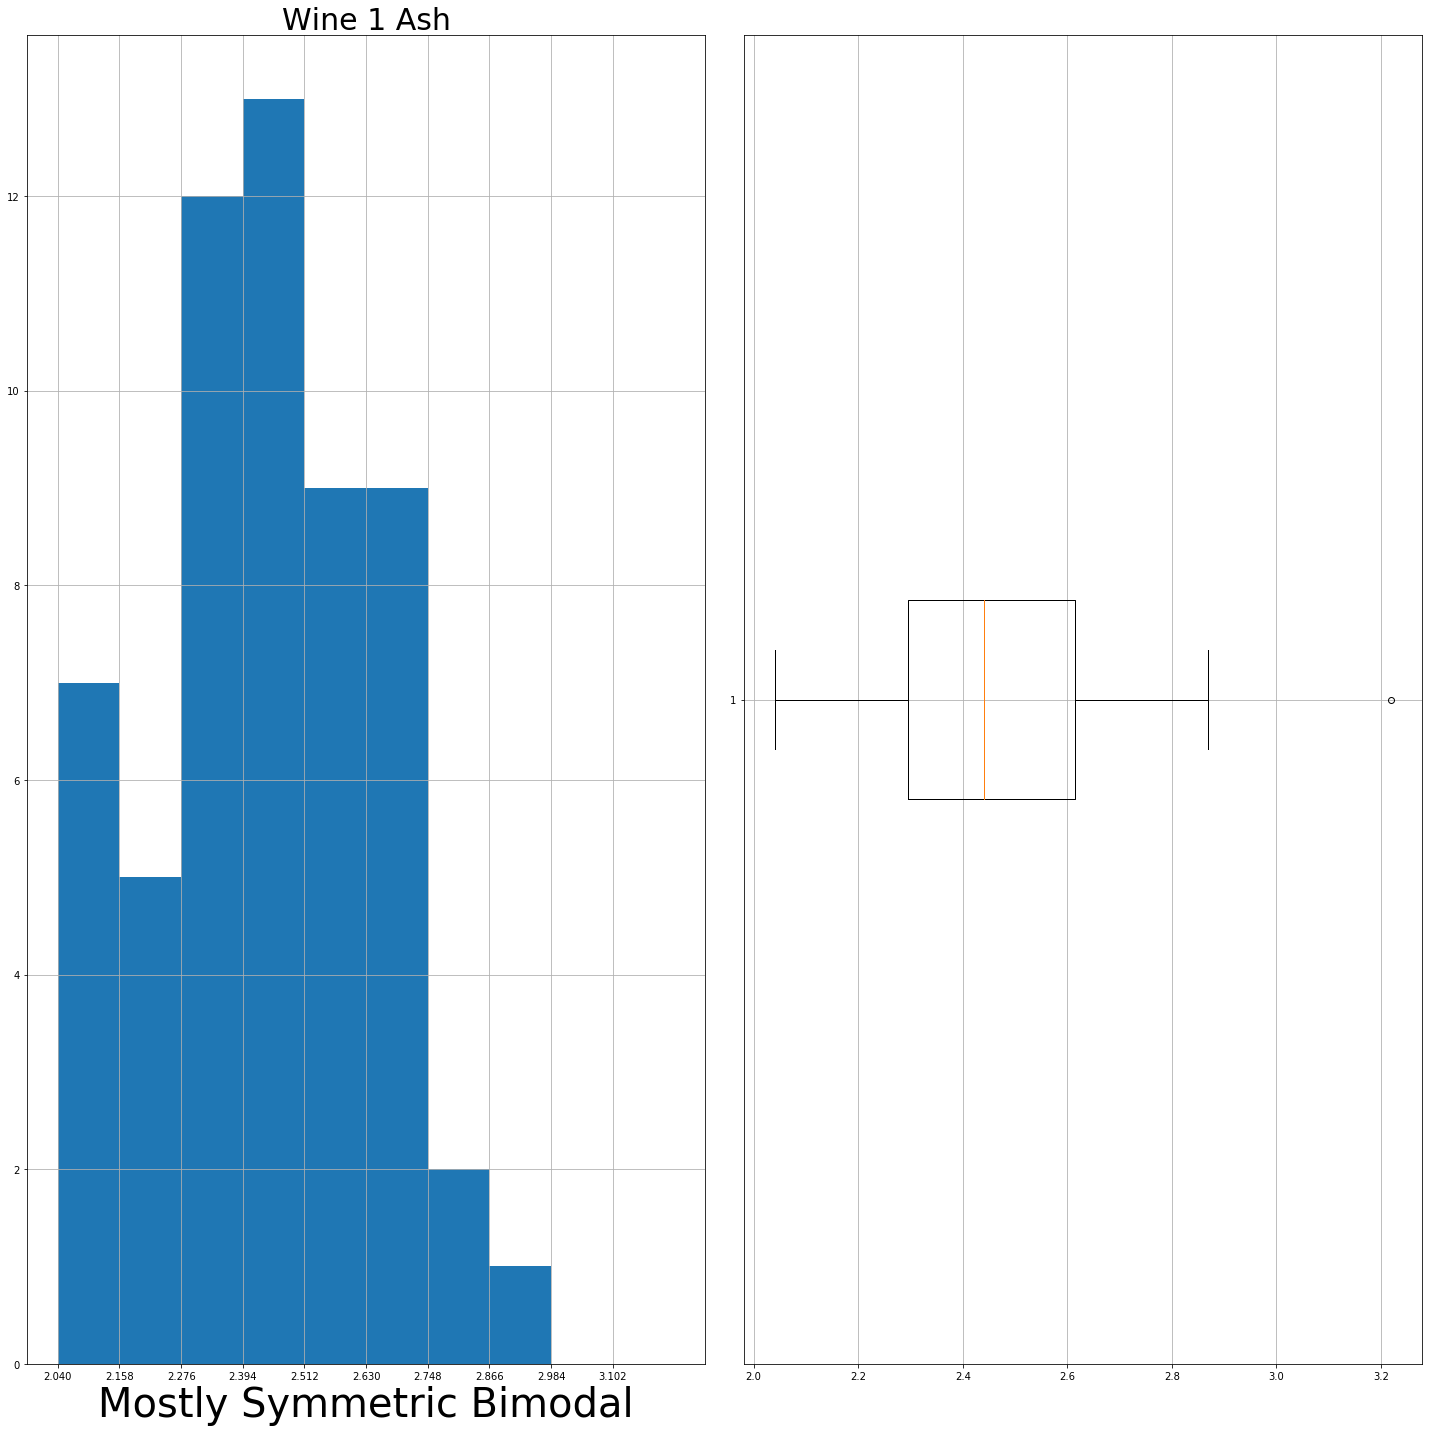

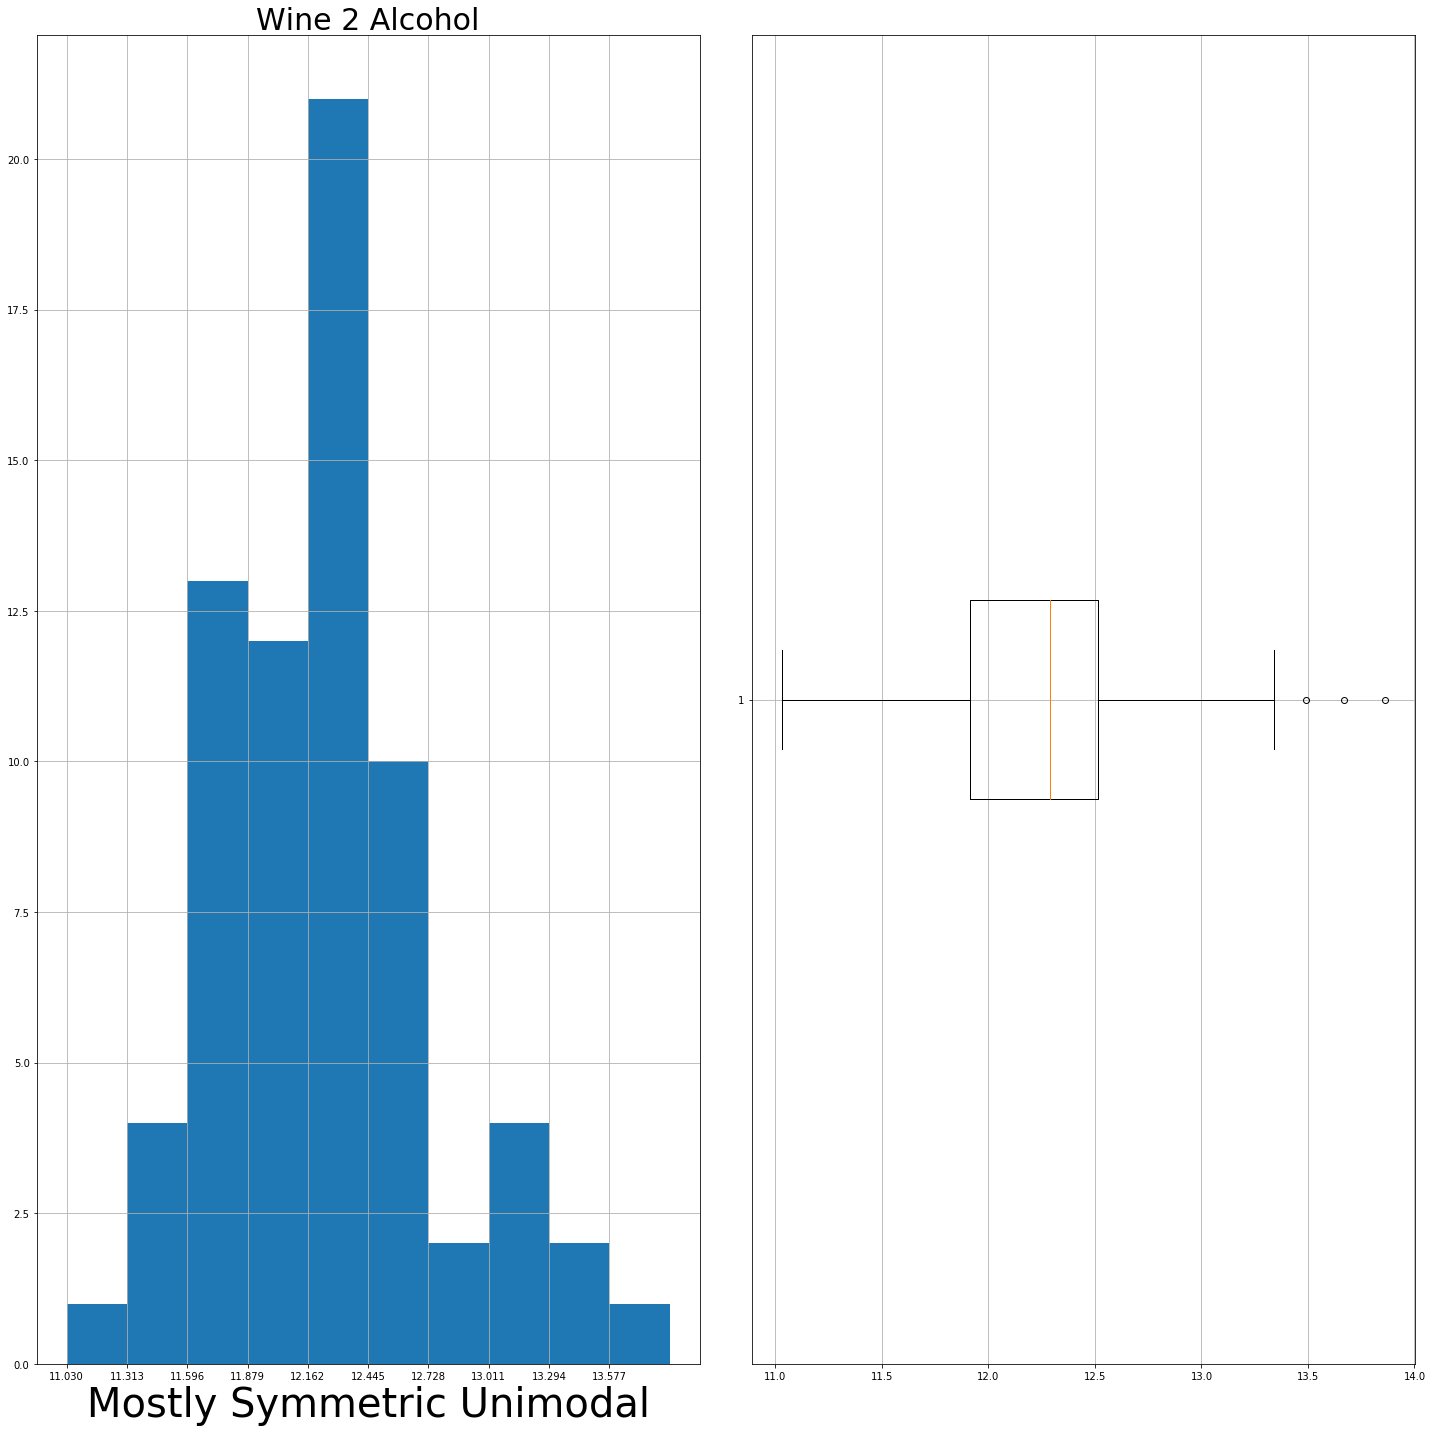

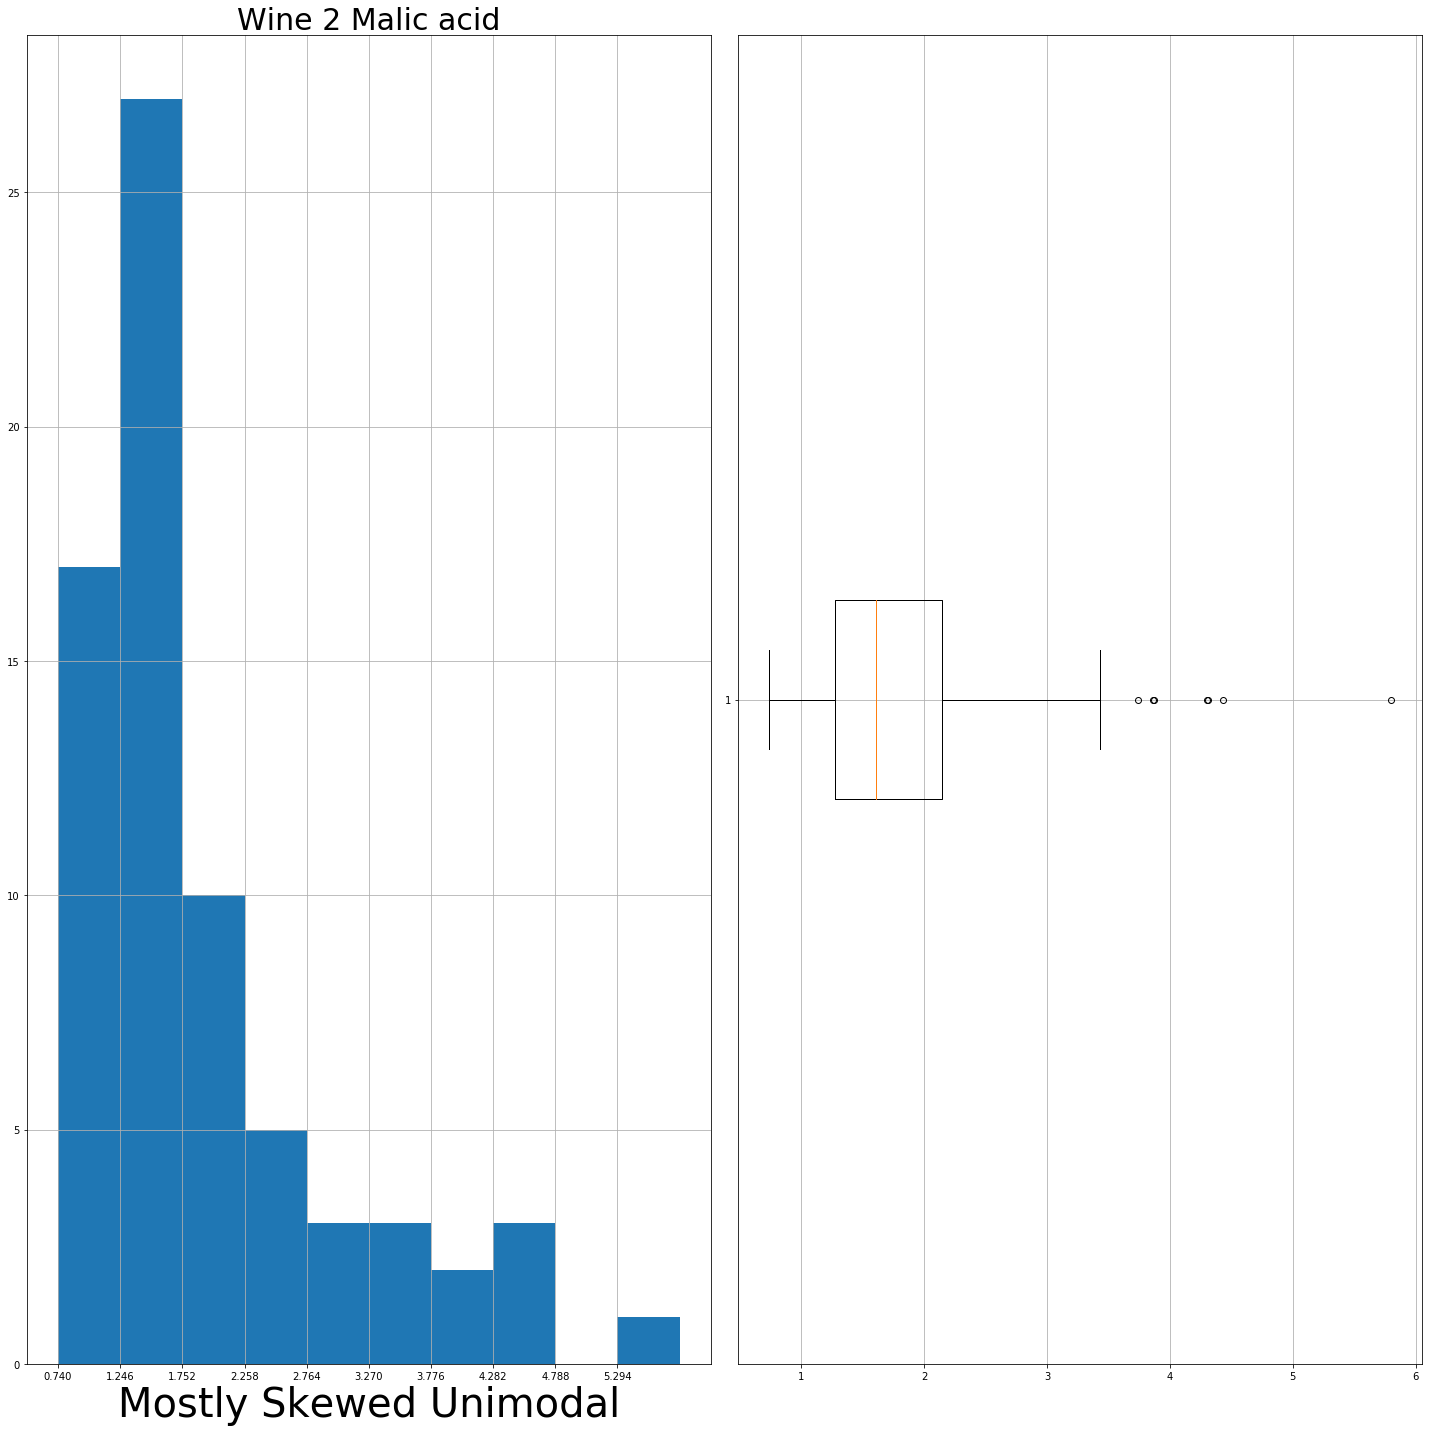

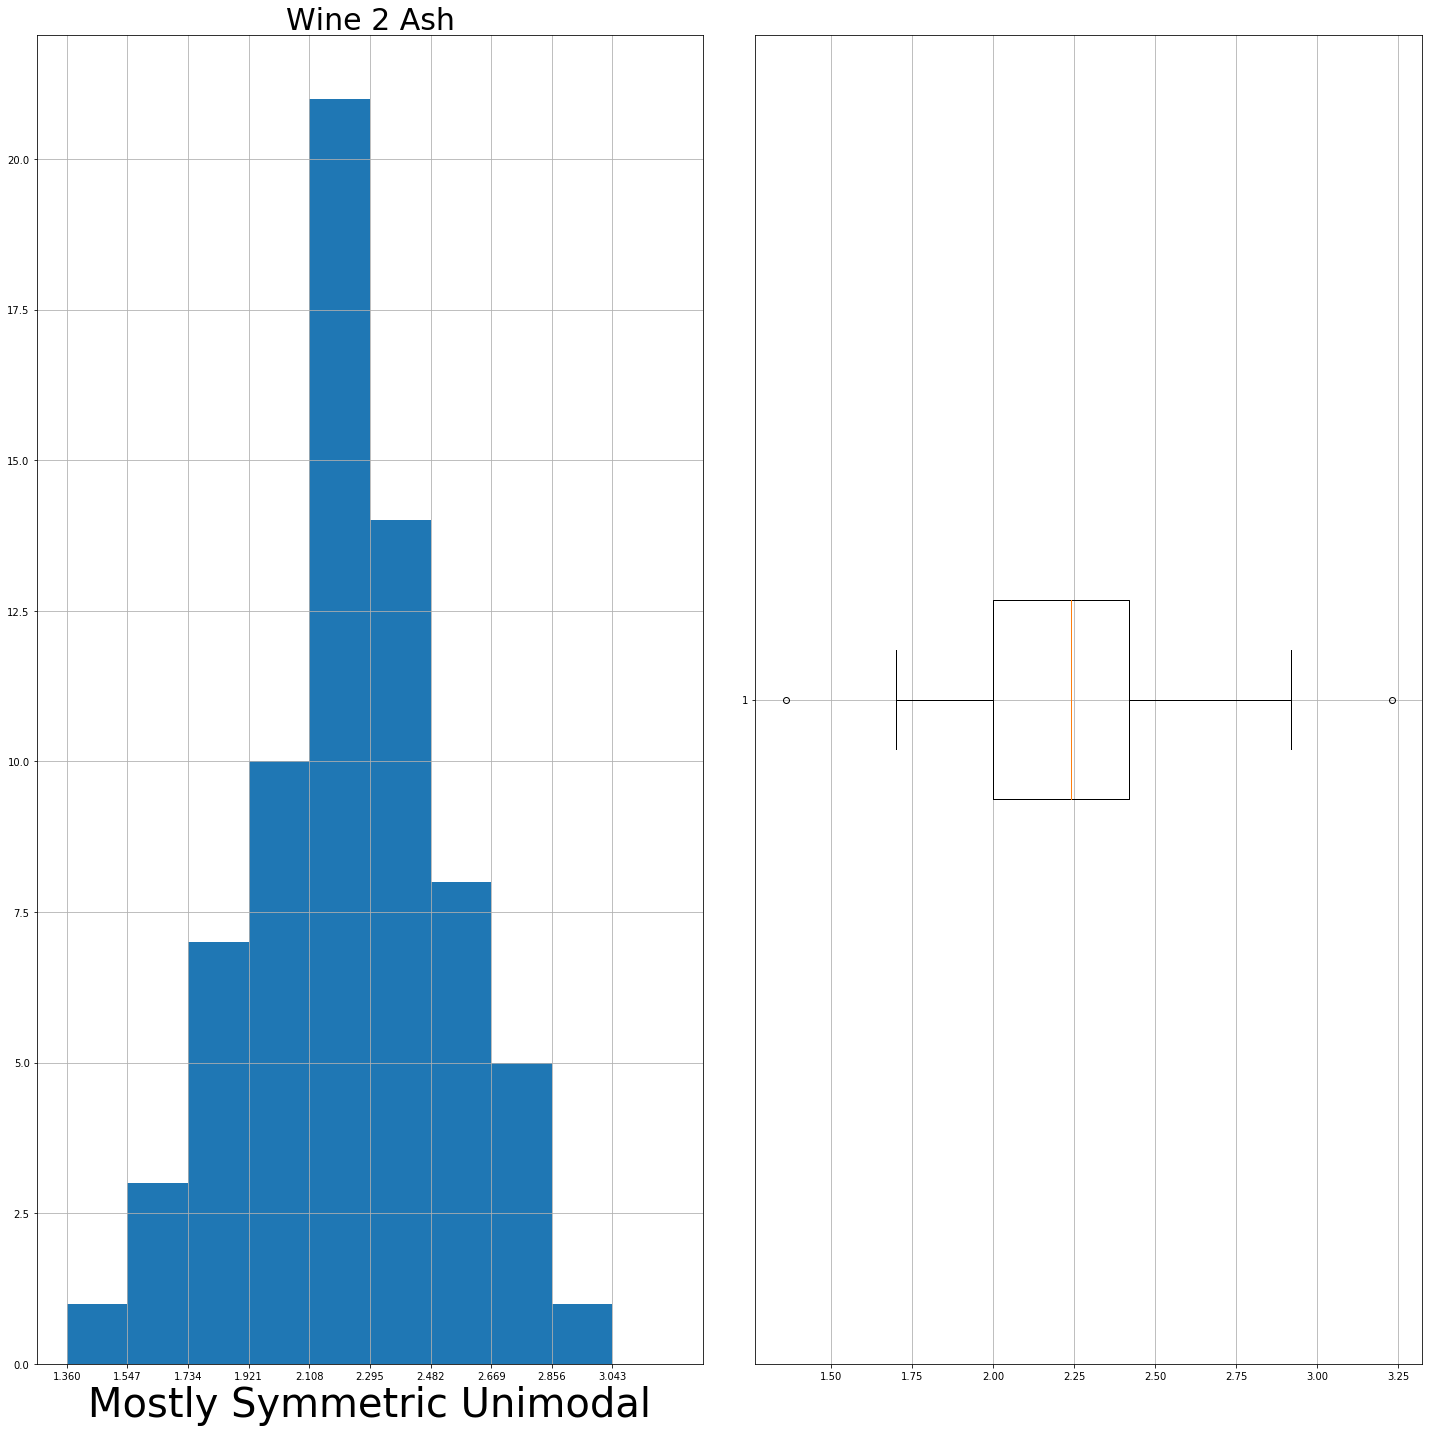

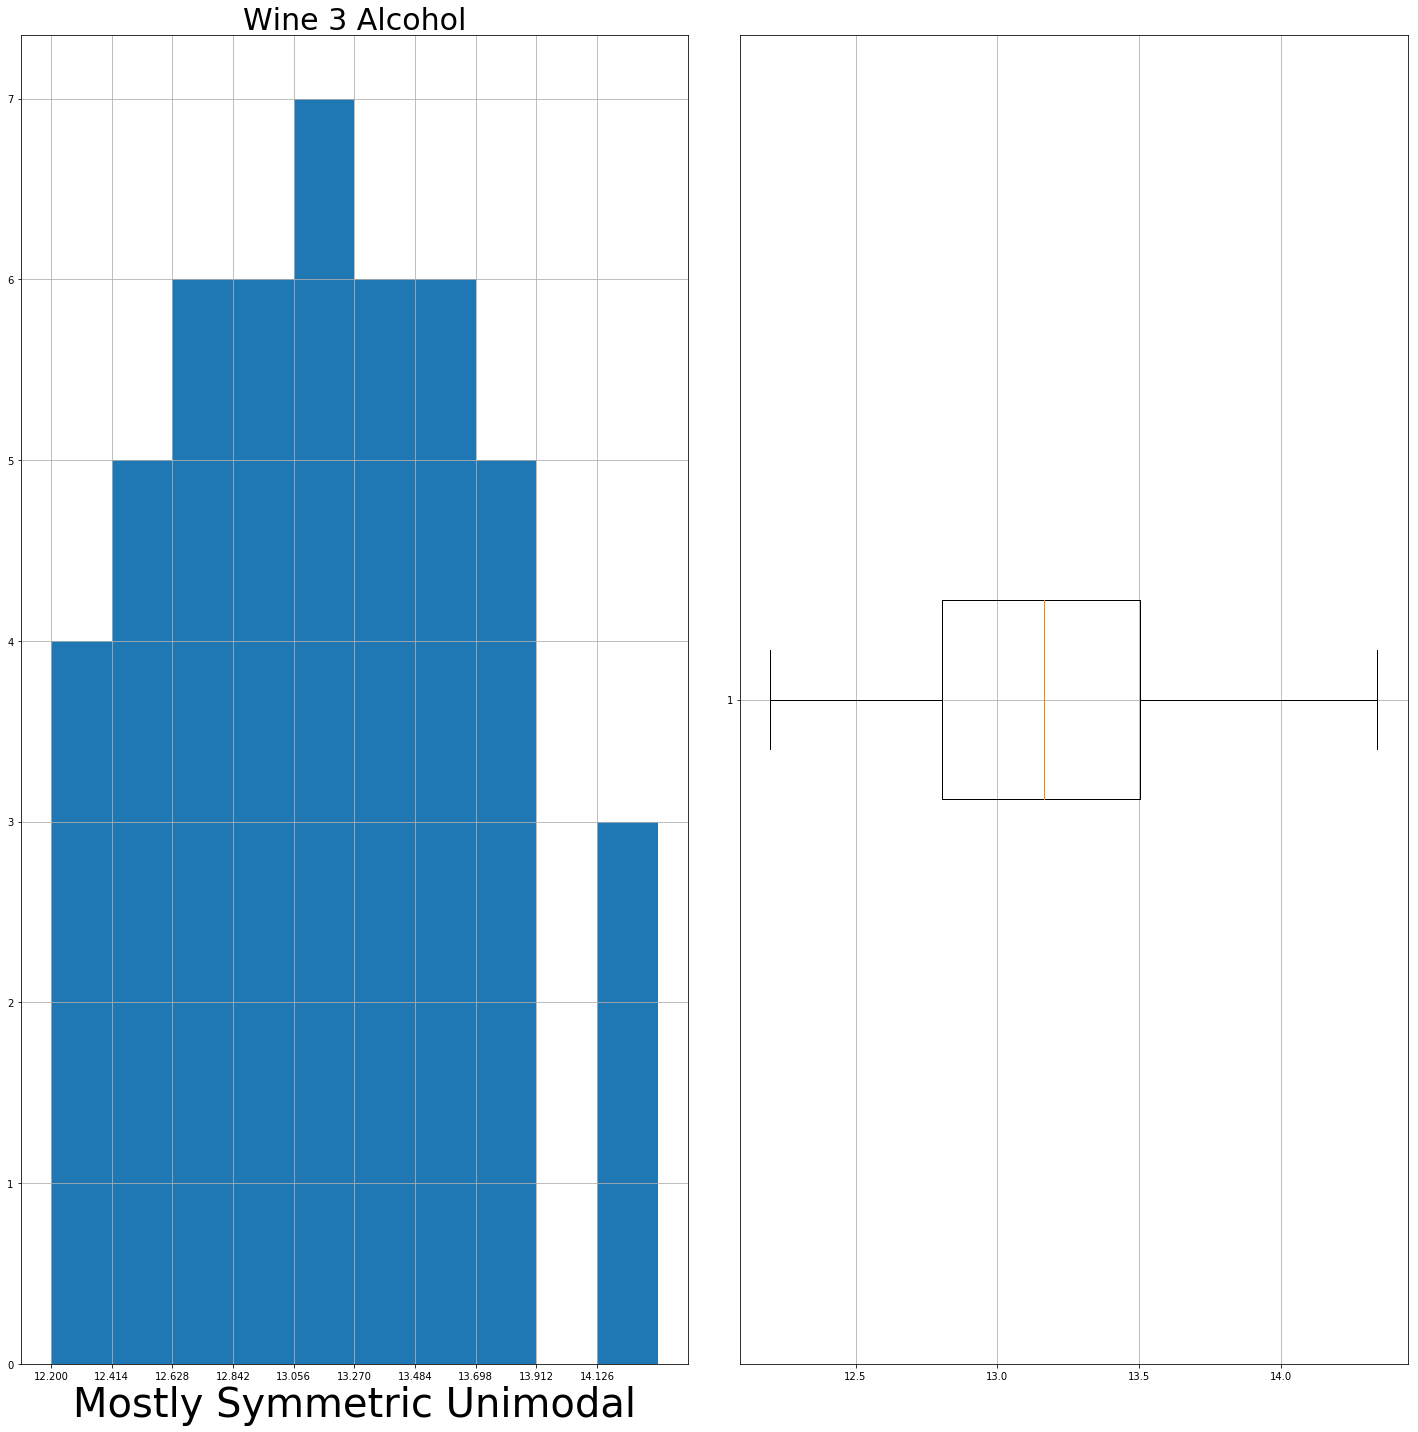

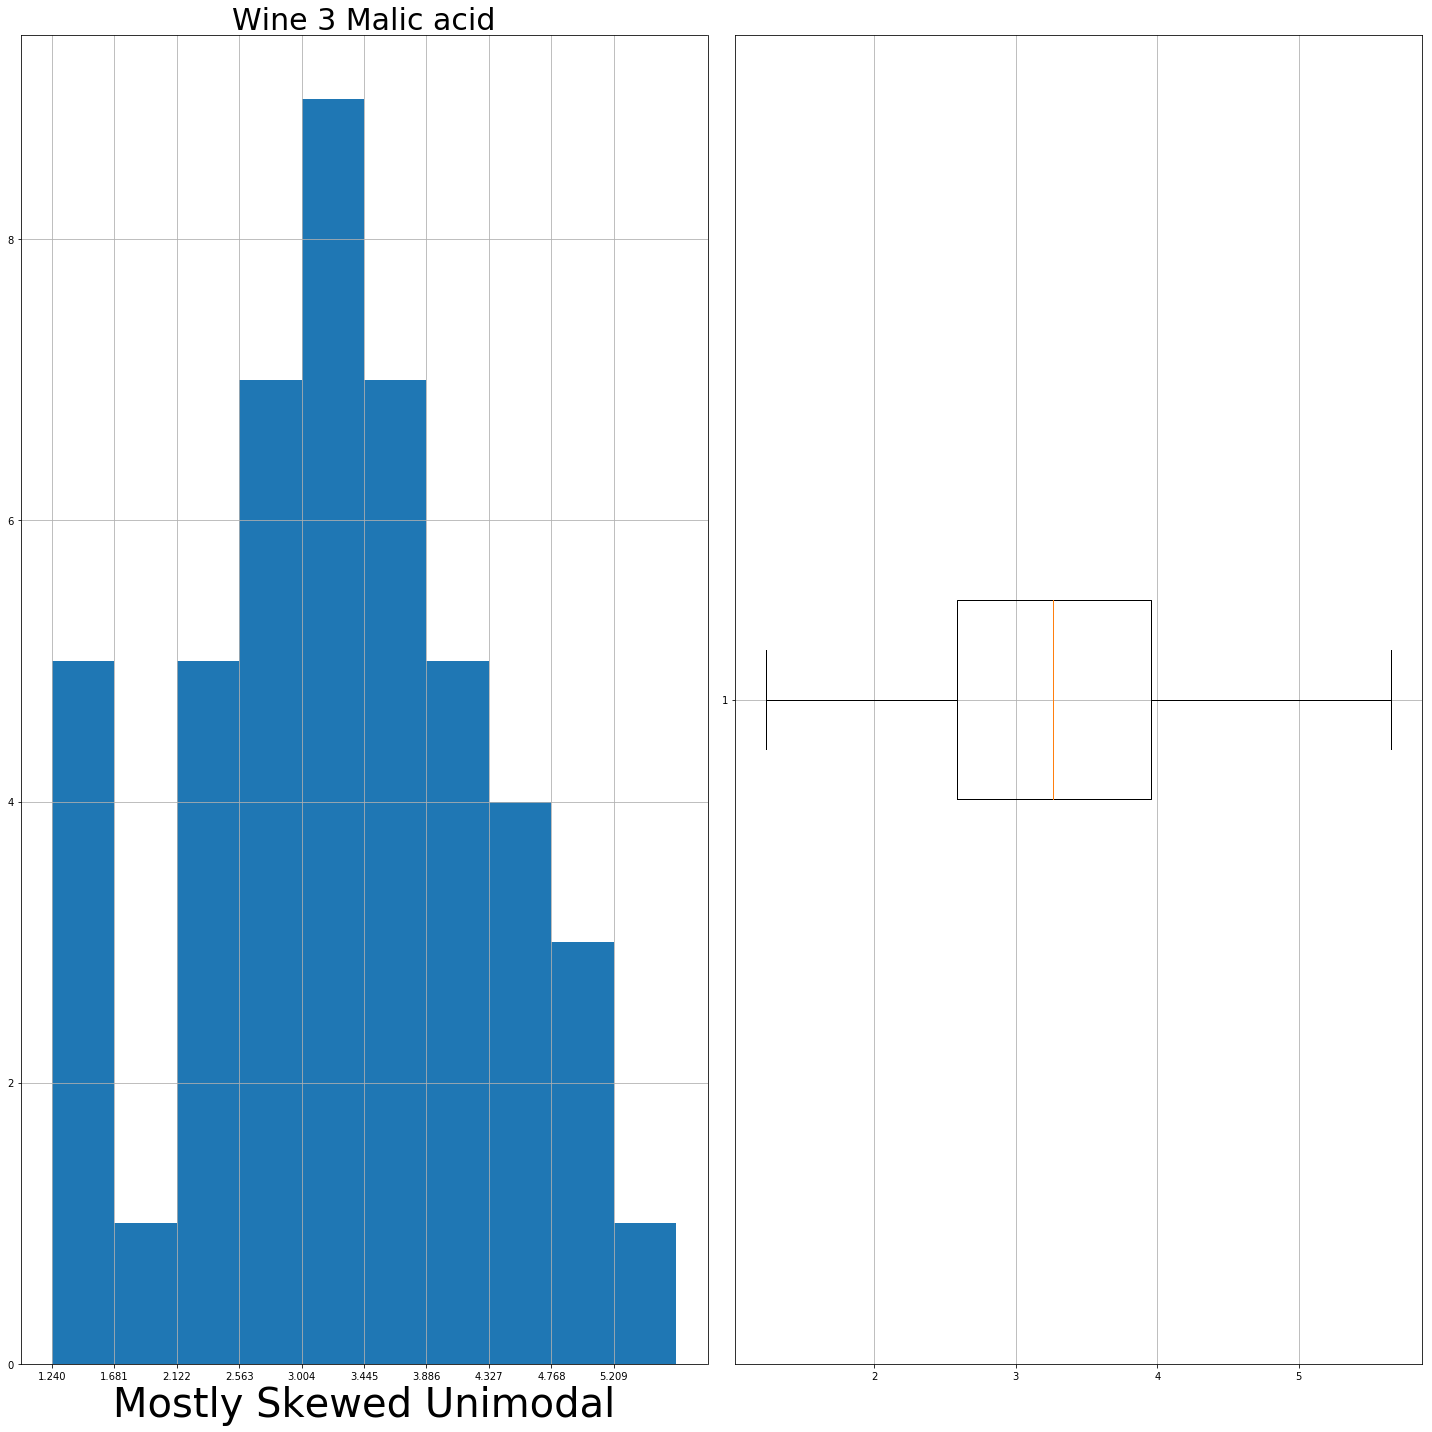

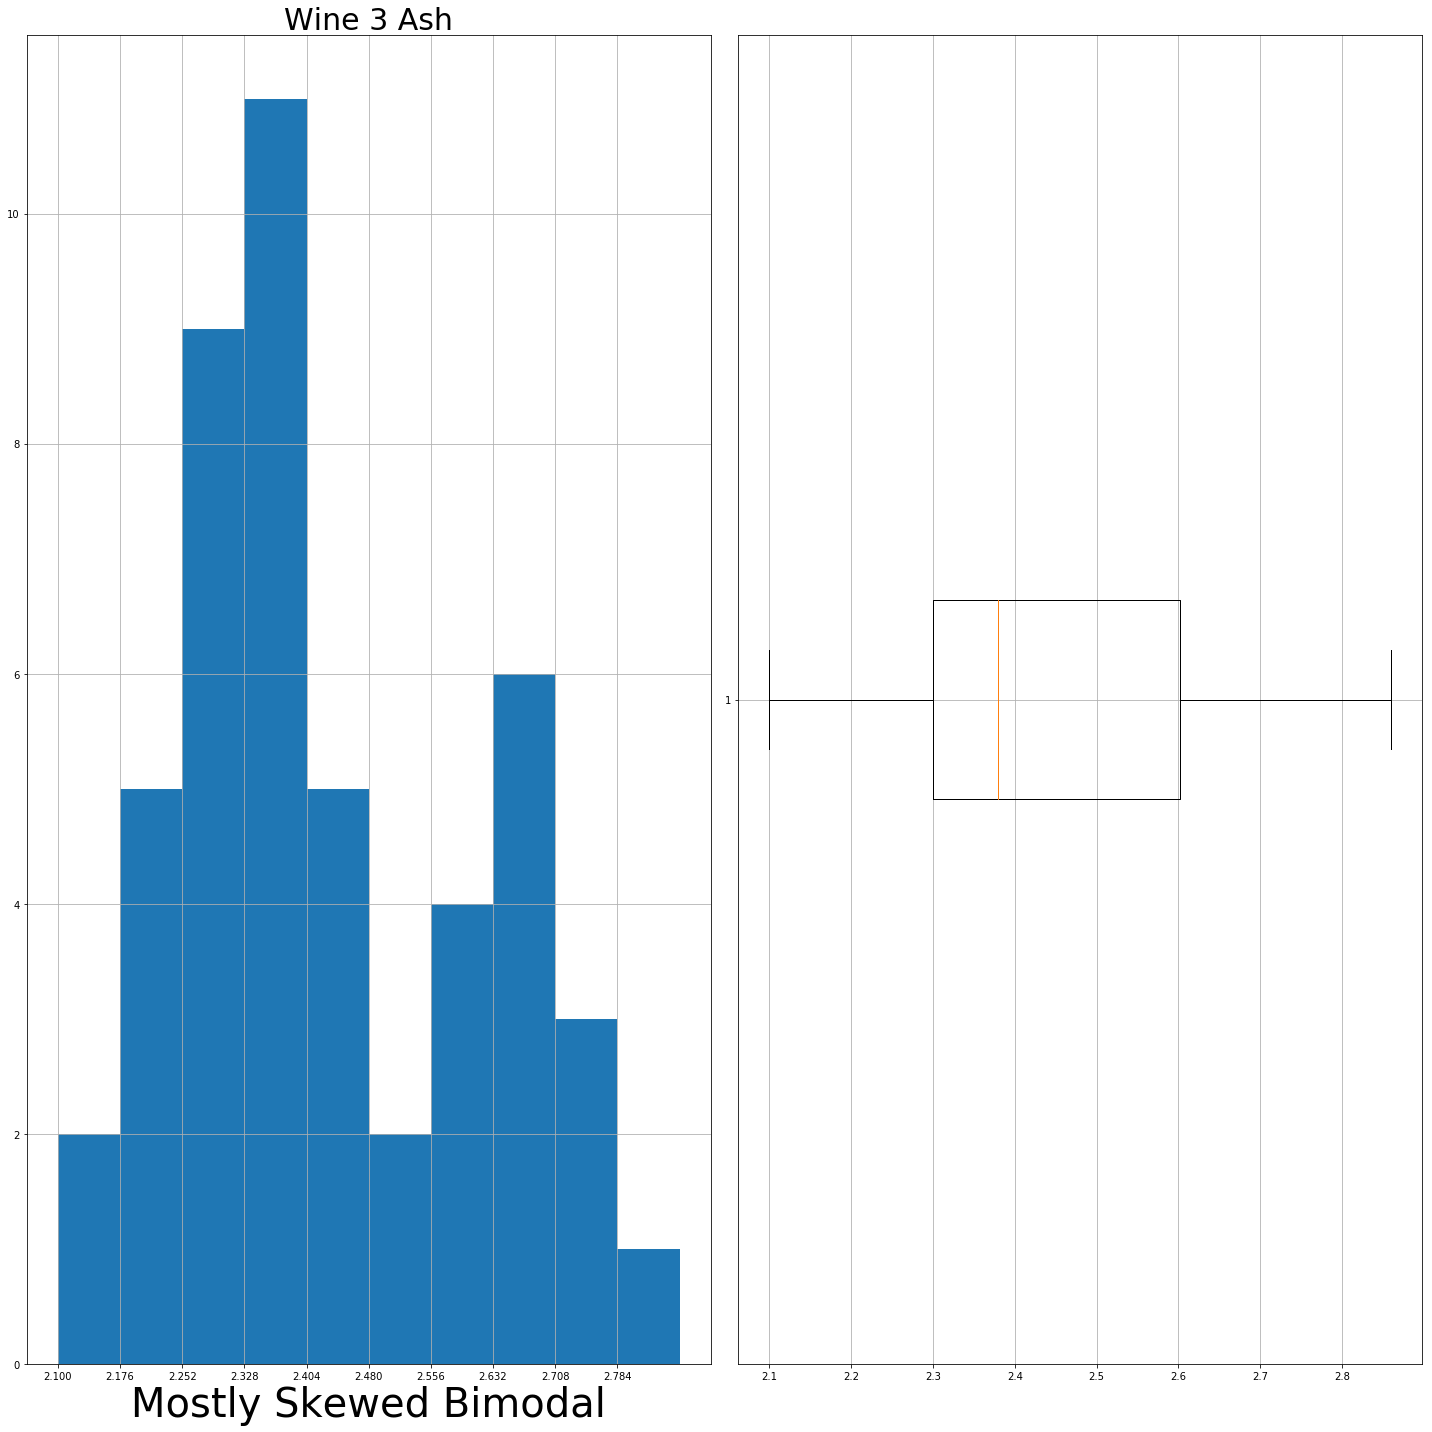

In [187]:
"""
Function calls for Wine Data, bin size = 10

"""

# Wine 1 histograms
histogram(wine1['Alcohol'], 10, "Wine 1 Alcohol", text = "Bimodal")
histogram(wine1['Malic_acid'], 10,"Wine 1 Malic acid", text = "Bimodal")
histogram(wine1['Ash'], 10,"Wine 1 Ash", text = "Bimodal")

# Wine 2 histograms
histogram(wine2['Alcohol'], 10, "Wine 2 Alcohol", text = "Unimodal")
histogram(wine2['Malic_acid'], 10,"Wine 2 Malic acid", text = "Unimodal")
histogram(wine2['Ash'], 10,"Wine 2 Ash", text = "Unimodal")

# Wine 3 histograms
histogram(wine3['Alcohol'], 10, "Wine 3 Alcohol", text = "Unimodal")
histogram(wine3['Malic_acid'], 10,"Wine 3 Malic acid", text = "Unimodal")
histogram(wine3['Ash'], 10,"Wine 3 Ash", text = "Bimodal")

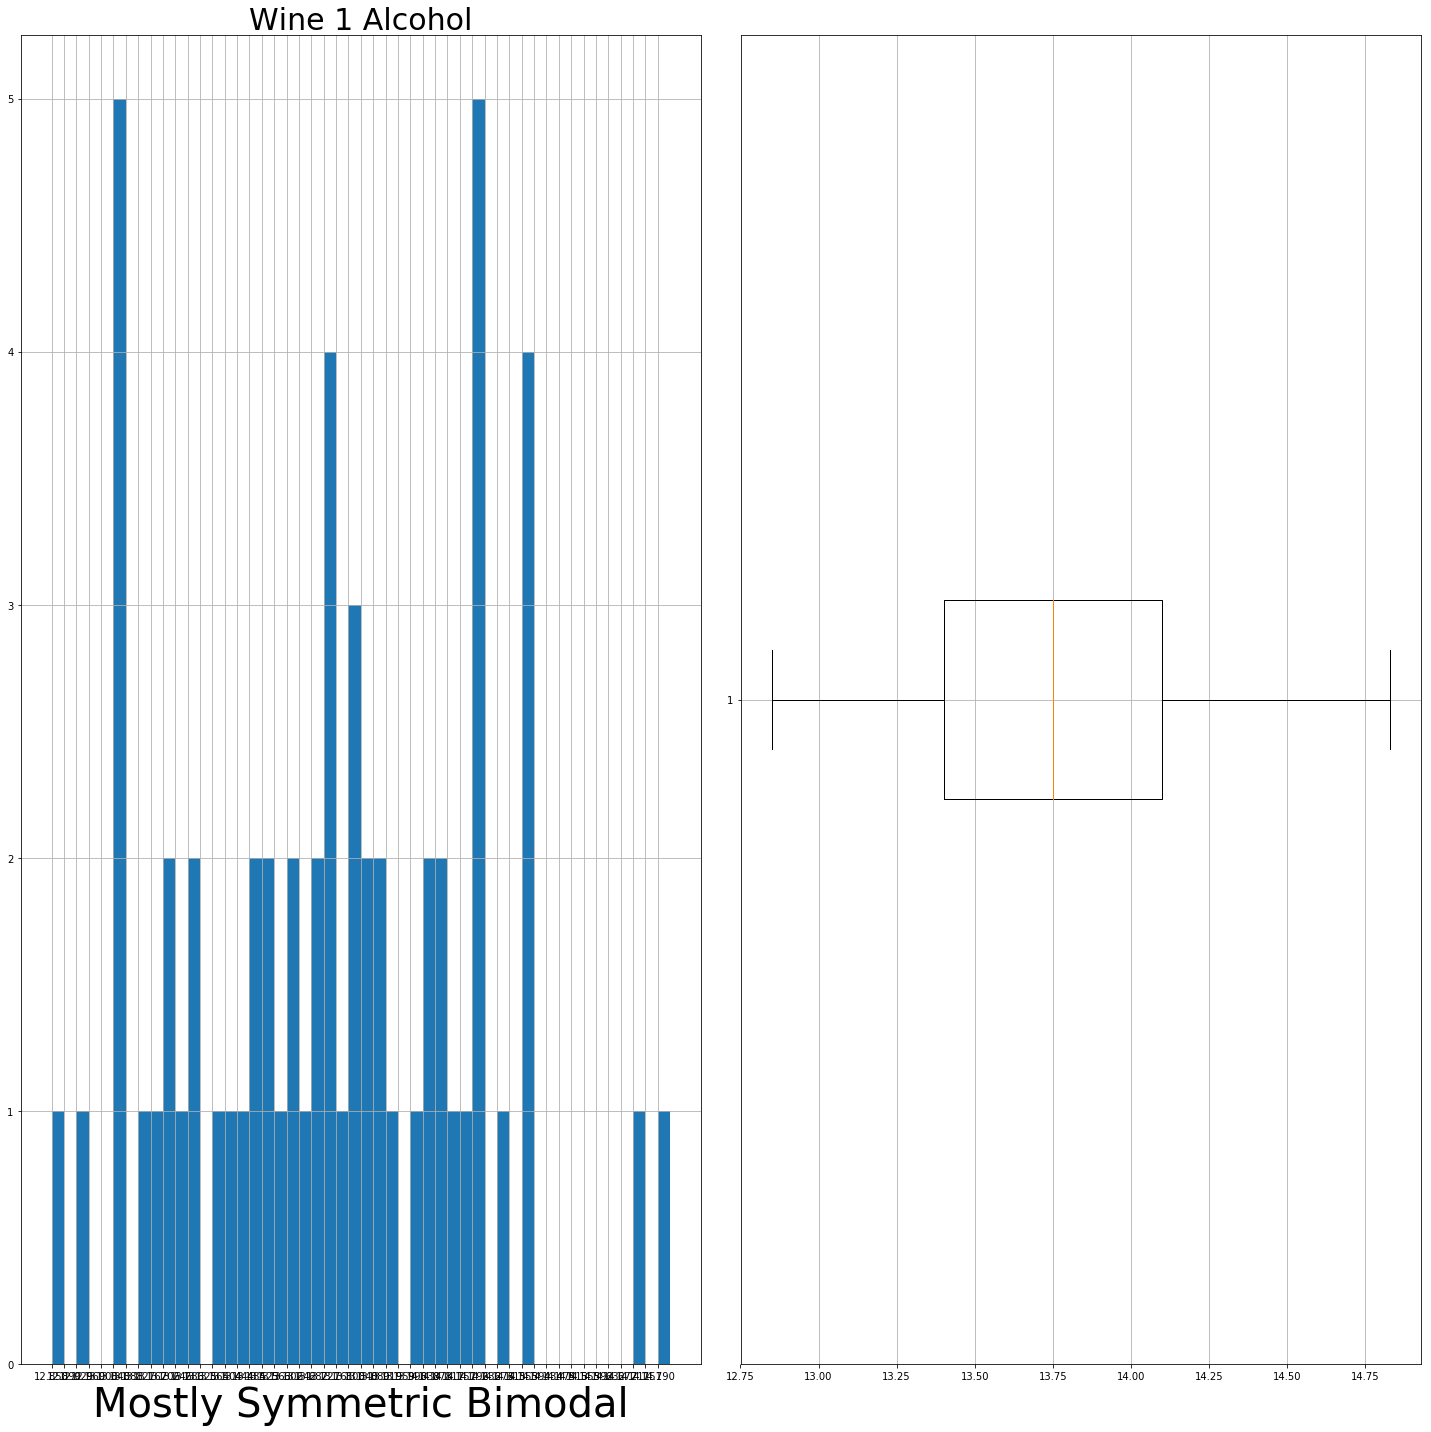

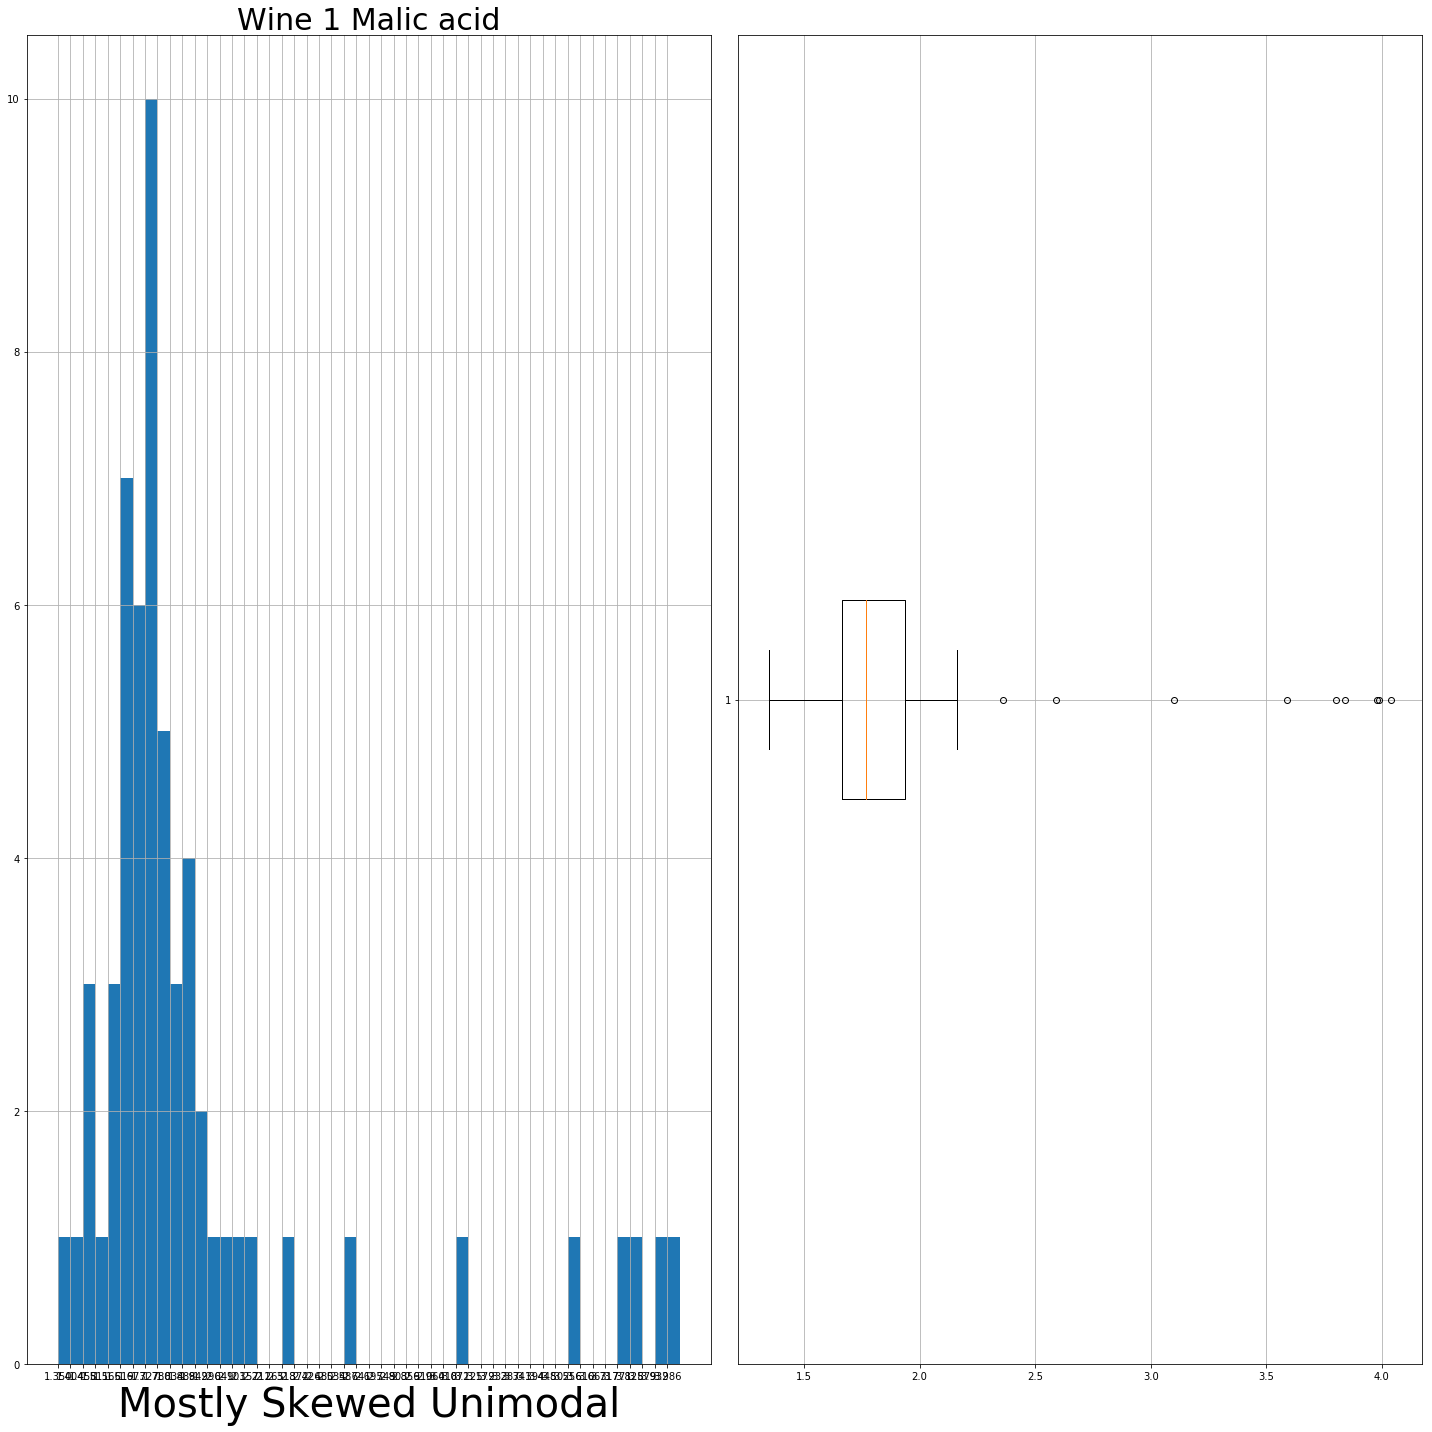

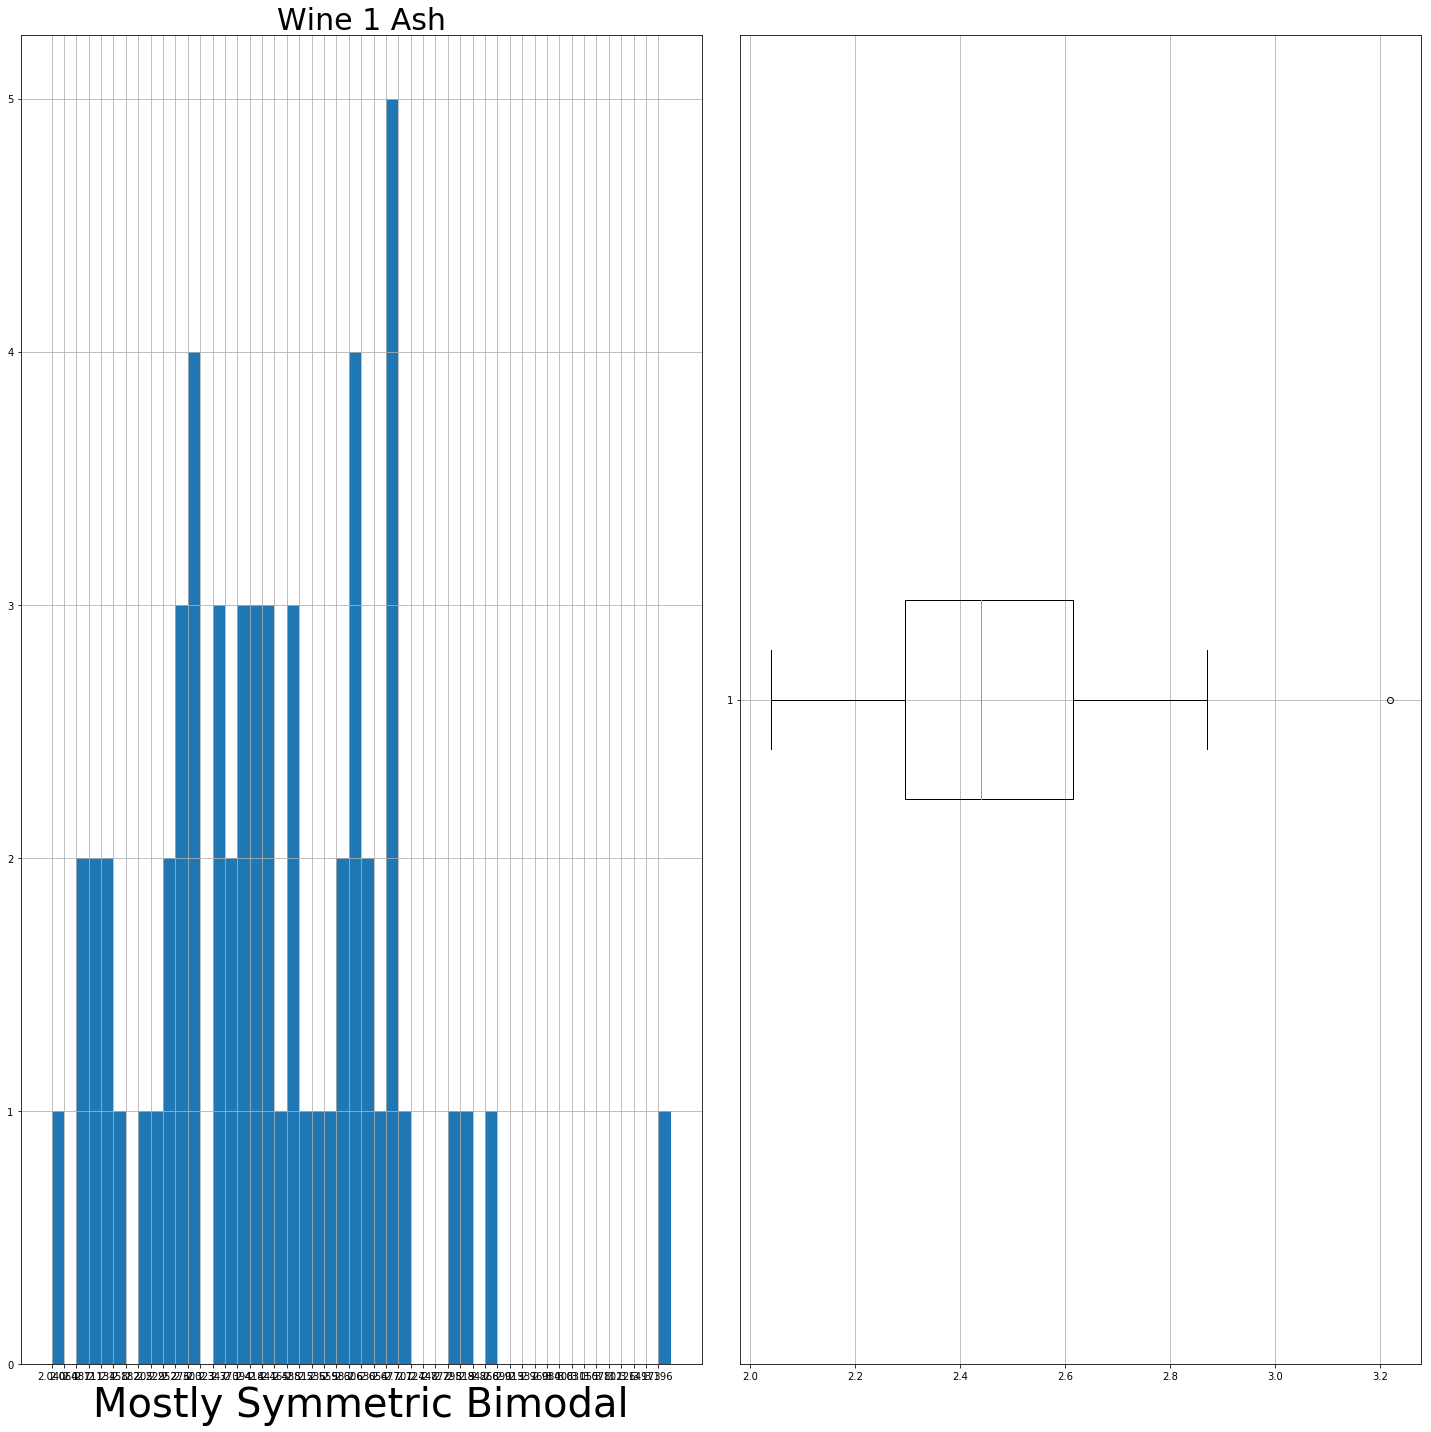

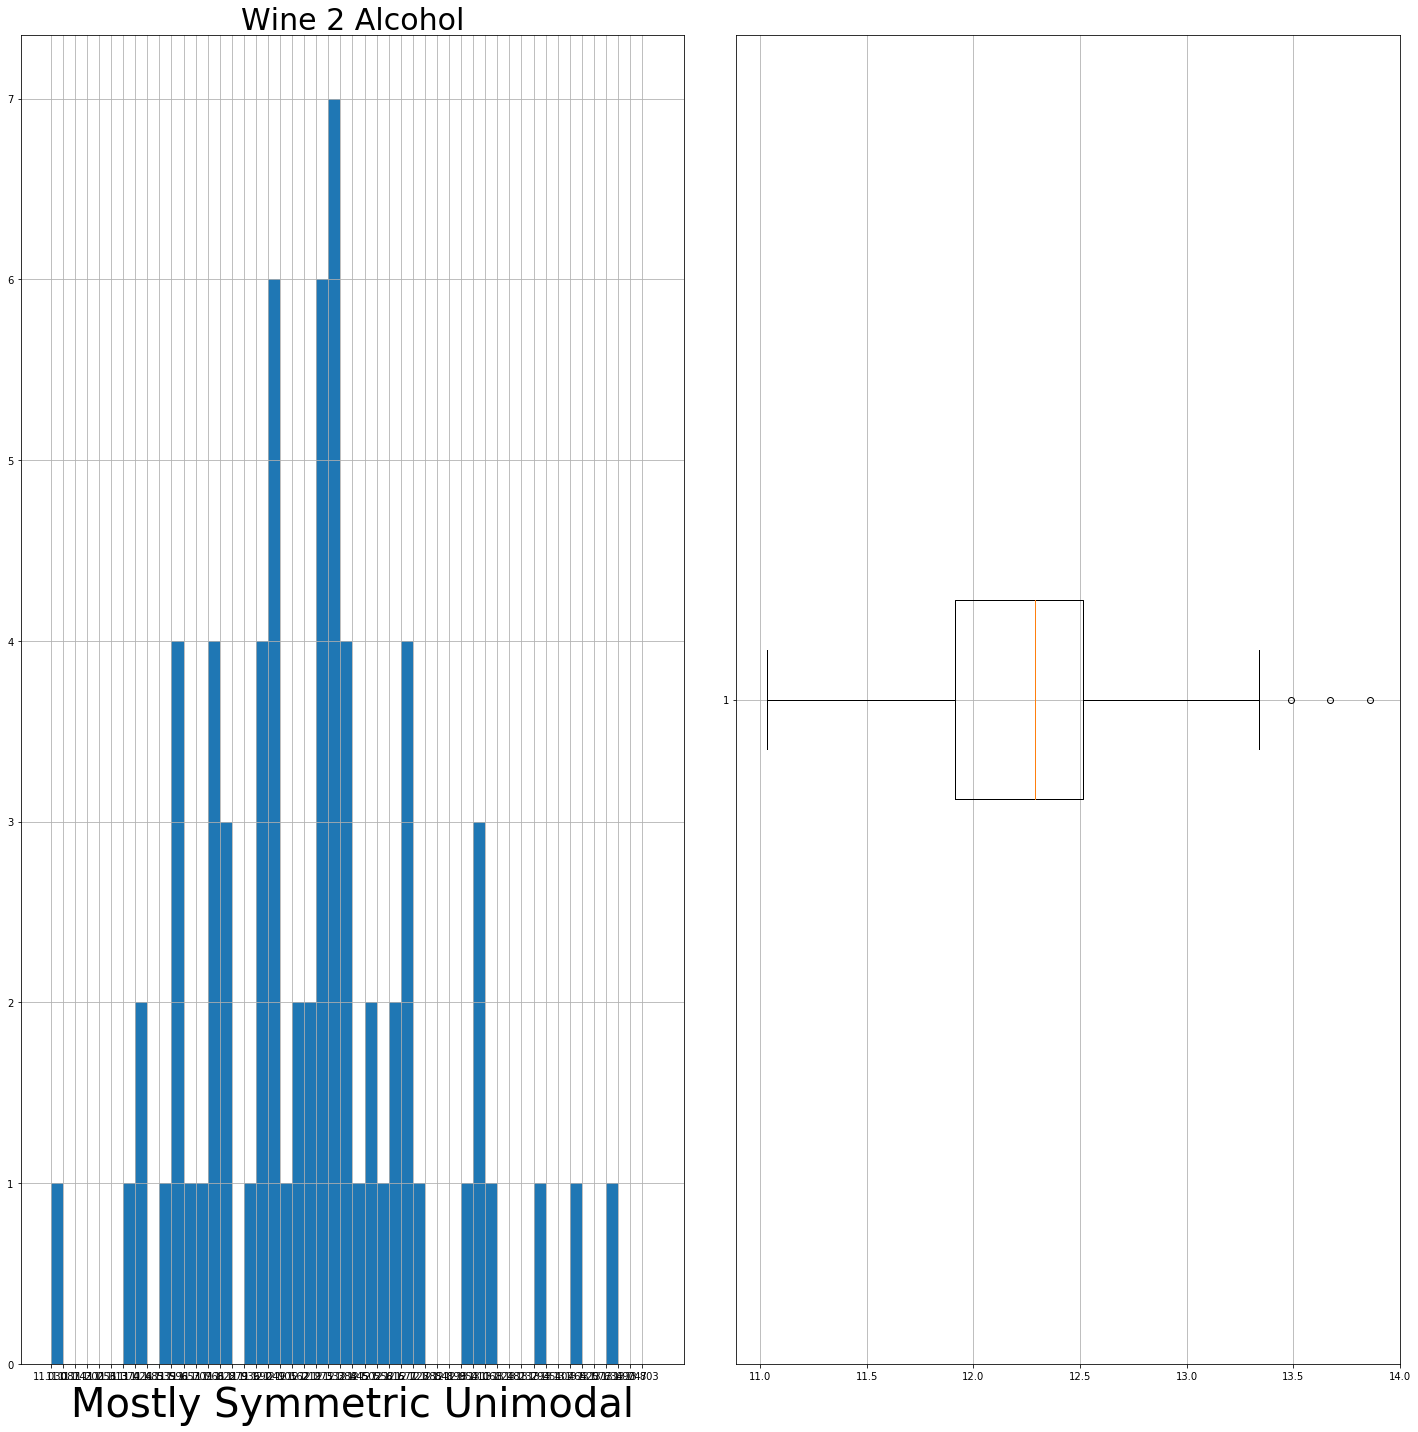

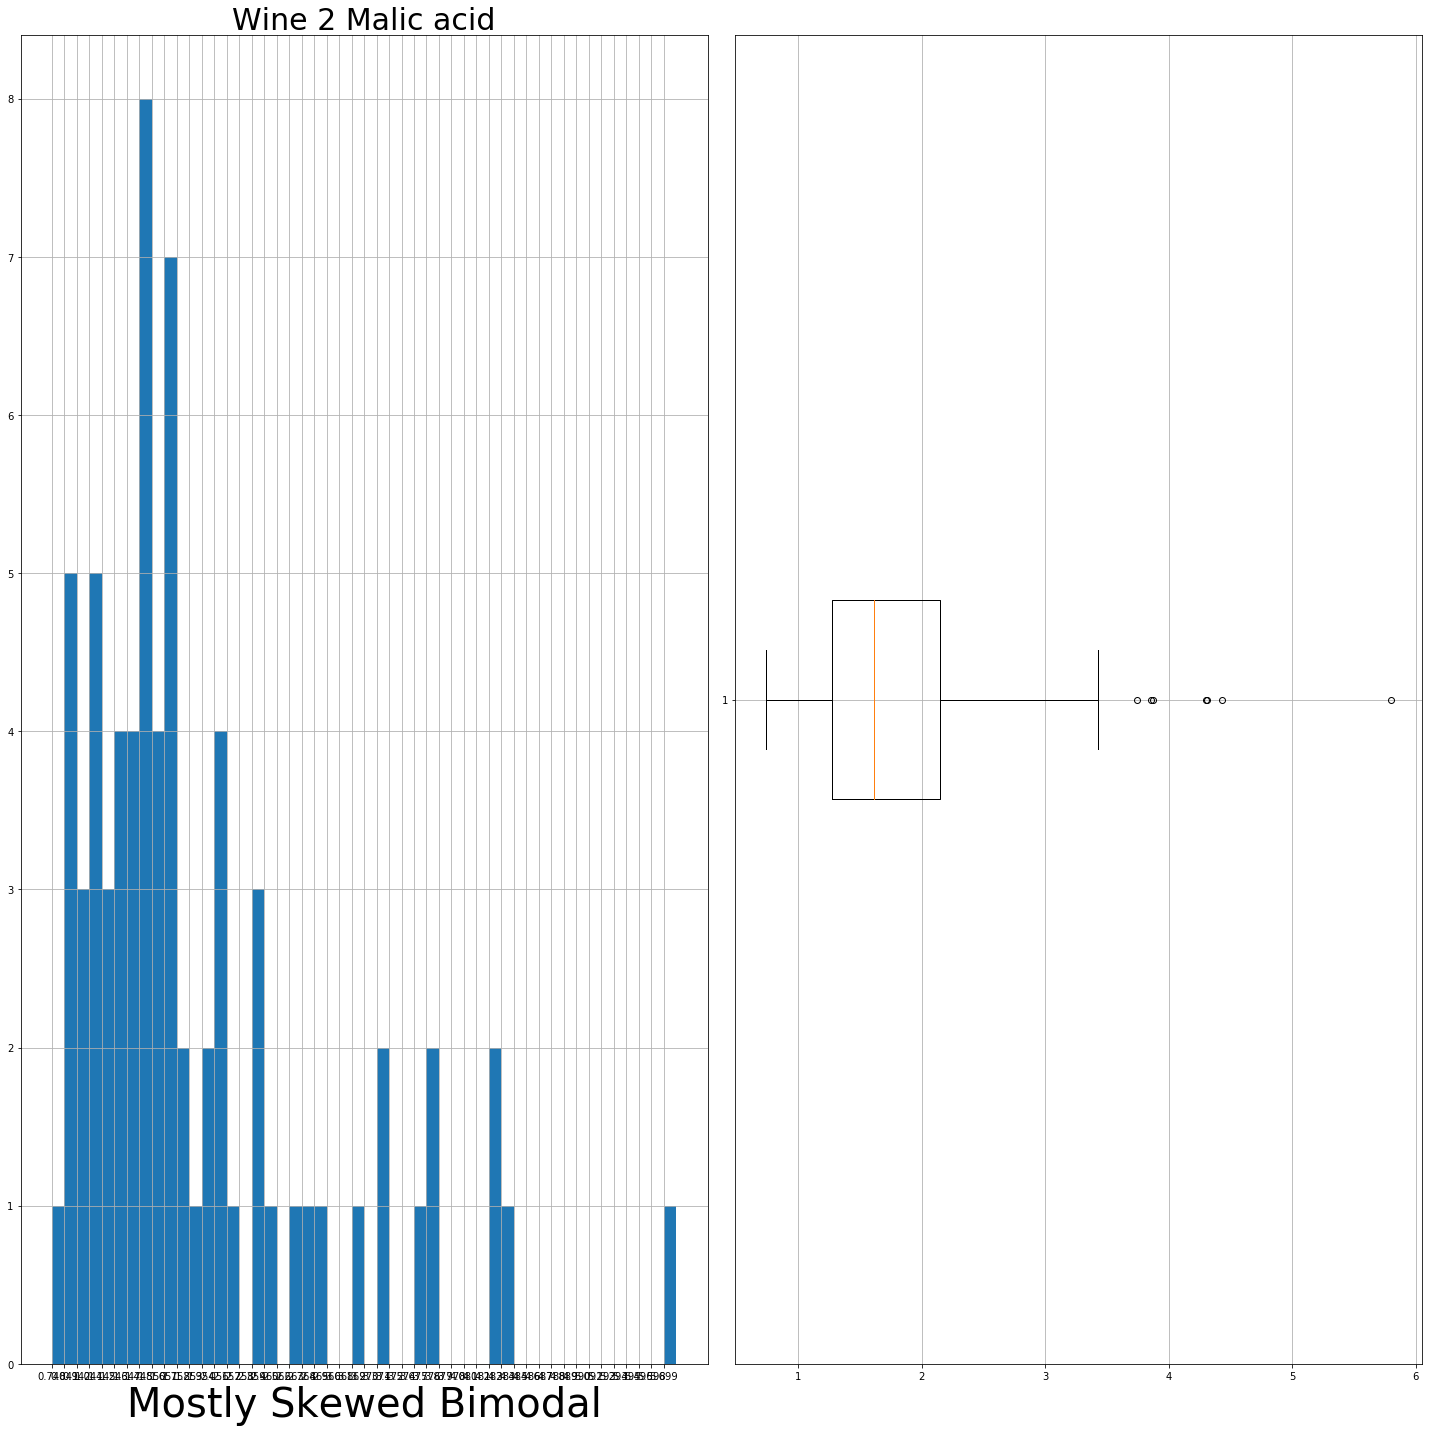

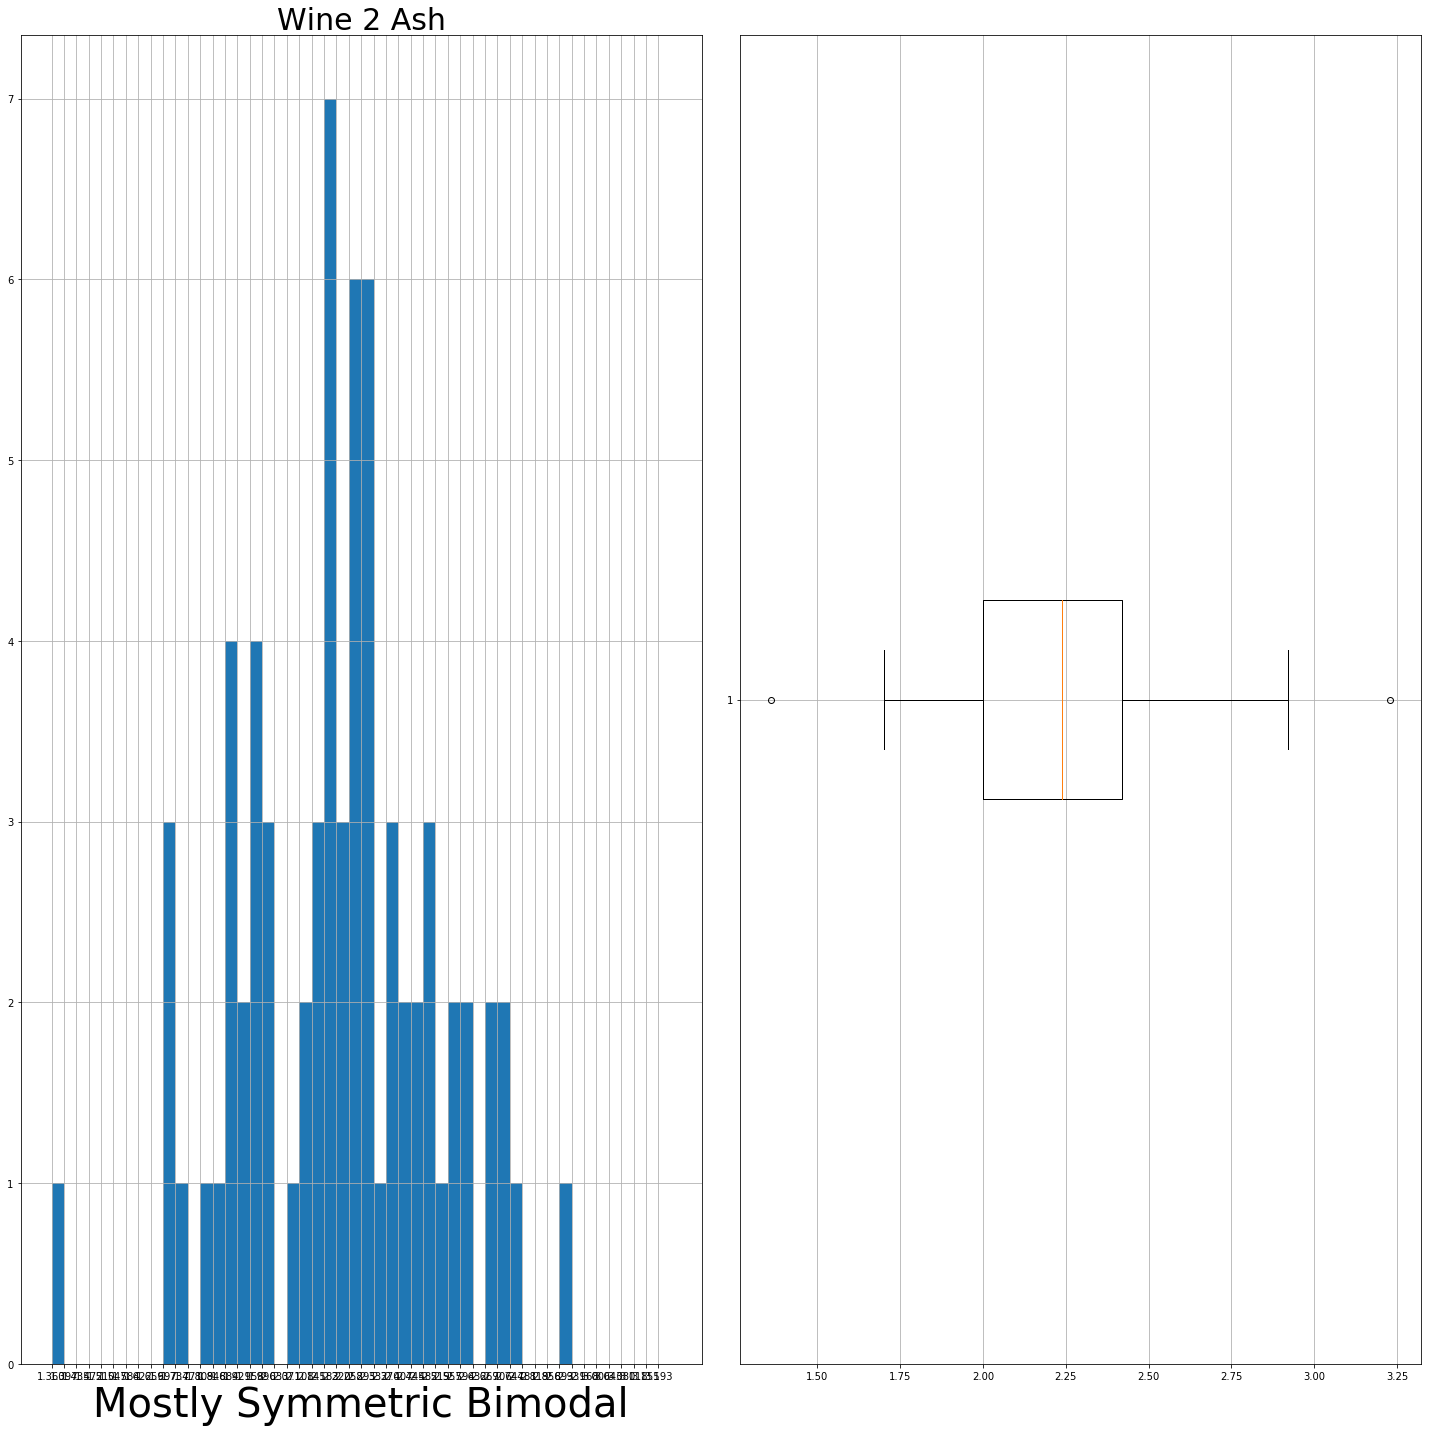

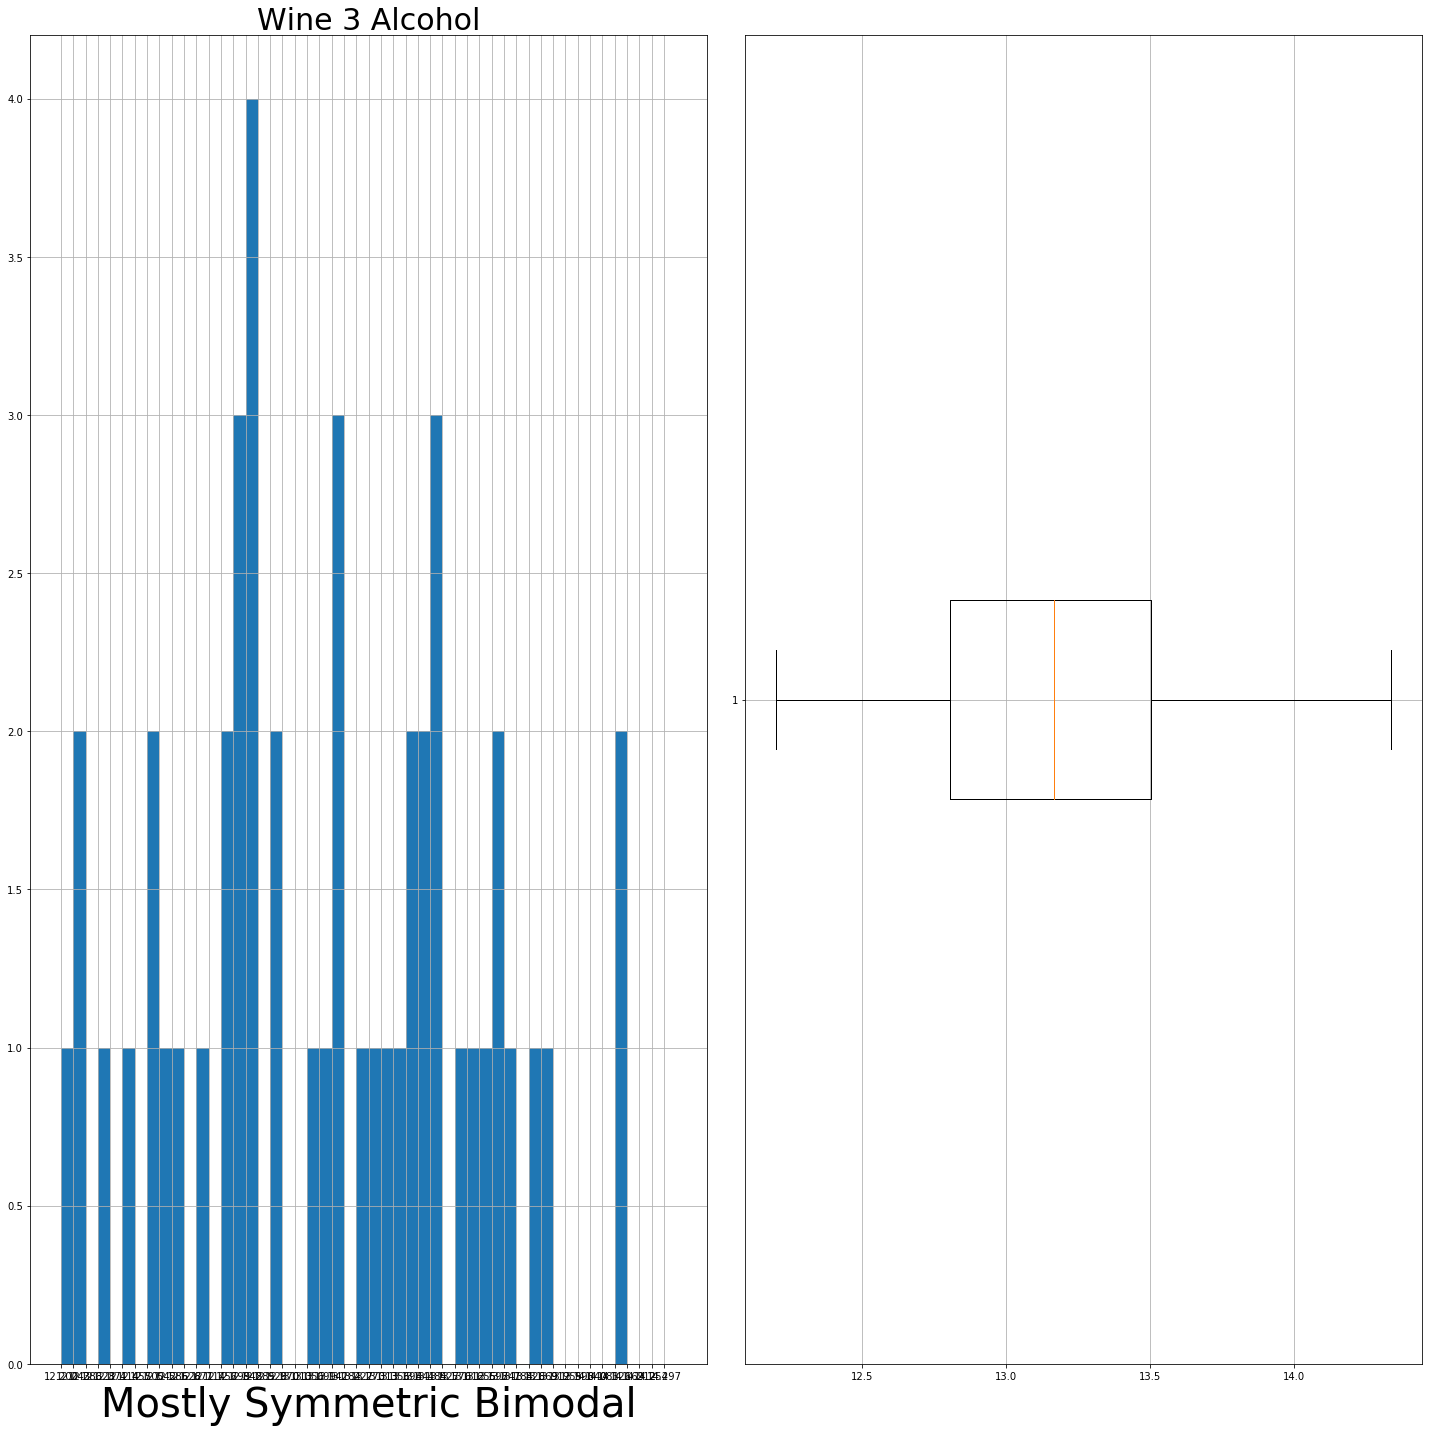

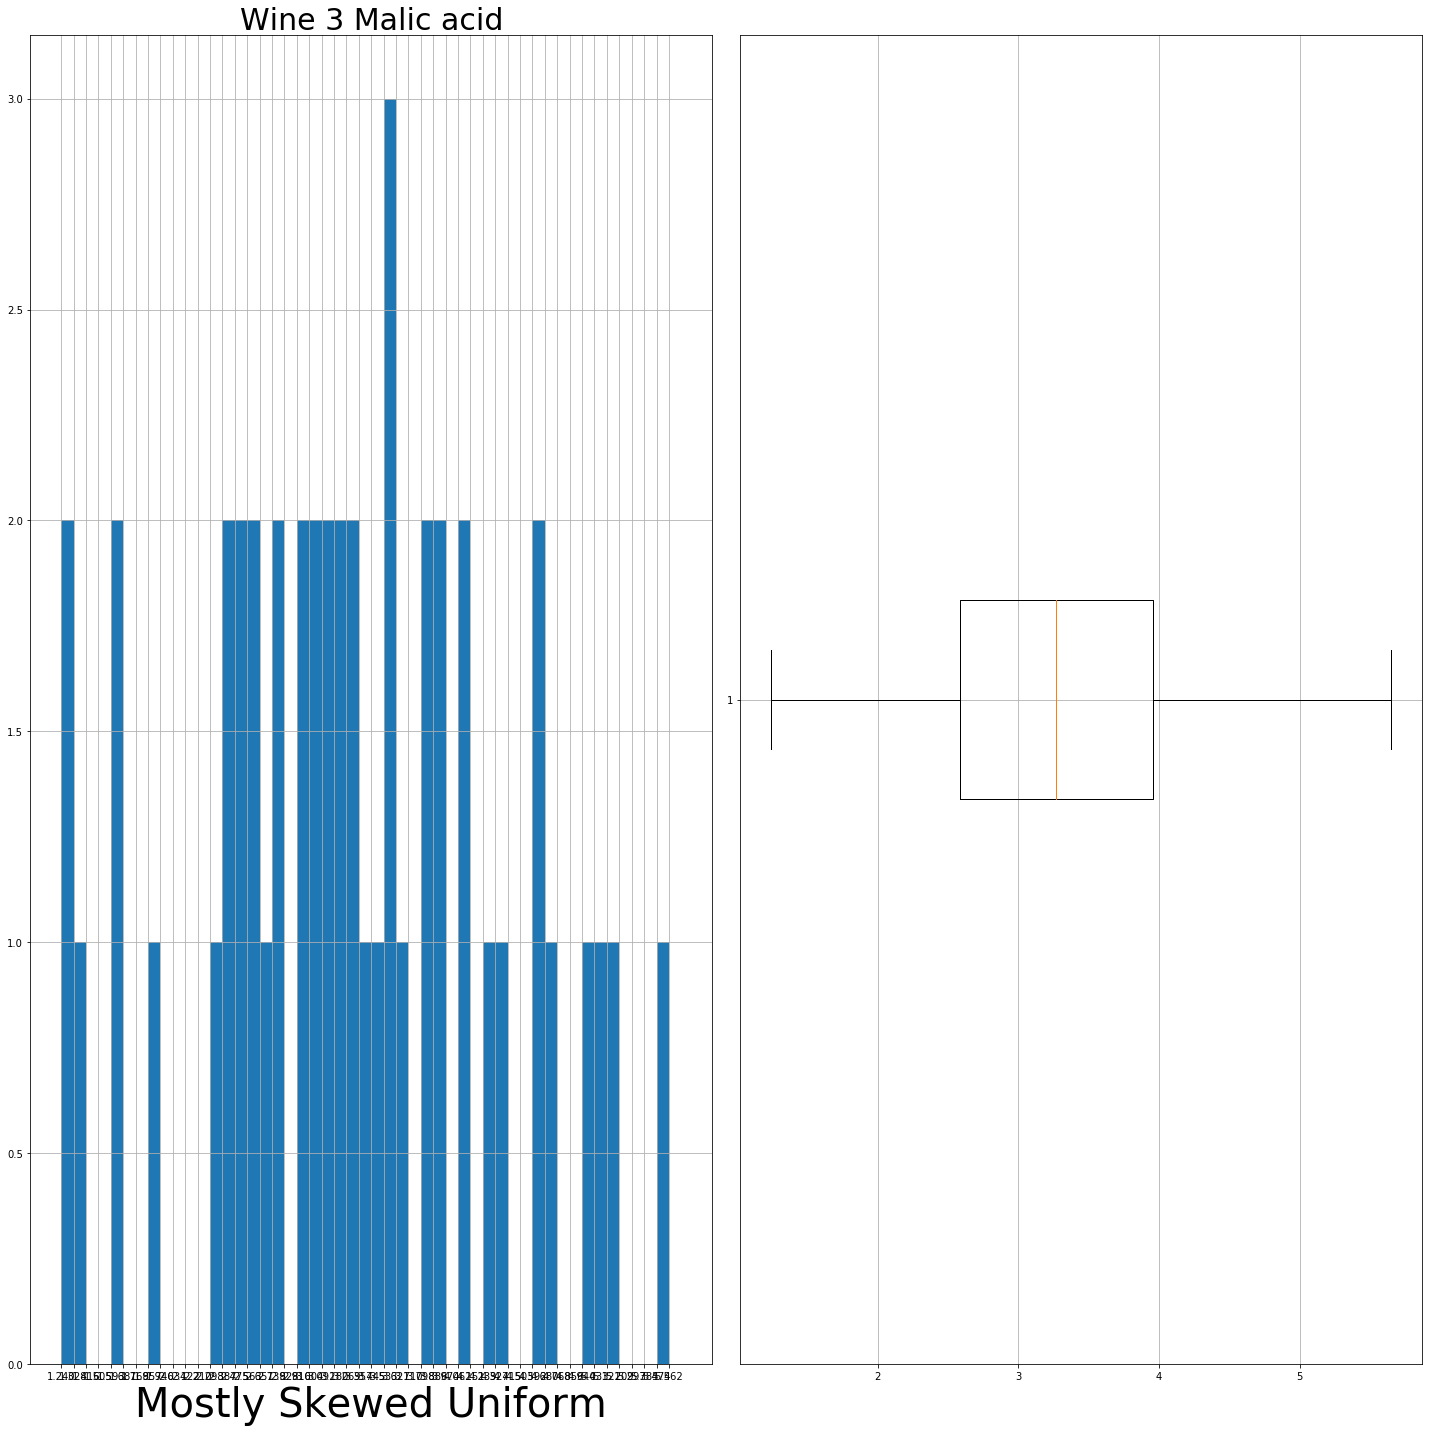

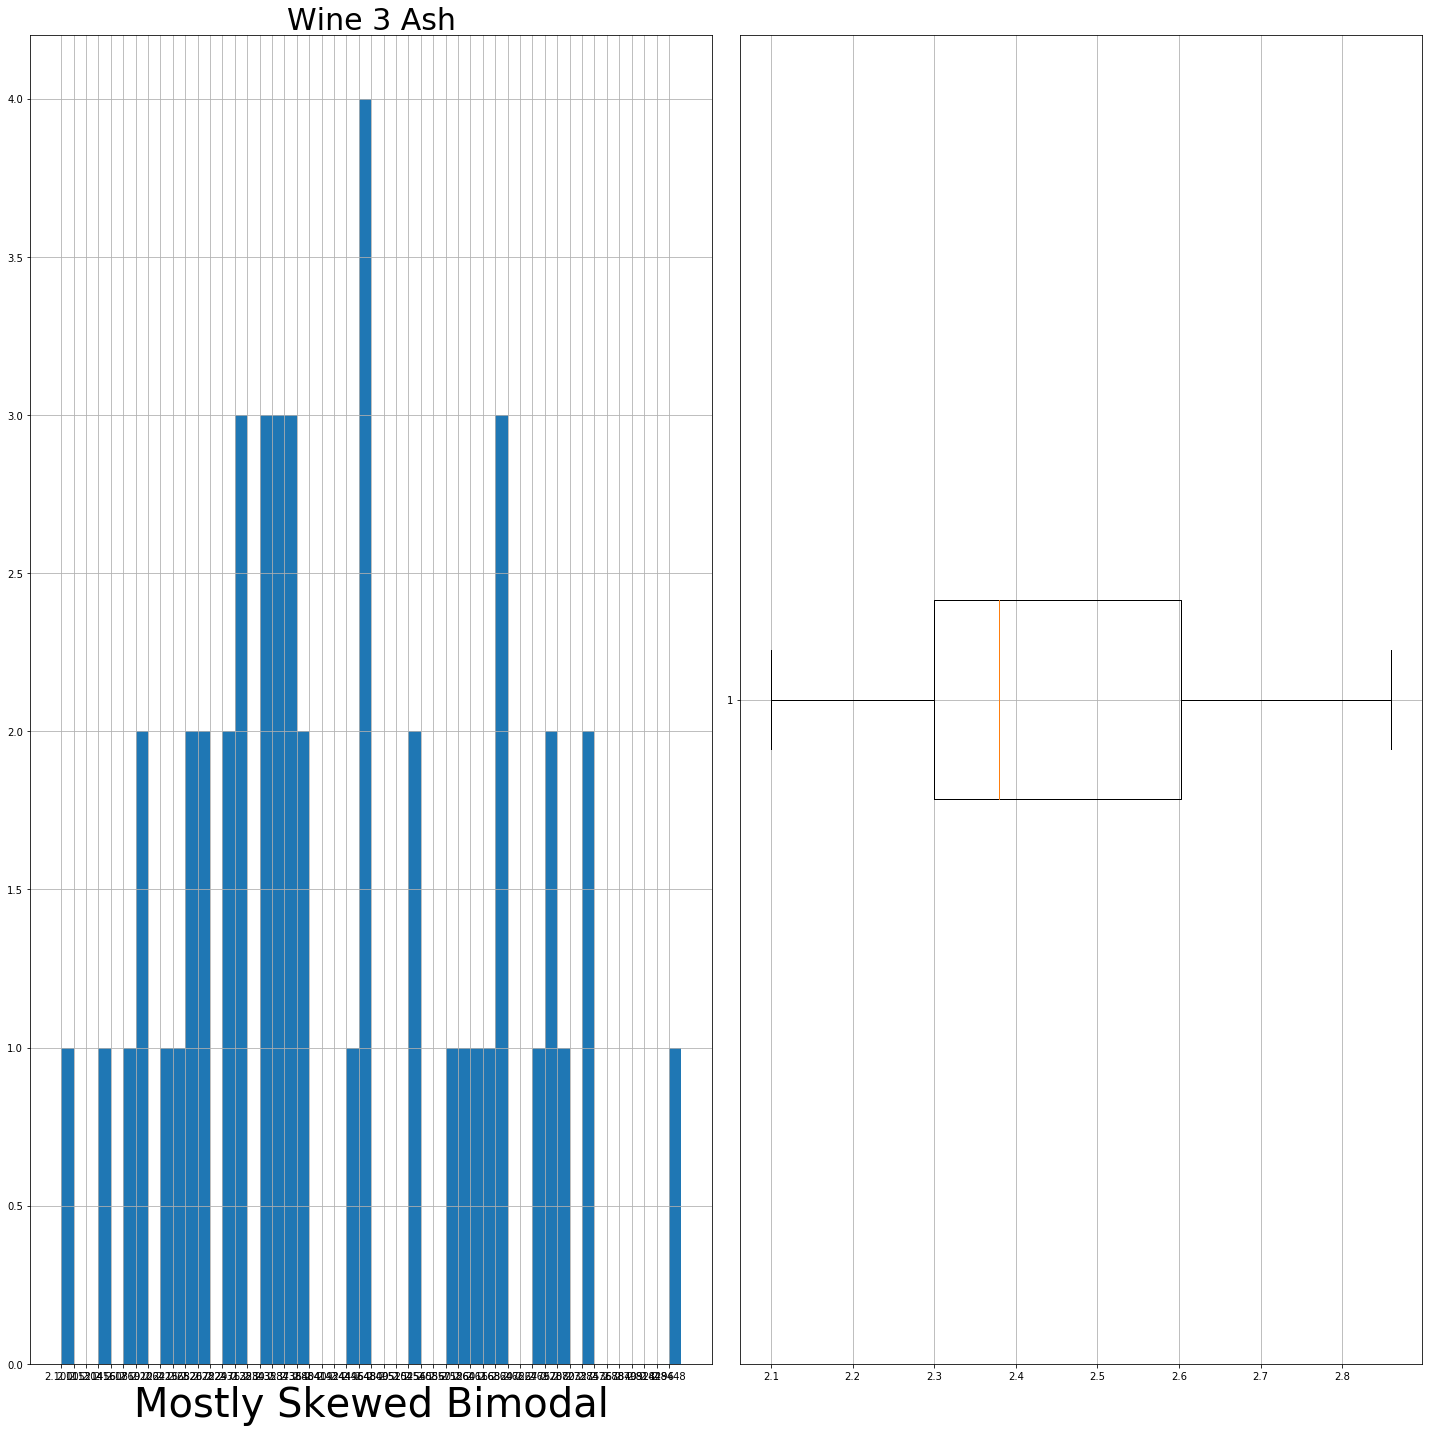

In [188]:
"""
Function calls for Wine Data, bin size = 50

"""

# Wine 1 histograms
histogram(wine1['Alcohol'], 50, "Wine 1 Alcohol", text = "Bimodal")
histogram(wine1['Malic_acid'], 50,"Wine 1 Malic acid", text = "Unimodal")
histogram(wine1['Ash'], 50,"Wine 1 Ash",text = "Bimodal")

# Wine 2 histograms
histogram(wine2['Alcohol'], 50, "Wine 2 Alcohol", text = "Unimodal")
histogram(wine2['Malic_acid'], 50,"Wine 2 Malic acid", text = "Bimodal")
histogram(wine2['Ash'], 50,"Wine 2 Ash", text = "Bimodal")

# Wine 3 histograms
histogram(wine3['Alcohol'], 50, "Wine 3 Alcohol", text = "Bimodal")
histogram(wine3['Malic_acid'], 50,"Wine 3 Malic acid", text = "Uniform")
histogram(wine3['Ash'], 50,"Wine 3 Ash", text = "Bimodal")

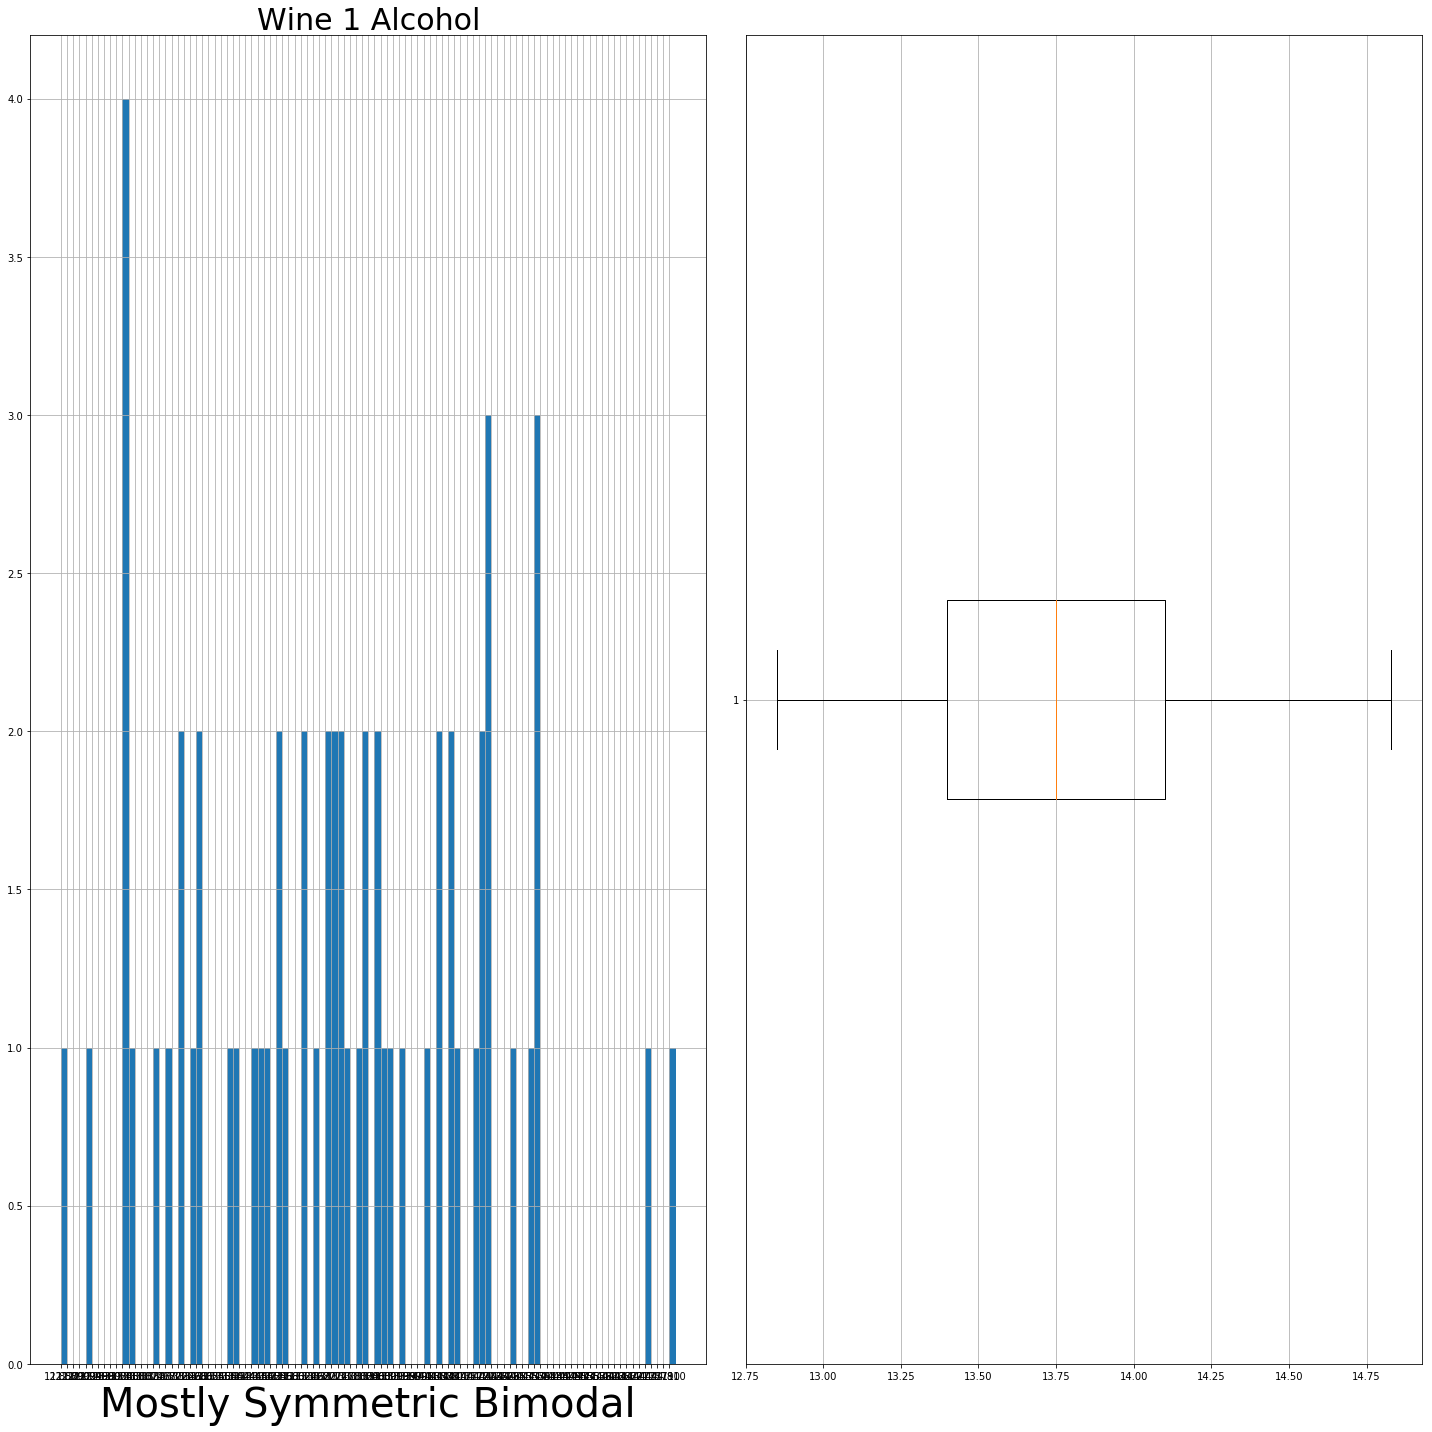

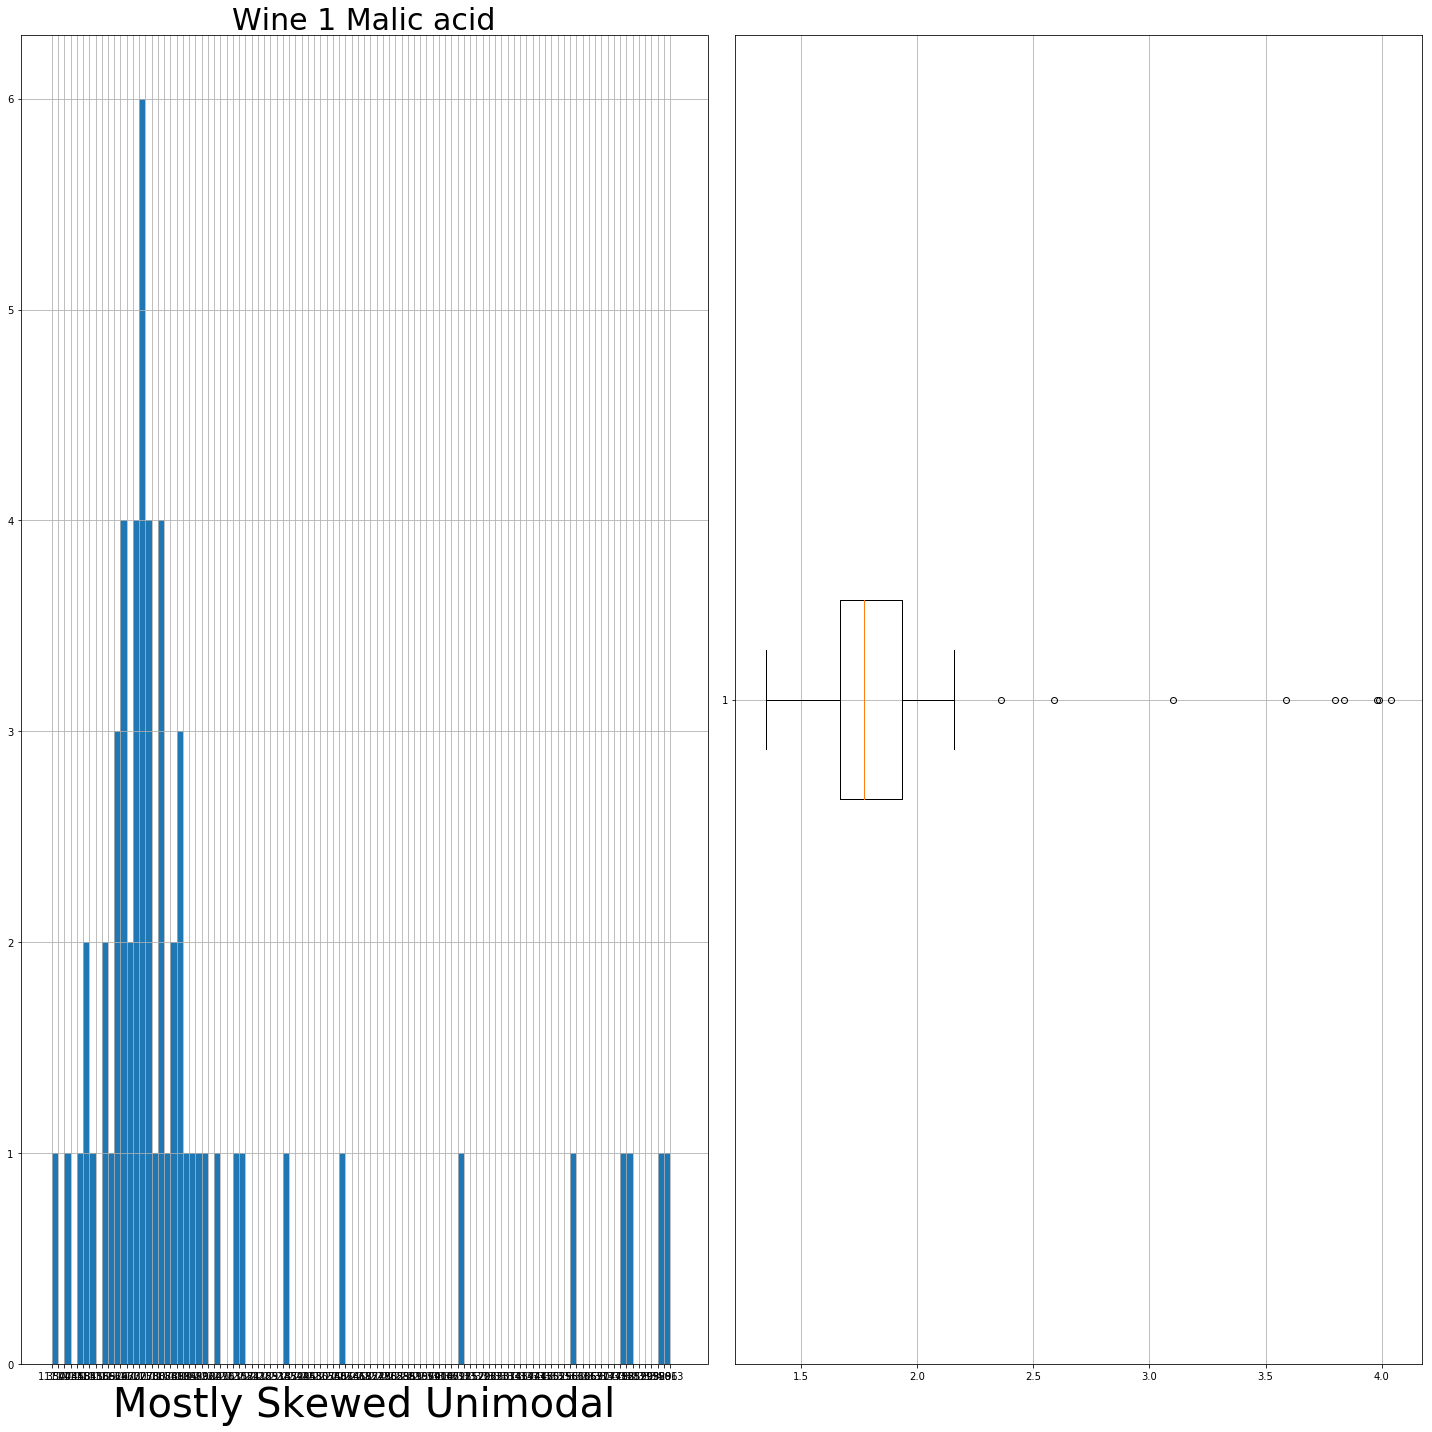

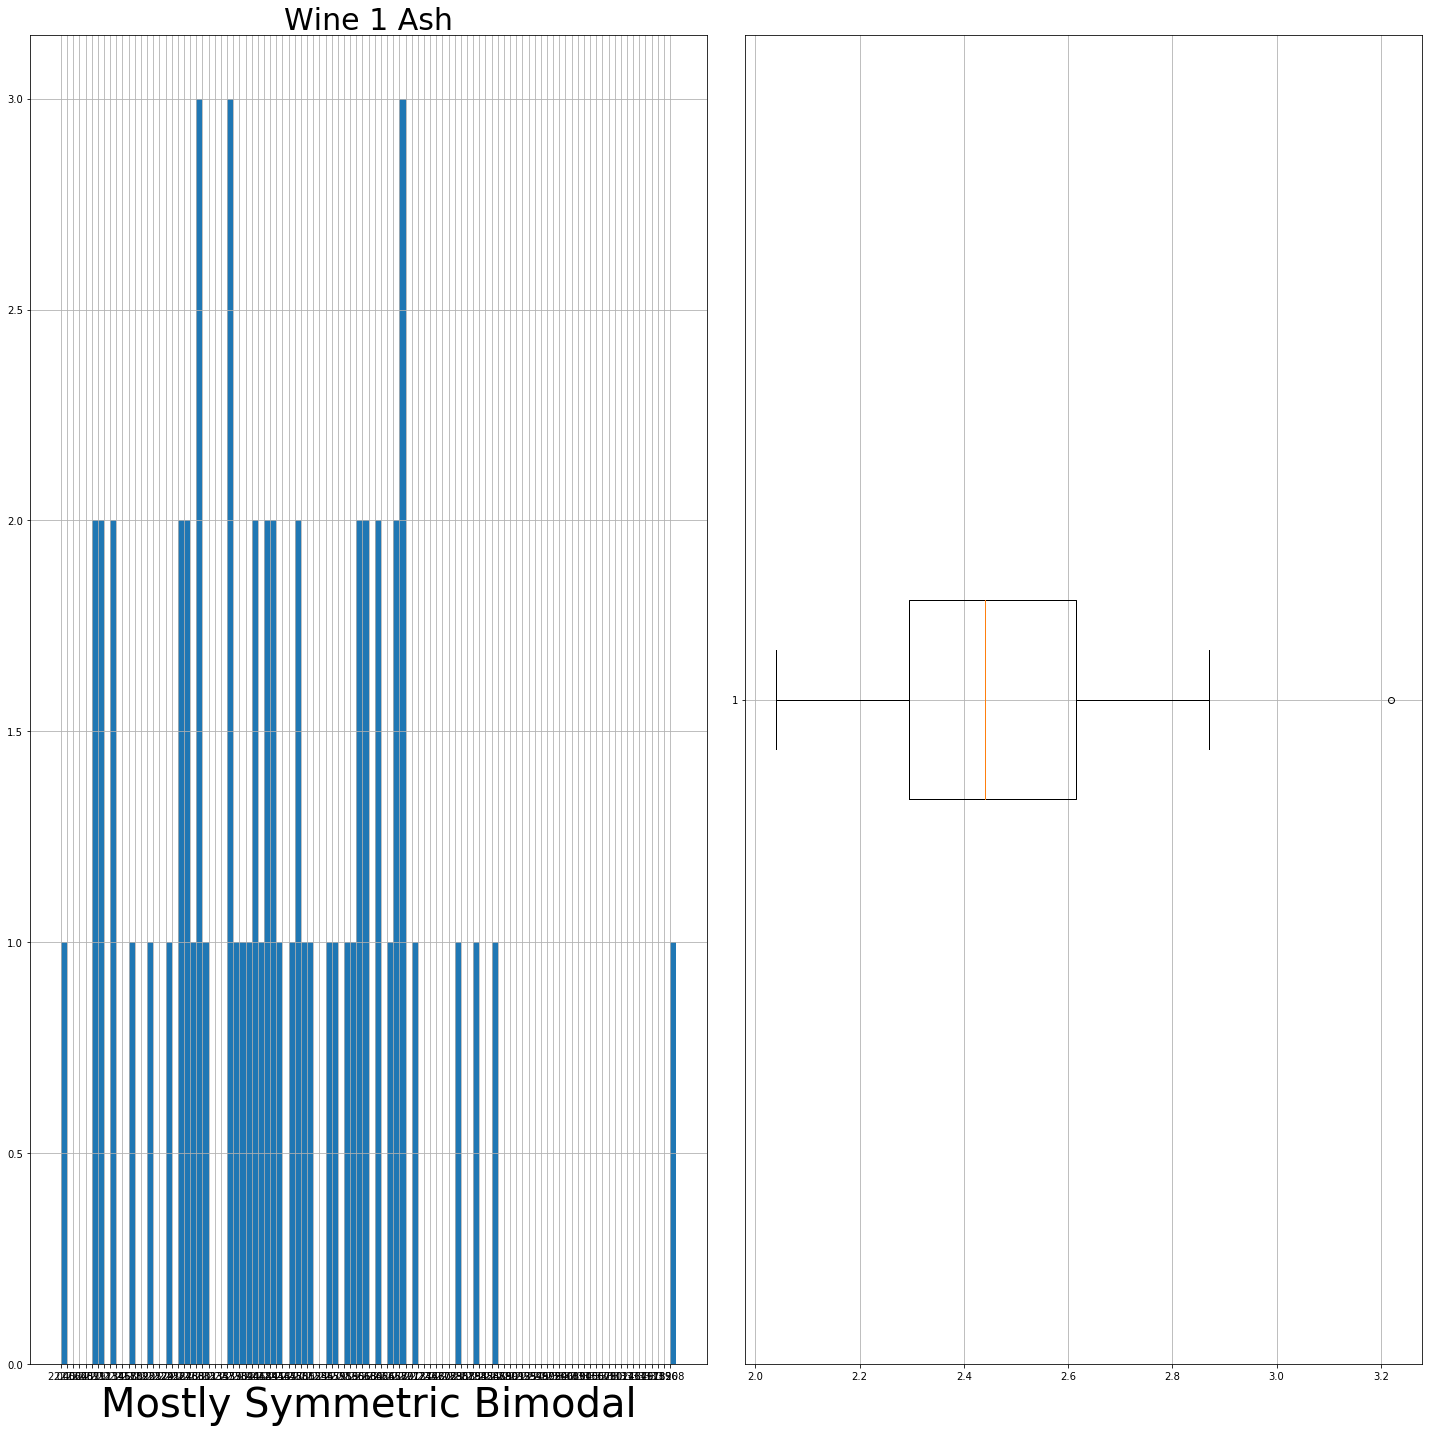

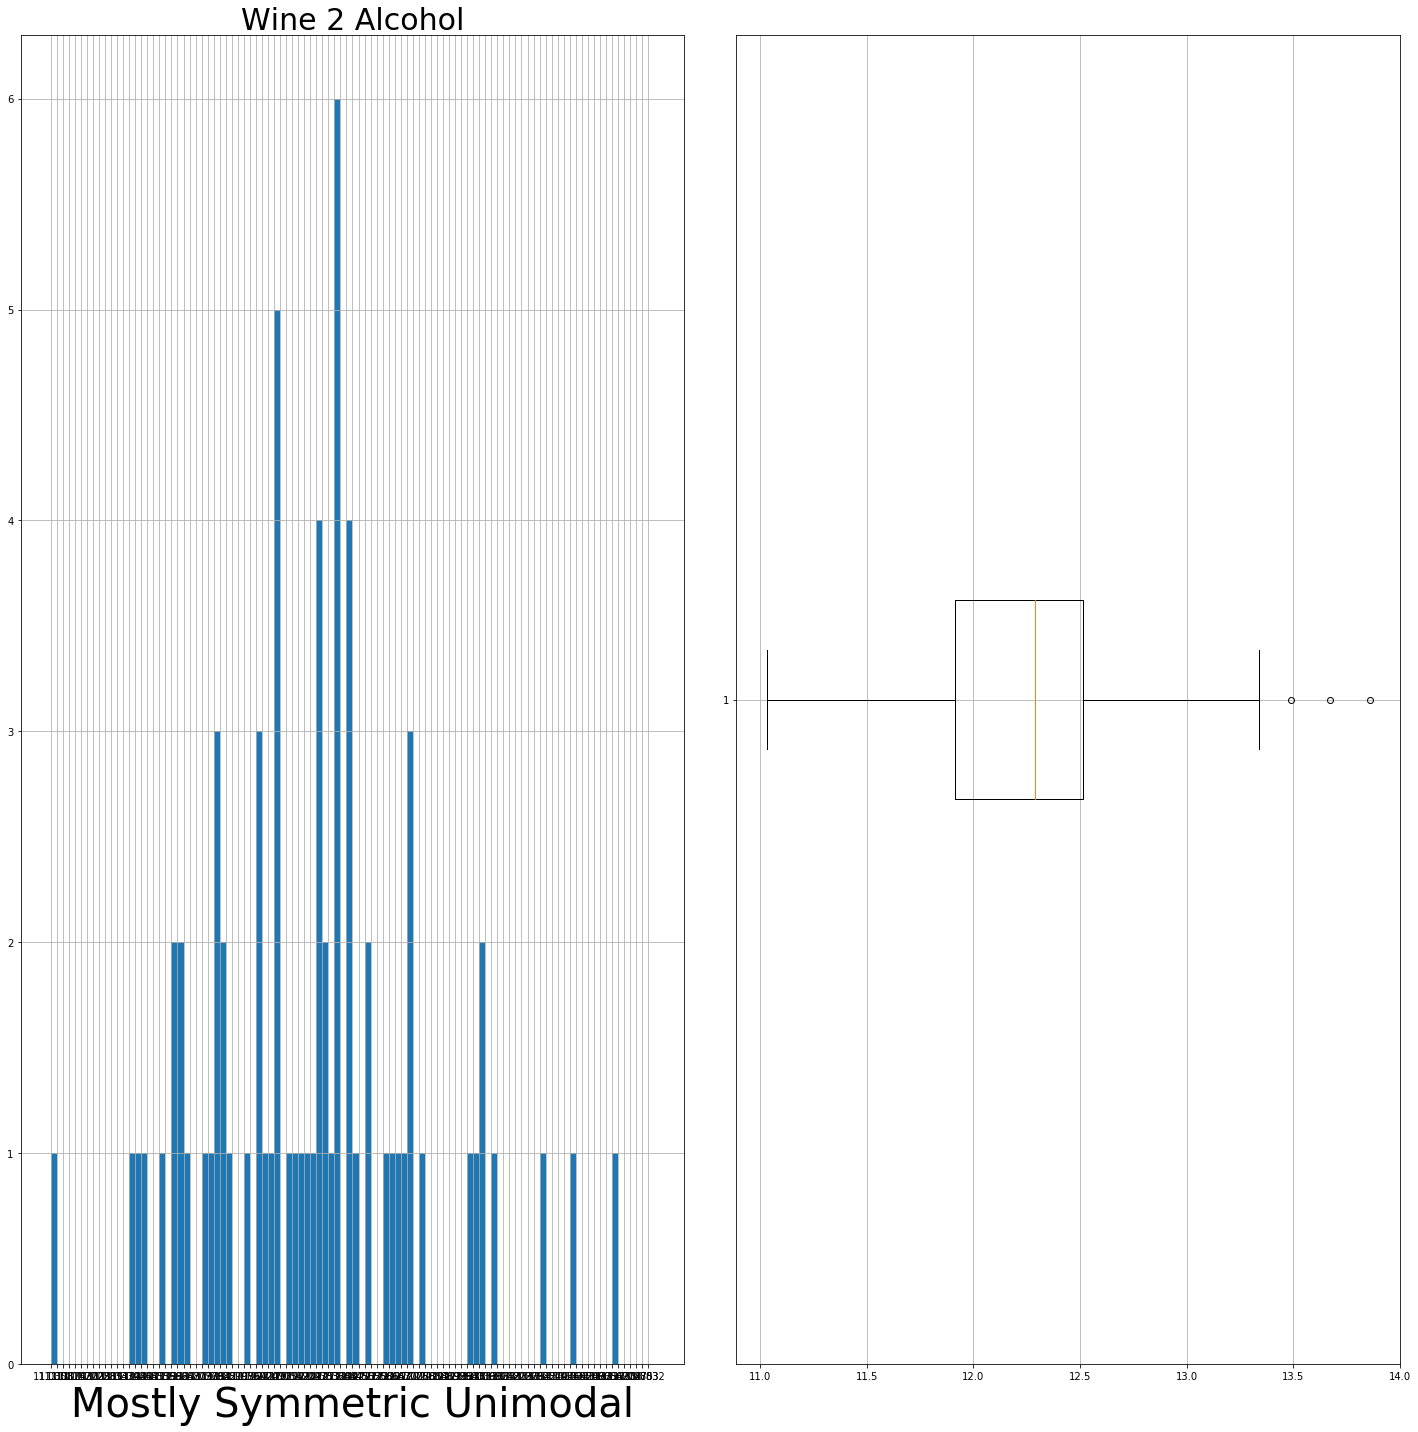

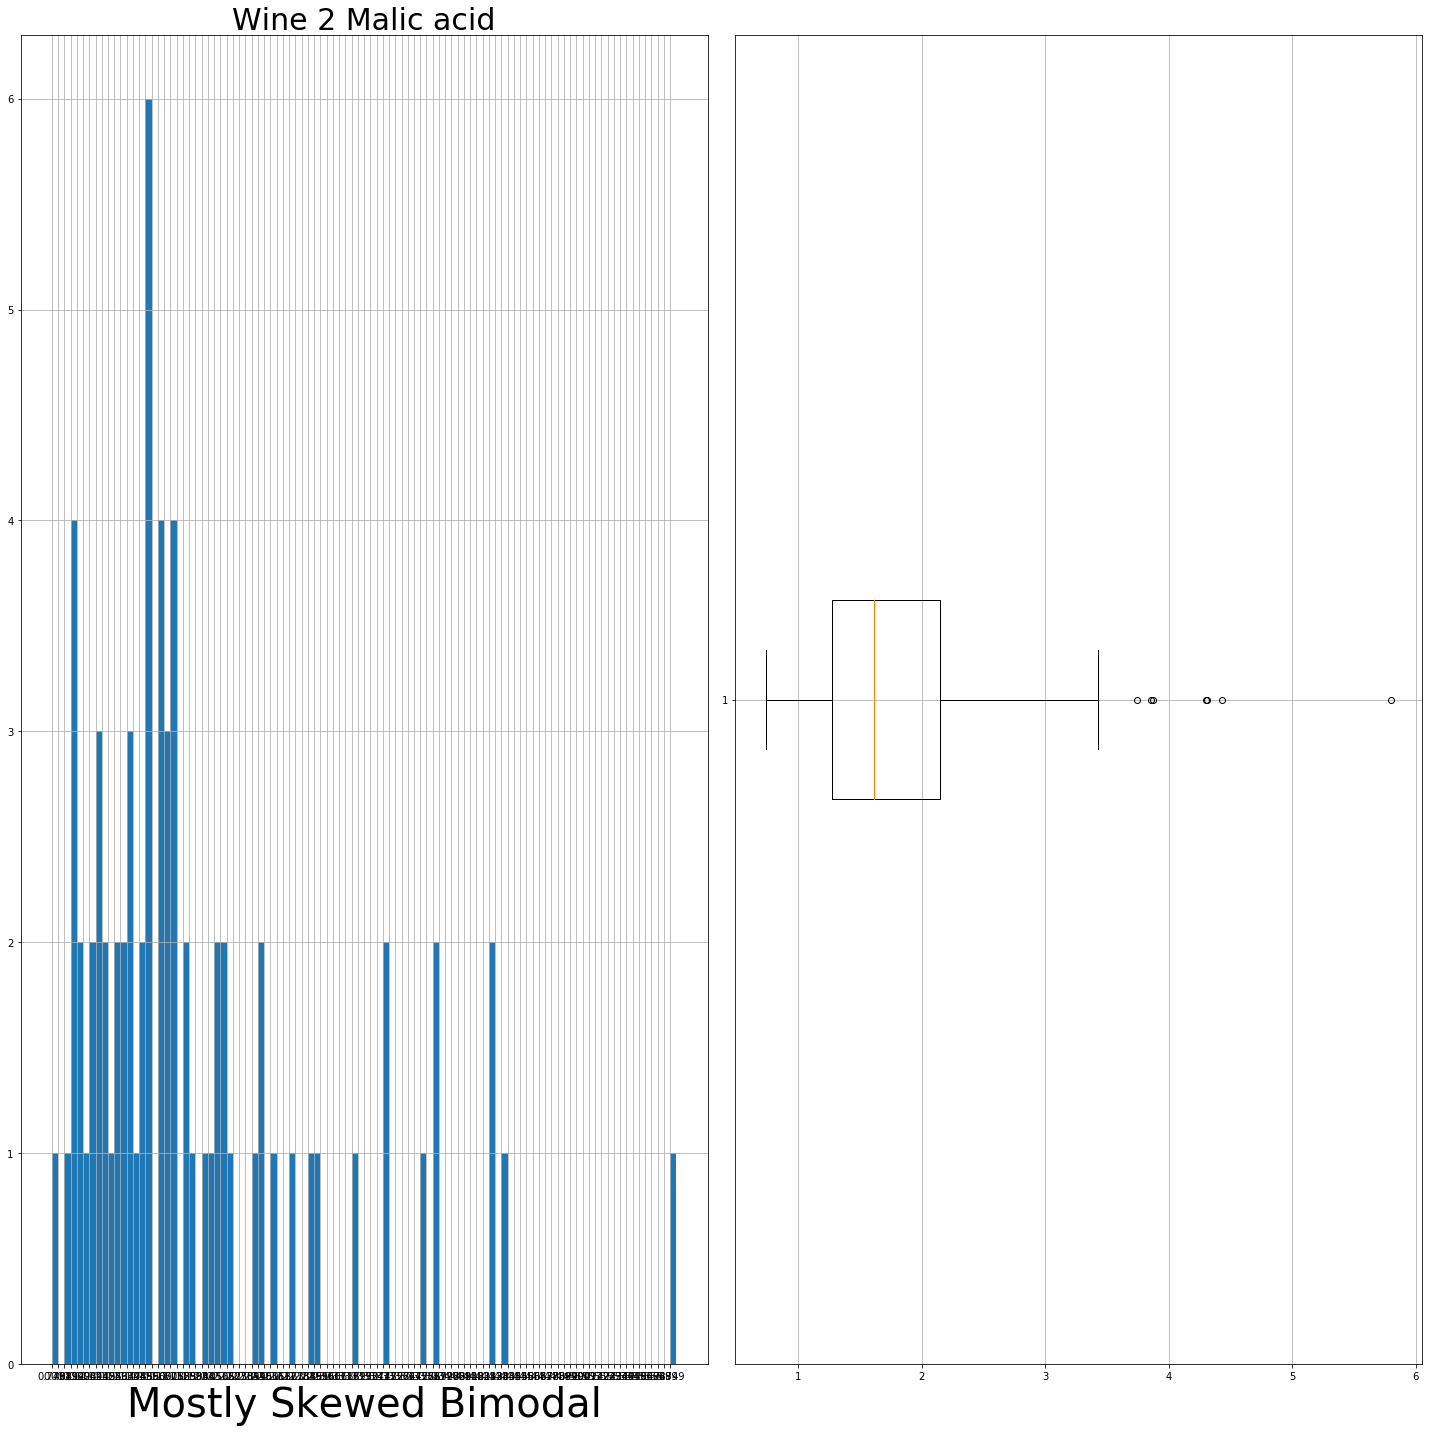

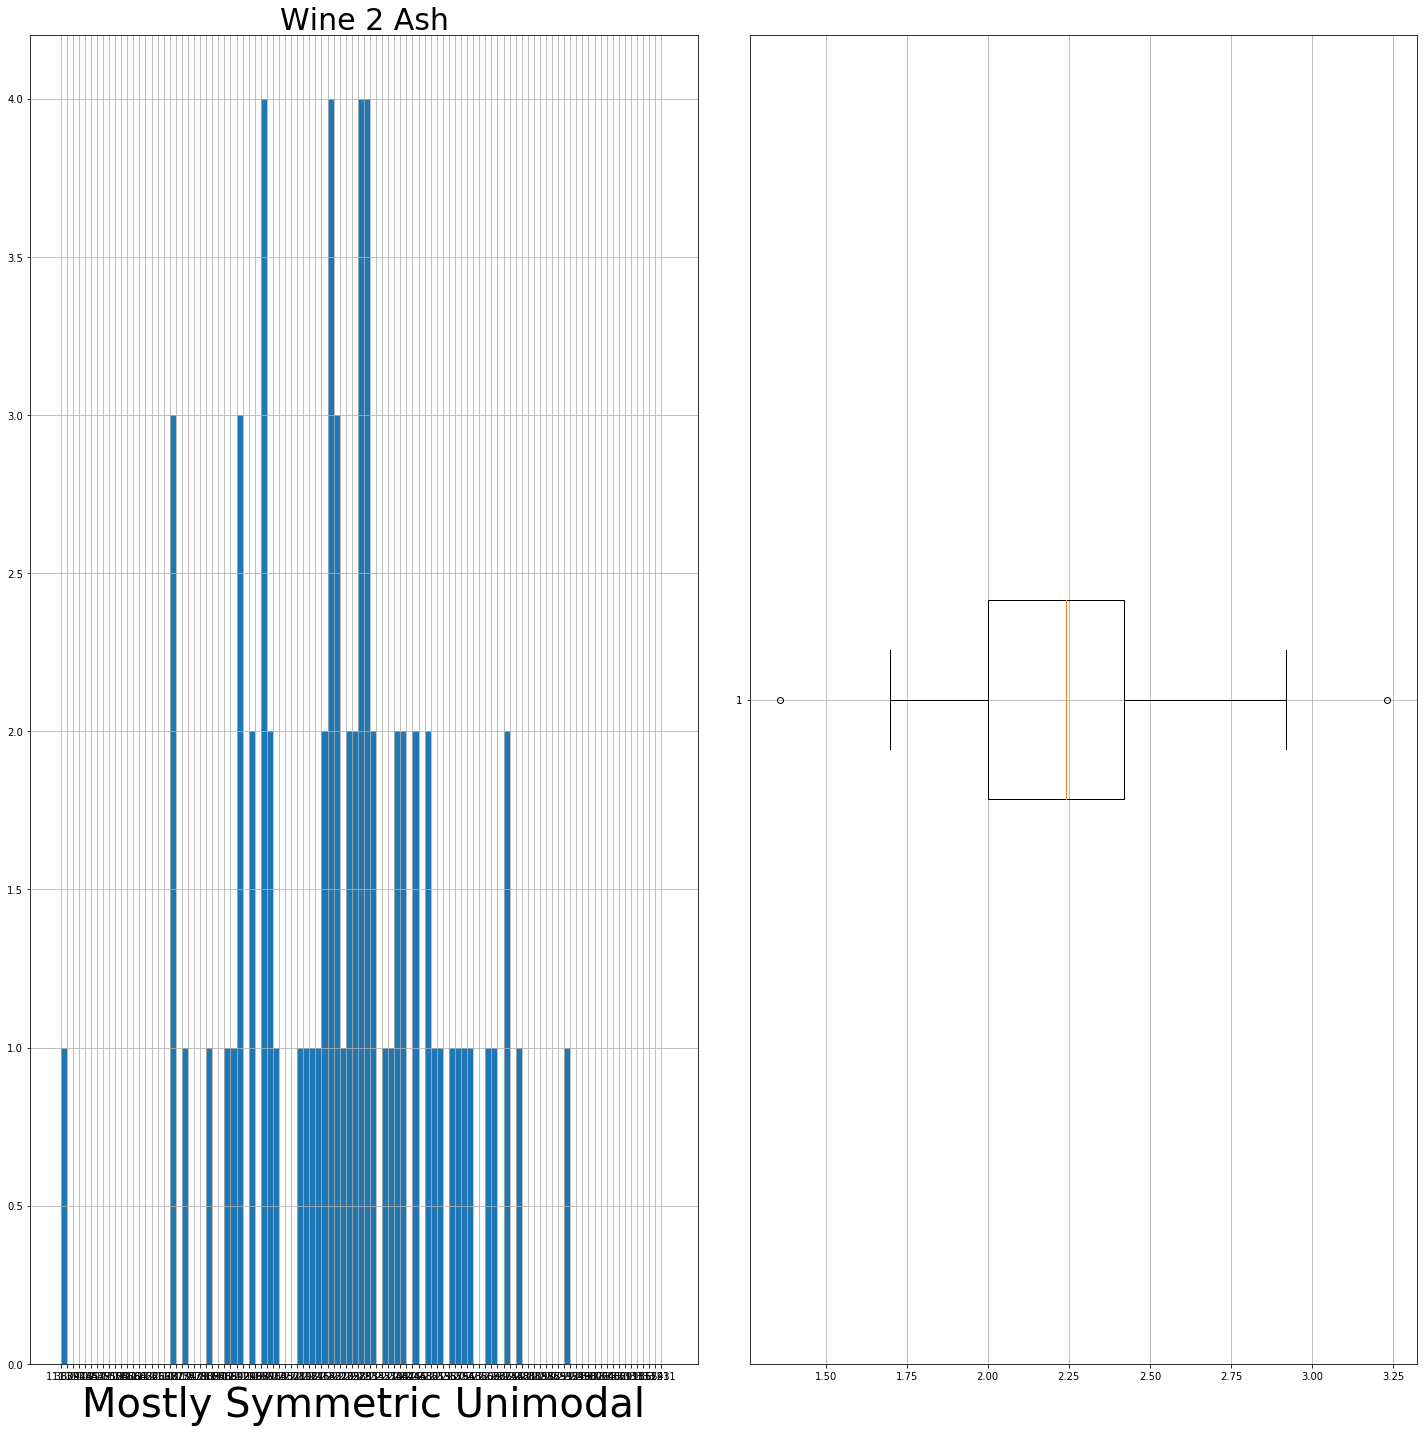

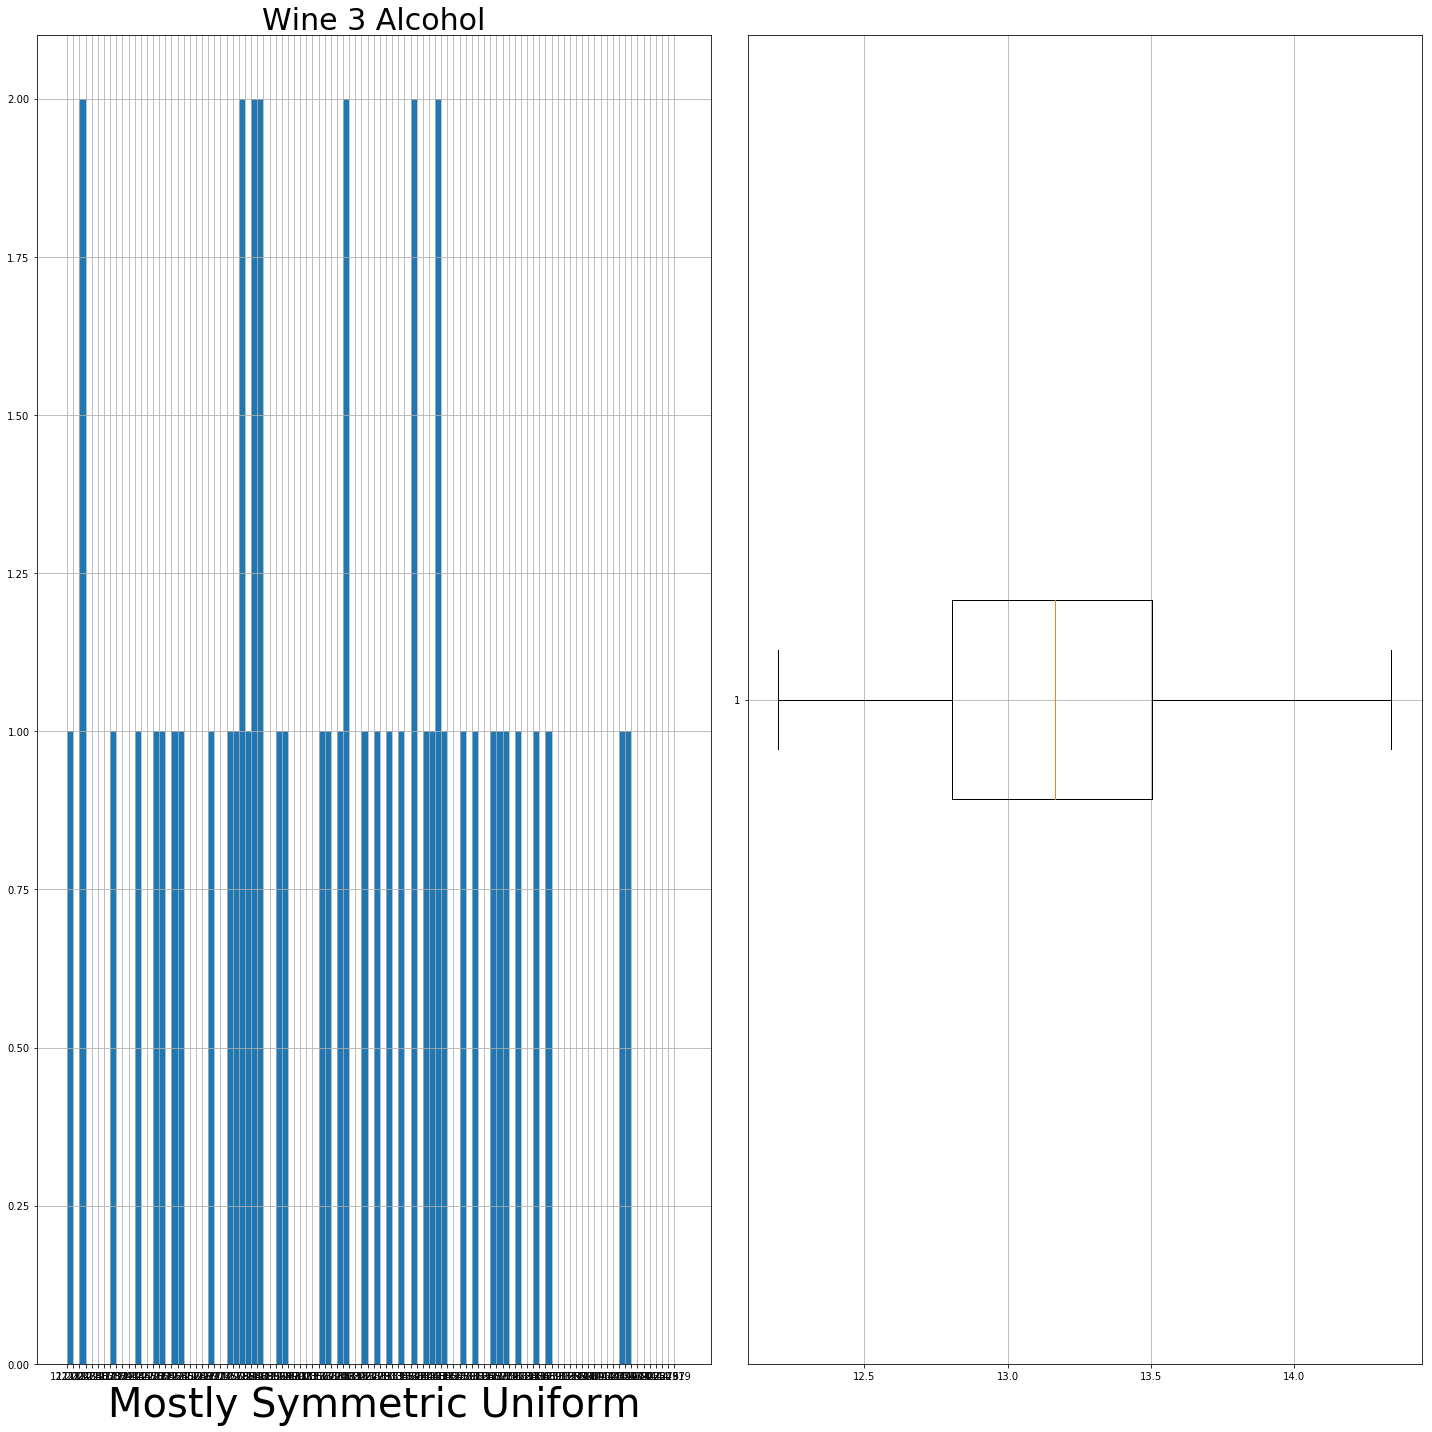

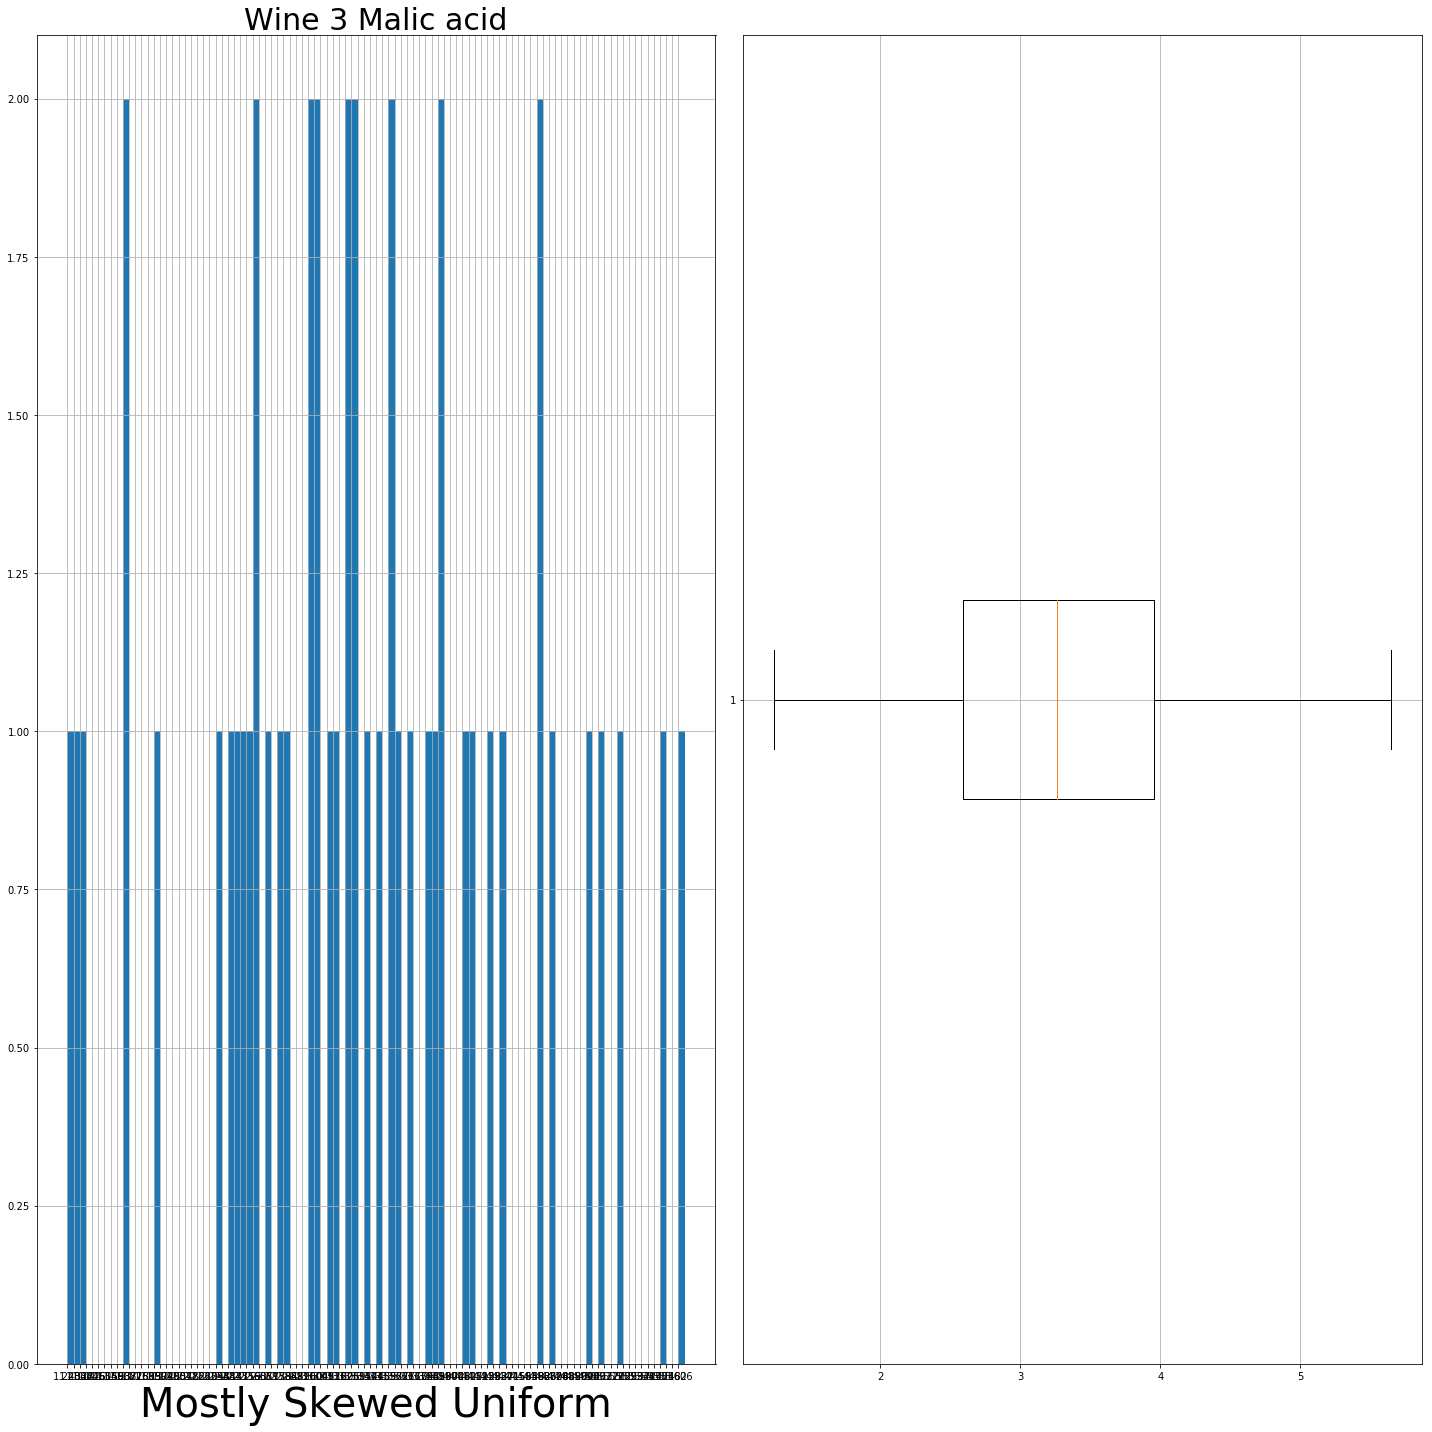

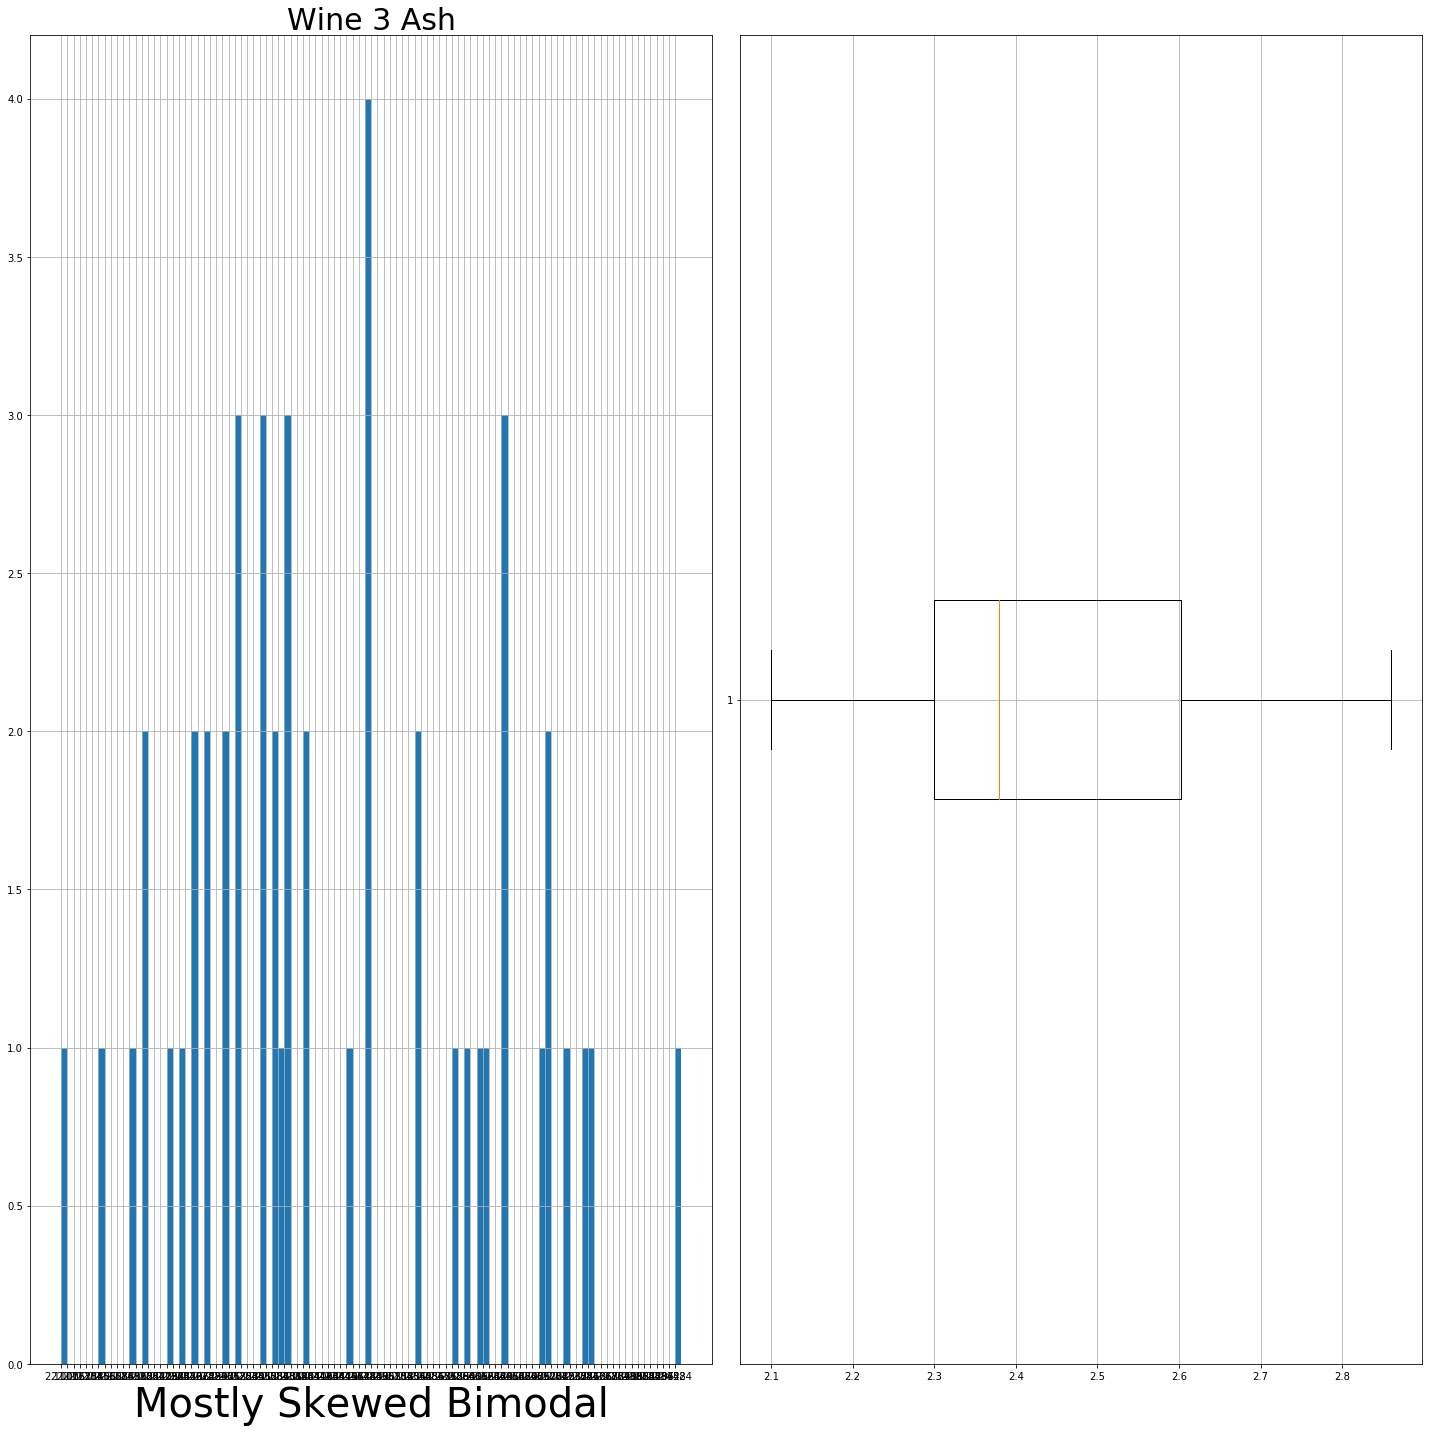

In [189]:
"""
Function calls for Wine Data, bin size = 100

"""

# Wine 1 histograms
histogram(wine1['Alcohol'], 100, "Wine 1 Alcohol", text = "Bimodal")
histogram(wine1['Malic_acid'], 100,"Wine 1 Malic acid", text = "Unimodal")
histogram(wine1['Ash'], 100,"Wine 1 Ash", text = "Bimodal")

# Wine 2 histograms
histogram(wine2['Alcohol'], 100, "Wine 2 Alcohol", text = "Unimodal")
histogram(wine2['Malic_acid'], 100,"Wine 2 Malic acid", text = "Bimodal")
histogram(wine2['Ash'], 100,"Wine 2 Ash", text = "Unimodal")

# Wine 3 histograms
histogram(wine3['Alcohol'], 100, "Wine 3 Alcohol", text = "Uniform")
histogram(wine3['Malic_acid'], 100,"Wine 3 Malic acid", text = "Uniform")
histogram(wine3['Ash'], 100,"Wine 3 Ash", text = "Bimodal")

# Question 2, part 1

## Part a
I created three separate functions to compute the covariance, standard deviation and the correlation between two data lists.
For my correlation function, I pass through 2 different data sets of features that would then determine if the features are correlated between each other.  
My corrMatrix function creates the correlation matrix from the dataset and iterates through all the attributes and creates a list from each attribute list.  The function iterates through the dataset and calls my correlation function to return the correlation.

In [190]:
"""
Covariance function that takes in two data lists 
and returns the covariance between them
"""

def covariance(x,y):
    xMean = np.mean(x)
    yMean = np.mean(y)
    numerator = 0
    for i,j in zip(x,y):
        numerator += (i*j)
    return (numerator/len(x)) - (xMean * yMean)

"""
Standard deviation function that takes in a data list 
and returns the standarid deviation

"""
def stdDeviation(a):
    aMean = np.mean(a)
    sum = 0
    for i in a:
        sum += i**2
    return math.sqrt((sum / len(a)) - (aMean ** 2))

"""
Correlation function that calls the covariance function and divides it
by the standard deviation of both the data lists multiplied by each other.
"""

def correlation(x,y):
    return (covariance(x,y)/(stdDeviation(x) * stdDeviation(y)))

"""
Creates a correlation matrix between the different attributes inside
of a dataset.
"""

def corrMatrix(Dataset):    
    cMatrix = []
    for firstName in Dataset.dtype.names:
        if firstName == 'label':
            continue
        newRow = []
        for secondName in Dataset.dtype.names:
            if secondName != 'label' and firstName != 'label':
                corr = correlation(Dataset[firstName], Dataset[secondName])
                newRow.append(corr)
        cMatrix.append(newRow)
    return np.array(cMatrix)

## Part b
Once the correlation matrix has been completed, I plot the correlogram by calling the function imshow and choose a color scheme to differentiate between the Iris data set and the Wine data set.

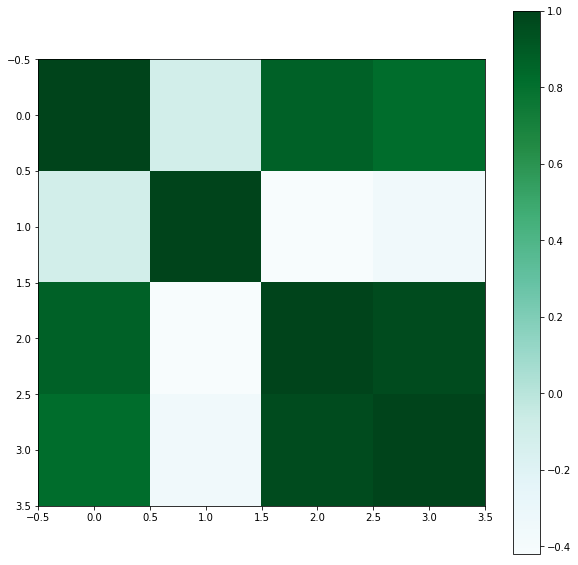

In [191]:
"""
Iris Data Correlation Plots

"""

irisMatrix = corrMatrix(irisData)

plt.figure(1, figsize=(10,10))
plt.imshow(irisMatrix, cmap='BuGn')
plt.colorbar()
plt.show()


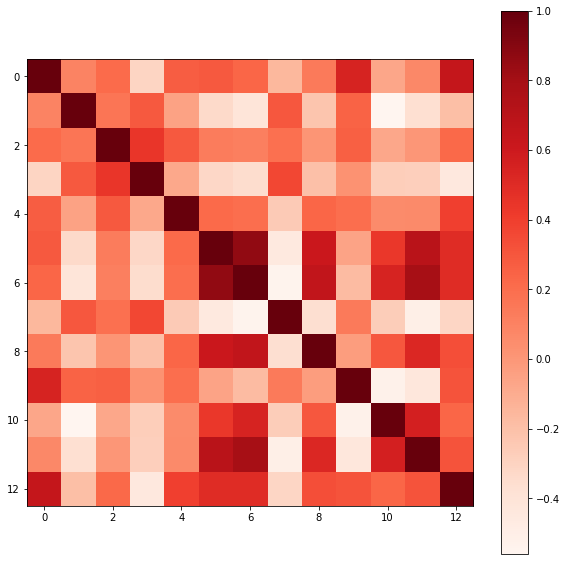

In [192]:
"""
Wine Data Correlation Plots

"""
wineMatrix = corrMatrix(wineData)

plt.figure(1, figsize=(10,10))
plt.imshow(wineMatrix, cmap='Reds')
plt.colorbar()
plt.show()

## Part c
The absolute minimum number of calls to the correlation(x,y) function in order to fill the matrix for:
1. Iris Data set: 16
2. Wine Data set: 169

## Part d
There are correlated features in the plot and this can be useful to determine if a feature is unnecessary to include in the data if they are really correlated.  

# Question 2, part 2

## Part a
I used the scatter function inside of matplotlib to create a matrix of scatter plots for the iris and wine data set.  
On each scatter plot within the matrix, I plotted all 3 different iris classes and 3 different wine classes.


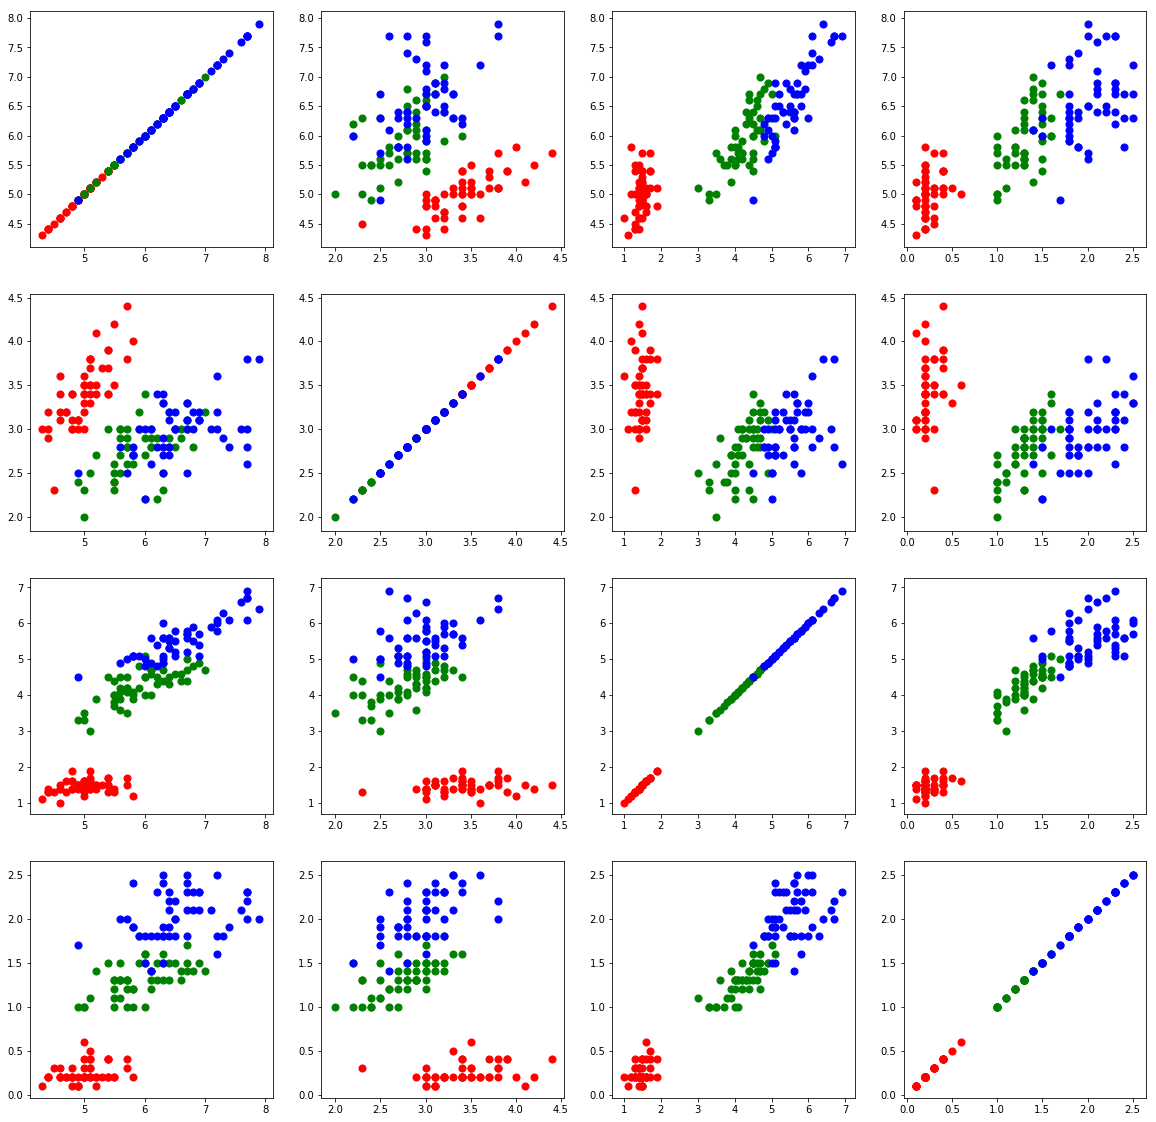

In [193]:
"""
Question 2-2
Iris scatterplots of the features vs features
"""
scatterIndex = 1
plt.figure(2, figsize=(20,20))
for yname in irisHeaders:
    if yname != 'label':
        for xname in irisHeaders:
            if xname != 'label':
                plt.subplot(4,4, scatterIndex)
                plt.scatter(setosa[xname], setosa[yname],s=50, c='red')
                plt.scatter(versicolor[xname], versicolor[yname],s=50, c = 'green')
                plt.scatter(virginica[xname], virginica[yname],s=50, c='blue')
                scatterIndex+=1
plt.show()


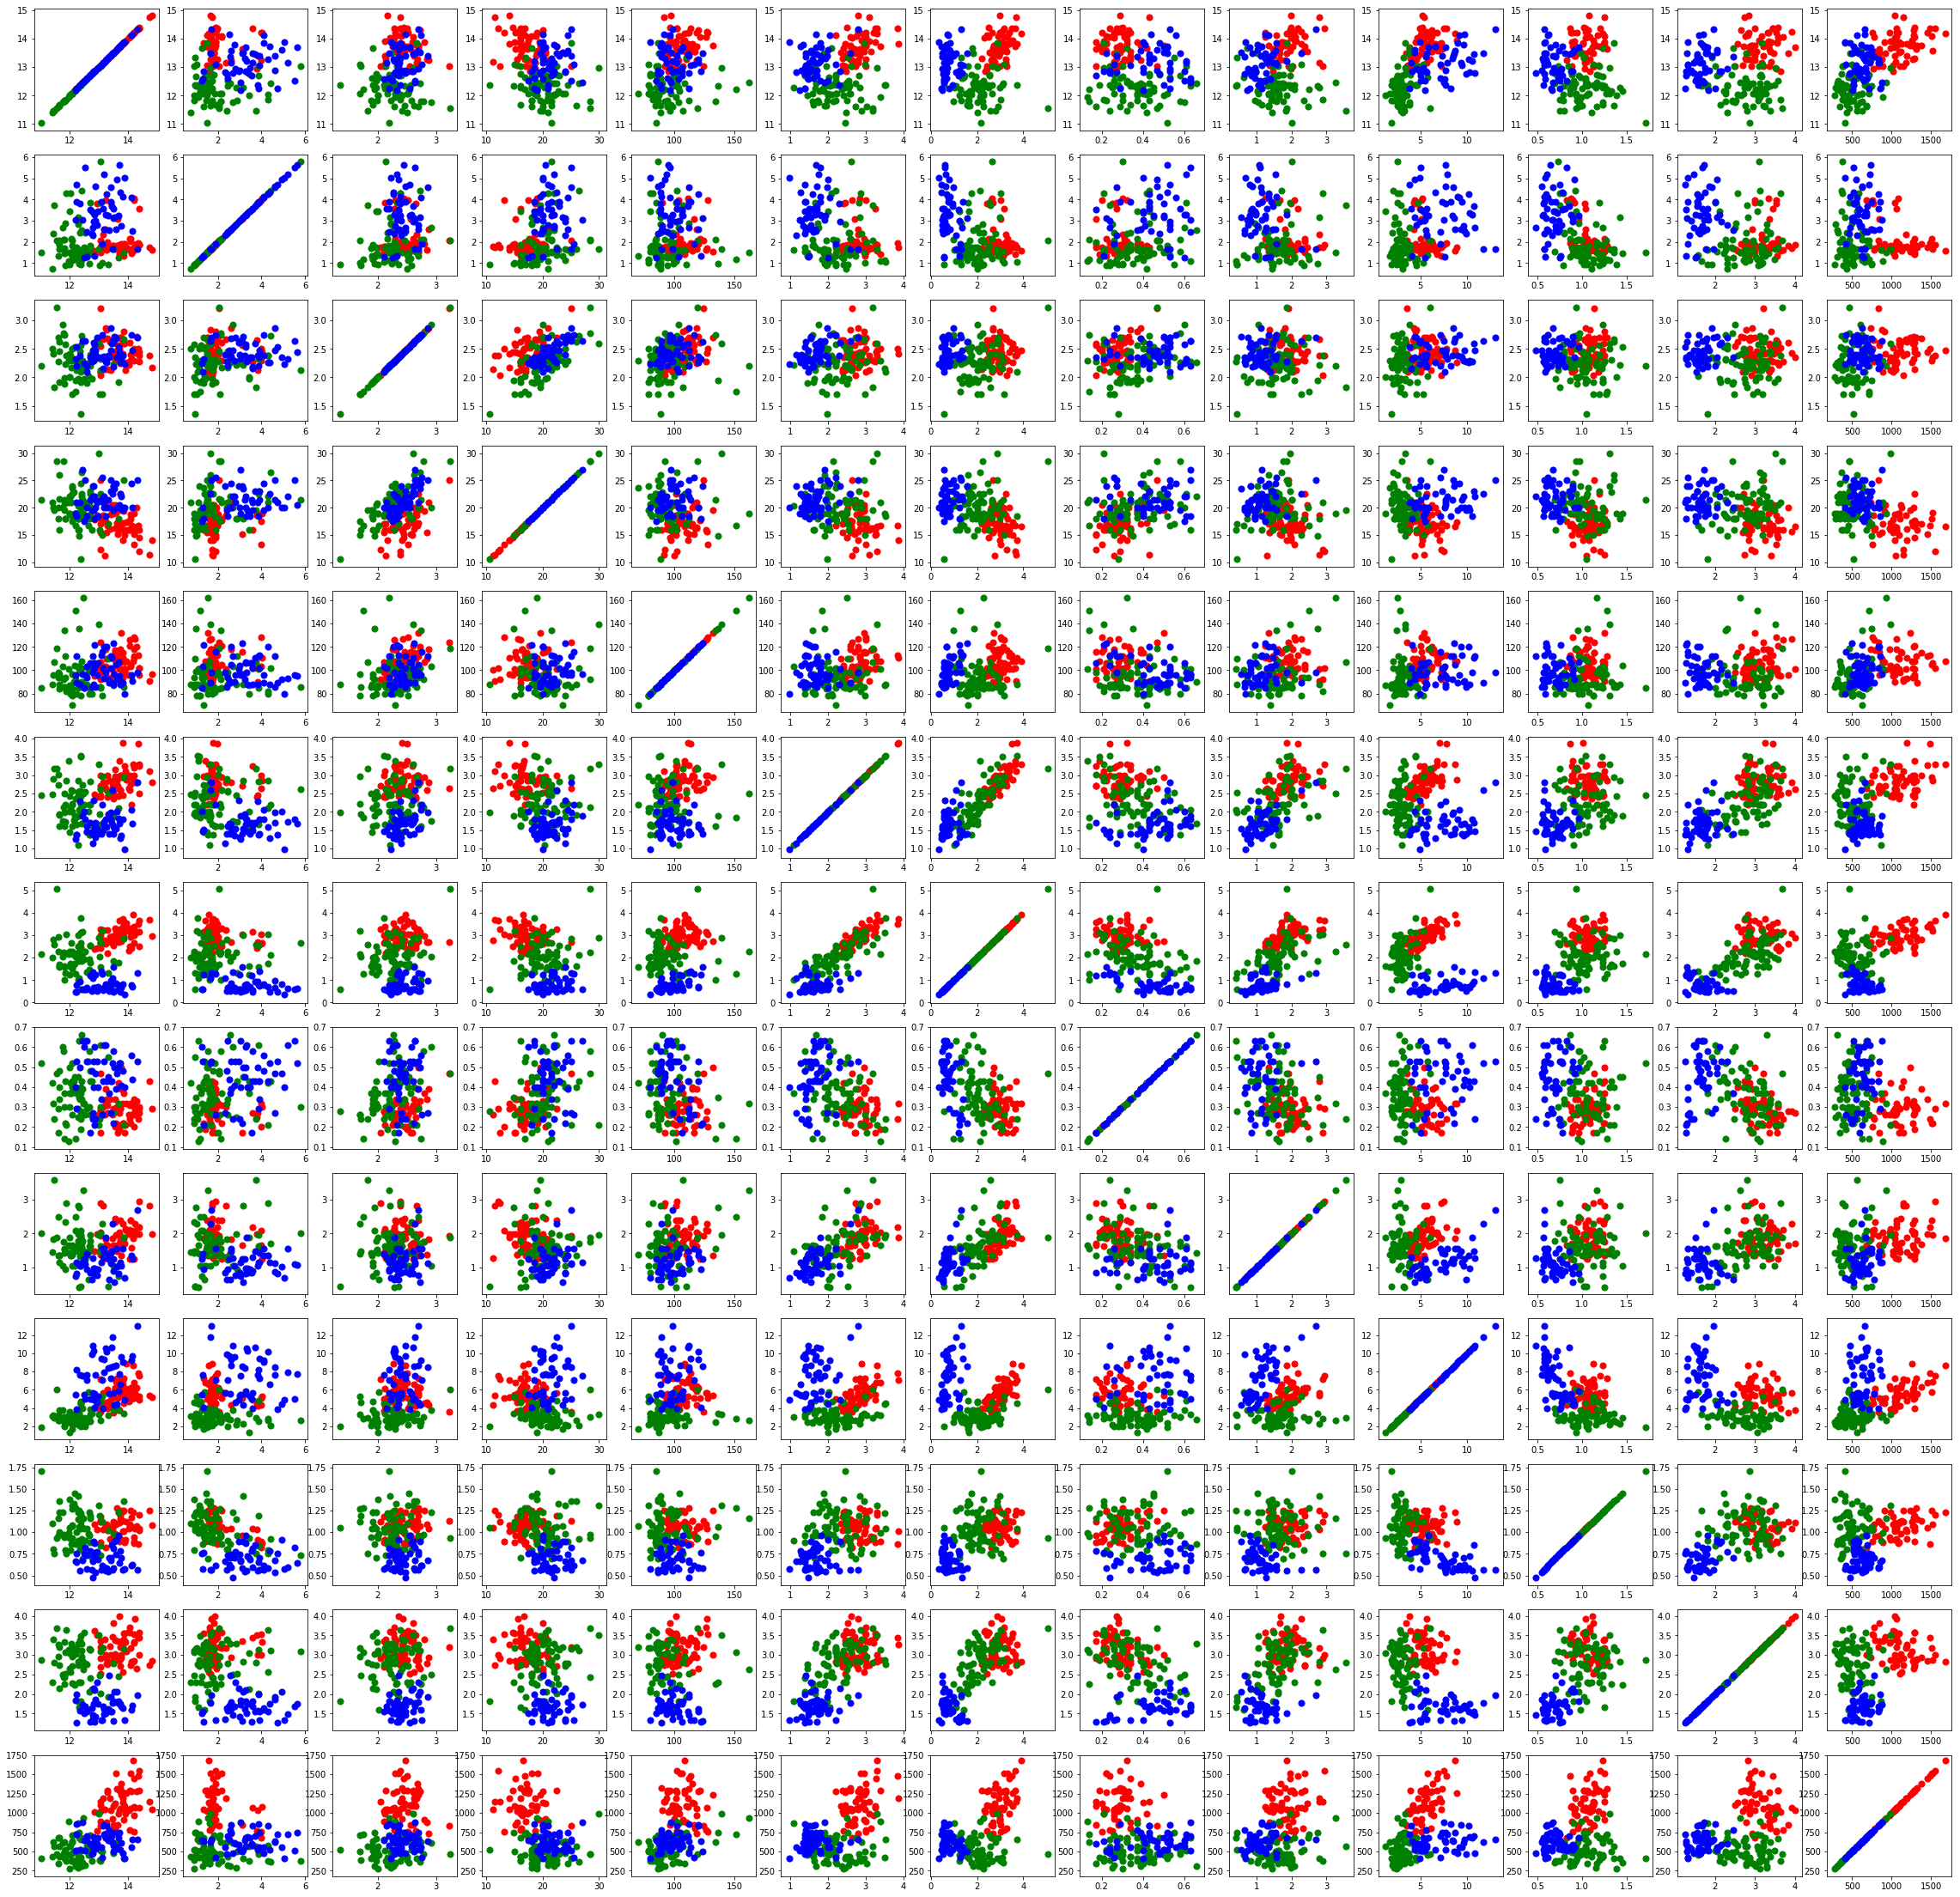

In [194]:
"""
Question 2-2
Wine scatterplots of the features vs features
"""
scatterIndex = 1
plt.figure(2, figsize=(40,40))
for yname in wineHeaders:
    if yname != 'label':
        for xname in wineHeaders:
            if xname != 'label':
                plt.subplot(len(wineHeaders)-1,len(wineHeaders)-1, scatterIndex)
                plt.scatter(wine1[xname], wine1[yname],s=50, c='red')
                plt.scatter(wine2[xname], wine2[yname],s=50, c = 'green')
                plt.scatter(wine3[xname], wine3[yname],s=50, c='blue')
                scatterIndex+=1
plt.show()

## Part b
Yes there are some pairs of features that are discriminative and you can clearly see separation in both feature matrices.  These show us the how different the features are and allows up to see the differences for each class. 

## Part c
Yes there are pairs of features that are non-discriminative and you can see no separation from the features.  This does agree with the set of correlated features from question 1 as it shows the really correlated features are difficult to see separation in our feature matricies.

# Question 2, part 3

## Part a
My distance function takes in 2 data list vectors and iterates through each element in them to find the total distance between them.  The parameters for my function are one data vector, one data vector and the value we will use for p.  The distance function will iterate through both vectors at the same time and take the absolute difference between the element of x and y and then raise it to p.  The sum of all the elements is the 1/p rooted and returned.

In [195]:
"""
Question 2-3

Distance function to compute Lp norm between two vectors
"""
def distance(x,y,p):
    totalDistance = 0
    for i,j in zip(x,y):
        if type(i) is not np.float64 or type(j) is not np.float64:
            continue
        else:
            totalDistance += (abs(i-j)**p)
    return totalDistance**(1/p)

## Part b
I created a function called createLPmatrix that I can use to propagate the Lp norm matrix of all my distances in the dataset.  For the iris data set, the shape is 150 x 150.  The shape of the wine data set is 178 x 178.  The parameters of my function are the Dataset you are passing through and the p value you will use to calculate the lp norm. I then create a distance matrix with all my distance values in them and use that distance matrix to plot

In [196]:
def createLPmatrix(Dataset,p):
    lpMatrix = []
    for firstRow in Dataset:
        newRow = []
        for secondRow in Dataset:
            lpRow = distance(firstRow, secondRow,p)
            newRow.append(lpRow)
        lpMatrix.append(newRow)
    return np.array(lpMatrix)

## Part c
The absolute minimum number of calls to the distance function I need to make to fill both matricies are:
* 150 x 150 = 22500 function calls for the iris data set
* 178 x 178 = 31684 function calls for the wine data set

## Part d
I plotted my distance matrices using the function imshow in matplotlib and used different color schemes for the iris and wine data set.  

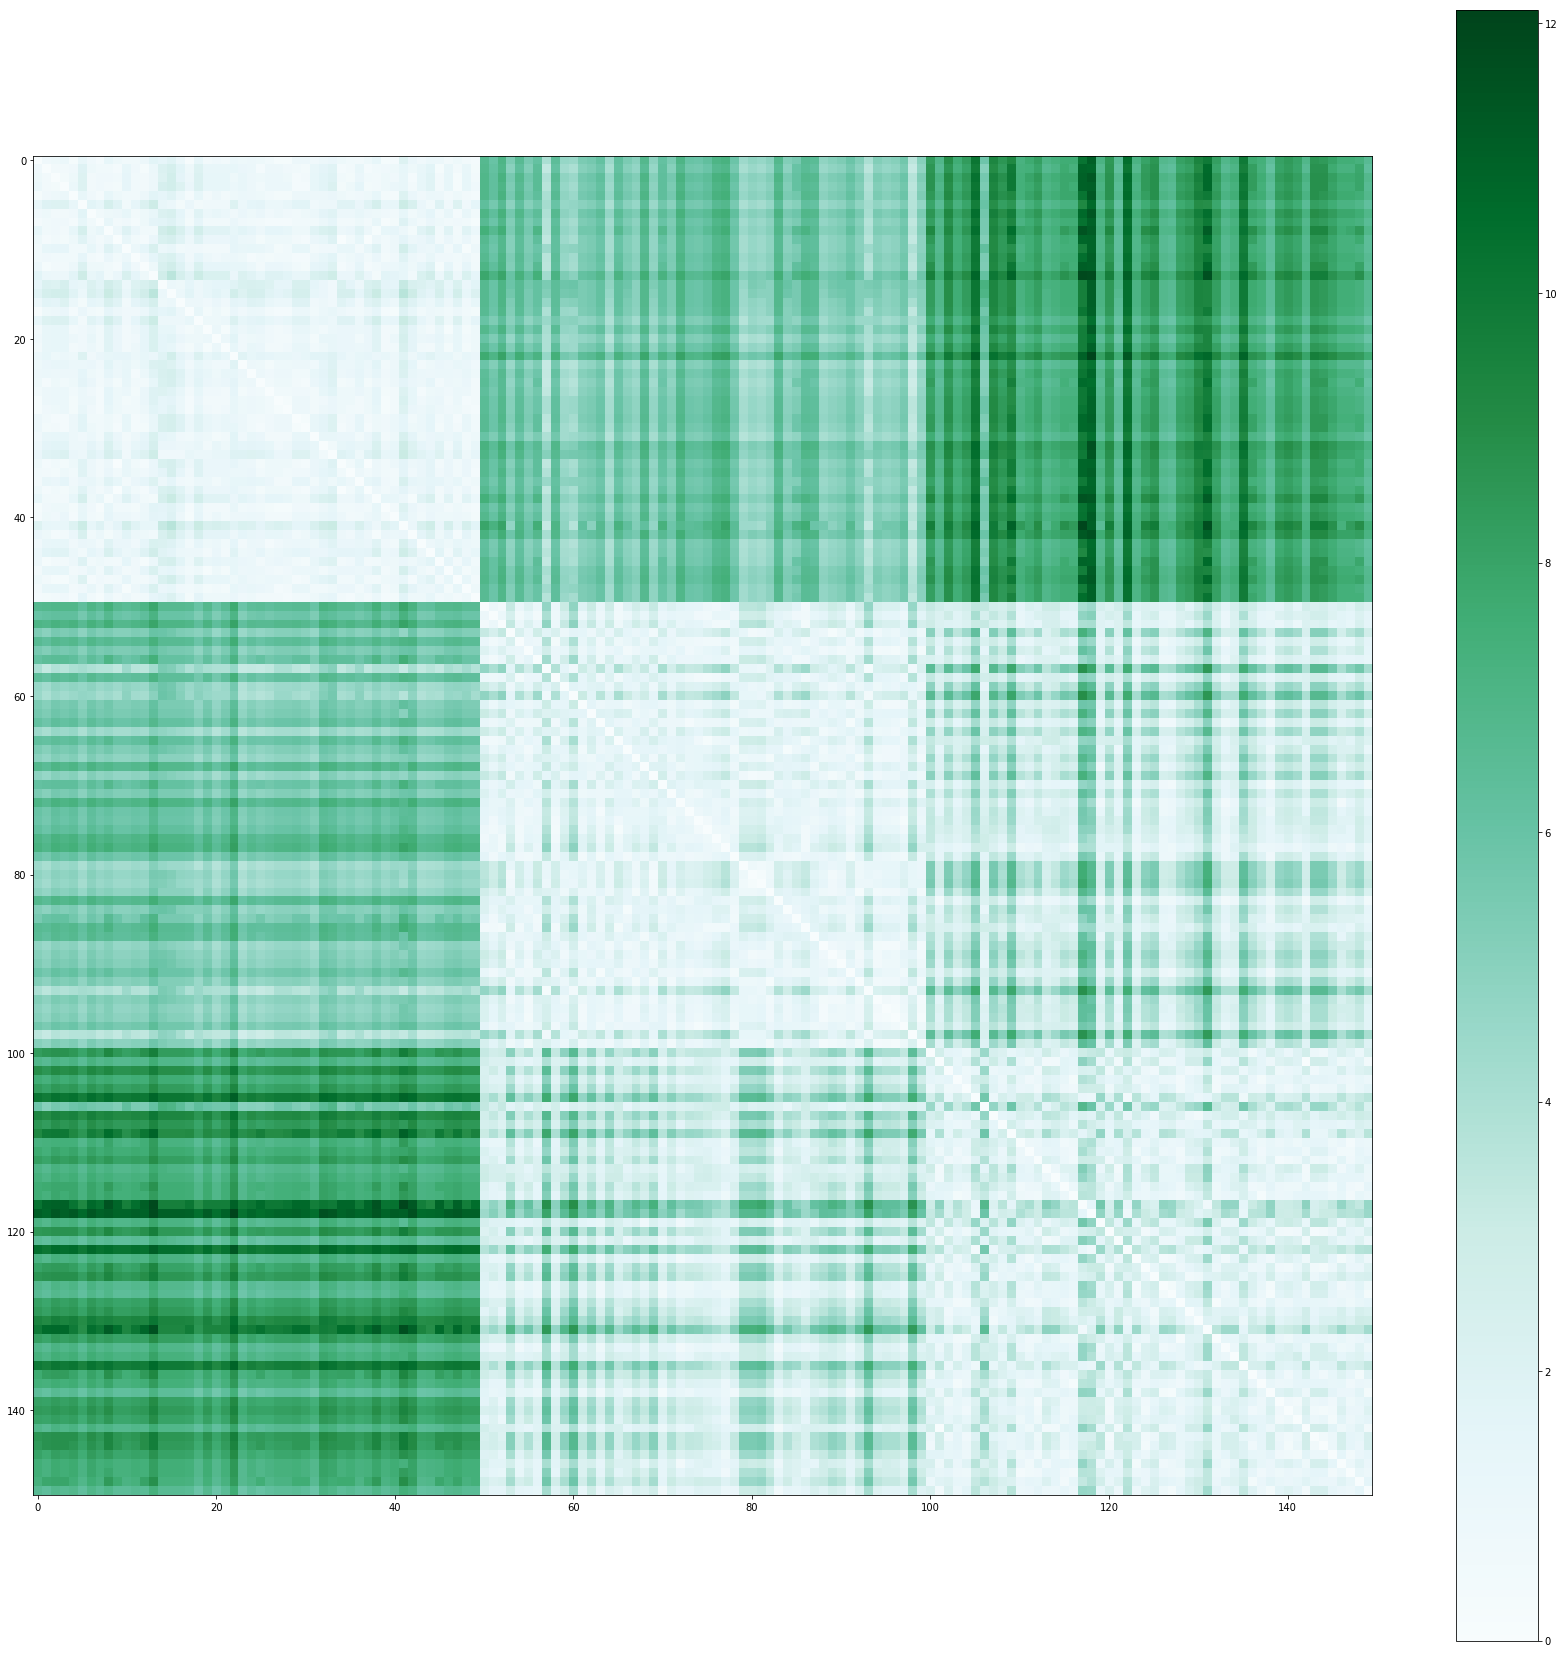

In [197]:
"""
Iris dataset distance matrix with p=1, 150 x 150 size
"""
irisMatrix = createLPmatrix(irisData,1)
plt.figure(1, figsize=(30,30))
plt.imshow(irisMatrix, cmap='BuGn')
plt.colorbar()
plt.show()

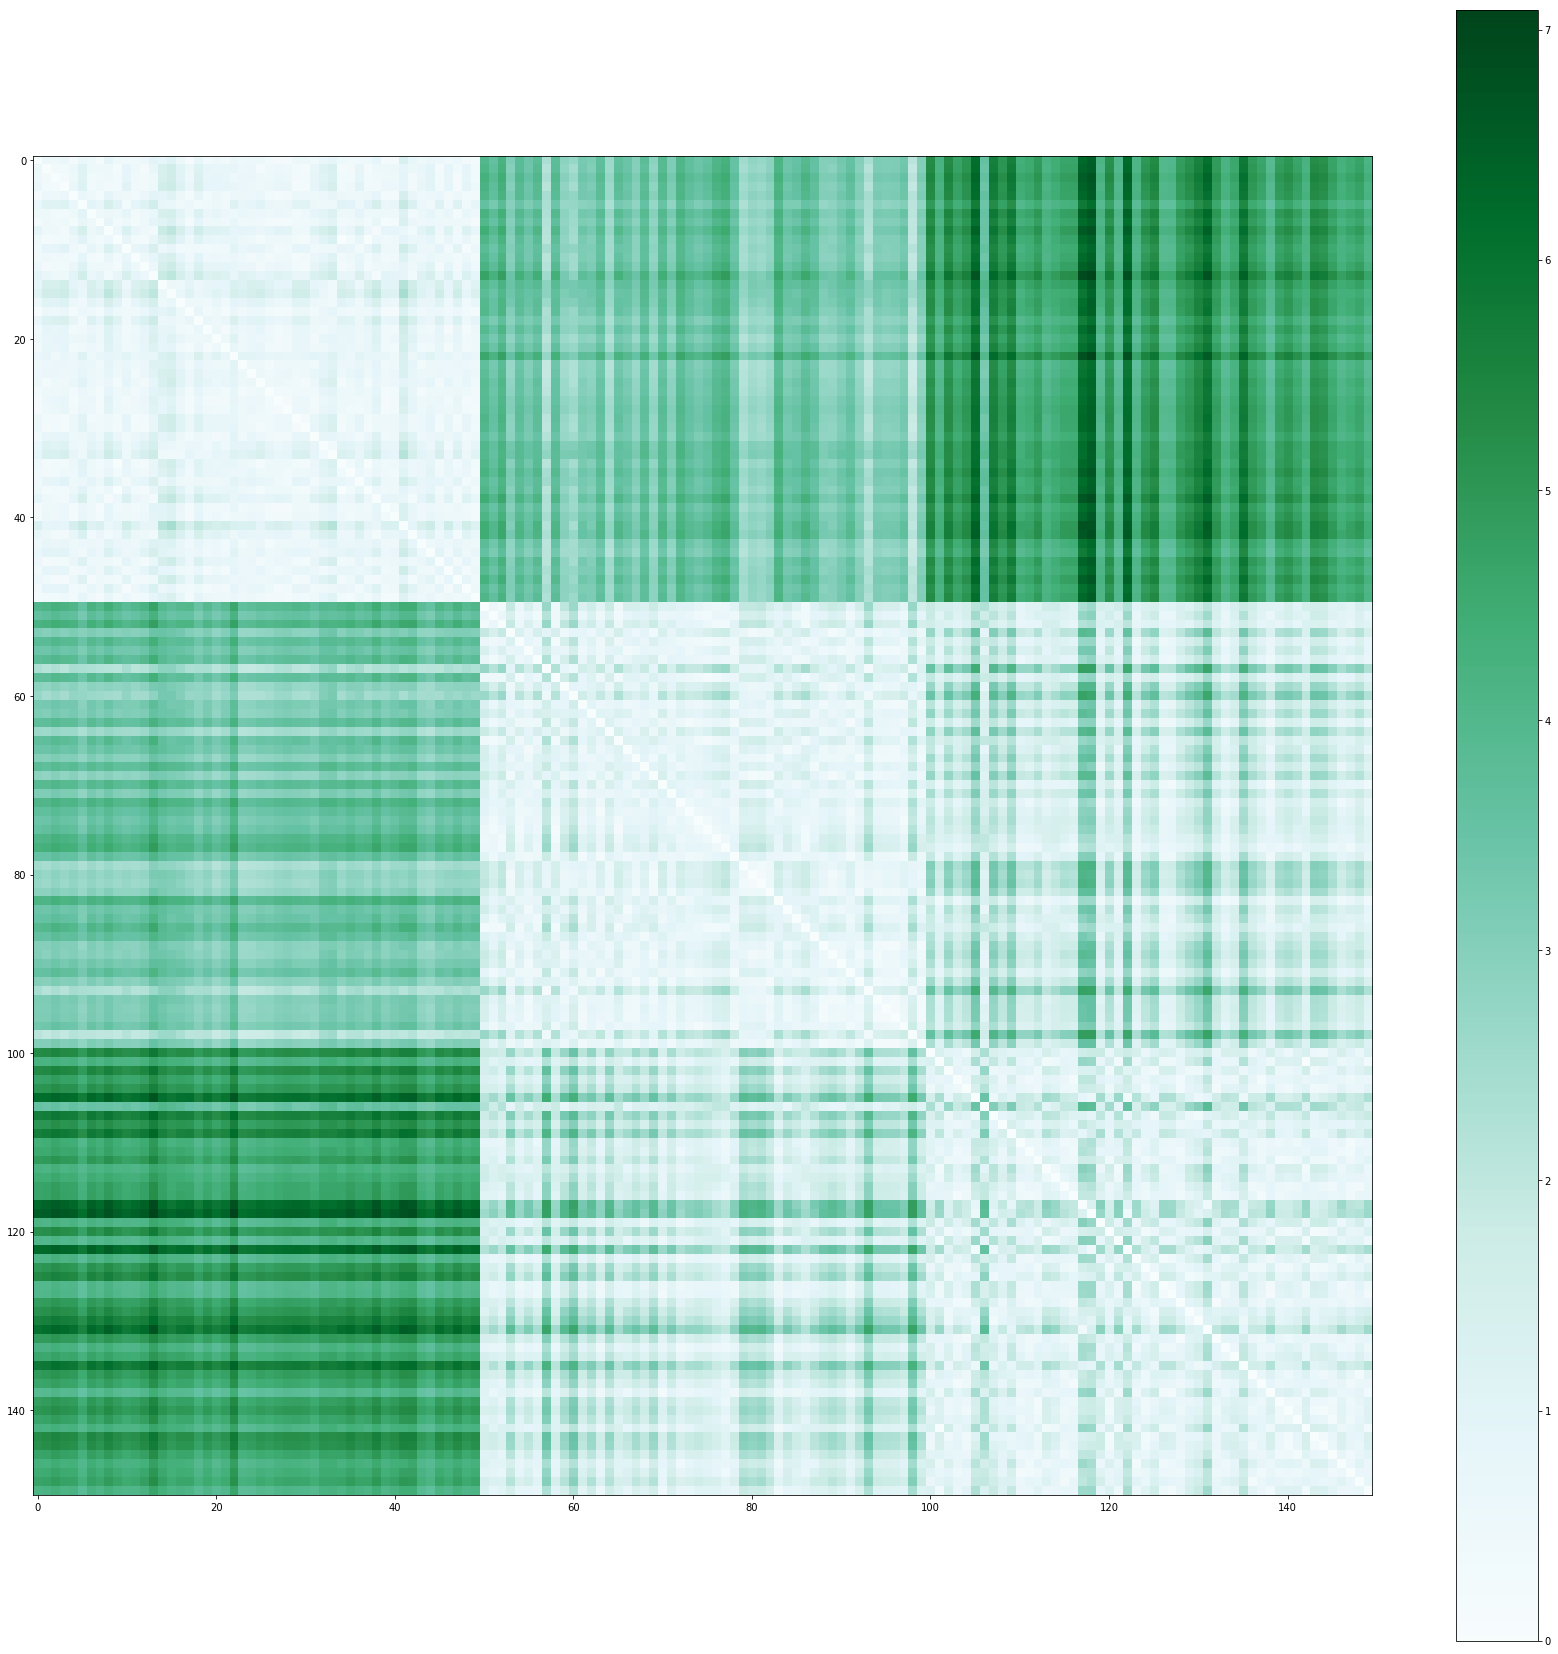

In [198]:
"""
Iris dataset distance matrix with p=2, 150 x 150 size
"""
irisMatrix = createLPmatrix(irisData,2)
plt.figure(1, figsize=(30,30))
plt.imshow(irisMatrix, cmap='BuGn')
plt.colorbar()
plt.show()

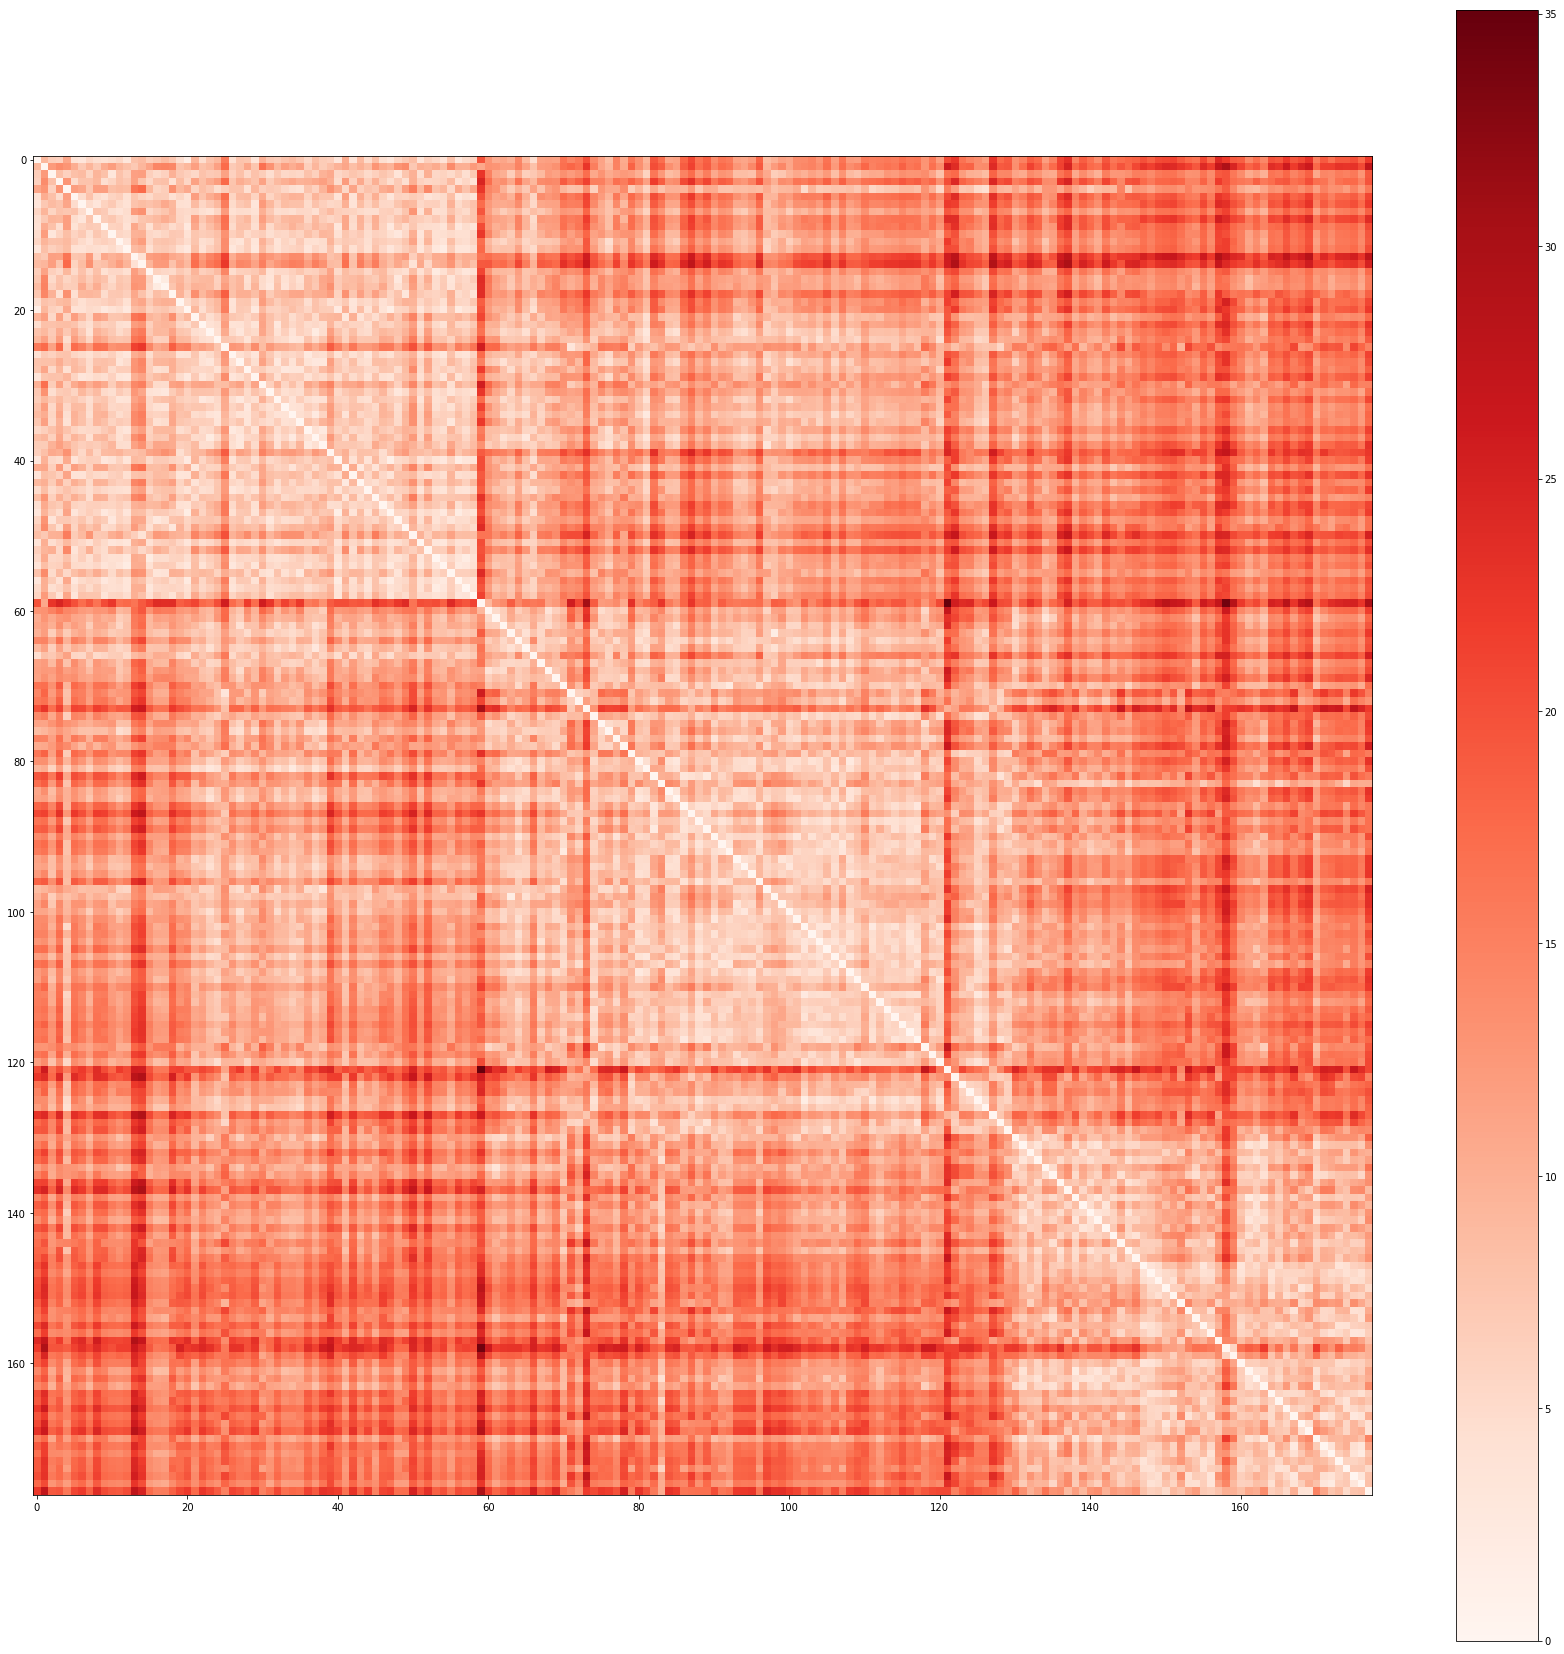

In [199]:
"""
Wine dataset distance matrix with p=1, 178 x 178 size
"""
wineMatrix = createLPmatrix(wineData,1)
plt.figure(1, figsize=(30,30))
plt.imshow(wineMatrix, 'Reds')
plt.colorbar()
plt.show()

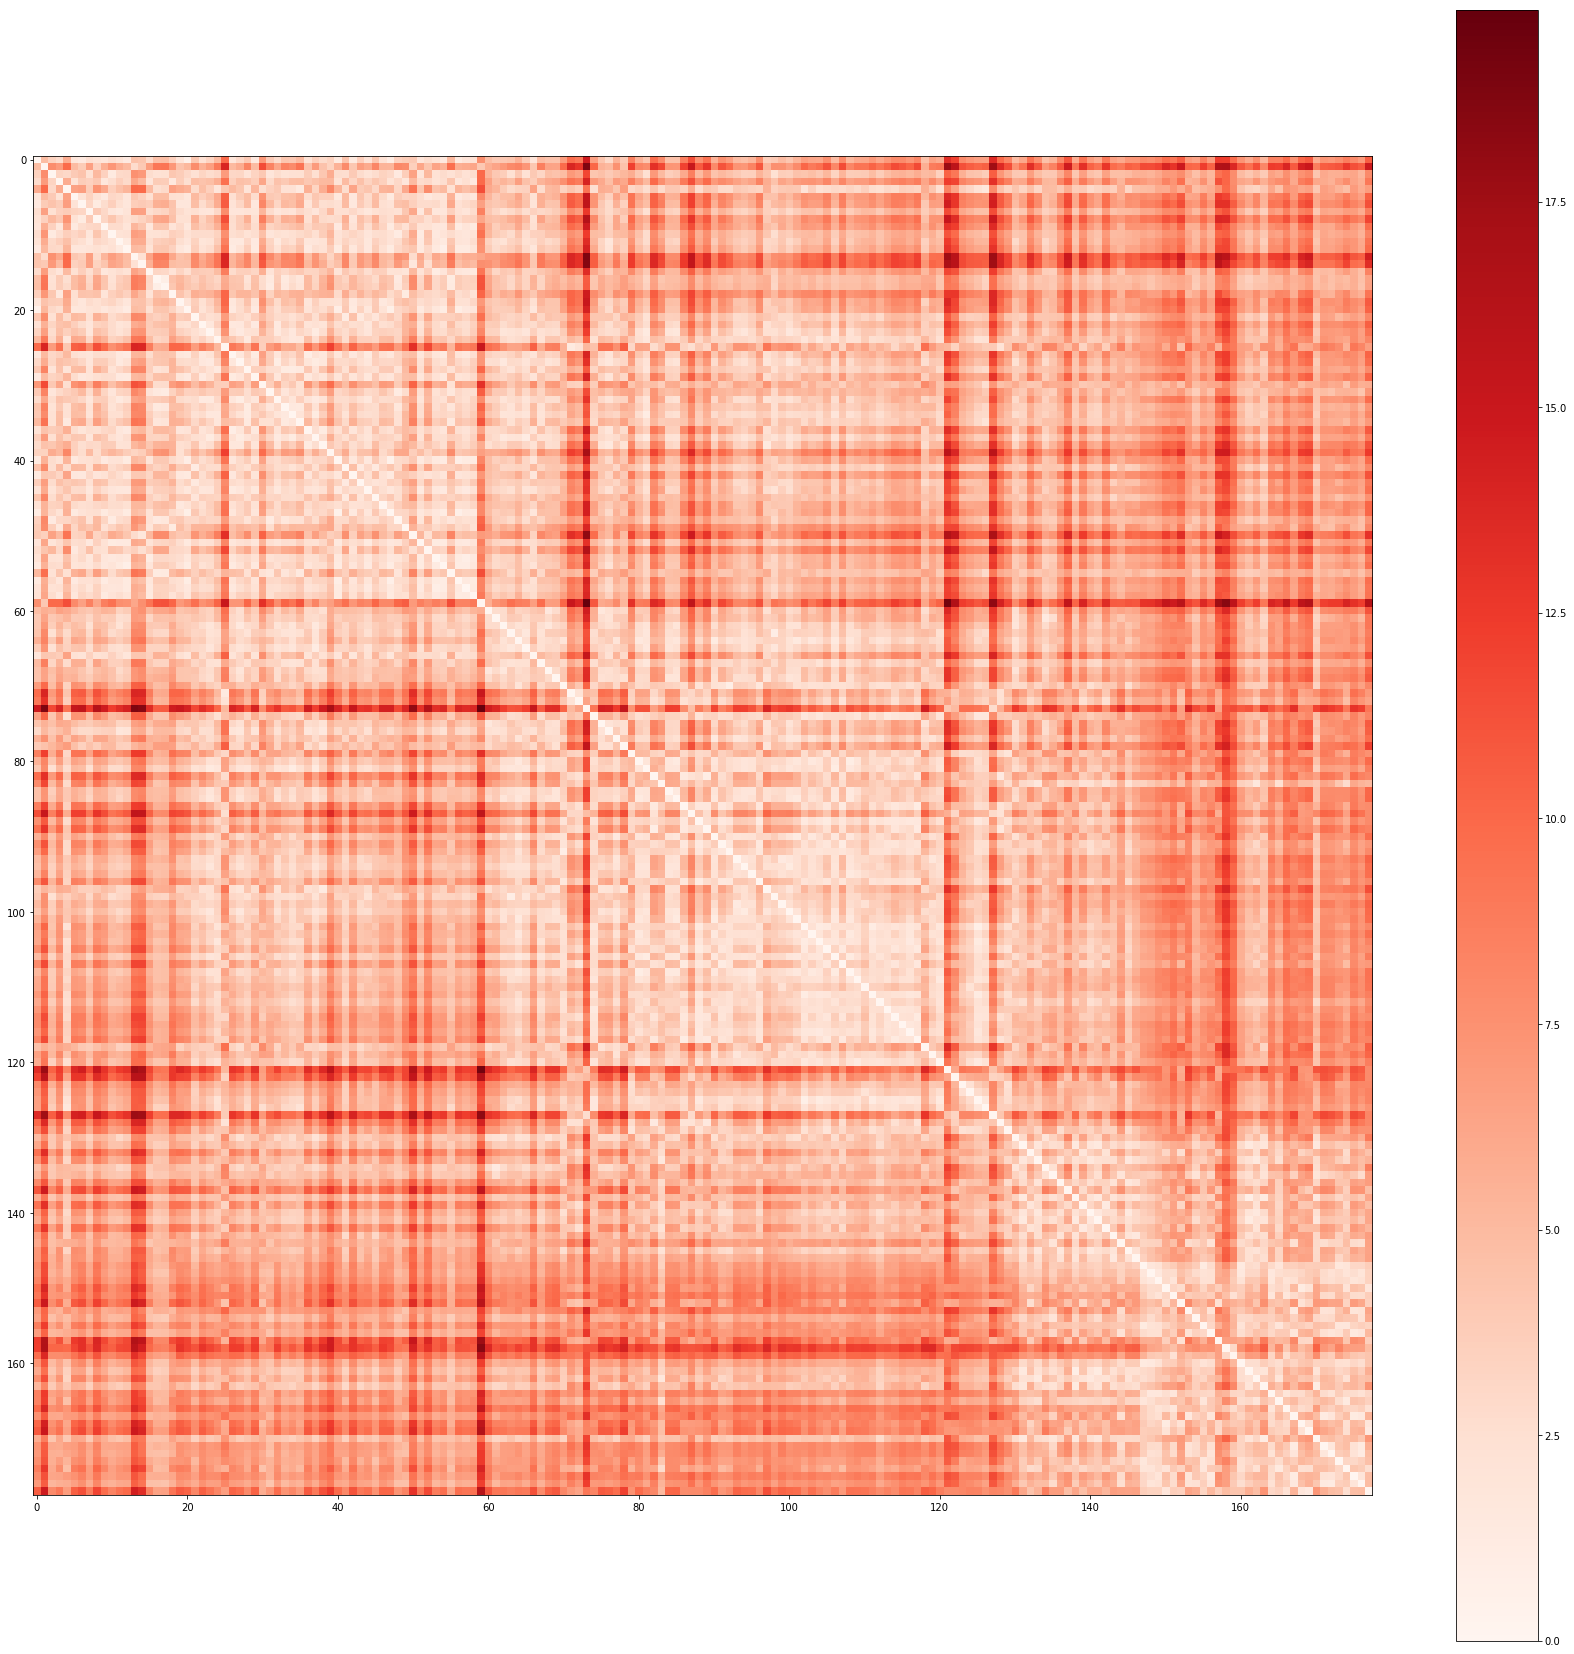

In [200]:
"""
Wine dataset distance matrix with p=2, 178 x 178 size
"""
wineMatrix = createLPmatrix(wineData,2)
plt.figure(1, figsize=(30,30))
plt.imshow(wineMatrix, 'Reds')
plt.colorbar()
plt.show()

## Part e
I created a nearestPoint function that takes in the calculated Lp norm distance matrix and the original data set.  It iterates through the distance matrix by each row and finds the minimum value in each row that is not zero using python list comprehension.  I then check this value against the row and find the index of it using the numpy.where function.  Using this index I check the value at that index in the origincal data set against the index of the current index to see if they have the same label.  If they do have the same label, I add one to my count value and after all the iterations are done I return the ratio of the same values to different values.

In [201]:
def nearestPoint(DistanceMatrix, Dataset):
    count = 0
    notSame = 0
    distIndex = 0
    for row in DistanceMatrix:
        minimum = min(i for i in row if i > 0)
        i = np.where(row == minimum)
        if(Dataset[distIndex]['label'] == Dataset[i[0][0]]['label']):
            count += 1
        else:
            notSame += 1
        distIndex += 1
    #print("Same class count:",count)
    #print("Different class count:",notSame)
    return count/(count + notSame)
    

## Similar classes ratios
I call my createLPmatrix to recreate my distance matricies and call my nearestPoint function to determine the percentage of the same classes

In [202]:
"""
Iris and wine matrix, p=1
"""
irisMatrix1 = createLPmatrix(irisData,1)
wineMatrix1 = createLPmatrix(wineData,1)

irisClass1 = nearestPoint(irisMatrix1, irisData)
wineClass1 = nearestPoint(wineMatrix1, wineData)

print("The ratio of the Iris Dataset:", irisClass1)
print("The ratio of the Wine Dataset:", wineClass1)

The ratio of the Iris Dataset: 0.9533333333333334
The ratio of the Wine Dataset: 0.9325842696629213


In [203]:
"""
Iris and wine matrix, p=2
"""
irisMatrix2 = createLPmatrix(irisData,2)
wineMatrix2 = createLPmatrix(wineData,2)

irisClass2 = nearestPoint(irisMatrix2, irisData)
wineClass2 = nearestPoint(wineMatrix2, wineData)

print("The ratio of the Iris Dataset:", irisClass2)
print("The ratio of the Wine Dataset:", wineClass2)

The ratio of the Iris Dataset: 0.96
The ratio of the Wine Dataset: 0.9213483146067416


# Sources
1. Using numpy.where function correctly - https://stackoverflow.com/questions/432112/is-there-a-numpy-function-to-return-the-first-index-of-something-in-an-array
2. urlib.request documentation - https://docs.python.org/3/library/urllib.request.html
3. various pages for numpy - https://docs.scipy.org/doc/
4. various pages for matplotlib - https://matplotlib.org/contents.html
5. Using genfromtxt function with strings - https://stackoverflow.com/questions/12319969/how-to-use-numpy-genfromtxt-when-first-column-is-string-and-the-remaining-column
6. list comprehension help - http://www.secnetix.de/olli/Python/list_comprehensions.hawk